# 1. Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.utils import shuffle

In [2]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

### Exploring the Data Frames

In [4]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- workclass: A categorical feature representing the type of income, such as private, self-employment, and government employment. Some missing values present.
- fnlwgt: An integer feature with no description provided. No missing values.
- education: A categorical feature representing the level of education 
- education-num: An integer feature representing the numerical encoding of **education** level.
- occupation: A categorical feature representing the type of occupation, such as managerial, technical, and service-related occupations. Some missing values present.
- native-country: A categorical feature representing the country of origin, including various countries such as the United States, Canada, and India. Some missing values present.
- income: The target variable, a binary feature representing income level, with categories >50K and <=50K. No missing values.

####  Cleaning the target variable and making it binary.

In [6]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


Print count and percentage of classes variable

In [8]:
# Calculate the counts of unique values in the 'class' column 
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)
print('\nTotal number of rows: ', df.shape[0])

# Saving this for future use
a = df.shape[0]

Class counts:
 0    37155
1    11687
Name: income, dtype: int64 

Percentage of each class: 
 0    76.071823
1    23.928177
Name: income, dtype: float64

Total number of rows:  48842


#### Droping nan values

In [9]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.3+ MB


Checking wheter Education and Education-number are similar.

In [11]:
print(df['education'].value_counts().head())
print()
print(df['education-num'].value_counts().head())

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
Name: education, dtype: int64

9     14783
10     9899
13     7570
14     2514
11     1959
Name: education-num, dtype: int64


From X set, education column is dropped as it is same with Education-num, which is already in numerical form.

In [12]:
df = df.drop(['education'], axis=1)

In [13]:
df.head()

age         workclass  fnlwgt  education-num      marital-status  \
0   39         State-gov   77516             13       Never-married   
1   50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2   38           Private  215646              9            Divorced   
3   53           Private  234721              7  Married-civ-spouse   
4   28           Private  338409             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  income  
0             0              40  United-States       0  
1             0              13  United-States       0  
2             0              40  United-States       0  
3             0              40  United-States       0  
4             0              40           Cuba       0

#### Count and percentage of Target classes values after droping NaN values 


In [14]:
# Calculate the counts of unique values in the 'class' column of 'df_class_feature' and store it in 'class_counts'.
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)

b = df.shape[0]
print('\nNumber of rows after dropping NaN: ', b)
print('number of rows dropped: ', a-b)

Class counts:
 0    34014
1    11208
Name: income, dtype: int64 

Percentage of each class: 
 0    75.215603
1    24.784397
Name: income, dtype: float64

Number of rows after dropping NaN:  45222
number of rows dropped:  3620


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# Assuming df is your DataFrame

# 1. Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# 2. Visual Inspection for numeric columns
def plot_distributions(df):
    for column in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# 3. Summary Statistics for numeric columns
def summary_statistics(df):
    summary = df.describe().T
    summary['skewness'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary

# 4. Distribution Test (e.g., KS test against normal distribution) for numeric columns
def ks_test_normal(df):
    results = {}
    for column in df.columns:
        stat, p_value = kstest(df[column], 'norm', args=(df[column].mean(), df[column].std()))
        results[column] = p_value
    return results

# Example usage:
numeric_df = df[numeric_columns]
#plot_distributions(numeric_df)
summary_stats = summary_statistics(numeric_df)
summary_stats.to_excel("summary_stats.xlsx", engine='openpyxl')
ks_results = ks_test_normal(numeric_df)

# Display the KS test results and summary statistics
ks_results_df = pd.DataFrame(ks_results.items(), columns=['Feature', 'P-Value'])
print("KS Test Results:")
print(ks_results_df)

print("\nSummary Statistics:")
print(summary_stats)

# 5. Display non-numeric columns information
non_numeric_info = df[non_numeric_columns].describe(include='all')
print("\nNon-Numeric Columns Information:")
non_numeric_info.head(11)



KS Test Results:
          Feature        P-Value
0             age  3.252902e-146
1          fnlwgt  2.293428e-309
2   education-num   0.000000e+00
3    capital-gain   0.000000e+00
4    capital-loss   0.000000e+00
5  hours-per-week   0.000000e+00
6          income   0.000000e+00

Summary Statistics:
                  count           mean            std      min        25%  \
age             45222.0      38.547941      13.217870     17.0      28.00   
fnlwgt          45222.0  189734.734311  105639.195134  13492.0  117388.25   
education-num   45222.0      10.118460       2.552881      1.0       9.00   
capital-gain    45222.0    1101.430344    7506.430084      0.0       0.00   
capital-loss    45222.0      88.595418     404.956092      0.0       0.00   
hours-per-week  45222.0      40.938017      12.007508      1.0      40.00   
income          45222.0       0.247844       0.431766      0.0       0.00   

                     50%       75%        max   skewness    kurtosis  
age       

workclass      marital-status    occupation relationship   race    sex  \
count      45222               45222         45222        45222  45222  45222   
unique         7                   7            14            6      5      2   
top      Private  Married-civ-spouse  Craft-repair      Husband  White   Male   
freq       33307               21055          6020        18666  38903  30527   

       native-country  
count           45222  
unique             41  
top     United-States  
freq            41292

# 2. Split data into separate fitting and test set

### Creating X and y sets

In [16]:
# Creating X and y sets.income is the target variable and native country dropped because it has 41 unique values and occupation is very similar too workclass.
X = df.drop(['income', 'native-country', 'occupation'], axis=1)
y = df['income']

Split the dataset into fitting data (60%) and test set (40%), the reason I chose 60 to 40 split is to have a bigger test set. I did some experiments with other ratios such as 70 to 30 and 80 to 20 and the model performance metrics were almost the same.

In [17]:
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.3, random_state=1600)

#### The percentage of each class in the target variable for each set

In [18]:
# Defined a function to calculate  and print the percentage of each class in the target variable
def calculate_class_percentage(y):
    class_percentage = {}
    total_samples = len(y)
    unique_classes = set(y)
    
    for cls in unique_classes:
        class_count = sum(y == cls)
        percentage = (class_count / total_samples) * 100
        class_percentage[cls] = percentage
    
    return class_percentage

In [19]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 75.54572737324278, 1: 24.454272626757227}

Test set class percentages:
{0: 74.44534532321073, 1: 25.55465467678927}

 Number of rows of X fit 31655 
 Number of rows of X test 13567 
 Number of rows of Y fit 31655 
 Number of rows of y test 13567


# 3. Random Forest, 

### Defining Random Forest model


In [20]:
def run_RF (X_fit, y_fit, X_test, y_test, model_name, i, j , k, estimator, depth):
    """
    Trains a Random Forest model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_RF (Pipeline): The trained Random Forest model pipeline.
    model_perf_metrics_rf (pandas.DataFrame): The performance metrics of the Random Forest model.
    roc_rf (float): The ROC AUC score of the Random Forest model.
    f1_rf (float): The F1 score of the Random Forest model.
    """    
    # Preprocessing for cataegorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
        # Preprocessing for numerical data - StandardScaler
    #numerical_transformer = Pipeline(steps=[
        #('scaler', StandardScaler())])
    
    # Bundle preprocessing for data
    transformations = ColumnTransformer(
        transformers=[            
            #('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')
    
    # Define the Random Forest model
    clf_RF = Pipeline(steps=[('preprocessor', transformations), 
                             ('classifier', RandomForestClassifier(n_estimators=estimator, max_depth=depth))])
    
    # Run the random forest model
    model_RF = clf_RF.fit(X_fit, y_fit)
    # Predict on the test dataset
    y_pred_rf = model_RF.predict(X_test)
    # Calculate the needed model performance metrics
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)
    a = len(X_fit)
    if depth == None:
        # Saving the model performance metrics
        models_rf = [('RF_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]
    else:
        # Saving the model performance metrics
        models_rf = [('RF_simp_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metrics_rf = pd.DataFrame(models_rf, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num', 'X_fit Size',  'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])
        
    return model_RF, model_perf_metrics_rf, roc_rf, f1_rf

### Defining Logistic Regression model


In [21]:
def run_LR(X_fit, y_fit, X_test, y_test, model_name, i, j , k):
    """
    Trains a Logistic Regression model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_perf_metric_lr (pandas.DataFrame): The performance metrics of the Logistic Regression model.
    roc_lr (float): The ROC AUC score of the Logistic Regression model.
    f1_lr (float): The F1 score of the Logistic Regression model.
    """    
    # Preprocessing for categorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Preprocessing for numerical data - StandardScaler
   # numerical_transformer = Pipeline(steps=[
       # ('scaler', StandardScaler())])

    # Bundle preprocessing for numerical and categorical data
    transformations = ColumnTransformer(
        transformers=[
           # ('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)], 
        remainder='passthrough')

    # Define the Logistic Regression model
    clf_LR = Pipeline(steps=[('preprocessor', transformations), ('classifier', LogisticRegression(max_iter=1000))])
    # Run the Logistic Regression model
    model_LR = clf_LR.fit(X_fit, y_fit)
    # Predict on the test dataset
    y_pred_lr = model_LR.predict(X_test)
    # Calculate the needed model performance metrics
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)
    a = len(X_fit)

    # Saving the model performance metrics
    models_lr = [('LR_{}'.format(model_name), k, j, i, a, f1_lr, roc_lr, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metric_lr = pd.DataFrame(models_lr, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num','X_fit Size', 'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])

    return  model_perf_metric_lr, roc_lr, f1_lr

### Running the default models one time and saving the performance metrics

In [22]:
def run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test):
    """
    Trains Random Forest and Logistic Regression models on the given training data,evaluates their performance on the test data, and merges their performance metrics into two dataframes.

    Parameters:
    X_fit (DataFrame): Features for training the models.
    y_fit (Series): Target variable for training the models.
    X_test (DataFrame): Features for testing the models.
    y_test (Series): Target variable for testing the models.

    Returns:
    tuple: 
        - model_RF (RandomForestClassifier): The trained Random Forest model.
        - model_perf_metrics_merged (DataFrame): Dataframe containing merged performance metrics of the Random Forest and Logistic Regression models.
        - model_perf_metrics_merged_only_with_cfs (DataFrame): Another dataframe containing merged performance metrics, identical to the first but intended for use with a counterfactuals dataset.
    """
   
    # Running default Random Forest Once
    model_RF, model_perf_metric_rf, _, _ = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0, 100, None)
    # Running Simple Random Forest Once No:1
    _, model_perf_metric_rf_simp, _, _ = run_RF(X_fit, y_fit, X_test, y_test, 'def_1', 0, 0, 0, estimator, depth)
    # Running default Logistic Regression Once No:2
    _, model_perf_metric_rf_simp_2, _, _ = run_RF(X_fit, y_fit, X_test, y_test, 'def_2', 0, 0, 0, estimator_2, depth_2)
    
    # Merging the default model performance metrics in a dataframe to accommodate new models, and doing it twice to use the second one on only CFs dataset.
    model_perf_metrics_merged = model_perf_metric_rf.merge(model_perf_metric_rf_simp_2, how='outer').merge(model_perf_metric_rf_simp, how='outer')
    model_perf_metrics_merged_only_with_cfs = model_perf_metric_rf.merge(model_perf_metric_rf_simp_2, how='outer').merge(model_perf_metric_rf_simp, how='outer')
    
    return model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs


### Running the models on original set multiple times and saving the performance metrics

In [23]:
def mean_of_default_models (k):
    """
    Computes the mean and standard deviation of model performance metrics for default Random Forest and Logistic Regression models over multiple iterations.

    Parameters:
    k (int): The number of iterations to run the models for calculating the mean and standard deviation.

    Returns:
    model_perf_metrics_mean_of_iterations_only_with_cfs (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained only on CFs.
    model_perf_metrics_mean_of_iterations (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained on original data.
    """
    total_auc_rf = []
    total_f1_rf = []    

    total_auc_rf_sim = []
    total_f1_rf_sim = []    
    
    total_auc_rf_sim_2 = []
    total_f1_rf_sim_2 = []

    for k in range(0, k):    
        #Running default RF and LR
        _, _ ,auc_def_rf,f1_def_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0 , 0 , 0, 100, None)
        _, _ ,auc_def_rf_sim,f1_def_rf_sim = run_RF(X_fit, y_fit, X_test, y_test, '1', 0, 0, 0, estimator, depth)
        _, _ ,auc_def_rf_sim_2,f1_def_rf_sim_2 = run_RF(X_fit, y_fit, X_test, y_test, '2', 0, 0, 0, estimator_2, depth_2)

        # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
        total_auc_rf.append(auc_def_rf)
        total_auc_rf_sim.append(auc_def_rf_sim)
        total_auc_rf_sim_2.append(auc_def_rf_sim_2)

        total_f1_rf.append(f1_def_rf)
        total_f1_rf_sim.append(f1_def_rf_sim)
        total_f1_rf_sim_2.append(f1_def_rf_sim_2)

    else:
        # Means            
        total_auc_rf_mean = np.mean(total_auc_rf)
        total_f1_rf_mean = np.mean(total_f1_rf)
        
        total_auc_rf_sim_mean = np.mean(total_auc_rf_sim)
        total_f1_rf_sim_mean = np.mean(total_f1_rf_sim)        

        total_auc_rf_sim_mean_2 = np.mean(total_auc_rf_sim_2)
        total_f1_rf_sim_mean_2 = np.mean(total_f1_rf_sim_2)

        # Standart  deviations
        total_auc_rf_std = round(np.std(total_auc_rf),8)
        total_f1_rf_std = round(np.std(total_f1_rf),8)
        
        total_auc_rf_sim_std = round(np.std(total_auc_rf_sim),8)
        total_f1_rf_sim_std = round(np.std(total_f1_rf_sim),8)

        total_auc_rf_sim_std_2 = round(np.std(total_auc_rf_sim_2),8)
        total_f1_rf_sim_std_2 = round(np.std(total_f1_rf_sim_2),8)

        c = len(X_fit)
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = pd.DataFrame()
        model_perf_metrics_mean_of_iterations = pd.DataFrame()

        default_RF_means_row = {'Model': 'RF_default_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 'X_fit Size':c ,
        'F1 (%)': total_f1_rf_mean, 'F1 (%)_std':total_f1_rf_std, 'AUC (%)' :total_auc_rf_mean, 'AUC (%)_std': total_auc_rf_std}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(default_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(default_RF_means_row, ignore_index=True)   

        simple_RF_means_row = {'Model': 'RF_simp_def_1_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 
                               'X_fit Size':c ,'F1 (%)': total_f1_rf_sim_mean, 'F1 (%)_std':total_f1_rf_sim_std, 'AUC (%)' :total_auc_rf_sim_mean, 
                               'AUC (%)_std': total_auc_rf_sim_std}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(simple_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(simple_RF_means_row, ignore_index=True)   

        simple_RF_means_row_2 = {'Model': 'RF_simp_def_2_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0,
                                 'X_fit Size':c ,'F1 (%)': total_f1_rf_sim_mean_2, 'F1 (%)_std':total_f1_rf_sim_std_2, 'AUC (%)' :total_auc_rf_sim_mean_2, 
                                 'AUC (%)_std': total_auc_rf_sim_std_2}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(simple_RF_means_row_2, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(simple_RF_means_row_2, ignore_index=True)   

    
        return model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations

### Calculating the means and standart deviations of multiple iterations

In [24]:
def calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b, number):
    """
    Calculates the mean and standard deviation of model performance metrics for each iterations and constructs summary rows for inclusion in a DataFrame.

    Parameters:
    total_auc_cf (list): AUC scores for models trained only on counterfactuals across iterations.
    total_f1_cf (list): F1 scores for models trained only on counterfactuals across iterations.
    total_auc (list): AUC scores for models trained on original data plus counterfactuals across iterations.
    total_f1 (list): F1 scores for models trained on original data plus counterfactuals across iterations.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.
    a (int): The size of the training dataset including original data plus counterfactuals.
    b (int): The size of the training dataset with only counterfactuals.

    Returns:
    new_row (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained on original data plus counterfactuals.
    new_row_cf (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained only on counterfactuals.
    """
        
    total_auc_only_cf_mean = np.mean(total_auc_cf)
    total_f1_only_cf_mean = np.mean(total_f1_cf)

    total_auc_mean = np.mean(total_auc)
    total_f1_mean = np.mean(total_f1)

    #Standart  deviations
    total_auc_only_cf_std = round(np.std(total_auc_cf),8)
    total_f1_only_cf_std = round(np.std(total_f1_cf),8)

    total_auc_std = round(np.std(total_auc),8)
    total_f1_std = round(np.std(total_f1),8)
    
    new_row   = {'Model': 'RF_simp_{}_sample:{}_cf:{}_mean_of_{}_iterations'.format(number, j, i, k), 'Iteration': k, 'Sample Size': j, 'CF Num': i, 'X_fit Size':a ,
                             'F1 (%)': total_f1_mean, 'F1 (%)_std':total_f1_std, 'AUC (%)' :total_auc_mean, 'AUC (%)_std': total_auc_std}
 
                # Creating new rows to save the model performance metrics of each sample size and CF number combination's all iterations
    new_row_cf= {'Model': 'RF_simp_{}_sample:{}_cf:{}_mean_of_{}_iterations_only_cf'.format(number, j, i, k) , 'Iteration': k, 'Sample Size': j, 'CF Num': i, 'X_fit Size':b , 
                             'F1 (%)': total_f1_only_cf_mean, 'F1 (%)_std': total_f1_only_cf_std, 'AUC (%)' :total_auc_only_cf_mean, 'AUC (%)_std': total_auc_only_cf_std}
    return new_row, new_row_cf

# 4. Plots

In [25]:
def distrubution_plot(df, name, true_false_1, true_false_2):
    """
    This function plots the distribution of scores for a given model.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the model performance data.
    name (str): The list of the Scores that will be plotted.
    1st True False is a flag to determine if the data is mean of iterations or not.
    2nd True False is a flag to determine if the data is only CFs or CFs + original data.    
    """
    # Get the default values of the models
    rf_line = df[df['Model'].str.startswith('RF_default')][name].iloc[0]
    sim_rf_line = df[df['Model'].str.startswith('RF_simp_def_1')][name].iloc[0]
    sim_rf_line_2 = df[df['Model'].str.startswith('RF_simp_def_2')][name].iloc[0]

    df = df[(df['Model'] != 'RF_default') & (df['Model'] != 'RF_simp_def_1')& (df['Model'] != 'RF_simp_def_2')]
    df = df[(df['Model'] != 'RF_default_mean_of_iterations') & (df['Model'] != 'RF_simp_def_1_mean_of_iterations') & (df['Model'] != 'RF_simp_def_2_mean_of_iterations')]

    # Get the sample size, CF Num and Iteration values    
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()
    
    # Split the DataFrame based on the 'Model' column
    df_rf_simp_1 = df[df['Model'].str.startswith('RF_simp_1')]
    df_rf_simp_2 = df[df['Model'].str.startswith('RF_simp_2')]
    
    # Get the first y values
    y_1 = df_rf_simp_1[name]
    y_err_1 = df_rf_simp_1[name+'_std']
    # Get the second y values
    y_2 = df_rf_simp_2[name]
    y_err_2 = df_rf_simp_2[name+'_std']

    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}_{j}_{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(17,9))

    
    # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
    # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs
    if true_false_1 is True:
        plt.errorbar(combined_x, y_1, yerr=y_err_1, fmt='o', color="blue",  capsize=6, label="{} Values of RF_1".format(name))
        plt.errorbar(combined_x, y_2, yerr=y_err_2, fmt='o', color="r",  capsize=6, label="{} Valuesof RF_2".format(name))

        plt.axhline(y=rf_line, color='k', linestyle='--', label="Default_RF_Line_Mean_of_{}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line, color='b', linestyle='--', label="Simple_RF_Line_1_Mean_of_{}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line_2, color='r', linestyle='--', label="Simple_RF_Line_2_Mean_of_{}".format(x_3))  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility        
        
        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models\n Trained on CFs\nSample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
        else:
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
    else:
        plt.plot(combined_x, y_1, 'o-', color="blue", label="{} Values of RF_1".format(name))
        plt.plot(combined_x, y_2, 'o-', color="r", label="{} Values of RF_2".format(name))
        
        plt.axhline(y=rf_line, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line, color='b', linestyle='--', label="Simple_RF_Line_1")  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line_2, color='r', linestyle='--', label="Simple_RF_Line_2")  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility    

        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models \nTrained on CFs\nSample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}.svg", format='svg')
        else:    
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}.svg", format='svg')
            
    #plt.show()

# 5. Counterfactuals

### Defining the DICE model. Possible adjustments that can be made are, 
- which model to use for CF generation, 
- continuous features, 
- size of the sample that will be used to create the CFs, 
- how many CFs to generate per one sample,
- which features can vary in the CF generation process.

In [26]:
# Defining DICE model
def generate_counterfactuals(X_fit, y_fit, model, sample_size, total_CFs, fea_to_vary, continuous_features ):
    """
    Generates counterfactual examples using the DICE (Diverse Counterfactual Explanations) method.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    model (object): The machine learning model for which counterfactuals are to be generated.
    sample_size (int): The number of samples for which to generate counterfactuals.
    total_CFs (int): The total number of counterfactuals to generate per sample.
    fea_to_vary (list): The list of features to be varied in the counterfactual generation process.
    outcome_name (str): The name of the outcome variable.

    Returns:
    X_fit_cf (pandas.DataFrame): The feature set of the generated counterfactuals.
    y_fit_cf (pandas.Series): The target variable of the generated counterfactuals.
    cf_df (pandas.DataFrame): A dataframe containing all the generated counterfactuals.
    """
    all_columns = X_fit.columns
    # Calculate the original class distribution
    class_0_count = np.sum(y_fit == 0)
    class_1_count = np.sum(y_fit == 1)

    # Calculate the opposite class distribution proportions
    total_count = class_0_count + class_1_count
    prop_class_0 = class_1_count / total_count
    prop_class_1 = class_0_count / total_count

    # Determine the number of samples for each class in the opposite distribution
    total_samples = sample_size
    num_class_0_samples = int(total_samples * prop_class_0)
    num_class_1_samples = total_samples - num_class_0_samples  # Ensuring total is 1000

    # Sample from each class to get the opposite distribution
    X_class_0 = X_fit[y_fit == 0]
    X_class_1 = X_fit[y_fit == 1]

    y_class_0 = y_fit[y_fit == 0]
    y_class_1 = y_fit[y_fit == 1]

    # Sample the required number of samples from each class
    X_class_0_sampled, _, y_class_0_sampled, _ = train_test_split(X_class_0, y_class_0, train_size=num_class_0_samples, random_state=42)
    X_class_1_sampled, _, y_class_1_sampled, _ = train_test_split(X_class_1, y_class_1, train_size=num_class_1_samples, random_state=42)
    # Convert the sampled numpy arrays back to DataFrames
    X_class_0_sampled_df = pd.DataFrame(X_class_0_sampled, columns=all_columns)
    X_class_1_sampled_df = pd.DataFrame(X_class_1_sampled, columns=all_columns)

    # Concatenate DataFrames
    X_fit = pd.concat([X_class_0_sampled_df, X_class_1_sampled_df], ignore_index=True)
    # Assuming y_class_0_sampled, y_class_1_sampled are numpy arrays with single column
    y_fit = pd.DataFrame(np.concatenate([y_class_0_sampled, y_class_1_sampled]), columns=[outcome_name])
    
    # Optionally, shuffle the dataset to mix the classes
    X_fit, y_fit = shuffle(X_fit, y_fit, random_state=42)

    # Create a Dice-ML data object
    d = dice_ml.Data(dataframe=X_fit.assign(income=y_fit), continuous_features=continuous_features, outcome_name=outcome_name)
    # Creating a Model object
    m = dice_ml.Model(model=model, backend="sklearn")
    # Creating the DICE model with data and model object 
    exp = dice_ml.Dice(d, m, method="random")

    # Execution of the DICE model to generate counterfactuals
    e1 = exp.generate_counterfactuals(X_fit, total_CFs=total_CFs, desired_class="opposite",  features_to_vary= fea_to_vary)
    
    # Comment out the below line as CFs needed to be visualized in the notebook
    #e1.visualize_as_dataframe(show_only_changes=True)

    # Creating a new empty dataframe to store the generated CFs
    cf_df = pd.DataFrame()
    # For loop to append the counterfactuals of each sample, to a dataframe
    for i in range(0, sample_size):
        # Saving CFs
        xd = e1.cf_examples_list[i].final_cfs_df
        # Adding the generated CFs to the empty dataframe
        cf_df = pd.concat([cf_df, xd])
# If the sample size is reached and the CFs are generated for all the samples, followiing code resets the index of the dataframe and saves the generated CFs as a csv file.
    else:
        # Resetting the index of the dataframe to not have duplicate index number
        cf_df.reset_index(drop=True, inplace=True)
        new_start_index = len(X_fit) + i + len(cf_df)
        cf_df.index += new_start_index 
        # Saving the generated CFs as a csv file
        cf_df.to_csv('Generated_CFs/cf_df_{}_{}_.csv'.format(sample_size, total_CFs))
        
        # Following code creates X and y fit sets for the generated CFs and returns them for further use.
        X_fit_cf = cf_df.drop([outcome_name], axis=1)
        y_fit_cf = cf_df[outcome_name]

    return X_fit_cf, y_fit_cf, cf_df

### Defining a experiment  fuction that runs the RF and LR, DICE model that generates counterfactuals, and then using those CFs for more model traning. 
#### Then the function saves these CF explanations into a dataframe and trains the LR again with the generated CFs. At the same time, model appends the original fit-set to CF dataset and trains the LR again with the combined version of the datasets. For each model training, LR model function appends the new model performance metrics into a dataframe. Possible adjustments that can be made are, 
- continuous features, 
- size of the sample that will be used to create the CFs, 
- how many CFs to generate per one sample,
- how many iterations will be made for each sample_size and CF_number pair,
- which features can vary in the CF generation process.

In [27]:
# Experiment running function
def running_exp (X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, name_of_the_exp, list_of_models):
    """
    This function is for running the experiments with different sample sizes, CF numbers and iterations.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    continuous_features (list): The list of continuous features in the dataset.
    sample_size_list (list): The list of sample sizes to be used in the experiments.
    total_CFs_list (list): The list of total CF numbers to be generated for each sample size.
    iteration_num (int): The number of iterations to be run for each sample size and CF number combination.
    fea_to_vary (list): The list of features to be varied in the CF generation process. Other features will be kept constant.
    num (int): The number to be added to the file names to distinguish the results of different experiments.
    list_of_models (list): The names of the Scores to be plotted. For example, AUC or F1.

    Returns:
    model_perf_metrics_merged_with_for_cfs (pandas.DataFrame): The model performance metrics of the experiments trained with only CFs.
    model_perf_metrics_merged (pandas.DataFrame): The model performance metrics of the experiments trained with CFs and original data.
    new_cf_df (pandas.DataFrame): All generated CFs in every CF number, sample size and iterations.
    """
    new_cf_df = pd.DataFrame()

    # Running the default Random Forest and Logistic Regression models once and merging their performance metrics in a dataframe.
    model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs = run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test)
    
    # Running the default RF and LR models for multiple iterations to calculate the mean and standard deviation of the performance metrics.
    model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations = mean_of_default_models (iteration_num)
    
    # Saving these new rows to the model performance metrics dataframes    
    # Loop through different sample sizes
    for j in sample_size_list:
        # Loop through different total CF numbers
        for i in total_CFs_list:
            # Initializing empty lists for saving auc and f1 scores for each iteration
            total_f1_cf = []
            total_f1 = []
            total_auc_cf = []
            total_auc = []

            total_f1_cf_2 = []
            total_f1_2 = []
            total_auc_cf_2 = []
            total_auc_2 = []
                # Generating counterfactuals using the 'generate_counterfactuals' function
            X_fit_cf, y_fit_cf, cf_df = generate_counterfactuals(X_fit, y_fit, model_RF, j, i, fea_to_vary, continuous_features)
                
                # Concatenating the original dataset with the generated CFs dataset
            new_cf_df = new_cf_df.append(cf_df)
            new_X_fit = pd.concat([X_fit, X_fit_cf])
            new_y_fit = pd.concat([y_fit, y_fit_cf])
                    
            # Loop through iteration numbers, doing a new experiment for each sample_size and CF_number combination
            for k in range(1,iteration_num+1):    

                # Running the Simple RF 1 model on the CFs dataset and the dataset with original X_fit plus CFs.
                _,model_perf_metric_rf_1_only_cf, auc_rf_1_only_cf, f1_rf_1_only_cf = run_RF(X_fit_cf, y_fit_cf, X_test, y_test, '1_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator,depth)
                _, model_perf_metric_rf_1_cf_org, auc_rf_1, f1_rf_1 = run_RF(new_X_fit, new_y_fit, X_test, y_test, '1_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator,depth)                
                # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
                total_f1_cf.append(f1_rf_1_only_cf)
                total_f1.append(f1_rf_1)
                total_auc_cf.append(auc_rf_1_only_cf)
                total_auc.append(auc_rf_1)
                # Saving the model performance metrics of each iteration
                model_perf_metrics_merged_only_with_cfs = model_perf_metrics_merged_only_with_cfs.append(model_perf_metric_rf_1_only_cf, ignore_index=True)
                model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_rf_1_cf_org, ignore_index=True)

                # Running the SImpple RF 2 model on the CFs dataset and the dataset with original X_fit plus CFs.
                _,model_perf_metric_rf_1_only_cf, auc_rf_1_only_cf, f1_rf_1_only_cf = run_RF(X_fit_cf, y_fit_cf, X_test, y_test, '2_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator_2,depth_2)
                _, model_perf_metric_rf_1_cf_org, auc_rf_1, f1_rf_1 = run_RF(new_X_fit, new_y_fit, X_test, y_test, '2_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator_2,depth_2)                
                # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
                total_f1_cf_2.append(f1_rf_1_only_cf)
                total_f1_2.append(f1_rf_1)
                total_auc_cf_2.append(auc_rf_1_only_cf)
                total_auc_2.append(auc_rf_1)
                # Saving the model performance metrics of each iteration
                model_perf_metrics_merged_only_with_cfs = model_perf_metrics_merged_only_with_cfs.append(model_perf_metric_rf_1_only_cf, ignore_index=True)
                model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_rf_1_cf_org, ignore_index=True)
                
            else:
            # Calculate means and standard deviations of auc and f1 scores of all the iterations for each sample size and CF number combination
                a = len(new_X_fit)
                b = len(X_fit_cf)

                new_row, new_row_cf = calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b, 1)
                new_row_2, new_row_cf_2 = calculate_means_and_stds(total_auc_cf_2, total_f1_cf_2, total_auc_2, total_f1_2, i, j, k, a, b, 2)
            
                # Saving these new rows to the model performance metrics dataframes    
                model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(new_row_cf, ignore_index=True)
                model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(new_row, ignore_index=True)

                model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(new_row_cf_2, ignore_index=True)
                model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(new_row_2, ignore_index=True)
                
    # Saving the model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_merged_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_merged_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_merged.to_excel('Performance_metrics/model_perf_metrics_merged_{}.xlsx'.format(name_of_the_exp))
    # Saving the MEAN model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_mean_of_iterations_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_mean_of_iterations.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_{}.xlsx'.format(name_of_the_exp))
    
    for k in list_of_models:
        # k is the list of the Scores to be plotted
        # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
        # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs'''
        distrubution_plot(model_perf_metrics_merged, k, False, False )
        distrubution_plot(model_perf_metrics_merged_only_with_cfs, k, False, True )

        distrubution_plot(model_perf_metrics_mean_of_iterations, k, True , False)
        distrubution_plot(model_perf_metrics_mean_of_iterations_only_with_cfs, k, True, True )
        
    return  model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, new_cf_df

# Experiment

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13567 entries, 14159 to 23285
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             13567 non-null  int64 
 1   workclass       13567 non-null  object
 2   fnlwgt          13567 non-null  int64 
 3   education-num   13567 non-null  int64 
 4   marital-status  13567 non-null  object
 5   relationship    13567 non-null  object
 6   race            13567 non-null  object
 7   sex             13567 non-null  object
 8   capital-gain    13567 non-null  int64 
 9   capital-loss    13567 non-null  int64 
 10  hours-per-week  13567 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.2+ MB


In [29]:
# Defining the columns' categories
numerical = ['age' ,'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical = ['workclass','marital-status',  'relationship', 'race', 'sex']
continuous_features = ['capital-gain', 'capital-loss']
outcome_name = 'income'

  0%|          | 2/9495 [00:00<14:30, 10.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 5/9495 [00:00<18:36,  8.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/9495 [00:01<23:41,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 12/9495 [00:01<21:13,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 16/9495 [00:02<21:55,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 23/9495 [00:03<24:50,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 29/9495 [00:04<24:16,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 31/9495 [00:04<22:23,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/9495 [00:04<23:24,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 37/9495 [00:05<30:23,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 43/9495 [00:07<40:26,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 46/9495 [00:08<32:06,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 49/9495 [00:08<38:45,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 52/9495 [00:09<38:09,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 54/9495 [00:10<35:07,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 56/9495 [00:10<34:10,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/9495 [00:11<28:40,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 60/9495 [00:11<26:29,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 65/9495 [00:12<30:04,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 71/9495 [00:13<35:36,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 75/9495 [00:14<27:22,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 77/9495 [00:14<25:39,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 82/9495 [00:15<25:27,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 84/9495 [00:15<24:22,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 86/9495 [00:16<24:13,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 88/9495 [00:16<22:37,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 91/9495 [00:16<18:47,  8.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 96/9495 [00:17<24:14,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 103/9495 [00:18<21:02,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 110/9495 [00:19<22:34,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 114/9495 [00:20<31:04,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 117/9495 [00:21<29:01,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 122/9495 [00:22<27:36,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 126/9495 [00:22<30:50,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 128/9495 [00:23<36:48,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 130/9495 [00:23<33:27,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/9495 [00:24<28:10,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 136/9495 [00:25<24:59,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 141/9495 [00:26<28:29,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 145/9495 [00:26<29:37,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 148/9495 [00:27<28:00,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 154/9495 [00:28<27:40,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 160/9495 [00:29<24:15,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 168/9495 [00:30<21:55,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 169/9495 [00:30<20:35,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 172/9495 [00:31<19:57,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 176/9495 [00:31<19:31,  7.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/9495 [00:31<21:12,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 182/9495 [00:32<22:02,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/9495 [00:33<21:11,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 198/9495 [00:35<27:32,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 205/9495 [00:36<27:12,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 210/9495 [00:37<23:56,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 215/9495 [00:38<25:29,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 217/9495 [00:38<24:30,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 225/9495 [00:40<24:12,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 229/9495 [00:41<27:05,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 231/9495 [00:41<29:34,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 239/9495 [00:42<25:11,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 241/9495 [00:43<22:10,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 246/9495 [00:44<25:45,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 248/9495 [00:44<25:30,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 252/9495 [00:45<25:30,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 254/9495 [00:45<22:19,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 258/9495 [00:46<26:26,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 263/9495 [00:46<25:24,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 265/9495 [00:47<24:37,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 266/9495 [00:47<25:04,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 271/9495 [00:48<24:40,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 279/9495 [00:49<26:14,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 283/9495 [00:50<26:00,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 287/9495 [00:51<29:01,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 289/9495 [00:51<26:22,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 292/9495 [00:52<24:45,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 294/9495 [00:52<24:52,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 297/9495 [00:53<25:36,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 299/9495 [00:53<22:09,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 302/9495 [00:53<25:20,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 305/9495 [00:54<28:25,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 311/9495 [00:55<28:18,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 317/9495 [00:56<23:48,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/9495 [00:56<22:31,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 321/9495 [00:57<26:29,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 323/9495 [00:57<28:44,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 331/9495 [00:59<25:31,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 333/9495 [00:59<22:46,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 341/9495 [01:01<30:13,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 342/9495 [01:01<26:38,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 350/9495 [01:02<23:18,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 356/9495 [01:03<26:09,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 359/9495 [01:04<30:29,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 362/9495 [01:04<24:13,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 366/9495 [01:05<23:48,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 369/9495 [01:06<25:27,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 374/9495 [01:06<25:20,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/9495 [01:08<27:35,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 386/9495 [01:09<28:49,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 391/9495 [01:10<27:02,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 392/9495 [01:10<24:14,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 396/9495 [01:11<26:10,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 400/9495 [01:12<28:01,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 403/9495 [01:12<27:16,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 406/9495 [01:13<28:54,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/9495 [01:14<29:17,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 417/9495 [01:15<28:33,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 418/9495 [01:15<25:28,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 421/9495 [01:16<24:20,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/9495 [01:16<24:18,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 428/9495 [01:17<29:40,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 429/9495 [01:17<26:39,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 432/9495 [01:18<23:56,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 434/9495 [01:18<26:15,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 442/9495 [01:20<29:34,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 444/9495 [01:20<24:38,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 451/9495 [01:21<25:10,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 453/9495 [01:22<31:01,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 457/9495 [01:22<24:46,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 459/9495 [01:23<23:22,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/9495 [01:23<21:27,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 467/9495 [01:24<28:59,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 474/9495 [01:26<26:48,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 477/9495 [01:26<25:51,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 482/9495 [01:27<25:46,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 483/9495 [01:27<24:16,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 484/9495 [01:28<30:23,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 488/9495 [01:28<27:34,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 491/9495 [01:29<26:05,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 492/9495 [01:29<24:01,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 496/9495 [01:30<26:10,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 499/9495 [01:30<27:21,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 500/9495 [01:31<26:27,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 507/9495 [01:32<27:02,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 513/9495 [01:33<31:08,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 517/9495 [01:34<29:47,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 519/9495 [01:34<27:57,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 522/9495 [01:35<24:40,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 525/9495 [01:35<30:48,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 528/9495 [01:36<29:48,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 530/9495 [01:36<24:42,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 533/9495 [01:37<23:32,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 535/9495 [01:37<21:02,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 539/9495 [01:38<26:46,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 544/9495 [01:39<29:13,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 546/9495 [01:39<28:24,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 557/9495 [01:42<28:52,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/9495 [01:42<26:26,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 562/9495 [01:43<25:28,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 564/9495 [01:43<24:00,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 568/9495 [01:44<27:14,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 570/9495 [01:44<26:28,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 580/9495 [01:46<28:23,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 585/9495 [01:47<29:09,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/9495 [01:48<26:09,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/9495 [01:49<28:29,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 593/9495 [01:49<26:05,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 597/9495 [01:50<30:39,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 602/9495 [01:51<29:23,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 603/9495 [01:51<26:51,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 609/9495 [01:52<31:46,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 613/9495 [01:53<28:58,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 619/9495 [01:54<28:59,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 622/9495 [01:55<28:06,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 624/9495 [01:55<24:42,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 628/9495 [01:56<27:49,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 630/9495 [01:56<26:10,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 632/9495 [01:57<32:02,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 635/9495 [01:58<29:04,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 643/9495 [01:59<27:51,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 647/9495 [02:00<29:50,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 651/9495 [02:01<25:56,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 656/9495 [02:02<27:11,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 658/9495 [02:02<27:36,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 659/9495 [02:03<32:32,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 665/9495 [02:04<29:22,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 666/9495 [02:04<27:01,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 674/9495 [02:06<28:25,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 675/9495 [02:06<27:21,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 679/9495 [02:07<25:39,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 687/9495 [02:08<24:58,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 691/9495 [02:09<30:23,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 694/9495 [02:10<29:06,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 698/9495 [02:11<28:59,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 700/9495 [02:11<28:33,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 703/9495 [02:12<28:18,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 705/9495 [02:12<35:07,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 707/9495 [02:13<31:03,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 710/9495 [02:13<29:20,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 720/9495 [02:15<32:28,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 725/9495 [02:16<25:11,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 731/9495 [02:18<25:17,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 732/9495 [02:18<25:53,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 734/9495 [02:18<27:15,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 742/9495 [02:20<28:41,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 746/9495 [02:21<32:39,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 749/9495 [02:21<26:26,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 757/9495 [02:23<25:48,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/9495 [02:23<23:38,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 763/9495 [02:24<31:00,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 765/9495 [02:25<28:11,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 772/9495 [02:26<29:57,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 774/9495 [02:27<34:37,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 777/9495 [02:27<28:33,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 778/9495 [02:28<26:48,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 781/9495 [02:28<29:09,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 783/9495 [02:29<34:13,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/9495 [02:30<29:23,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 793/9495 [02:31<27:46,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 795/9495 [02:31<27:19,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 799/9495 [02:32<29:45,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 801/9495 [02:33<31:46,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 804/9495 [02:33<27:18,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 806/9495 [02:33<26:53,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 811/9495 [02:34<26:07,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 814/9495 [02:35<30:24,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 816/9495 [02:36<28:54,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 819/9495 [02:36<24:18,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 820/9495 [02:36<23:08,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 824/9495 [02:37<25:29,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 825/9495 [02:37<24:08,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 826/9495 [02:37<31:36,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 832/9495 [02:39<28:13,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 833/9495 [02:39<25:49,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 841/9495 [02:41<29:14,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 843/9495 [02:41<29:05,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 849/9495 [02:42<23:30,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 851/9495 [02:43<21:06,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 853/9495 [02:43<23:08,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 855/9495 [02:43<23:59,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 860/9495 [02:44<24:56,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 864/9495 [02:45<24:50,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 870/9495 [02:46<24:14,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 872/9495 [02:47<21:19,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 875/9495 [02:47<24:16,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 877/9495 [02:47<20:55,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 883/9495 [02:49<27:34,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 886/9495 [02:49<24:08,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 891/9495 [02:50<21:20,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 895/9495 [02:51<23:59,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 899/9495 [02:51<24:38,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 912/9495 [02:54<25:17,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 915/9495 [02:54<22:00,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 923/9495 [02:56<23:26,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 927/9495 [02:57<25:04,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 935/9495 [02:58<22:42,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 937/9495 [02:58<19:53,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 938/9495 [02:59<18:38,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 945/9495 [03:00<26:00,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 949/9495 [03:01<23:44,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 955/9495 [03:02<23:49,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 960/9495 [03:03<26:27,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 962/9495 [03:03<25:01,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 965/9495 [03:03<20:38,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 966/9495 [03:04<19:26,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 970/9495 [03:04<22:23,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 976/9495 [03:06<27:10,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 980/9495 [03:06<21:18,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 988/9495 [03:07<21:37,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 990/9495 [03:08<20:16,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 994/9495 [03:08<20:51,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 997/9495 [03:09<27:13,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1002/9495 [03:10<25:49,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1009/9495 [03:11<21:26,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1012/9495 [03:12<24:25,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1014/9495 [03:12<24:12,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1018/9495 [03:13<21:19,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1020/9495 [03:13<21:54,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1025/9495 [03:14<26:01,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1027/9495 [03:14<21:58,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1034/9495 [03:16<25:28,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1045/9495 [03:18<27:34,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1048/9495 [03:19<28:03,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1053/9495 [03:20<34:43,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1059/9495 [03:22<28:36,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1065/9495 [03:23<25:16,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1067/9495 [03:23<22:55,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1069/9495 [03:23<20:39,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1074/9495 [03:24<25:49,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1077/9495 [03:25<26:15,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1079/9495 [03:25<24:29,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1081/9495 [03:26<24:26,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1085/9495 [03:26<23:51,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1086/9495 [03:26<22:57,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1087/9495 [03:27<25:39,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1095/9495 [03:28<29:49,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1098/9495 [03:29<27:47,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1099/9495 [03:29<26:34,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1102/9495 [03:30<23:07,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1111/9495 [03:32<24:42,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1115/9495 [03:33<28:27,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1119/9495 [03:33<26:27,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1125/9495 [03:35<25:23,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1127/9495 [03:35<25:11,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1133/9495 [03:36<25:50,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1138/9495 [03:37<23:50,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1139/9495 [03:37<22:14,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1145/9495 [03:38<25:33,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1146/9495 [03:39<25:09,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1150/9495 [03:40<29:03,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/9495 [03:40<25:09,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1156/9495 [03:41<23:45,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1165/9495 [03:43<25:11,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1166/9495 [03:43<23:08,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1169/9495 [03:43<22:18,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1172/9495 [03:44<28:13,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1177/9495 [03:45<25:08,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1180/9495 [03:45<24:31,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1183/9495 [03:46<24:43,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1203/9495 [03:51<29:10,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1207/9495 [03:52<26:07,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1210/9495 [03:52<22:58,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1215/9495 [03:53<29:08,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1220/9495 [03:54<23:12,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1223/9495 [03:55<21:53,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1229/9495 [03:56<25:47,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1231/9495 [03:56<22:36,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1239/9495 [03:58<25:33,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1245/9495 [03:59<26:29,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1249/9495 [04:00<27:27,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1251/9495 [04:00<23:38,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1253/9495 [04:01<21:17,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/9495 [04:02<24:20,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1259/9495 [04:02<22:47,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1263/9495 [04:03<26:34,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1266/9495 [04:03<26:23,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1269/9495 [04:04<26:02,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1273/9495 [04:05<24:07,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1274/9495 [04:05<23:39,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1278/9495 [04:06<27:23,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1284/9495 [04:07<25:40,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1285/9495 [04:07<24:14,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1289/9495 [04:08<22:58,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1291/9495 [04:08<22:43,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1303/9495 [04:11<26:59,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1305/9495 [04:11<23:01,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1307/9495 [04:12<26:43,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1309/9495 [04:12<29:35,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1311/9495 [04:13<26:39,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1314/9495 [04:13<25:54,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1317/9495 [04:14<23:21,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1320/9495 [04:15<28:29,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1326/9495 [04:16<26:14,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1328/9495 [04:16<29:33,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1332/9495 [04:17<26:00,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1335/9495 [04:18<30:31,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1338/9495 [04:18<27:37,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1340/9495 [04:19<26:00,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1348/9495 [04:21<26:25,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1350/9495 [04:21<26:58,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1354/9495 [04:22<27:07,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1359/9495 [04:23<30:40,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1363/9495 [04:24<28:06,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1364/9495 [04:24<25:02,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1367/9495 [04:25<25:58,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1379/9495 [04:28<27:59,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1383/9495 [04:29<26:38,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1391/9495 [04:31<30:31,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1394/9495 [04:31<27:20,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1397/9495 [04:32<24:31,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1407/9495 [04:34<30:01,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1412/9495 [04:35<26:45,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1415/9495 [04:36<29:16,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1429/9495 [04:39<28:40,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1435/9495 [04:41<24:28,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1436/9495 [04:41<22:34,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1444/9495 [04:43<25:17,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1447/9495 [04:43<26:31,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1455/9495 [04:45<25:49,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1456/9495 [04:45<24:33,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1459/9495 [04:46<24:03,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1464/9495 [04:47<25:32,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1467/9495 [04:48<30:08,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1472/9495 [04:49<27:57,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1475/9495 [04:49<26:18,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1476/9495 [04:50<28:45,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1481/9495 [04:51<27:43,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1483/9495 [04:51<25:20,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1486/9495 [04:52<24:42,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1490/9495 [04:53<27:48,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1495/9495 [04:54<27:19,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1500/9495 [04:55<29:20,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1502/9495 [04:55<24:36,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1507/9495 [04:56<26:20,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1508/9495 [04:56<23:34,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1510/9495 [04:57<25:21,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1513/9495 [04:57<25:17,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1514/9495 [04:58<22:30,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1516/9495 [04:58<23:45,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1519/9495 [04:59<29:37,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1522/9495 [04:59<26:31,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1527/9495 [05:00<24:49,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1529/9495 [05:01<28:35,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1536/9495 [05:02<22:44,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1538/9495 [05:03<22:52,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1541/9495 [05:03<22:09,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1543/9495 [05:04<27:34,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1546/9495 [05:04<26:03,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1559/9495 [05:07<26:00,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1563/9495 [05:08<26:05,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1572/9495 [05:10<26:07,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1575/9495 [05:11<28:59,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1577/9495 [05:11<28:57,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1585/9495 [05:13<26:37,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1588/9495 [05:14<30:41,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1592/9495 [05:15<25:56,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1595/9495 [05:15<29:07,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1597/9495 [05:16<27:34,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1601/9495 [05:17<26:20,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1603/9495 [05:17<24:32,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1608/9495 [05:18<26:28,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1611/9495 [05:19<27:24,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1614/9495 [05:19<29:56,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1615/9495 [05:20<31:42,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1617/9495 [05:20<29:28,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1619/9495 [05:21<27:49,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1623/9495 [05:21<24:38,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1628/9495 [05:22<24:21,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1632/9495 [05:23<24:03,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1649/9495 [05:27<22:03,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1650/9495 [05:27<21:00,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1652/9495 [05:27<21:30,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/9495 [05:27<21:38,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1659/9495 [05:29<24:32,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1663/9495 [05:29<21:15,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1669/9495 [05:30<21:24,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1673/9495 [05:31<23:29,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1675/9495 [05:31<20:14,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1680/9495 [05:32<21:54,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1681/9495 [05:33<20:15,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1684/9495 [05:33<22:02,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1687/9495 [05:34<23:47,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1689/9495 [05:34<23:54,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1693/9495 [05:35<19:13,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1702/9495 [05:36<24:16,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1707/9495 [05:37<21:53,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1713/9495 [05:39<23:13,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1715/9495 [05:39<21:25,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1716/9495 [05:39<20:13,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1719/9495 [05:39<19:13,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1721/9495 [05:40<19:59,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1724/9495 [05:40<25:19,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1728/9495 [05:41<21:01,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1730/9495 [05:41<19:49,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1733/9495 [05:42<22:06,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1734/9495 [05:42<21:10,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1747/9495 [05:45<22:02,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1748/9495 [05:45<24:03,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1752/9495 [05:46<24:26,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1755/9495 [05:46<22:21,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1757/9495 [05:47<21:40,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1760/9495 [05:47<25:26,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1762/9495 [05:48<23:54,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1766/9495 [05:48<22:20,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1771/9495 [05:49<21:52,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1776/9495 [05:50<21:53,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1779/9495 [05:51<22:18,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1790/9495 [05:53<25:49,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1793/9495 [05:53<20:34,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1796/9495 [05:54<23:53,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1800/9495 [05:55<22:53,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1804/9495 [05:56<26:16,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1812/9495 [05:57<23:04,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1814/9495 [05:58<23:22,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1817/9495 [05:58<22:21,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1822/9495 [05:59<22:08,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1824/9495 [06:00<22:06,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1827/9495 [06:00<21:47,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1830/9495 [06:01<20:22,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1831/9495 [06:01<18:53,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1832/9495 [06:01<26:07,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1836/9495 [06:02<23:08,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1838/9495 [06:02<22:17,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1843/9495 [06:03<24:48,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1847/9495 [06:04<22:19,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1857/9495 [06:06<25:09,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1864/9495 [06:08<27:56,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1867/9495 [06:08<23:58,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1872/9495 [06:09<23:59,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1879/9495 [06:11<22:40,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1890/9495 [06:13<21:03,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1893/9495 [06:13<21:14,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1897/9495 [06:14<29:13,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1900/9495 [06:15<22:58,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1902/9495 [06:15<21:36,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1907/9495 [06:16<27:02,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1912/9495 [06:17<20:40,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1924/9495 [06:20<21:54,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1928/9495 [06:20<23:07,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1932/9495 [06:21<20:37,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1935/9495 [06:22<22:55,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1939/9495 [06:23<25:03,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1941/9495 [06:23<23:21,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1949/9495 [06:25<25:28,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1952/9495 [06:25<24:24,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1955/9495 [06:26<21:59,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1960/9495 [06:27<23:42,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1962/9495 [06:27<20:44,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1964/9495 [06:27<18:54,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1967/9495 [06:28<21:34,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1970/9495 [06:29<25:34,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1972/9495 [06:29<22:53,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1973/9495 [06:29<23:12,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1976/9495 [06:30<22:20,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1979/9495 [06:31<27:53,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1981/9495 [06:31<27:03,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1984/9495 [06:32<26:55,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2002/9495 [06:36<24:57,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2004/9495 [06:36<24:55,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2006/9495 [06:36<25:55,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2009/9495 [06:37<24:03,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2010/9495 [06:37<22:50,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2011/9495 [06:37<27:08,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2014/9495 [06:38<24:39,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2015/9495 [06:38<23:26,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2020/9495 [06:39<23:33,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2022/9495 [06:40<22:41,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2028/9495 [06:41<24:59,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2031/9495 [06:41<21:47,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2035/9495 [06:42<20:43,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2037/9495 [06:42<20:37,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2039/9495 [06:43<21:16,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2043/9495 [06:44<24:06,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2045/9495 [06:44<20:41,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2048/9495 [06:45<22:09,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2051/9495 [06:45<22:15,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2056/9495 [06:46<25:12,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2059/9495 [06:47<23:52,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2062/9495 [06:47<22:08,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2068/9495 [06:49<22:53,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2070/9495 [06:49<19:07,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2077/9495 [06:51<24:08,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2078/9495 [06:51<21:30,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2088/9495 [06:53<26:31,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2093/9495 [06:54<24:46,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2098/9495 [06:55<23:59,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2102/9495 [06:56<24:47,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2106/9495 [06:57<20:12,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2116/9495 [06:59<24:15,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2119/9495 [06:59<22:53,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2120/9495 [06:59<21:29,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2124/9495 [07:00<24:28,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2127/9495 [07:01<22:20,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2133/9495 [07:02<23:41,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2136/9495 [07:03<23:55,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2143/9495 [07:04<20:32,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2144/9495 [07:04<24:40,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2147/9495 [07:05<22:42,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2152/9495 [07:06<21:57,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2157/9495 [07:07<22:47,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2158/9495 [07:07<21:35,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2160/9495 [07:07<22:00,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2162/9495 [07:08<21:33,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2170/9495 [07:10<22:22,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2172/9495 [07:10<21:39,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2177/9495 [07:11<25:10,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2178/9495 [07:11<22:11,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2185/9495 [07:13<20:18,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2188/9495 [07:13<20:39,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2190/9495 [07:13<18:16,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2191/9495 [07:14<18:29,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2194/9495 [07:14<23:14,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2200/9495 [07:16<26:56,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2202/9495 [07:16<24:41,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2207/9495 [07:17<27:33,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2209/9495 [07:18<23:58,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2213/9495 [07:18<19:18,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2214/9495 [07:18<18:55,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2217/9495 [07:19<26:33,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2220/9495 [07:20<22:16,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2223/9495 [07:20<20:07,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2226/9495 [07:21<25:20,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2231/9495 [07:22<20:42,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2232/9495 [07:22<18:53,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2235/9495 [07:23<21:51,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2238/9495 [07:23<21:30,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2240/9495 [07:24<28:09,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2243/9495 [07:24<22:48,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2249/9495 [07:25<22:55,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2259/9495 [07:28<20:23,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2261/9495 [07:28<20:55,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2264/9495 [07:29<23:57,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2269/9495 [07:30<23:14,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2273/9495 [07:30<23:04,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2281/9495 [07:32<21:01,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2283/9495 [07:32<19:09,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2284/9495 [07:33<21:39,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2289/9495 [07:34<22:16,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2297/9495 [07:35<22:21,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2314/9495 [07:39<25:00,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2322/9495 [07:41<21:59,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2327/9495 [07:42<23:55,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2329/9495 [07:42<23:16,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2337/9495 [07:44<23:09,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2339/9495 [07:44<23:11,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2342/9495 [07:45<22:32,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2344/9495 [07:46<26:54,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2350/9495 [07:47<22:42,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2353/9495 [07:47<21:14,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2356/9495 [07:48<22:41,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2359/9495 [07:48<21:45,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2361/9495 [07:49<21:07,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2369/9495 [07:50<23:17,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2371/9495 [07:51<23:52,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2372/9495 [07:51<24:41,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2378/9495 [07:52<25:45,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2382/9495 [07:53<22:41,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2388/9495 [07:55<24:32,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2393/9495 [07:56<19:53,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2399/9495 [07:57<22:20,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2401/9495 [07:57<18:55,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2403/9495 [07:57<17:58,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2406/9495 [07:58<20:22,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2408/9495 [07:58<25:21,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2410/9495 [07:59<23:49,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2413/9495 [07:59<19:34,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2418/9495 [08:00<20:12,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2419/9495 [08:00<20:11,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2425/9495 [08:02<22:43,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2428/9495 [08:02<20:03,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2429/9495 [08:02<23:32,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2433/9495 [08:03<22:16,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2436/9495 [08:04<21:15,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2439/9495 [08:04<20:30,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2441/9495 [08:05<26:28,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2446/9495 [08:06<25:00,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2452/9495 [08:08<29:40,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2454/9495 [08:08<28:14,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2458/9495 [08:09<26:51,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2461/9495 [08:10<23:51,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2466/9495 [08:11<22:08,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2468/9495 [08:11<27:15,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2470/9495 [08:12<25:56,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2473/9495 [08:12<20:21,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2480/9495 [08:14<21:45,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2485/9495 [08:15<22:04,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2490/9495 [08:16<25:33,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2494/9495 [08:17<23:17,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2496/9495 [08:17<27:34,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2498/9495 [08:18<27:23,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2509/9495 [08:20<22:07,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2513/9495 [08:21<20:25,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2514/9495 [08:21<19:57,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2519/9495 [08:22<24:03,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2522/9495 [08:23<23:25,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2528/9495 [08:24<22:04,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2532/9495 [08:25<25:36,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2541/9495 [08:27<21:51,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2545/9495 [08:28<24:13,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2548/9495 [08:29<22:52,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2551/9495 [08:29<19:42,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2568/9495 [08:33<19:35,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2570/9495 [08:33<21:58,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2571/9495 [08:34<25:20,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2575/9495 [08:35<24:12,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2579/9495 [08:36<23:09,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2582/9495 [08:36<25:28,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2585/9495 [08:37<22:51,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2587/9495 [08:37<22:18,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2589/9495 [08:38<21:26,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2590/9495 [08:38<24:28,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2596/9495 [08:39<23:45,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2597/9495 [08:39<22:47,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2599/9495 [08:40<23:26,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2600/9495 [08:40<22:19,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2603/9495 [08:41<24:03,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2612/9495 [08:43<21:39,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2626/9495 [08:46<27:53,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2641/9495 [08:49<20:02,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2642/9495 [08:49<20:12,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2650/9495 [08:51<20:12,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2658/9495 [08:53<20:42,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2665/9495 [08:54<23:33,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2667/9495 [08:55<22:39,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2669/9495 [08:55<23:17,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2674/9495 [08:57<24:10,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2675/9495 [08:57<21:51,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2682/9495 [08:59<23:57,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2685/9495 [08:59<28:41,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2690/9495 [09:00<22:57,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2696/9495 [09:02<23:27,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2702/9495 [09:03<19:27,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2704/9495 [09:03<17:56,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2708/9495 [09:04<21:48,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2710/9495 [09:05<21:01,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2715/9495 [09:05<20:00,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2716/9495 [09:06<19:39,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2722/9495 [09:07<22:07,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2727/9495 [09:08<23:58,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2728/9495 [09:08<21:24,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2732/9495 [09:09<20:44,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2733/9495 [09:09<26:25,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2734/9495 [09:10<28:23,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2736/9495 [09:10<23:44,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2747/9495 [09:13<22:40,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2752/9495 [09:14<24:59,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2753/9495 [09:14<22:31,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2757/9495 [09:15<21:33,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2758/9495 [09:15<19:05,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2761/9495 [09:16<21:05,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2764/9495 [09:17<20:55,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2765/9495 [09:17<20:36,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2771/9495 [09:18<22:54,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2773/9495 [09:18<18:11,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2777/9495 [09:19<21:24,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2778/9495 [09:19<19:20,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2789/9495 [09:22<23:37,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2792/9495 [09:22<21:54,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2800/9495 [09:24<20:59,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2802/9495 [09:25<24:51,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2805/9495 [09:25<24:15,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2808/9495 [09:26<23:26,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2809/9495 [09:26<26:19,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2811/9495 [09:27<27:29,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2815/9495 [09:27<18:54,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2816/9495 [09:28<17:10,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2819/9495 [09:28<21:58,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2821/9495 [09:29<17:41,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2823/9495 [09:29<17:34,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2826/9495 [09:29<18:11,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2829/9495 [09:30<24:39,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2831/9495 [09:31<23:45,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2846/9495 [09:34<21:14,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2849/9495 [09:35<26:13,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2854/9495 [09:36<22:30,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2858/9495 [09:37<20:45,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2859/9495 [09:37<20:15,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2864/9495 [09:38<22:34,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2865/9495 [09:38<20:38,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2867/9495 [09:39<24:07,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2871/9495 [09:40<22:18,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2873/9495 [09:40<20:30,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2877/9495 [09:41<22:01,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2886/9495 [09:43<24:24,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2890/9495 [09:44<23:24,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2893/9495 [09:45<19:47,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2895/9495 [09:45<18:52,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2898/9495 [09:45<18:59,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2900/9495 [09:46<23:05,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2902/9495 [09:46<20:08,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2904/9495 [09:47<21:31,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2908/9495 [09:48<23:04,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2913/9495 [09:49<20:20,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2915/9495 [09:49<21:02,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2921/9495 [09:50<20:15,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2923/9495 [09:51<24:38,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2930/9495 [09:52<21:21,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2934/9495 [09:53<19:22,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2937/9495 [09:54<19:42,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2940/9495 [09:55<25:36,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2943/9495 [09:55<20:01,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2944/9495 [09:55<17:52,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2947/9495 [09:56<20:55,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2950/9495 [09:57<20:25,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2958/9495 [09:58<23:50,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2961/9495 [09:59<19:24,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2963/9495 [09:59<20:44,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2967/9495 [10:00<25:10,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2970/9495 [10:01<20:28,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2971/9495 [10:01<20:03,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2978/9495 [10:03<19:35,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2981/9495 [10:03<19:27,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2982/9495 [10:03<18:38,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2985/9495 [10:04<25:08,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2987/9495 [10:05<27:28,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2990/9495 [10:05<22:46,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2995/9495 [10:07<25:57,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2999/9495 [10:07<22:48,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3003/9495 [10:08<24:06,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3004/9495 [10:09<23:07,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3006/9495 [10:09<24:00,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3008/9495 [10:10<26:45,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3013/9495 [10:11<27:44,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3016/9495 [10:12<22:01,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3017/9495 [10:12<20:39,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3023/9495 [10:13<22:36,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3026/9495 [10:14<21:20,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3030/9495 [10:15<18:59,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3033/9495 [10:15<20:27,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3046/9495 [10:18<19:14,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3049/9495 [10:19<25:59,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3053/9495 [10:20<23:36,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3056/9495 [10:21<23:00,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3058/9495 [10:21<24:53,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3062/9495 [10:22<21:15,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3064/9495 [10:23<17:54,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3066/9495 [10:23<16:18,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3068/9495 [10:23<15:27,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3070/9495 [10:23<16:49,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3077/9495 [10:25<20:36,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3079/9495 [10:25<18:54,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3082/9495 [10:26<19:54,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3086/9495 [10:27<22:51,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3090/9495 [10:28<19:05,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3091/9495 [10:28<18:33,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3093/9495 [10:29<25:35,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3095/9495 [10:29<24:35,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3097/9495 [10:29<23:12,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3099/9495 [10:30<27:30,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3111/9495 [10:33<22:44,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3120/9495 [10:35<24:08,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3126/9495 [10:36<22:29,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3130/9495 [10:37<22:42,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3135/9495 [10:38<25:51,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3138/9495 [10:39<24:11,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3147/9495 [10:41<25:53,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3152/9495 [10:43<22:55,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3156/9495 [10:43<22:31,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3160/9495 [10:44<22:16,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3162/9495 [10:45<17:24,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3169/9495 [10:46<21:48,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3185/9495 [10:51<32:18,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3187/9495 [10:52<30:55,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3192/9495 [10:53<30:19,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3198/9495 [10:55<26:04,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3203/9495 [10:56<22:10,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3207/9495 [10:57<25:16,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3211/9495 [10:58<28:45,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3216/9495 [10:59<21:12,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3219/9495 [11:00<19:35,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3222/9495 [11:00<23:31,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3225/9495 [11:01<24:03,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3227/9495 [11:01<20:35,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3229/9495 [11:02<26:56,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3231/9495 [11:03<24:55,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3233/9495 [11:03<28:18,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3234/9495 [11:03<26:34,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3238/9495 [11:04<22:31,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3242/9495 [11:05<17:11,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3244/9495 [11:06<24:08,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3246/9495 [11:06<24:08,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3251/9495 [11:07<23:00,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3256/9495 [11:08<19:48,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3258/9495 [11:09<20:12,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3262/9495 [11:10<26:38,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3266/9495 [11:11<18:50,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3267/9495 [11:11<20:56,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3271/9495 [11:12<20:15,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3278/9495 [11:13<21:07,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3280/9495 [11:14<25:03,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3283/9495 [11:15<23:11,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3285/9495 [11:15<21:50,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3291/9495 [11:16<20:16,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3293/9495 [11:17<21:19,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3298/9495 [11:18<22:55,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3299/9495 [11:18<24:20,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3301/9495 [11:19<27:47,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3304/9495 [11:20<26:19,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3313/9495 [11:22<19:39,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3315/9495 [11:22<18:24,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3317/9495 [11:23<17:30,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3319/9495 [11:23<18:57,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3325/9495 [11:24<20:28,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3330/9495 [11:25<21:07,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3336/9495 [11:27<27:52,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3339/9495 [11:28<21:21,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3346/9495 [11:29<21:03,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3349/9495 [11:30<26:10,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3353/9495 [11:31<22:53,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3355/9495 [11:32<21:13,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3359/9495 [11:33<19:12,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3361/9495 [11:33<18:20,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3364/9495 [11:34<22:39,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3367/9495 [11:34<21:36,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3377/9495 [11:37<23:05,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3383/9495 [11:38<23:00,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3387/9495 [11:39<20:54,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3389/9495 [11:40<21:29,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3391/9495 [11:40<22:21,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3393/9495 [11:41<22:49,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3400/9495 [11:42<20:49,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3403/9495 [11:43<21:26,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3404/9495 [11:43<24:00,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3410/9495 [11:44<21:56,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3412/9495 [11:45<22:27,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3414/9495 [11:45<22:33,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3419/9495 [11:47<26:33,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3423/9495 [11:48<24:10,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3427/9495 [11:49<23:23,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3432/9495 [11:50<23:00,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3433/9495 [11:50<23:46,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3440/9495 [11:52<21:57,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3442/9495 [11:53<19:34,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3447/9495 [11:54<24:02,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3449/9495 [11:54<25:26,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3451/9495 [11:55<32:42,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3452/9495 [11:55<29:24,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3453/9495 [11:56<26:56,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3458/9495 [11:57<29:55,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3463/9495 [11:58<19:36,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3471/9495 [12:00<26:21,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3478/9495 [12:02<27:09,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3481/9495 [12:03<21:45,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3482/9495 [12:03<19:37,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3488/9495 [12:04<17:24,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3504/9495 [12:08<17:29,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3507/9495 [12:09<17:05,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3509/9495 [12:09<21:18,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3512/9495 [12:10<19:43,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3515/9495 [12:11<24:35,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3518/9495 [12:11<20:59,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3523/9495 [12:12<20:49,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3526/9495 [12:13<19:57,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3530/9495 [12:14<19:09,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3531/9495 [12:14<17:43,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3535/9495 [12:15<22:06,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3537/9495 [12:15<23:16,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3539/9495 [12:16<23:39,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3546/9495 [12:18<21:05,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3548/9495 [12:18<22:10,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3550/9495 [12:18<21:11,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3554/9495 [12:20<23:47,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3557/9495 [12:20<21:25,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3560/9495 [12:21<18:02,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3565/9495 [12:22<21:27,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3567/9495 [12:22<21:03,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3571/9495 [12:23<19:13,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3572/9495 [12:23<18:53,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3581/9495 [12:26<23:51,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3582/9495 [12:26<20:18,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3588/9495 [12:28<25:42,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3590/9495 [12:28<24:20,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3594/9495 [12:29<20:49,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3596/9495 [12:30<20:07,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3597/9495 [12:30<20:35,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3604/9495 [12:31<17:34,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3606/9495 [12:32<21:34,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3609/9495 [12:33<20:18,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3611/9495 [12:33<22:16,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3616/9495 [12:34<24:33,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3618/9495 [12:35<24:46,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3623/9495 [12:36<21:34,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3630/9495 [12:38<17:51,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3632/9495 [12:38<19:58,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3634/9495 [12:39<21:12,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3641/9495 [12:40<22:09,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3645/9495 [12:41<18:29,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3647/9495 [12:41<16:57,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3650/9495 [12:42<24:46,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3654/9495 [12:43<21:17,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3659/9495 [12:44<19:52,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3660/9495 [12:44<17:41,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3665/9495 [12:46<21:34,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3668/9495 [12:46<20:06,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3670/9495 [12:47<19:38,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3672/9495 [12:47<21:29,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3677/9495 [12:48<18:12,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3682/9495 [12:50<20:23,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3685/9495 [12:50<18:29,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3693/9495 [12:52<21:25,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3697/9495 [12:53<19:26,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3701/9495 [12:54<16:32,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3702/9495 [12:54<17:14,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3707/9495 [12:55<18:21,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3715/9495 [12:57<22:50,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3716/9495 [12:57<20:32,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3718/9495 [12:58<22:43,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3720/9495 [12:58<21:40,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3723/9495 [12:59<22:21,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3727/9495 [13:00<17:20,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3730/9495 [13:01<25:06,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3734/9495 [13:02<22:15,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3740/9495 [13:03<26:53,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3742/9495 [13:04<24:34,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3744/9495 [13:04<21:29,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3750/9495 [13:06<18:27,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3754/9495 [13:07<20:26,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3755/9495 [13:07<19:36,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3757/9495 [13:07<18:56,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3765/9495 [13:09<22:47,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3771/9495 [13:11<23:46,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3775/9495 [13:12<20:42,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3776/9495 [13:12<20:01,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3782/9495 [13:14<20:58,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3785/9495 [13:14<18:56,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3786/9495 [13:15<17:10,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3788/9495 [13:15<18:19,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3790/9495 [13:15<19:23,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3792/9495 [13:16<19:29,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3798/9495 [13:18<24:17,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3802/9495 [13:19<24:23,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3804/9495 [13:19<24:09,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3807/9495 [13:20<17:46,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3808/9495 [13:20<16:47,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3813/9495 [13:21<17:59,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3817/9495 [13:22<18:29,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3818/9495 [13:22<17:01,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3820/9495 [13:23<24:34,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3826/9495 [13:24<22:48,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3828/9495 [13:25<22:21,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3831/9495 [13:26<21:58,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3832/9495 [13:26<20:21,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3835/9495 [13:27<21:52,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3840/9495 [13:28<19:44,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3843/9495 [13:29<22:18,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3844/9495 [13:29<19:24,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3848/9495 [13:30<19:17,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3859/9495 [13:33<23:56,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3861/9495 [13:33<25:40,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3862/9495 [13:33<24:22,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3866/9495 [13:34<25:24,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3869/9495 [13:35<22:05,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3875/9495 [13:37<21:59,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3879/9495 [13:38<20:25,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3882/9495 [13:38<18:51,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3883/9495 [13:38<16:59,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3886/9495 [13:39<21:19,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3888/9495 [13:40<18:33,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3891/9495 [13:40<19:24,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3897/9495 [13:42<18:24,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3899/9495 [13:42<16:46,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3904/9495 [13:43<18:28,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3905/9495 [13:43<19:44,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3906/9495 [13:44<20:41,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3909/9495 [13:44<20:47,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3911/9495 [13:45<20:40,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3915/9495 [13:46<22:35,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3917/9495 [13:46<20:46,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3919/9495 [13:47<21:15,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3922/9495 [13:48<24:31,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3925/9495 [13:48<22:51,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3927/9495 [13:49<20:35,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3929/9495 [13:49<21:48,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3930/9495 [13:49<21:14,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3934/9495 [13:51<24:13,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3936/9495 [13:51<24:34,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3943/9495 [13:53<20:58,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3945/9495 [13:54<19:33,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3948/9495 [13:54<22:47,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3951/9495 [13:55<18:57,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3953/9495 [13:55<17:33,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3956/9495 [13:56<19:06,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3958/9495 [13:56<16:54,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3963/9495 [13:58<21:32,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3966/9495 [13:58<18:48,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3967/9495 [13:59<17:21,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3972/9495 [14:00<21:43,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3976/9495 [14:01<22:59,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3978/9495 [14:02<25:24,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3981/9495 [14:02<21:02,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3982/9495 [14:02<18:38,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3987/9495 [14:04<19:17,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3990/9495 [14:04<18:48,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3993/9495 [14:05<17:13,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3997/9495 [14:06<17:05,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4007/9495 [14:08<19:29,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4011/9495 [14:09<17:44,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4014/9495 [14:10<24:06,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4018/9495 [14:11<23:26,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4021/9495 [14:12<23:51,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4022/9495 [14:12<23:21,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4028/9495 [14:14<28:02,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4036/9495 [14:16<21:40,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4039/9495 [14:17<18:23,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4042/9495 [14:18<21:57,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4045/9495 [14:18<19:53,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4047/9495 [14:19<21:39,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4053/9495 [14:20<20:55,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4056/9495 [14:21<23:18,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4062/9495 [14:23<17:44,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4064/9495 [14:23<20:04,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4065/9495 [14:23<20:29,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4068/9495 [14:24<23:23,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4070/9495 [14:25<22:29,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4076/9495 [14:26<19:09,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4082/9495 [14:27<16:53,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4087/9495 [14:29<19:55,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4090/9495 [14:30<23:18,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4093/9495 [14:30<21:00,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4095/9495 [14:31<19:55,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4099/9495 [14:32<24:36,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4101/9495 [14:33<23:17,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4102/9495 [14:33<23:48,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4104/9495 [14:33<23:16,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4106/9495 [14:34<20:34,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4107/9495 [14:34<19:51,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4110/9495 [14:35<19:22,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4114/9495 [14:36<19:21,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4117/9495 [14:36<21:17,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4124/9495 [14:38<17:31,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4127/9495 [14:39<21:41,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4130/9495 [14:39<15:28,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4134/9495 [14:41<21:15,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4136/9495 [14:41<20:09,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4141/9495 [14:42<16:52,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4147/9495 [14:43<18:13,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4151/9495 [14:44<18:07,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4154/9495 [14:45<15:54,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4157/9495 [14:46<20:03,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4159/9495 [14:46<19:15,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4163/9495 [14:47<20:09,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4165/9495 [14:48<24:11,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4169/9495 [14:49<21:14,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4175/9495 [14:51<24:50,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4178/9495 [14:52<25:24,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4181/9495 [14:52<22:55,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4184/9495 [14:53<19:21,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4189/9495 [14:54<18:42,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4191/9495 [14:55<20:38,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4195/9495 [14:56<23:46,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4197/9495 [14:56<24:52,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4199/9495 [14:57<23:08,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4202/9495 [14:58<19:57,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4204/9495 [14:58<23:08,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4209/9495 [15:00<24:32,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4215/9495 [15:01<16:01,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4217/9495 [15:01<21:07,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4218/9495 [15:02<21:10,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4225/9495 [15:03<17:52,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4227/9495 [15:04<19:48,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4234/9495 [15:06<20:15,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4237/9495 [15:06<18:57,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4241/9495 [15:07<20:11,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4248/9495 [15:09<19:13,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4250/9495 [15:09<18:39,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4252/9495 [15:10<18:43,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4253/9495 [15:10<21:27,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4254/9495 [15:10<21:40,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4256/9495 [15:11<22:49,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4259/9495 [15:12<23:28,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4263/9495 [15:13<18:16,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4265/9495 [15:13<17:21,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4268/9495 [15:14<19:08,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4272/9495 [15:15<23:27,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4273/9495 [15:15<22:09,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4278/9495 [15:17<24:08,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4284/9495 [15:18<20:53,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4289/9495 [15:19<19:14,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4293/9495 [15:20<17:25,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4300/9495 [15:22<21:33,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4309/9495 [15:25<19:35,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4313/9495 [15:26<23:49,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4314/9495 [15:26<22:20,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4318/9495 [15:27<19:15,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4321/9495 [15:28<21:08,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4327/9495 [15:29<18:53,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4329/9495 [15:30<17:53,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4333/9495 [15:31<19:02,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4338/9495 [15:32<21:34,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4341/9495 [15:33<17:50,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4343/9495 [15:33<15:43,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4345/9495 [15:34<18:23,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4347/9495 [15:34<24:20,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4354/9495 [15:36<20:25,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4356/9495 [15:37<17:03,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4362/9495 [15:38<18:57,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4364/9495 [15:39<21:10,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4368/9495 [15:40<20:19,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4371/9495 [15:40<20:33,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4374/9495 [15:41<21:42,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4378/9495 [15:42<20:36,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4382/9495 [15:43<21:23,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4384/9495 [15:44<19:34,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4388/9495 [15:45<22:01,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4393/9495 [15:46<17:29,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4394/9495 [15:46<15:37,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4399/9495 [15:48<22:14,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4408/9495 [15:51<22:31,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4410/9495 [15:51<20:14,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4414/9495 [15:52<17:04,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4416/9495 [15:52<14:15,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4422/9495 [15:54<19:30,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4424/9495 [15:54<21:08,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4429/9495 [15:56<19:16,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4433/9495 [15:57<23:00,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4439/9495 [15:58<18:53,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4440/9495 [15:58<17:51,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4444/9495 [16:00<19:12,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4447/9495 [16:00<22:18,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4449/9495 [16:01<18:11,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4454/9495 [16:02<18:37,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4456/9495 [16:03<19:19,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4458/9495 [16:03<17:52,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4461/9495 [16:04<17:51,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4466/9495 [16:05<25:44,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4468/9495 [16:06<22:49,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4476/9495 [16:08<24:17,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4478/9495 [16:09<22:28,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4482/9495 [16:10<17:56,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4483/9495 [16:10<16:25,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4488/9495 [16:11<15:27,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4493/9495 [16:12<17:32,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4495/9495 [16:13<17:34,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4497/9495 [16:13<19:26,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4499/9495 [16:14<22:51,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4501/9495 [16:14<21:45,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4502/9495 [16:15<20:34,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4509/9495 [16:16<19:45,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4511/9495 [16:17<19:34,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4512/9495 [16:17<22:27,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4514/9495 [16:18<21:50,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4517/9495 [16:19<26:00,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4520/9495 [16:20<22:16,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4527/9495 [16:21<17:55,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4529/9495 [16:22<21:53,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4543/9495 [16:26<18:38,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4548/9495 [16:27<19:59,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4551/9495 [16:28<16:31,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4555/9495 [16:29<18:56,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4557/9495 [16:29<16:51,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4561/9495 [16:30<19:10,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4563/9495 [16:31<21:58,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4569/9495 [16:32<18:15,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4571/9495 [16:32<15:19,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4572/9495 [16:32<14:55,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4575/9495 [16:33<22:38,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4578/9495 [16:34<20:41,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4580/9495 [16:35<25:57,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4588/9495 [16:37<17:44,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4590/9495 [16:37<15:23,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4603/9495 [16:41<22:14,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4605/9495 [16:42<19:04,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4610/9495 [16:43<20:11,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4614/9495 [16:44<23:29,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4619/9495 [16:46<19:16,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4621/9495 [16:46<19:16,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4626/9495 [16:47<20:44,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4632/9495 [16:49<19:00,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4635/9495 [16:50<20:34,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4642/9495 [16:52<20:04,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4644/9495 [16:52<17:52,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4647/9495 [16:53<18:08,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4650/9495 [16:53<17:26,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4652/9495 [16:54<19:01,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4656/9495 [16:55<17:44,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4663/9495 [16:57<17:31,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4665/9495 [16:57<19:56,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4669/9495 [16:59<23:18,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4674/9495 [17:00<20:10,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4679/9495 [17:01<18:36,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4681/9495 [17:02<17:12,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4685/9495 [17:03<16:47,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4691/9495 [17:04<18:35,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4701/9495 [17:07<18:35,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4704/9495 [17:08<21:55,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4706/9495 [17:08<21:06,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4718/9495 [17:11<16:52,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4723/9495 [17:13<21:29,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4729/9495 [17:14<19:26,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4735/9495 [17:17<24:47,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4737/9495 [17:17<21:07,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4741/9495 [17:18<15:59,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4745/9495 [17:19<19:08,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4752/9495 [17:21<21:34,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4758/9495 [17:23<21:34,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4759/9495 [17:23<20:47,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4760/9495 [17:24<19:23,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4762/9495 [17:24<21:34,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4766/9495 [17:26<22:46,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4768/9495 [17:26<21:47,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4770/9495 [17:27<19:22,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4771/9495 [17:27<18:51,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4772/9495 [17:27<19:39,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4775/9495 [17:28<30:57,  2.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4778/9495 [17:30<29:12,  2.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4782/9495 [17:31<24:52,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4784/9495 [17:31<21:45,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4786/9495 [17:32<23:20,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4789/9495 [17:33<23:58,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4794/9495 [17:35<20:20,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4796/9495 [17:35<19:20,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4800/9495 [17:36<23:15,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4804/9495 [17:38<22:43,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4806/9495 [17:38<23:49,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4809/9495 [17:39<21:48,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4810/9495 [17:39<20:22,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4812/9495 [17:40<21:35,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4814/9495 [17:40<20:56,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4818/9495 [17:42<22:23,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4828/9495 [17:45<22:10,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4837/9495 [17:50<44:05,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4839/9495 [17:51<47:17,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4840/9495 [17:52<44:45,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4841/9495 [17:52<40:28,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4845/9495 [17:54<45:45,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4853/9495 [18:00<46:11,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4854/9495 [18:00<41:35,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4857/9495 [18:02<40:41,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4858/9495 [18:02<41:49,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4861/9495 [18:04<42:48,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4864/9495 [18:06<44:40,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4868/9495 [18:09<44:20,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4870/9495 [18:10<40:21,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4872/9495 [18:11<39:58,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4873/9495 [18:11<38:32,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4875/9495 [18:12<38:22,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4878/9495 [18:14<44:26,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4879/9495 [18:14<40:07,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4880/9495 [18:15<37:19,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4881/9495 [18:15<36:48,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4885/9495 [18:18<45:08,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4886/9495 [18:18<39:54,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4893/9495 [18:23<45:37,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4898/9495 [18:26<46:48,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4899/9495 [18:26<41:19,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4903/9495 [18:29<44:07,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4904/9495 [18:29<40:00,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4912/9495 [18:35<45:13,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4915/9495 [18:36<46:08,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4919/9495 [18:39<43:44,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4921/9495 [18:40<46:12,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4922/9495 [18:40<42:22,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4925/9495 [18:42<39:43,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4929/9495 [18:45<43:03,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4932/9495 [18:46<41:57,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4934/9495 [18:47<39:38,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4936/9495 [18:48<39:11,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4938/9495 [18:49<38:37,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4939/9495 [18:50<36:16,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4942/9495 [18:52<40:38,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4952/9495 [18:58<43:01,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4957/9495 [19:01<41:30,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4960/9495 [19:03<49:38,  1.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4961/9495 [19:04<45:27,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4965/9495 [19:06<47:26,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4969/9495 [19:09<42:48,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4974/9495 [19:12<41:24,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4980/9495 [19:16<47:16,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4984/9495 [19:18<44:58,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4985/9495 [19:19<41:43,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4988/9495 [19:20<41:48,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4991/9495 [19:22<40:39,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4996/9495 [19:25<45:13,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5002/9495 [19:29<47:43,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5007/9495 [19:32<43:27,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5009/9495 [19:33<39:10,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5013/9495 [19:36<45:12,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5017/9495 [19:39<47:13,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5020/9495 [19:40<42:29,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5023/9495 [19:42<45:28,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5025/9495 [19:43<41:10,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5026/9495 [19:44<37:43,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5029/9495 [19:46<40:48,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5031/9495 [19:47<39:52,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5032/9495 [19:47<35:56,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5034/9495 [19:48<37:27,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5035/9495 [19:49<40:39,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5039/9495 [19:51<42:28,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5040/9495 [19:52<43:26,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5047/9495 [19:56<45:17,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5050/9495 [19:58<40:58,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5051/9495 [19:59<38:36,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5054/9495 [20:00<41:51,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5056/9495 [20:01<39:32,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5057/9495 [20:02<39:11,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5066/9495 [20:08<45:57,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5067/9495 [20:08<40:15,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5069/9495 [20:09<38:15,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5071/9495 [20:11<42:56,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5072/9495 [20:11<38:29,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5073/9495 [20:11<36:15,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5076/9495 [20:13<37:25,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5078/9495 [20:14<36:35,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5084/9495 [20:18<45:40,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5085/9495 [20:19<44:39,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5087/9495 [20:20<41:39,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5089/9495 [20:21<40:56,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5091/9495 [20:22<38:30,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5094/9495 [20:24<37:54,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5101/9495 [20:28<46:50,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5102/9495 [20:29<42:44,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5103/9495 [20:29<41:00,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5105/9495 [20:30<38:45,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5108/9495 [20:32<39:52,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5109/9495 [20:32<36:38,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5111/9495 [20:34<39:14,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5112/9495 [20:34<38:40,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5115/9495 [20:36<39:07,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5116/9495 [20:36<35:39,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5125/9495 [20:42<46:48,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5130/9495 [20:46<44:48,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5132/9495 [20:47<39:25,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5137/9495 [20:50<43:22,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5141/9495 [20:53<47:25,  1.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5147/9495 [20:56<42:18,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5153/9495 [21:00<45:00,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5154/9495 [21:01<43:07,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5156/9495 [21:02<40:44,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5161/9495 [21:05<48:45,  1.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5162/9495 [21:06<42:43,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5168/9495 [21:10<41:50,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5175/9495 [21:14<45:30,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5180/9495 [21:17<42:46,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5184/9495 [21:20<43:14,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5189/9495 [21:23<43:08,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5192/9495 [21:25<40:45,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5193/9495 [21:26<41:51,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5194/9495 [21:26<37:53,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5195/9495 [21:27<35:59,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5199/9495 [21:29<40:49,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5203/9495 [21:31<40:09,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5204/9495 [21:32<41:54,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5210/9495 [21:37<44:27,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5212/9495 [21:38<41:56,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5215/9495 [21:39<38:25,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5218/9495 [21:41<36:49,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5221/9495 [21:43<39:03,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5223/9495 [21:44<41:17,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5224/9495 [21:45<37:35,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5228/9495 [21:47<40:56,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5236/9495 [21:52<39:58,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5240/9495 [21:55<41:07,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5241/9495 [21:55<42:02,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5245/9495 [21:58<40:41,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5253/9495 [22:03<43:24,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5256/9495 [22:05<39:48,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5259/9495 [22:07<39:30,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5260/9495 [22:07<35:47,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5261/9495 [22:08<38:01,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5269/9495 [22:13<43:06,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5271/9495 [22:15<42:29,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5275/9495 [22:17<42:14,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5276/9495 [22:17<38:48,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5277/9495 [22:18<37:06,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5285/9495 [22:23<42:14,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5286/9495 [22:24<38:45,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5288/9495 [22:25<40:14,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5289/9495 [22:25<37:03,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5290/9495 [22:26<34:20,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5291/9495 [22:26<32:43,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5292/9495 [22:26<31:27,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5293/9495 [22:27<31:42,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5299/9495 [22:31<40:07,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5304/9495 [22:34<42:54,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5307/9495 [22:36<42:36,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5309/9495 [22:37<38:59,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5312/9495 [22:39<45:02,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5313/9495 [22:40<40:30,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5322/9495 [22:45<40:44,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5324/9495 [22:46<36:29,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5326/9495 [22:48<36:05,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5327/9495 [22:48<33:13,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5328/9495 [22:48<35:46,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5331/9495 [22:50<39:37,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5340/9495 [22:56<41:09,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5343/9495 [22:58<40:08,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5349/9495 [23:02<42:59,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5350/9495 [23:03<39:51,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5351/9495 [23:03<35:58,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5353/9495 [23:04<35:33,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5354/9495 [23:05<33:27,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5357/9495 [23:06<35:15,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5359/9495 [23:08<40:22,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5360/9495 [23:08<36:50,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5365/9495 [23:12<45:51,  1.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5368/9495 [23:13<40:37,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5372/9495 [23:16<38:51,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5377/9495 [23:19<39:57,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5378/9495 [23:19<36:37,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5379/9495 [23:20<33:21,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5380/9495 [23:20<32:23,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5381/9495 [23:21<31:19,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5387/9495 [23:25<42:04,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5389/9495 [23:26<39:57,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5393/9495 [23:29<40:43,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5394/9495 [23:29<36:39,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5398/9495 [23:31<36:50,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5403/9495 [23:35<41:06,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5404/9495 [23:35<40:52,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5406/9495 [23:36<38:37,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5408/9495 [23:37<37:13,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5409/9495 [23:38<35:28,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5416/9495 [23:43<44:02,  1.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5418/9495 [23:44<41:11,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5420/9495 [23:45<41:56,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5421/9495 [23:46<40:14,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5425/9495 [23:48<38:26,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5426/9495 [23:49<39:46,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5430/9495 [23:51<38:59,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5432/9495 [23:53<39:13,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5435/9495 [23:54<38:25,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5442/9495 [23:59<40:22,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5443/9495 [23:59<35:50,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5450/9495 [24:04<39:17,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5455/9495 [24:07<43:26,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5460/9495 [24:10<41:19,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5461/9495 [24:11<36:40,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5462/9495 [24:11<33:42,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5467/9495 [24:14<37:45,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5468/9495 [24:15<35:01,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5471/9495 [24:16<37:14,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5476/9495 [24:20<45:36,  1.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5478/9495 [24:21<41:05,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5485/9495 [24:26<36:16,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5486/9495 [24:26<32:43,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5492/9495 [24:30<38:46,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5497/9495 [24:33<40:53,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5499/9495 [24:34<38:42,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5500/9495 [24:35<38:16,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5501/9495 [24:35<34:24,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5502/9495 [24:35<31:00,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5505/9495 [24:37<33:37,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5507/9495 [24:39<39:44,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5512/9495 [24:42<41:14,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5515/9495 [24:44<43:20,  1.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5518/9495 [24:46<39:00,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5522/9495 [24:48<39:57,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5523/9495 [24:49<36:31,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5524/9495 [24:49<32:39,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5527/9495 [24:51<37:04,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5536/9495 [24:57<39:25,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5537/9495 [24:57<35:38,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5539/9495 [24:58<34:31,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5540/9495 [24:59<36:49,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5542/9495 [25:00<36:00,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5547/9495 [25:04<42:07,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5548/9495 [25:04<37:38,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5551/9495 [25:06<35:43,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5555/9495 [25:08<34:45,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5558/9495 [25:10<41:10,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5559/9495 [25:10<36:39,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5570/9495 [25:18<40:40,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5573/9495 [25:20<37:55,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5575/9495 [25:21<39:49,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5576/9495 [25:21<36:57,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5580/9495 [25:24<41:09,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5581/9495 [25:25<36:18,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5587/9495 [25:29<38:50,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5588/9495 [25:29<40:38,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5589/9495 [25:30<37:27,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5592/9495 [25:31<36:38,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5594/9495 [25:33<38:39,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5605/9495 [25:40<38:06,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5606/9495 [25:41<34:42,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5607/9495 [25:41<34:49,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5609/9495 [25:42<35:31,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5611/9495 [25:44<41:16,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5614/9495 [25:46<39:26,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5615/9495 [25:46<35:09,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5616/9495 [25:47<34:57,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5618/9495 [25:48<35:03,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5619/9495 [25:48<33:47,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5628/9495 [25:54<40:48,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5631/9495 [25:56<42:35,  1.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5635/9495 [25:59<41:45,  1.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5638/9495 [26:01<37:05,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5643/9495 [26:04<37:01,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5644/9495 [26:04<33:43,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5645/9495 [26:05<31:35,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5646/9495 [26:05<29:55,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5649/9495 [26:07<37:13,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5651/9495 [26:08<37:18,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5655/9495 [26:11<35:36,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5657/9495 [26:12<34:19,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5658/9495 [26:12<32:44,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5660/9495 [26:13<33:40,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5661/9495 [26:14<33:01,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5664/9495 [26:16<34:43,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5665/9495 [26:16<35:00,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5667/9495 [26:18<37:25,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5678/9495 [26:25<40:59,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5679/9495 [26:26<36:17,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5682/9495 [26:27<35:52,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5683/9495 [26:28<34:21,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5685/9495 [26:29<33:21,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5690/9495 [26:32<38:58,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5692/9495 [26:33<38:14,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5702/9495 [26:40<40:30,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5704/9495 [26:42<37:33,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5706/9495 [26:43<36:49,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5707/9495 [26:43<32:41,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5708/9495 [26:44<31:01,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5714/9495 [26:48<42:00,  1.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5717/9495 [26:50<38:29,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5721/9495 [26:52<37:25,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5722/9495 [26:53<36:26,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5723/9495 [26:53<32:51,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5731/9495 [26:59<38:03,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5732/9495 [26:59<42:00,  1.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5738/9495 [27:03<39:58,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5739/9495 [27:04<35:55,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5740/9495 [27:04<34:34,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5741/9495 [27:05<33:39,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5746/9495 [27:08<34:39,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5752/9495 [27:12<39:27,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5754/9495 [27:13<40:45,  1.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5755/9495 [27:14<37:01,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5756/9495 [27:14<34:34,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5757/9495 [27:15<32:31,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5758/9495 [27:15<30:11,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5761/9495 [27:17<31:47,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5769/9495 [27:22<42:44,  1.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5771/9495 [27:24<38:24,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5773/9495 [27:25<34:50,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5775/9495 [27:26<36:51,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5776/9495 [27:26<33:38,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5777/9495 [27:27<30:20,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5778/9495 [27:27<28:28,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5780/9495 [27:28<30:35,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5783/9495 [27:30<33:41,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5785/9495 [27:31<33:01,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5795/9495 [27:38<37:26,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5796/9495 [27:39<34:27,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5802/9495 [27:42<35:33,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5803/9495 [27:43<33:42,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5805/9495 [27:44<32:18,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5807/9495 [27:45<35:50,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5810/9495 [27:47<33:58,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5815/9495 [27:50<34:23,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5817/9495 [27:51<32:36,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5818/9495 [27:51<30:33,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5821/9495 [27:53<34:03,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5825/9495 [27:56<39:22,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5826/9495 [27:56<35:17,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5829/9495 [27:58<34:25,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5834/9495 [28:02<37:27,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5842/9495 [28:07<38:50,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5843/9495 [28:07<35:43,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5845/9495 [28:09<33:04,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5846/9495 [28:09<29:56,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5848/9495 [28:10<33:20,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5855/9495 [28:15<35:31,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5857/9495 [28:16<34:59,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5859/9495 [28:17<34:15,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5860/9495 [28:18<36:12,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5862/9495 [28:19<33:34,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5864/9495 [28:20<32:00,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5866/9495 [28:21<35:29,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5867/9495 [28:21<32:03,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5872/9495 [28:25<36:18,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5877/9495 [28:28<35:56,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5878/9495 [28:28<34:02,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5880/9495 [28:30<31:58,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5883/9495 [28:32<35:45,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5895/9495 [28:40<35:37,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5898/9495 [28:42<36:25,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5899/9495 [28:42<32:23,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5905/9495 [28:46<35:56,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5907/9495 [28:47<33:11,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5913/9495 [28:51<37:39,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5914/9495 [28:51<33:26,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5920/9495 [28:55<33:37,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5922/9495 [28:56<34:39,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5923/9495 [28:57<31:12,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5925/9495 [28:58<31:54,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5927/9495 [28:59<30:54,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5932/9495 [29:02<37:14,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5935/9495 [29:04<35:21,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5938/9495 [29:06<35:44,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5943/9495 [29:09<35:42,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5946/9495 [29:11<37:38,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5948/9495 [29:12<34:56,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5951/9495 [29:15<38:15,  1.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5954/9495 [29:16<37:39,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5957/9495 [29:18<33:53,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5959/9495 [29:19<31:56,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5960/9495 [29:20<29:47,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5964/9495 [29:22<33:46,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5968/9495 [29:25<37:36,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5970/9495 [29:26<33:41,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5971/9495 [29:26<30:44,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5973/9495 [29:28<34:01,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5974/9495 [29:28<31:14,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5975/9495 [29:29<29:18,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5976/9495 [29:29<28:22,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5977/9495 [29:29<27:17,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5978/9495 [29:30<26:14,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5979/9495 [29:30<25:56,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5980/9495 [29:31<24:25,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5982/9495 [29:32<28:27,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5983/9495 [29:32<27:35,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5987/9495 [29:35<35:43,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5988/9495 [29:35<33:57,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5998/9495 [29:42<35:26,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6001/9495 [29:44<35:51,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6002/9495 [29:45<37:23,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6006/9495 [29:47<33:50,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6008/9495 [29:48<32:59,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6009/9495 [29:49<30:57,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6012/9495 [29:51<34:08,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6013/9495 [29:51<30:15,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6017/9495 [29:54<31:54,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6018/9495 [29:54<29:14,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6020/9495 [29:55<32:53,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6024/9495 [29:58<32:00,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6025/9495 [29:58<30:02,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6027/9495 [29:59<32:47,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6028/9495 [30:00<29:41,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6029/9495 [30:00<28:30,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6031/9495 [30:02<33:13,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6032/9495 [30:02<30:49,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6036/9495 [30:04<32:13,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6040/9495 [30:07<33:38,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6043/9495 [30:09<35:23,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6044/9495 [30:09<32:11,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6047/9495 [30:11<32:36,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6048/9495 [30:12<30:47,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6052/9495 [30:14<32:35,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6061/9495 [30:20<34:19,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6062/9495 [30:21<35:40,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6065/9495 [30:23<33:16,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6069/9495 [30:25<36:31,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6070/9495 [30:26<31:49,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6071/9495 [30:26<28:41,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6073/9495 [30:27<31:41,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6074/9495 [30:28<29:23,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6075/9495 [30:28<27:46,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6078/9495 [30:30<29:58,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6080/9495 [30:31<29:30,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6083/9495 [30:33<34:21,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6086/9495 [30:35<35:35,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6087/9495 [30:35<32:40,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6092/9495 [30:39<33:56,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6093/9495 [30:39<30:21,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6096/9495 [30:41<30:51,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6103/9495 [30:46<35:47,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6105/9495 [30:47<31:49,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6112/9495 [30:51<33:45,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6114/9495 [30:52<34:29,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6115/9495 [30:53<31:33,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6121/9495 [30:57<35:01,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6124/9495 [30:59<33:10,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6130/9495 [31:03<34:59,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6131/9495 [31:03<32:07,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6132/9495 [31:04<29:35,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6133/9495 [31:04<27:16,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6134/9495 [31:05<26:33,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6137/9495 [31:06<29:17,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6139/9495 [31:08<31:08,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6140/9495 [31:08<29:17,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6146/9495 [31:12<32:37,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6148/9495 [31:13<35:34,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6152/9495 [31:16<30:41,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6159/9495 [31:20<35:53,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6161/9495 [31:21<30:57,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6164/9495 [31:23<35:03,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6177/9495 [31:32<33:26,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6180/9495 [31:34<30:28,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6181/9495 [31:34<28:20,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6182/9495 [31:34<25:45,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6185/9495 [31:36<26:43,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6186/9495 [31:36<25:17,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6189/9495 [31:38<29:45,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6193/9495 [31:41<35:08,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6196/9495 [31:43<33:44,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6202/9495 [31:47<32:19,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6206/9495 [31:49<33:44,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6207/9495 [31:50<33:27,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6209/9495 [31:51<31:13,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6211/9495 [31:52<28:24,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6215/9495 [31:55<33:34,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6218/9495 [31:57<32:48,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6225/9495 [32:02<34:38,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6232/9495 [32:06<33:39,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6236/9495 [32:09<31:25,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6238/9495 [32:10<29:09,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6241/9495 [32:12<30:24,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6244/9495 [32:13<29:45,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6245/9495 [32:14<29:20,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6246/9495 [32:14<29:59,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6247/9495 [32:15<28:18,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6256/9495 [32:21<31:11,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6257/9495 [32:21<28:25,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6261/9495 [32:24<31:04,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6262/9495 [32:24<28:11,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6263/9495 [32:25<27:03,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6265/9495 [32:26<26:50,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6267/9495 [32:27<27:37,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6270/9495 [32:28<28:44,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6271/9495 [32:29<26:25,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6272/9495 [32:29<28:01,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6276/9495 [32:32<30:48,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6277/9495 [32:32<30:57,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6278/9495 [32:33<29:21,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6282/9495 [32:35<31:50,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6284/9495 [32:37<30:42,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6292/9495 [32:42<32:38,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6295/9495 [32:44<31:32,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6297/9495 [32:45<28:41,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6301/9495 [32:47<30:07,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6304/9495 [32:49<28:50,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6305/9495 [32:49<27:12,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6306/9495 [32:50<26:25,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6307/9495 [32:50<24:34,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6308/9495 [32:51<25:43,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6312/9495 [32:54<33:00,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6315/9495 [32:55<30:34,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6317/9495 [32:57<30:59,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6322/9495 [33:00<29:53,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6328/9495 [33:04<34:08,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6330/9495 [33:05<30:23,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6333/9495 [33:07<30:44,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6335/9495 [33:08<29:21,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6337/9495 [33:09<30:19,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6338/9495 [33:10<30:11,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6347/9495 [33:16<29:38,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6354/9495 [33:21<34:25,  1.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6356/9495 [33:22<31:03,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6359/9495 [33:24<33:26,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6360/9495 [33:24<30:17,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6361/9495 [33:25<27:40,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6363/9495 [33:26<26:57,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6368/9495 [33:29<31:17,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6369/9495 [33:29<28:51,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6373/9495 [33:32<31:10,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6380/9495 [33:37<31:38,  1.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6389/9495 [33:43<32:10,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6390/9495 [33:44<28:41,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6392/9495 [33:45<29:02,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6395/9495 [33:47<26:58,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6399/9495 [33:49<30:39,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6400/9495 [33:50<27:45,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6402/9495 [33:51<30:55,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6407/9495 [33:54<29:39,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6409/9495 [33:55<27:50,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6411/9495 [33:56<27:36,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6412/9495 [33:57<26:11,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6413/9495 [33:57<24:57,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6414/9495 [33:57<23:43,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6415/9495 [33:58<25:22,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6417/9495 [33:59<29:50,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6418/9495 [34:00<27:00,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6419/9495 [34:00<26:00,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6420/9495 [34:01<26:50,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6426/9495 [34:05<29:06,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6427/9495 [34:05<27:03,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6429/9495 [34:06<27:30,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6430/9495 [34:07<26:21,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6436/9495 [34:11<31:17,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6437/9495 [34:12<31:48,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6439/9495 [34:13<27:51,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6441/9495 [34:14<25:50,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6446/9495 [34:17<29:05,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6447/9495 [34:17<27:31,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6449/9495 [34:18<28:11,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6451/9495 [34:20<27:22,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6455/9495 [34:22<28:49,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6456/9495 [34:23<29:08,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6459/9495 [34:24<29:39,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6461/9495 [34:26<31:16,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6462/9495 [34:26<28:32,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6463/9495 [34:27<26:16,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6464/9495 [34:27<24:25,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6474/9495 [34:34<31:55,  1.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6476/9495 [34:35<29:19,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6477/9495 [34:35<26:49,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6478/9495 [34:36<29:12,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6485/9495 [34:40<30:16,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6486/9495 [34:41<29:00,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6493/9495 [34:46<30:47,  1.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6497/9495 [34:48<31:17,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6505/9495 [34:53<29:23,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6507/9495 [34:55<31:51,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6510/9495 [34:57<31:10,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6511/9495 [34:57<27:51,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6515/9495 [35:00<28:06,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6516/9495 [35:00<25:43,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6517/9495 [35:01<25:01,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6518/9495 [35:01<23:11,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6519/9495 [35:01<22:51,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6520/9495 [35:02<22:31,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6522/9495 [35:03<24:10,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6525/9495 [35:05<29:01,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6526/9495 [35:06<28:44,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6527/9495 [35:06<26:37,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6528/9495 [35:07<28:57,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6529/9495 [35:07<27:21,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6531/9495 [35:08<26:44,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6532/9495 [35:09<24:58,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6533/9495 [35:09<23:35,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6535/9495 [35:10<25:33,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6538/9495 [35:12<26:47,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6540/9495 [35:14<31:46,  1.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6542/9495 [35:15<29:24,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6544/9495 [35:16<31:33,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6545/9495 [35:16<28:26,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6552/9495 [35:21<32:25,  1.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6555/9495 [35:23<29:07,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6562/9495 [35:28<33:37,  1.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6564/9495 [35:29<30:36,  1.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6566/9495 [35:30<32:32,  1.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6567/9495 [35:31<29:26,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6571/9495 [35:33<29:11,  1.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6574/9495 [35:35<27:51,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6578/9495 [35:38<31:31,  1.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6579/9495 [35:38<27:45,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6583/9495 [35:41<30:05,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6584/9495 [35:42<29:20,  1.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6590/9495 [35:45<26:05,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6591/9495 [35:45<23:42,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6593/9495 [35:47<25:14,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6594/9495 [35:47<22:44,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6596/9495 [35:48<22:50,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6600/9495 [35:50<24:28,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6601/9495 [35:51<25:07,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6608/9495 [35:55<24:01,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6609/9495 [35:55<23:42,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6611/9495 [35:56<26:26,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6612/9495 [35:57<23:26,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6614/9495 [35:58<22:57,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6616/9495 [35:59<22:52,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6617/9495 [35:59<21:03,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6629/9495 [36:06<25:44,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6630/9495 [36:07<23:23,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6636/9495 [36:10<25:59,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6638/9495 [36:11<24:09,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6641/9495 [36:13<26:57,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6644/9495 [36:15<24:02,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6646/9495 [36:16<22:29,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6648/9495 [36:17<23:18,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6658/9495 [36:23<27:00,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6659/9495 [36:23<23:59,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6662/9495 [36:25<26:52,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6663/9495 [36:26<23:32,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6665/9495 [36:27<23:24,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6667/9495 [36:28<23:09,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6673/9495 [36:31<25:24,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6674/9495 [36:31<22:57,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6677/9495 [36:33<23:25,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6680/9495 [36:35<22:59,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6682/9495 [36:36<23:33,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6684/9495 [36:37<22:04,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6685/9495 [36:37<20:28,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6686/9495 [36:37<19:14,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6694/9495 [36:42<26:18,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6696/9495 [36:43<23:32,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6697/9495 [36:44<21:42,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6701/9495 [36:46<23:15,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6703/9495 [36:47<22:21,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6704/9495 [36:48<24:42,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6708/9495 [36:50<23:18,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6709/9495 [36:50<21:55,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6711/9495 [36:51<23:03,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6712/9495 [36:52<23:40,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6714/9495 [36:53<23:31,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6717/9495 [36:55<27:27,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6718/9495 [36:55<24:25,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6722/9495 [36:57<23:38,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6725/9495 [36:59<22:00,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6729/9495 [37:01<24:35,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6730/9495 [37:01<22:03,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6731/9495 [37:02<20:36,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6732/9495 [37:02<19:36,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6733/9495 [37:03<20:00,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6736/9495 [37:04<24:38,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6737/9495 [37:05<21:51,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6738/9495 [37:05<20:29,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6742/9495 [37:07<21:40,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6744/9495 [37:08<22:02,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6745/9495 [37:09<23:32,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6751/9495 [37:12<26:29,  1.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6752/9495 [37:13<25:26,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6753/9495 [37:13<23:28,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6754/9495 [37:14<22:14,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6755/9495 [37:14<21:22,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6757/9495 [37:15<21:27,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6760/9495 [37:17<24:05,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6762/9495 [37:18<23:56,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6763/9495 [37:18<22:43,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6771/9495 [37:23<24:01,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6774/9495 [37:25<22:59,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6775/9495 [37:25<20:51,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6776/9495 [37:25<19:28,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6777/9495 [37:26<19:10,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6778/9495 [37:26<18:17,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6779/9495 [37:26<17:48,  2.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 6788/9495 [37:32<26:37,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6792/9495 [37:34<23:26,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6793/9495 [37:35<21:22,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6795/9495 [37:36<24:03,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6800/9495 [37:39<22:38,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6802/9495 [37:40<21:38,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6807/9495 [37:43<23:24,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6808/9495 [37:43<22:29,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6810/9495 [37:44<24:13,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6813/9495 [37:46<22:38,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6814/9495 [37:46<20:58,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6818/9495 [37:49<25:10,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6822/9495 [37:51<22:25,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6824/9495 [37:52<24:33,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6825/9495 [37:52<23:21,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6826/9495 [37:53<21:14,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6827/9495 [37:53<20:18,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6830/9495 [37:55<20:31,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6831/9495 [37:55<19:14,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6835/9495 [37:57<24:03,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6836/9495 [37:58<21:48,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6838/9495 [37:59<21:03,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6841/9495 [38:01<28:40,  1.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6843/9495 [38:02<25:23,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6849/9495 [38:06<25:50,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6863/9495 [38:14<26:50,  1.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6864/9495 [38:15<23:29,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6865/9495 [38:15<21:27,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6867/9495 [38:16<20:33,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6874/9495 [38:20<24:39,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6877/9495 [38:22<22:51,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6880/9495 [38:24<25:49,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6881/9495 [38:24<23:04,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 6882/9495 [38:24<21:02,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6886/9495 [38:27<21:27,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6889/9495 [38:28<24:06,  1.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6891/9495 [38:29<22:08,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6899/9495 [38:34<23:51,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6900/9495 [38:34<21:22,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6901/9495 [38:35<19:23,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6907/9495 [38:39<24:26,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6916/9495 [38:44<23:25,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6921/9495 [38:47<21:52,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6922/9495 [38:47<20:01,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6928/9495 [38:51<27:20,  1.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6935/9495 [38:55<25:43,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6940/9495 [38:58<22:31,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6951/9495 [39:05<24:13,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6953/9495 [39:06<21:53,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6954/9495 [39:06<19:59,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6957/9495 [39:08<20:13,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6961/9495 [39:10<22:44,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6964/9495 [39:12<20:19,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6967/9495 [39:13<20:15,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6969/9495 [39:14<19:49,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6970/9495 [39:15<21:27,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6972/9495 [39:16<19:43,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6975/9495 [39:17<21:52,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6977/9495 [39:19<23:29,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 6978/9495 [39:19<21:39,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 6980/9495 [39:20<21:39,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 6985/9495 [39:23<20:59,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 6991/9495 [39:26<22:13,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 6992/9495 [39:27<20:27,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 6997/9495 [39:30<24:24,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7000/9495 [39:31<21:31,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7001/9495 [39:32<19:44,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7002/9495 [39:32<18:22,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7003/9495 [39:32<17:56,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7015/9495 [39:40<22:52,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7016/9495 [39:40<20:28,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7020/9495 [39:42<23:41,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7021/9495 [39:43<21:12,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7023/9495 [39:44<21:27,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7024/9495 [39:44<20:34,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7029/9495 [39:47<22:16,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7032/9495 [39:49<21:06,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7034/9495 [39:50<20:19,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7037/9495 [39:52<21:11,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7039/9495 [39:53<20:00,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7040/9495 [39:53<19:11,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7045/9495 [39:56<23:19,  1.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7049/9495 [39:58<20:41,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7050/9495 [39:59<18:57,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7051/9495 [39:59<18:20,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7054/9495 [40:01<19:49,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7056/9495 [40:02<21:29,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7059/9495 [40:04<20:50,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7060/9495 [40:04<19:04,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7062/9495 [40:05<18:33,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7067/9495 [40:08<20:43,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7070/9495 [40:09<23:16,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7072/9495 [40:10<21:56,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7076/9495 [40:13<22:17,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7080/9495 [40:15<23:59,  1.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7083/9495 [40:17<21:06,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7084/9495 [40:17<19:40,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7089/9495 [40:20<21:39,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7091/9495 [40:21<21:14,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7093/9495 [40:22<19:36,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7094/9495 [40:23<18:11,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7103/9495 [40:28<20:44,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7105/9495 [40:29<20:52,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7109/9495 [40:31<21:40,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7111/9495 [40:32<20:33,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7118/9495 [40:37<20:27,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7119/9495 [40:37<18:41,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7122/9495 [40:39<21:37,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7123/9495 [40:39<20:50,  1.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7128/9495 [40:42<19:51,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7129/9495 [40:42<18:13,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7131/9495 [40:43<20:53,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7135/9495 [40:46<20:02,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7137/9495 [40:47<18:51,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7139/9495 [40:47<18:26,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7144/9495 [40:51<20:41,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7146/9495 [40:52<20:26,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7148/9495 [40:53<19:56,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7153/9495 [40:56<24:11,  1.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7158/9495 [40:59<20:26,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7160/9495 [41:00<18:48,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7161/9495 [41:00<17:06,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7163/9495 [41:01<19:12,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7164/9495 [41:01<17:31,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7167/9495 [41:03<19:06,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7171/9495 [41:05<19:48,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7174/9495 [41:07<21:13,  1.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7176/9495 [41:08<19:17,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7179/9495 [41:10<20:33,  1.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7182/9495 [41:11<19:11,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7184/9495 [41:12<20:21,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7188/9495 [41:15<19:33,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7189/9495 [41:15<17:50,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7195/9495 [41:18<19:40,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7197/9495 [41:19<18:47,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7200/9495 [41:21<21:20,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7205/9495 [41:24<18:49,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7206/9495 [41:24<17:49,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7210/9495 [41:27<21:29,  1.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7213/9495 [41:28<19:08,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7214/9495 [41:29<17:18,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7216/9495 [41:30<17:49,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7221/9495 [41:33<19:50,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7222/9495 [41:33<18:08,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7227/9495 [41:36<22:17,  1.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7232/9495 [41:40<22:19,  1.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7233/9495 [41:40<19:25,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7237/9495 [41:42<18:34,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7239/9495 [41:43<18:02,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7249/9495 [41:49<21:52,  1.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7252/9495 [41:51<19:09,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7255/9495 [41:52<20:09,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7257/9495 [41:54<20:52,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7260/9495 [41:55<21:38,  1.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7261/9495 [41:56<19:40,  1.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7270/9495 [42:01<19:54,  1.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7271/9495 [42:02<18:01,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7272/9495 [42:02<17:02,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7273/9495 [42:02<16:27,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7274/9495 [42:03<15:51,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7276/9495 [42:04<16:28,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7280/9495 [42:06<19:59,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7281/9495 [42:07<18:14,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7283/9495 [42:08<17:22,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7287/9495 [42:10<20:35,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7292/9495 [42:13<18:55,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7293/9495 [42:13<17:11,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7294/9495 [42:13<15:58,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7295/9495 [42:14<16:11,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7296/9495 [42:14<17:35,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7300/9495 [42:17<18:02,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7302/9495 [42:18<17:40,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7305/9495 [42:19<21:00,  1.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7308/9495 [42:21<18:34,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7309/9495 [42:21<16:44,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7312/9495 [42:23<17:24,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7313/9495 [42:23<17:59,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7314/9495 [42:24<18:32,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7317/9495 [42:26<18:10,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7319/9495 [42:27<17:27,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7320/9495 [42:27<16:01,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7322/9495 [42:28<15:42,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7327/9495 [42:31<18:27,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7331/9495 [42:33<20:08,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7335/9495 [42:36<22:38,  1.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7342/9495 [42:40<19:28,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7347/9495 [42:43<19:34,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7348/9495 [42:43<17:48,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7355/9495 [42:48<19:57,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7357/9495 [42:49<19:16,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7358/9495 [42:49<18:09,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7362/9495 [42:52<19:57,  1.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7364/9495 [42:53<19:36,  1.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7365/9495 [42:53<18:02,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7367/9495 [42:54<17:23,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7369/9495 [42:55<16:17,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7371/9495 [42:56<16:09,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7372/9495 [42:56<14:45,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7374/9495 [42:58<18:13,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7375/9495 [42:58<16:47,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7377/9495 [42:59<16:37,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7378/9495 [42:59<15:26,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7380/9495 [43:01<18:01,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7389/9495 [43:06<19:10,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7393/9495 [43:08<18:13,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7397/9495 [43:11<21:02,  1.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7398/9495 [43:11<19:34,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7402/9495 [43:13<17:42,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7405/9495 [43:15<17:47,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7408/9495 [43:17<18:57,  1.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7413/9495 [43:19<17:58,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7415/9495 [43:20<16:22,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7416/9495 [43:21<15:15,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7421/9495 [43:24<19:37,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7424/9495 [43:25<18:05,  1.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7433/9495 [43:30<16:52,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7435/9495 [43:31<16:06,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7436/9495 [43:32<14:43,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7437/9495 [43:32<14:29,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7438/9495 [43:32<14:33,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7441/9495 [43:34<16:27,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7443/9495 [43:35<15:44,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7445/9495 [43:36<16:06,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7448/9495 [43:38<15:42,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7449/9495 [43:38<14:39,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7450/9495 [43:38<14:53,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7456/9495 [43:42<16:40,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7457/9495 [43:42<15:48,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7463/9495 [43:45<15:50,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7464/9495 [43:46<14:49,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7466/9495 [43:47<15:56,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7470/9495 [43:49<15:50,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7471/9495 [43:49<15:31,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7479/9495 [43:54<16:40,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7480/9495 [43:54<15:13,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7487/9495 [43:58<16:02,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7489/9495 [43:59<16:05,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7495/9495 [44:02<16:45,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7498/9495 [44:04<16:24,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7502/9495 [44:06<16:00,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7504/9495 [44:07<15:20,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7508/9495 [44:09<16:03,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7510/9495 [44:10<17:14,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7513/9495 [44:11<16:04,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7519/9495 [44:14<15:31,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7523/9495 [44:16<15:53,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7528/9495 [44:19<17:03,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7530/9495 [44:20<16:37,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7535/9495 [44:23<16:12,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7538/9495 [44:24<15:50,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7542/9495 [44:26<15:27,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7543/9495 [44:27<14:09,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7548/9495 [44:30<17:35,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7549/9495 [44:30<16:02,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7550/9495 [44:31<14:51,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7554/9495 [44:33<15:03,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7555/9495 [44:33<14:06,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7557/9495 [44:34<13:52,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7558/9495 [44:34<13:17,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7559/9495 [44:35<13:05,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7562/9495 [44:37<16:45,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7565/9495 [44:38<15:07,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7569/9495 [44:40<14:38,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7571/9495 [44:41<14:16,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7573/9495 [44:42<14:30,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7579/9495 [44:45<14:40,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7581/9495 [44:46<15:27,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7584/9495 [44:47<14:24,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7585/9495 [44:48<13:15,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7587/9495 [44:49<14:24,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7590/9495 [44:50<14:10,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7591/9495 [44:50<13:09,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7592/9495 [44:51<13:19,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7593/9495 [44:51<12:58,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7594/9495 [44:51<12:49,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7596/9495 [44:53<15:28,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7597/9495 [44:53<13:50,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7603/9495 [44:56<14:34,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7604/9495 [44:56<13:26,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7605/9495 [44:57<12:38,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7611/9495 [45:00<14:43,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7614/9495 [45:01<14:53,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7616/9495 [45:02<14:16,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7619/9495 [45:04<14:20,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7625/9495 [45:07<14:06,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7626/9495 [45:07<13:08,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7628/9495 [45:08<13:48,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7629/9495 [45:08<12:52,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 7636/9495 [45:12<14:16,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7647/9495 [45:18<15:23,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7648/9495 [45:18<13:46,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7650/9495 [45:19<14:36,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7651/9495 [45:20<13:22,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7652/9495 [45:20<13:06,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7654/9495 [45:21<13:46,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7660/9495 [45:24<13:28,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7661/9495 [45:24<12:26,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7663/9495 [45:25<13:22,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7664/9495 [45:26<12:42,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7667/9495 [45:27<14:29,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7670/9495 [45:29<14:10,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7671/9495 [45:29<12:58,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7672/9495 [45:29<12:47,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7683/9495 [45:35<15:02,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7684/9495 [45:36<13:28,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7691/9495 [45:39<13:39,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7694/9495 [45:41<13:03,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7697/9495 [45:42<13:18,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7705/9495 [45:46<13:58,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7708/9495 [45:48<13:37,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7709/9495 [45:48<12:30,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7710/9495 [45:48<12:19,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7711/9495 [45:49<11:49,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7712/9495 [45:49<12:03,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 7714/9495 [45:50<13:05,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7717/9495 [45:52<13:58,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7719/9495 [45:53<13:20,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7720/9495 [45:53<12:02,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7722/9495 [45:54<12:37,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7726/9495 [45:56<13:41,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7727/9495 [45:56<12:27,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7733/9495 [45:59<13:35,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 7736/9495 [46:01<13:43,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7740/9495 [46:03<13:09,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7742/9495 [46:04<13:07,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7748/9495 [46:07<13:24,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7751/9495 [46:08<13:25,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7754/9495 [46:10<14:00,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7756/9495 [46:11<13:36,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7759/9495 [46:12<12:54,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7760/9495 [46:12<12:00,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7761/9495 [46:13<12:21,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7762/9495 [46:13<12:01,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7771/9495 [46:18<13:45,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7773/9495 [46:19<13:41,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7774/9495 [46:19<12:18,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7775/9495 [46:20<12:23,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7777/9495 [46:21<12:34,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7778/9495 [46:21<11:36,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7781/9495 [46:23<13:06,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7784/9495 [46:24<13:05,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7790/9495 [46:27<13:14,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7796/9495 [46:30<12:56,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7797/9495 [46:31<12:01,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7799/9495 [46:32<12:49,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7801/9495 [46:33<12:56,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7812/9495 [46:38<12:53,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7813/9495 [46:39<11:41,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7815/9495 [46:40<12:56,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7816/9495 [46:40<11:51,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7817/9495 [46:40<11:09,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7818/9495 [46:41<11:09,  2.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7826/9495 [46:45<12:45,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7828/9495 [46:46<12:38,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7831/9495 [46:47<12:40,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7832/9495 [46:48<11:42,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 7833/9495 [46:48<11:15,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7838/9495 [46:51<13:54,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7840/9495 [46:52<13:15,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7843/9495 [46:53<13:13,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7848/9495 [46:56<12:33,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7849/9495 [46:56<11:23,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7855/9495 [46:59<13:14,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7857/9495 [47:00<12:42,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7858/9495 [47:01<11:49,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7861/9495 [47:02<12:16,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7864/9495 [47:03<12:19,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7865/9495 [47:04<11:08,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7871/9495 [47:07<12:31,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7872/9495 [47:07<11:24,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7873/9495 [47:08<11:47,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7875/9495 [47:09<12:53,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7876/9495 [47:09<11:39,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7877/9495 [47:09<11:15,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7880/9495 [47:11<12:07,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7881/9495 [47:11<11:12,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7883/9495 [47:12<12:07,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7884/9495 [47:13<11:25,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7887/9495 [47:14<12:06,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7889/9495 [47:15<11:55,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7890/9495 [47:15<10:57,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7895/9495 [47:18<12:06,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7900/9495 [47:20<12:12,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7904/9495 [47:22<11:59,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7905/9495 [47:23<11:06,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7908/9495 [47:25<13:39,  1.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7910/9495 [47:25<12:02,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7914/9495 [47:27<11:34,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7915/9495 [47:28<10:40,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7920/9495 [47:30<11:53,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 7928/9495 [47:34<12:14,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7929/9495 [47:35<11:11,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7930/9495 [47:35<11:12,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7934/9495 [47:37<11:46,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7935/9495 [47:37<10:53,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7936/9495 [47:38<10:33,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7938/9495 [47:39<11:30,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7941/9495 [47:40<11:42,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7942/9495 [47:41<11:30,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7943/9495 [47:41<11:35,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7946/9495 [47:43<11:52,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7947/9495 [47:43<11:04,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7948/9495 [47:43<10:42,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 7952/9495 [47:45<11:39,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7957/9495 [47:48<11:51,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7958/9495 [47:48<10:43,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7959/9495 [47:49<10:49,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7962/9495 [47:50<11:40,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7966/9495 [47:52<11:42,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7967/9495 [47:53<11:03,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7970/9495 [47:54<12:01,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7972/9495 [47:55<12:01,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7974/9495 [47:56<11:49,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7979/9495 [47:59<12:04,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7981/9495 [48:00<11:47,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7983/9495 [48:00<11:38,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7984/9495 [48:01<11:02,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7985/9495 [48:01<10:32,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7988/9495 [48:03<11:23,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7990/9495 [48:04<11:14,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7994/9495 [48:06<11:21,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7995/9495 [48:06<10:26,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 7997/9495 [48:07<12:18,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8000/9495 [48:09<12:00,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8001/9495 [48:09<10:46,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8002/9495 [48:09<10:12,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8003/9495 [48:10<10:21,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8006/9495 [48:11<11:39,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8012/9495 [48:15<11:48,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8016/9495 [48:17<11:52,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8018/9495 [48:18<11:45,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8019/9495 [48:18<10:59,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8020/9495 [48:18<10:48,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8021/9495 [48:19<10:19,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8022/9495 [48:19<10:30,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8024/9495 [48:20<11:41,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8025/9495 [48:21<10:35,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8028/9495 [48:22<10:41,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8031/9495 [48:24<10:51,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8038/9495 [48:27<10:54,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8039/9495 [48:28<09:57,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8042/9495 [48:29<10:55,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8043/9495 [48:29<09:46,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8044/9495 [48:30<10:29,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8047/9495 [48:31<11:26,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8048/9495 [48:32<10:14,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8055/9495 [48:35<11:03,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8058/9495 [48:37<11:26,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8062/9495 [48:39<10:17,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8063/9495 [48:39<09:39,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8065/9495 [48:40<11:32,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8066/9495 [48:40<09:42,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8068/9495 [48:41<11:00,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8069/9495 [48:42<10:20,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8074/9495 [48:44<11:00,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8075/9495 [48:45<10:04,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8077/9495 [48:46<11:28,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8078/9495 [48:46<10:20,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8083/9495 [48:49<10:54,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8085/9495 [48:50<11:10,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8087/9495 [48:51<11:39,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8089/9495 [48:52<11:09,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8090/9495 [48:52<09:38,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8101/9495 [48:58<10:56,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8102/9495 [48:58<09:58,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8106/9495 [49:01<11:38,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8109/9495 [49:02<10:48,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8117/9495 [49:06<11:11,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8127/9495 [49:12<11:02,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8129/9495 [49:13<10:31,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8133/9495 [49:15<10:26,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8137/9495 [49:17<10:37,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8141/9495 [49:19<10:15,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8142/9495 [49:19<09:48,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8143/9495 [49:20<10:22,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8144/9495 [49:20<09:47,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8148/9495 [49:22<10:28,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8149/9495 [49:22<09:25,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8150/9495 [49:23<08:50,  2.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8155/9495 [49:25<10:02,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8156/9495 [49:25<09:14,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8157/9495 [49:26<08:58,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8158/9495 [49:26<09:06,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8159/9495 [49:27<09:18,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8160/9495 [49:27<10:31,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8162/9495 [49:28<10:38,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8165/9495 [49:30<09:58,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8167/9495 [49:31<09:49,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8169/9495 [49:32<09:45,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8170/9495 [49:32<09:08,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8174/9495 [49:34<10:23,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8176/9495 [49:35<10:11,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8177/9495 [49:35<09:19,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8179/9495 [49:36<10:53,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8183/9495 [49:38<10:11,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8185/9495 [49:39<10:09,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8186/9495 [49:40<09:27,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8187/9495 [49:40<09:19,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8189/9495 [49:41<10:21,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8192/9495 [49:43<10:12,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8193/9495 [49:43<09:15,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8195/9495 [49:44<09:30,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8198/9495 [49:46<10:50,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8199/9495 [49:46<09:35,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8200/9495 [49:46<08:51,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8202/9495 [49:47<09:32,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8205/9495 [49:49<09:43,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8206/9495 [49:49<08:53,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8209/9495 [49:51<09:49,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8211/9495 [49:52<09:46,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8212/9495 [49:52<08:56,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8215/9495 [49:54<10:28,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8217/9495 [49:55<10:26,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8220/9495 [49:56<10:02,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8222/9495 [49:57<10:36,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8224/9495 [49:58<09:58,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8228/9495 [50:00<09:53,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8229/9495 [50:01<08:55,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8231/9495 [50:02<10:46,  1.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8233/9495 [50:03<10:32,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8240/9495 [50:06<09:43,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8241/9495 [50:07<08:50,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8242/9495 [50:07<09:14,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8243/9495 [50:08<08:54,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8246/9495 [50:09<10:00,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8247/9495 [50:10<09:02,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8249/9495 [50:11<09:50,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8251/9495 [50:12<09:46,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8255/9495 [50:14<09:50,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8257/9495 [50:15<09:21,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8258/9495 [50:15<09:02,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8259/9495 [50:15<08:59,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8261/9495 [50:17<09:41,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8265/9495 [50:19<09:48,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8267/9495 [50:19<08:33,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8269/9495 [50:20<09:26,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8271/9495 [50:21<09:38,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8274/9495 [50:23<10:00,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8279/9495 [50:26<09:39,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8282/9495 [50:27<09:29,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8284/9495 [50:28<09:40,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8286/9495 [50:29<10:52,  1.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8288/9495 [50:30<10:26,  1.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8295/9495 [50:34<09:22,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8296/9495 [50:34<08:27,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8305/9495 [50:39<09:04,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8306/9495 [50:39<08:16,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8311/9495 [50:42<08:03,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8313/9495 [50:43<08:25,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8314/9495 [50:43<08:19,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8321/9495 [50:47<09:51,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8335/9495 [50:54<08:48,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8336/9495 [50:54<08:05,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8337/9495 [50:55<08:50,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8340/9495 [50:56<09:06,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8342/9495 [50:57<08:50,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8348/9495 [51:01<09:15,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8350/9495 [51:01<08:23,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8351/9495 [51:02<07:57,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8354/9495 [51:03<09:05,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8355/9495 [51:04<08:43,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8357/9495 [51:05<08:41,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8359/9495 [51:06<08:44,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8366/9495 [51:09<08:51,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8371/9495 [51:12<08:34,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8376/9495 [51:14<08:21,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8380/9495 [51:16<08:31,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8381/9495 [51:17<07:51,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8384/9495 [51:18<08:25,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8387/9495 [51:20<08:06,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8388/9495 [51:20<07:34,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8392/9495 [51:22<08:15,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8395/9495 [51:23<08:10,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8397/9495 [51:24<08:44,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8398/9495 [51:25<08:02,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8405/9495 [51:28<08:23,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8417/9495 [51:34<08:18,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8419/9495 [51:35<07:52,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8421/9495 [51:36<08:22,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8423/9495 [51:37<08:06,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8425/9495 [51:38<07:49,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8427/9495 [51:39<07:37,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8431/9495 [51:41<08:01,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8433/9495 [51:42<08:08,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8436/9495 [51:43<08:04,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8438/9495 [51:44<08:09,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8441/9495 [51:46<08:03,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8442/9495 [51:46<07:23,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8448/9495 [51:49<08:02,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8449/9495 [51:50<07:50,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8450/9495 [51:50<08:09,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8451/9495 [51:51<07:41,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8454/9495 [51:52<08:06,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8455/9495 [51:53<07:24,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8456/9495 [51:53<07:10,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8465/9495 [51:57<07:47,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8466/9495 [51:58<07:14,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8467/9495 [51:58<07:41,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8469/9495 [51:59<08:18,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8470/9495 [52:00<07:39,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8471/9495 [52:00<07:15,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8472/9495 [52:00<06:52,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8473/9495 [52:01<06:55,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8480/9495 [52:05<07:45,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8483/9495 [52:06<07:41,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8491/9495 [52:10<07:55,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8492/9495 [52:11<07:08,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8495/9495 [52:12<07:52,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8498/9495 [52:14<07:51,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8500/9495 [52:15<07:36,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8504/9495 [52:17<07:59,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8506/9495 [52:18<08:00,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8509/9495 [52:19<07:41,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8512/9495 [52:21<07:16,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8514/9495 [52:22<07:08,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8516/9495 [52:22<07:18,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8520/9495 [52:25<07:35,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8525/9495 [52:27<07:26,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8529/9495 [52:29<07:16,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8533/9495 [52:31<07:23,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8538/9495 [52:34<07:35,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8539/9495 [52:34<06:49,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8542/9495 [52:35<07:12,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8545/9495 [52:37<07:01,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8546/9495 [52:37<06:18,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8548/9495 [52:38<06:50,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8554/9495 [52:41<07:17,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8563/9495 [52:46<07:14,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8573/9495 [52:51<07:17,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8575/9495 [52:52<06:53,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8576/9495 [52:52<06:21,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8580/9495 [52:54<06:57,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8581/9495 [52:55<06:19,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8583/9495 [52:55<06:25,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8587/9495 [52:58<07:08,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8588/9495 [52:58<06:52,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8589/9495 [52:59<07:04,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8590/9495 [52:59<06:38,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 8591/9495 [52:59<06:37,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8593/9495 [53:00<06:43,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8594/9495 [53:01<06:06,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8595/9495 [53:01<05:50,  2.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8606/9495 [53:07<06:50,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8607/9495 [53:07<06:17,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8610/9495 [53:09<07:03,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8614/9495 [53:11<06:44,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8616/9495 [53:11<06:28,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8617/9495 [53:12<06:05,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8618/9495 [53:12<06:05,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8620/9495 [53:13<06:30,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8624/9495 [53:15<06:29,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8636/9495 [53:21<06:29,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8642/9495 [53:24<06:34,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8644/9495 [53:25<06:56,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8645/9495 [53:26<06:12,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8647/9495 [53:27<06:16,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8648/9495 [53:27<05:52,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8650/9495 [53:28<06:23,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8651/9495 [53:28<05:53,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8655/9495 [53:30<06:15,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8658/9495 [53:32<06:16,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8660/9495 [53:33<05:59,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8663/9495 [53:34<06:28,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 8664/9495 [53:34<05:52,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8665/9495 [53:35<05:27,  2.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8667/9495 [53:36<06:03,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8669/9495 [53:37<06:09,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8672/9495 [53:38<06:08,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8674/9495 [53:39<05:59,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8676/9495 [53:40<05:41,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8677/9495 [53:40<05:32,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8678/9495 [53:41<06:15,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8680/9495 [53:42<06:17,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8681/9495 [53:42<05:37,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8683/9495 [53:43<05:45,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8685/9495 [53:44<05:43,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 8687/9495 [53:45<05:40,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8691/9495 [53:47<05:51,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8695/9495 [53:49<06:08,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8702/9495 [53:53<06:12,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8704/9495 [53:54<06:23,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8705/9495 [53:54<05:55,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8706/9495 [53:54<05:37,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8707/9495 [53:55<05:31,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8708/9495 [53:55<05:22,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8709/9495 [53:55<05:15,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8711/9495 [53:56<05:36,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8716/9495 [53:59<06:17,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8718/9495 [54:00<05:53,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8720/9495 [54:01<05:35,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8722/9495 [54:02<05:37,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8724/9495 [54:03<05:47,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8726/9495 [54:04<05:33,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8731/9495 [54:06<05:45,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8732/9495 [54:06<05:34,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8734/9495 [54:08<06:02,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8736/9495 [54:08<05:57,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8737/9495 [54:09<05:31,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8740/9495 [54:10<05:52,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8743/9495 [54:12<05:41,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8746/9495 [54:13<05:33,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8749/9495 [54:15<05:38,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8750/9495 [54:15<05:27,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8751/9495 [54:16<05:42,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8757/9495 [54:19<05:33,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8759/9495 [54:19<05:21,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8761/9495 [54:20<05:01,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8762/9495 [54:21<04:43,  2.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8765/9495 [54:22<05:21,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8767/9495 [54:23<05:21,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8768/9495 [54:23<04:57,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8770/9495 [54:24<05:39,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8781/9495 [54:30<05:23,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 8782/9495 [54:30<04:55,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8785/9495 [54:32<05:17,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8787/9495 [54:33<05:51,  2.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8789/9495 [54:35<07:59,  1.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8792/9495 [54:37<06:33,  1.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8794/9495 [54:37<05:47,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8796/9495 [54:39<06:03,  1.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8801/9495 [54:41<05:17,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8806/9495 [54:43<05:09,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8807/9495 [54:44<04:40,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8809/9495 [54:45<05:04,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8814/9495 [54:47<05:27,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8817/9495 [54:49<05:07,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8822/9495 [54:51<05:10,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8830/9495 [54:55<05:21,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8835/9495 [54:58<05:09,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8840/9495 [55:00<05:10,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8851/9495 [55:06<05:13,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8859/9495 [55:10<05:00,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8861/9495 [55:11<05:00,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8863/9495 [55:12<04:37,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8869/9495 [55:15<05:00,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8870/9495 [55:16<04:29,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8872/9495 [55:17<04:51,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8873/9495 [55:17<04:34,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8874/9495 [55:18<04:17,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 8875/9495 [55:18<04:11,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8879/9495 [55:20<04:30,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8880/9495 [55:20<04:10,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8884/9495 [55:22<04:52,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8887/9495 [55:24<04:42,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8889/9495 [55:25<04:32,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8891/9495 [55:26<04:35,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8893/9495 [55:27<04:37,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8894/9495 [55:27<04:15,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8896/9495 [55:28<04:32,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8897/9495 [55:28<04:05,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8898/9495 [55:29<03:53,  2.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 8899/9495 [55:29<04:34,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8902/9495 [55:31<04:27,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8903/9495 [55:31<04:04,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8907/9495 [55:33<04:23,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8912/9495 [55:36<04:30,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8917/9495 [55:38<04:44,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8918/9495 [55:39<04:26,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8920/9495 [55:39<04:13,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8923/9495 [55:41<04:22,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8926/9495 [55:42<04:26,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8931/9495 [55:45<04:16,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8932/9495 [55:45<03:55,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8934/9495 [55:46<04:32,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8939/9495 [55:49<04:18,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8942/9495 [55:50<04:11,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8943/9495 [55:51<03:48,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8944/9495 [55:51<03:46,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8945/9495 [55:51<03:39,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8948/9495 [55:53<03:57,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8949/9495 [55:53<03:42,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8950/9495 [55:54<03:45,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8952/9495 [55:55<04:25,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8962/9495 [56:00<04:02,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8965/9495 [56:01<03:59,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 8969/9495 [56:03<04:15,  2.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8973/9495 [56:05<04:05,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8975/9495 [56:06<03:57,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8976/9495 [56:07<03:39,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8977/9495 [56:07<03:34,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8984/9495 [56:11<03:59,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8986/9495 [56:12<03:55,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8995/9495 [56:17<03:55,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8997/9495 [56:18<03:54,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 8998/9495 [56:18<03:40,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9001/9495 [56:20<03:57,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9002/9495 [56:20<03:35,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9004/9495 [56:21<04:00,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9007/9495 [56:23<03:50,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9015/9495 [56:27<03:45,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9022/9495 [56:30<03:50,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9025/9495 [56:32<03:45,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9028/9495 [56:33<03:49,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9035/9495 [56:37<03:31,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9036/9495 [56:37<03:14,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9037/9495 [56:38<03:33,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9039/9495 [56:39<03:37,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9042/9495 [56:40<03:36,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9050/9495 [56:44<03:30,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9051/9495 [56:45<03:11,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9052/9495 [56:45<03:11,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9054/9495 [56:46<03:15,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9056/9495 [56:47<03:30,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9057/9495 [56:47<03:06,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9059/9495 [56:48<03:14,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9063/9495 [56:50<03:17,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9066/9495 [56:52<03:13,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9068/9495 [56:53<03:08,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9069/9495 [56:53<02:54,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9071/9495 [56:54<03:03,  2.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9074/9495 [56:56<03:28,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9076/9495 [56:57<03:21,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9079/9495 [56:58<03:13,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9081/9495 [56:59<03:08,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9082/9495 [56:59<02:52,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9083/9495 [57:00<02:46,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9097/9495 [57:07<03:07,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9098/9495 [57:07<02:49,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9099/9495 [57:08<02:41,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9105/9495 [57:11<02:57,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9107/9495 [57:12<03:17,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9108/9495 [57:12<02:56,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9110/9495 [57:13<03:04,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9111/9495 [57:14<02:47,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9113/9495 [57:15<02:49,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9115/9495 [57:16<02:41,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9116/9495 [57:16<02:33,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9117/9495 [57:16<02:35,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9118/9495 [57:17<02:34,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9119/9495 [57:17<02:30,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9123/9495 [57:19<02:46,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9127/9495 [57:21<02:52,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9128/9495 [57:22<02:35,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9129/9495 [57:22<02:25,  2.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9131/9495 [57:23<02:33,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9133/9495 [57:24<02:44,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9135/9495 [57:25<02:41,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9140/9495 [57:27<02:42,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9141/9495 [57:28<02:26,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9152/9495 [57:33<02:21,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9154/9495 [57:34<02:19,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9164/9495 [57:39<02:30,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9167/9495 [57:40<02:30,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9171/9495 [57:42<02:32,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9173/9495 [57:43<02:25,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9175/9495 [57:44<02:29,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9178/9495 [57:46<02:40,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9183/9495 [57:48<02:29,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9184/9495 [57:48<02:14,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9186/9495 [57:49<02:22,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9187/9495 [57:50<02:12,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9188/9495 [57:50<02:06,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9189/9495 [57:51<02:09,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9193/9495 [57:52<02:04,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9196/9495 [57:54<02:05,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9198/9495 [57:55<01:53,  2.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9199/9495 [57:55<01:44,  2.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9206/9495 [57:58<01:55,  2.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9209/9495 [57:59<01:51,  2.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9212/9495 [58:01<02:10,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9227/9495 [58:09<02:06,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9231/9495 [58:11<02:12,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9232/9495 [58:11<02:00,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9234/9495 [58:12<02:07,  2.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9236/9495 [58:13<02:05,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9239/9495 [58:15<02:02,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9241/9495 [58:16<01:59,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9244/9495 [58:17<01:57,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9248/9495 [58:20<02:06,  1.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9249/9495 [58:20<01:52,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9251/9495 [58:21<01:50,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9252/9495 [58:21<01:43,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9254/9495 [58:22<01:49,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9256/9495 [58:23<01:49,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9261/9495 [58:26<01:54,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9262/9495 [58:26<01:43,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9263/9495 [58:27<01:52,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9265/9495 [58:28<01:54,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9267/9495 [58:29<01:54,  1.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9268/9495 [58:29<01:45,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9271/9495 [58:31<01:48,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9273/9495 [58:32<01:47,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9275/9495 [58:33<01:45,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9279/9495 [58:35<01:38,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9283/9495 [58:37<01:40,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9285/9495 [58:38<01:38,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9286/9495 [58:38<01:28,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9288/9495 [58:39<01:31,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9291/9495 [58:41<01:29,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9292/9495 [58:41<01:21,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9295/9495 [58:43<01:30,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9296/9495 [58:43<01:21,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9301/9495 [58:45<01:29,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9302/9495 [58:46<01:21,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9304/9495 [58:47<01:28,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9312/9495 [58:51<01:22,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9314/9495 [58:52<01:17,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9318/9495 [58:54<01:27,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9320/9495 [58:55<01:20,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9326/9495 [58:58<01:17,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9328/9495 [58:59<01:18,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9329/9495 [58:59<01:10,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9340/9495 [59:05<01:10,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9342/9495 [59:06<01:09,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9348/9495 [59:09<01:04,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9355/9495 [59:12<01:06,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9361/9495 [59:15<01:00,  2.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9362/9495 [59:16<00:55,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9365/9495 [59:17<01:00,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9369/9495 [59:19<01:00,  2.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9370/9495 [59:20<00:54,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9373/9495 [59:21<00:57,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9376/9495 [59:23<00:52,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9377/9495 [59:23<00:46,  2.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9380/9495 [59:24<00:50,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9387/9495 [59:28<00:49,  2.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9389/9495 [59:29<00:46,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9393/9495 [59:31<00:47,  2.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9398/9495 [59:33<00:43,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9399/9495 [59:34<00:40,  2.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9401/9495 [59:35<00:46,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9405/9495 [59:37<00:42,  2.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9406/9495 [59:37<00:38,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9413/9495 [59:41<00:36,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9414/9495 [59:41<00:33,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9415/9495 [59:42<00:32,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9420/9495 [59:44<00:34,  2.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9424/9495 [59:46<00:32,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9425/9495 [59:47<00:29,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9426/9495 [59:47<00:27,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9429/9495 [59:48<00:30,  2.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9431/9495 [59:49<00:29,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9432/9495 [59:50<00:26,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9434/9495 [59:51<00:30,  2.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9435/9495 [59:51<00:27,  2.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9439/9495 [59:53<00:26,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9440/9495 [59:54<00:23,  2.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9443/9495 [59:55<00:24,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9444/9495 [59:55<00:22,  2.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9446/9495 [59:56<00:21,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9458/9495 [1:00:03<00:16,  2.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9460/9495 [1:00:03<00:15,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9461/9495 [1:00:04<00:14,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9462/9495 [1:00:04<00:13,  2.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9463/9495 [1:00:04<00:12,  2.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9466/9495 [1:00:06<00:12,  2.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9467/9495 [1:00:06<00:11,  2.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9478/9495 [1:00:12<00:07,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9482/9495 [1:00:14<00:05,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9484/9495 [1:00:15<00:04,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9487/9495 [1:00:16<00:03,  2.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9489/9495 [1:00:17<00:02,  2.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9492/9495 [1:00:19<00:01,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9494/9495 [1:00:20<00:00,  2.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 9495/9495 [1:00:20<00:00,  2.62it/s]


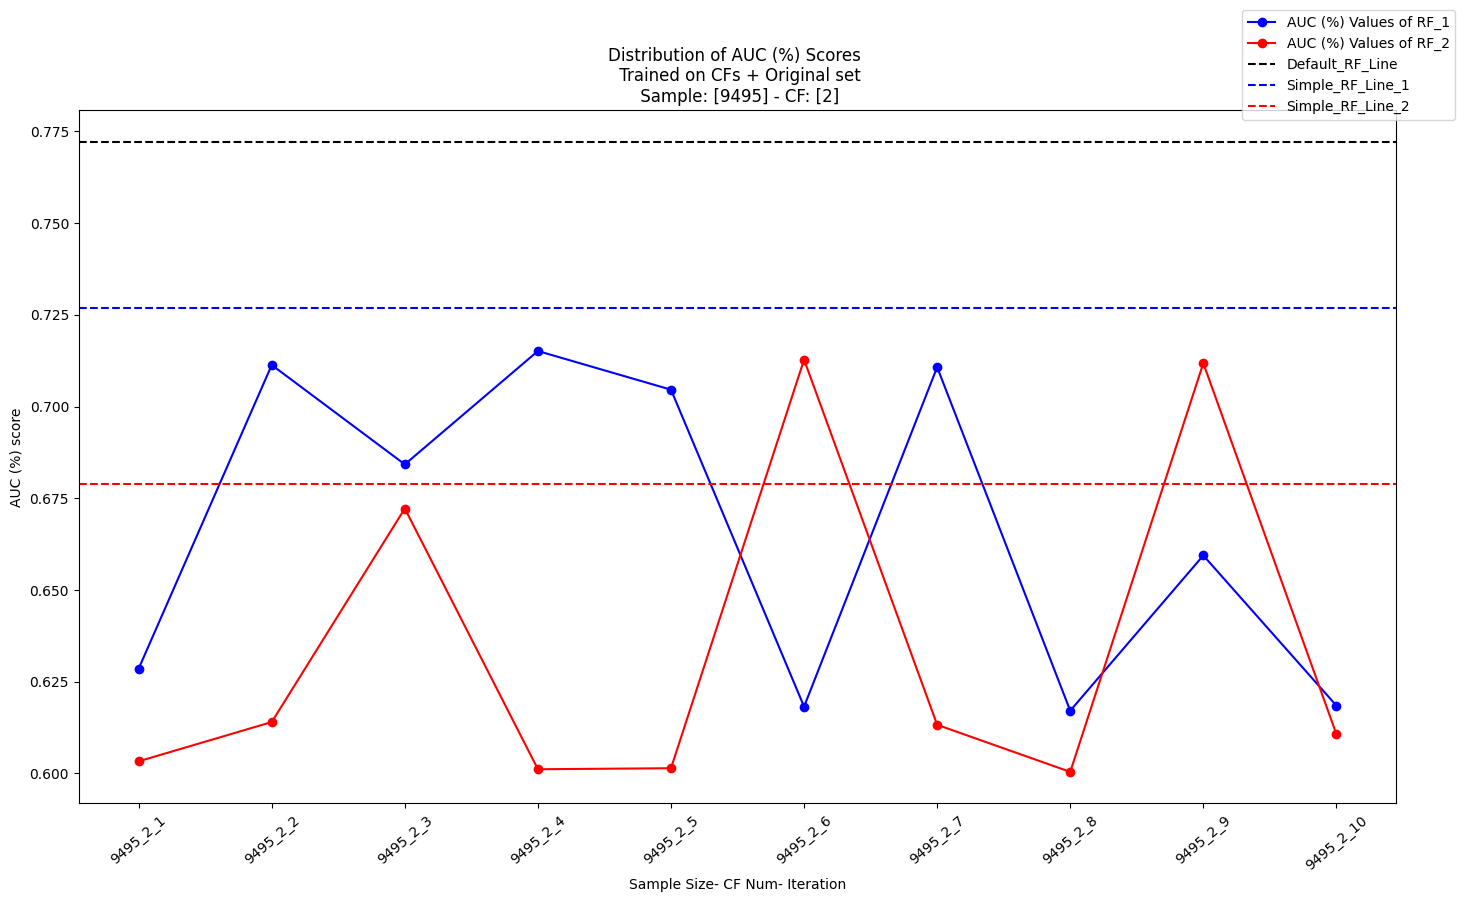

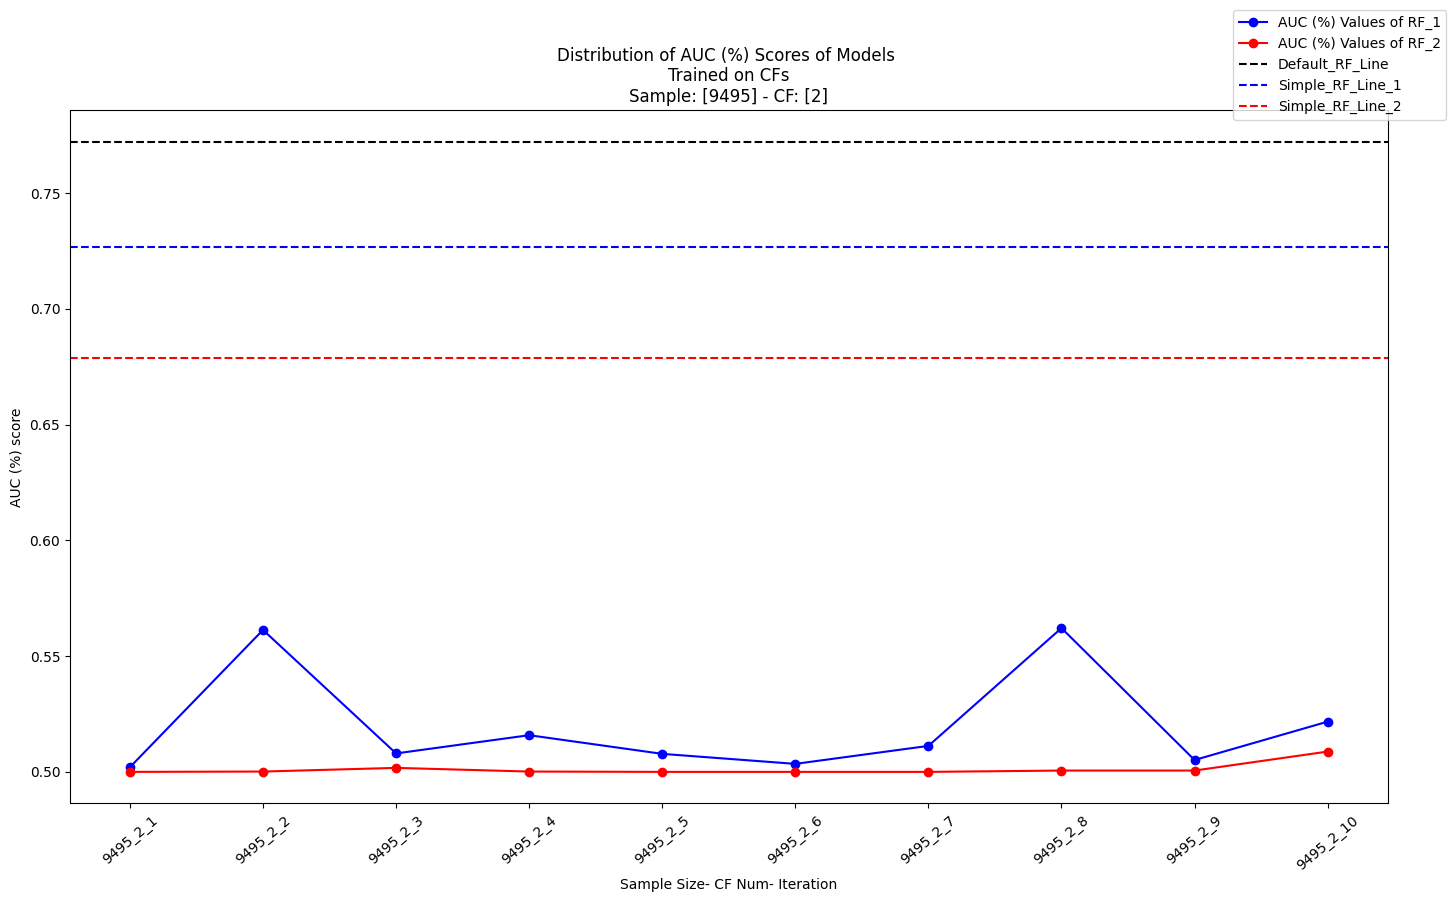

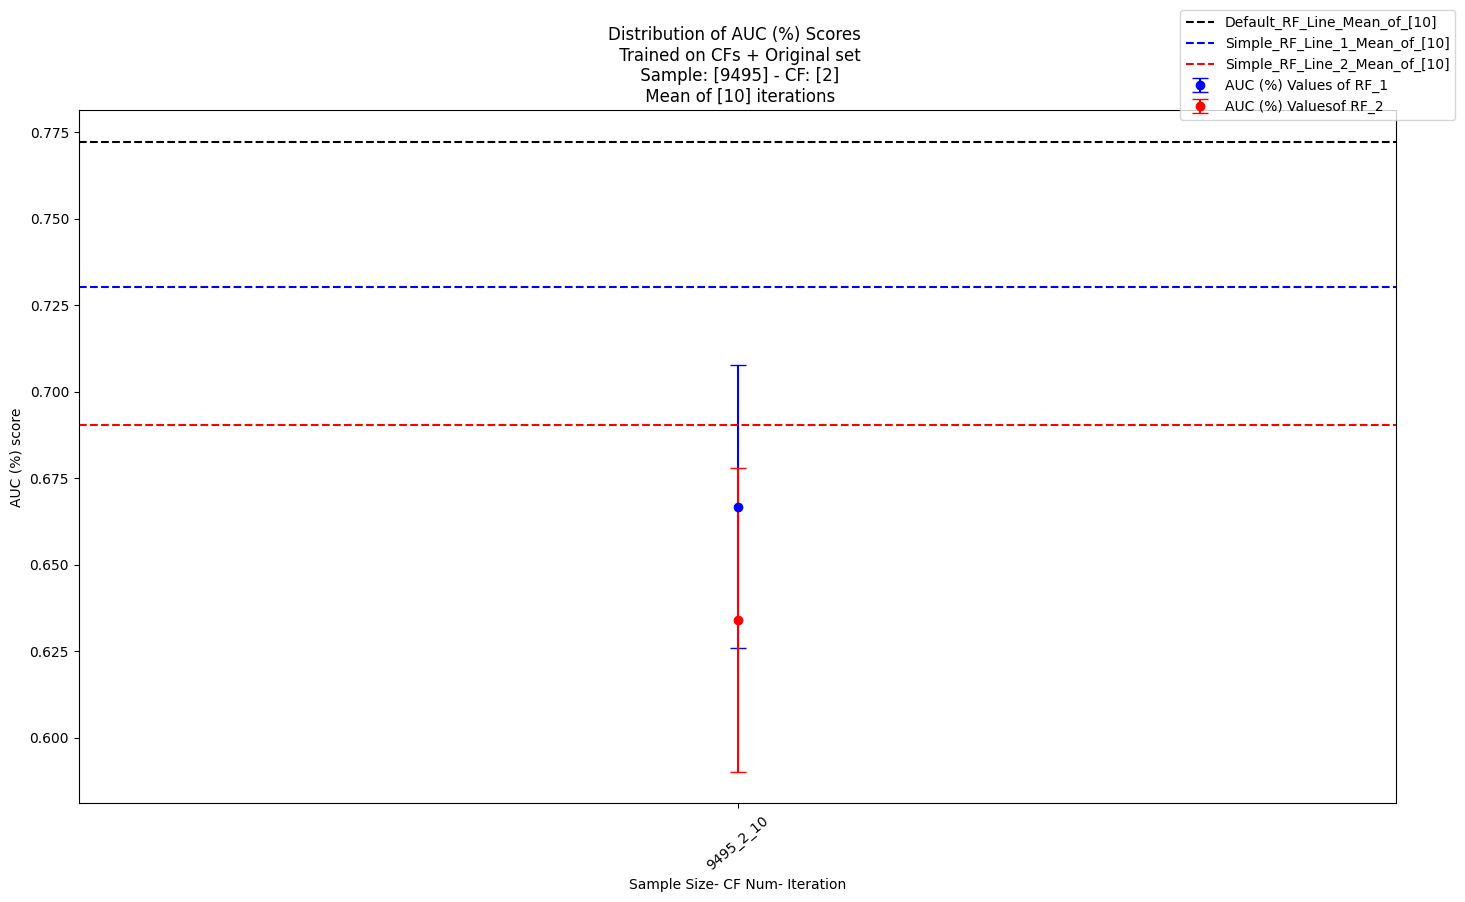

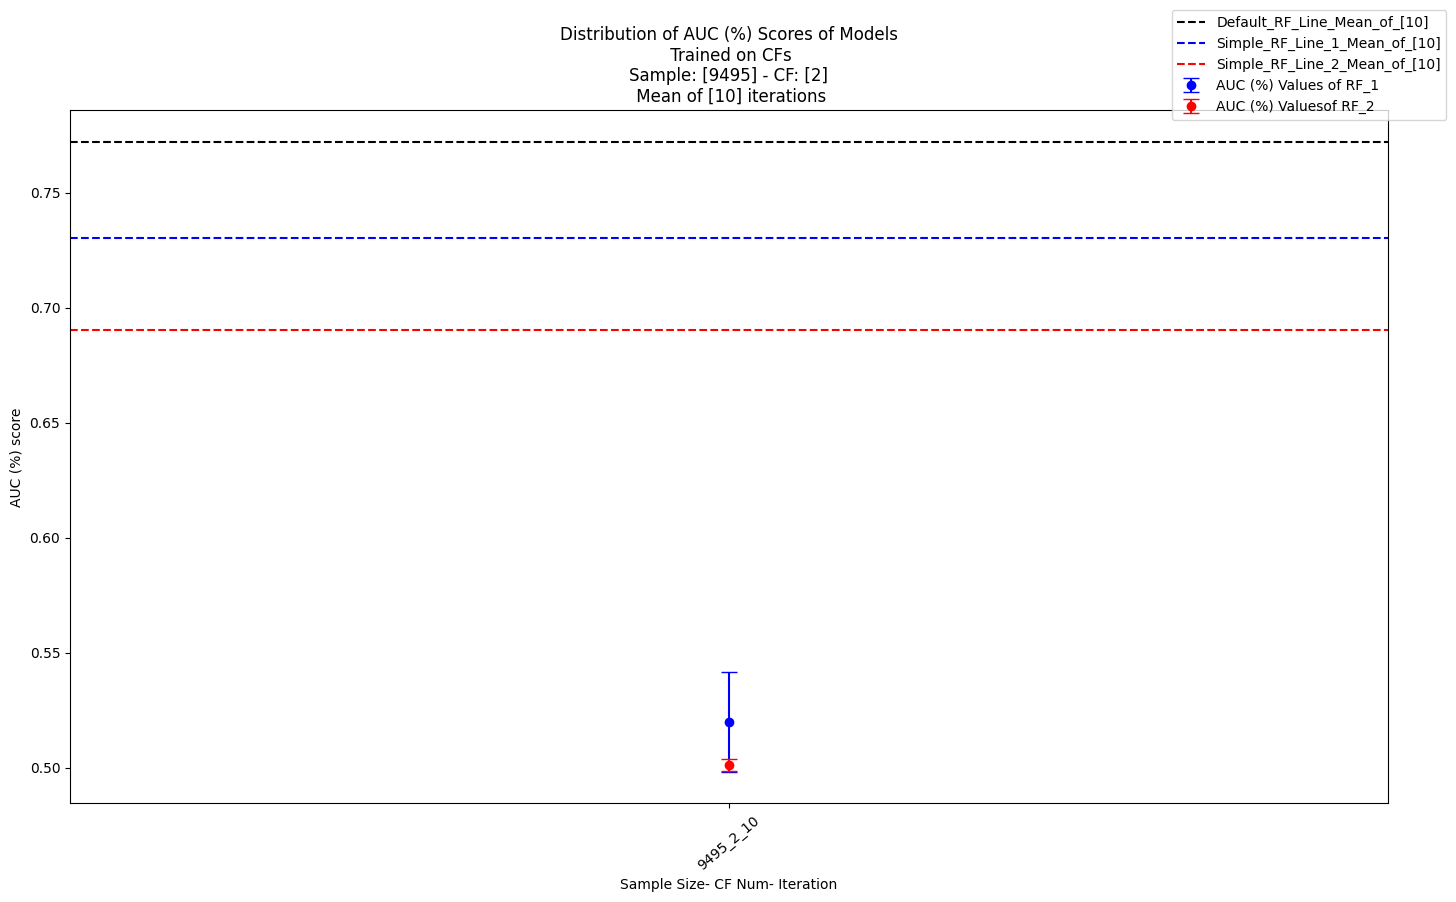

In [30]:
estimator = 50
depth = 5
estimator_2 = 40
depth_2 = 4
fea_to_vary = ['education-num']
sample_size_list = [9495]
total_CFs_list = [ 2]
iteration_num = 10
list_of_plots = ['AUC (%)'] 
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, '9495__1_2 ', list_of_plots)

In [30]:
$$estimator = 50
depth = 5
estimator_2 = 40
depth_2 = 4
fea_to_vary = ['education-num']
sample_size_list = [6331, 9495]
total_CFs_list = [1, 2]
iteration_num = 10
list_of_plots = ['AUC (%)'] 
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, '50_40__6331_9495__1_2 ', list_of_plots)

  0%|          | 7/6331 [00:01<20:29,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/6331 [00:01<18:33,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 12/6331 [00:02<16:30,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/6331 [00:02<16:26,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 16/6331 [00:03<19:44,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 21/6331 [00:04<22:15,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 23/6331 [00:04<20:32,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 30/6331 [00:05<17:39,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 33/6331 [00:06<15:04,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 36/6331 [00:06<17:45,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 39/6331 [00:07<20:08,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 43/6331 [00:08<18:55,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 44/6331 [00:08<17:59,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 49/6331 [00:09<20:02,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/6331 [00:09<17:55,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 52/6331 [00:09<17:53,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 57/6331 [00:10<18:22,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 60/6331 [00:11<16:26,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/6331 [00:12<18:43,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 70/6331 [00:13<21:45,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 73/6331 [00:13<19:23,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 75/6331 [00:14<21:07,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 80/6331 [00:15<22:04,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 81/6331 [00:15<22:25,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 86/6331 [00:16<19:08,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 88/6331 [00:16<18:31,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 93/6331 [00:18<20:42,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 102/6331 [00:20<23:54,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 108/6331 [00:21<27:15,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 109/6331 [00:21<25:39,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 114/6331 [00:23<21:35,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 116/6331 [00:23<21:12,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 121/6331 [00:24<22:09,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 127/6331 [00:26<24:23,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 129/6331 [00:26<21:39,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 132/6331 [00:27<23:06,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 136/6331 [00:28<19:24,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 137/6331 [00:28<16:43,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 140/6331 [00:29<22:06,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 143/6331 [00:29<21:43,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 145/6331 [00:30<21:23,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 146/6331 [00:30<21:34,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 150/6331 [00:31<28:05,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 152/6331 [00:32<27:47,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 155/6331 [00:32<24:13,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 160/6331 [00:34<26:14,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 162/6331 [00:34<24:18,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 165/6331 [00:35<24:22,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 169/6331 [00:36<22:00,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 171/6331 [00:36<21:21,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 177/6331 [00:37<23:05,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 179/6331 [00:38<23:01,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 181/6331 [00:38<21:55,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 185/6331 [00:39<23:33,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 187/6331 [00:40<24:42,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 189/6331 [00:40<22:31,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 195/6331 [00:42<28:22,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 198/6331 [00:43<31:01,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 199/6331 [00:43<29:33,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 200/6331 [00:44<28:19,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 202/6331 [00:44<25:29,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 203/6331 [00:44<24:17,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 221/6331 [00:49<20:12,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 226/6331 [00:50<21:38,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 228/6331 [00:50<20:24,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 229/6331 [00:50<19:32,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 232/6331 [00:51<20:08,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 234/6331 [00:51<21:13,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 235/6331 [00:52<21:03,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 239/6331 [00:52<20:24,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 247/6331 [00:55<26:07,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 251/6331 [00:55<22:14,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 257/6331 [00:57<21:47,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 259/6331 [00:57<19:26,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 262/6331 [00:58<23:44,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 268/6331 [00:59<20:39,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 273/6331 [01:00<21:19,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 275/6331 [01:01<18:46,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 280/6331 [01:02<19:30,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 288/6331 [01:03<19:42,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 290/6331 [01:04<20:58,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 295/6331 [01:05<19:57,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 300/6331 [01:06<19:47,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 302/6331 [01:06<17:47,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 305/6331 [01:07<20:12,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 308/6331 [01:08<19:06,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 310/6331 [01:08<22:13,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 314/6331 [01:09<18:36,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 317/6331 [01:09<16:59,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 319/6331 [01:10<19:02,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 322/6331 [01:11<19:11,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 323/6331 [01:11<18:10,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 326/6331 [01:11<17:48,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 328/6331 [01:12<19:50,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 334/6331 [01:13<18:12,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 339/6331 [01:14<20:00,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 341/6331 [01:14<20:41,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 345/6331 [01:15<18:50,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 346/6331 [01:15<18:13,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 350/6331 [01:16<18:53,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 352/6331 [01:17<18:29,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 355/6331 [01:17<18:57,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 367/6331 [01:20<18:32,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 368/6331 [01:20<18:11,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 370/6331 [01:20<17:55,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 371/6331 [01:21<19:58,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 377/6331 [01:22<17:03,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 379/6331 [01:22<16:02,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 383/6331 [01:23<19:55,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 388/6331 [01:24<18:38,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 390/6331 [01:24<18:48,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 397/6331 [01:26<20:47,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 402/6331 [01:27<18:02,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 407/6331 [01:28<18:41,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 408/6331 [01:28<19:36,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 411/6331 [01:29<20:02,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 415/6331 [01:30<20:27,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 422/6331 [01:31<21:13,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 424/6331 [01:32<18:04,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 429/6331 [01:33<19:34,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 433/6331 [01:34<18:26,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 437/6331 [01:34<19:29,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 438/6331 [01:35<19:00,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 447/6331 [01:37<20:34,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 452/6331 [01:38<18:25,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 456/6331 [01:38<19:58,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 458/6331 [01:39<17:38,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 461/6331 [01:39<17:51,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 464/6331 [01:40<20:36,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 469/6331 [01:41<17:48,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 472/6331 [01:42<17:02,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 477/6331 [01:42<17:28,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 479/6331 [01:43<18:58,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 483/6331 [01:44<19:15,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 485/6331 [01:44<20:15,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 488/6331 [01:45<21:48,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 492/6331 [01:46<20:28,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 494/6331 [01:46<17:25,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 496/6331 [01:46<17:46,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 499/6331 [01:47<18:00,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 502/6331 [01:48<19:30,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 507/6331 [01:49<18:18,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 513/6331 [01:50<17:08,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 515/6331 [01:50<17:06,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 522/6331 [01:51<18:36,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 525/6331 [01:52<19:10,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 527/6331 [01:53<21:05,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 530/6331 [01:53<17:05,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 534/6331 [01:54<20:22,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 537/6331 [01:54<17:32,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 543/6331 [01:55<14:40,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 546/6331 [01:56<16:28,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 550/6331 [01:57<17:15,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 556/6331 [01:58<18:39,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 563/6331 [02:00<21:06,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 565/6331 [02:00<20:08,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 572/6331 [02:01<17:48,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 574/6331 [02:02<19:01,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 580/6331 [02:03<18:39,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 585/6331 [02:04<18:25,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 587/6331 [02:04<15:55,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 592/6331 [02:06<18:30,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 597/6331 [02:07<18:50,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 603/6331 [02:08<16:06,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 607/6331 [02:08<16:33,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 609/6331 [02:09<19:32,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 611/6331 [02:09<18:43,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 614/6331 [02:10<21:42,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 619/6331 [02:11<21:13,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 623/6331 [02:12<19:24,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 624/6331 [02:12<18:03,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 626/6331 [02:13<18:30,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 628/6331 [02:13<17:29,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 636/6331 [02:15<18:59,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 641/6331 [02:16<19:36,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 646/6331 [02:17<18:45,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 648/6331 [02:17<15:53,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 650/6331 [02:17<17:25,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 653/6331 [02:18<17:03,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 659/6331 [02:19<19:33,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 662/6331 [02:20<18:38,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 665/6331 [02:21<17:12,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 666/6331 [02:21<16:52,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 670/6331 [02:22<18:45,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 677/6331 [02:23<19:52,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 683/6331 [02:24<17:48,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 686/6331 [02:25<17:18,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 689/6331 [02:26<17:16,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 694/6331 [02:27<22:20,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 696/6331 [02:27<20:43,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 698/6331 [02:28<19:50,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 701/6331 [02:28<18:40,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 705/6331 [02:29<21:00,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 708/6331 [02:30<19:32,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 711/6331 [02:30<16:15,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 713/6331 [02:31<16:22,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 719/6331 [02:32<16:50,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 722/6331 [02:32<14:30,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 727/6331 [02:33<14:35,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 731/6331 [02:34<16:13,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 740/6331 [02:36<15:35,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 744/6331 [02:36<15:52,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 748/6331 [02:37<17:44,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 754/6331 [02:38<16:00,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 756/6331 [02:39<17:07,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 765/6331 [02:41<16:20,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 769/6331 [02:41<16:01,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 772/6331 [02:42<16:30,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 775/6331 [02:42<15:28,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 778/6331 [02:43<16:01,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 780/6331 [02:43<14:14,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 781/6331 [02:43<13:50,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 786/6331 [02:44<16:56,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 790/6331 [02:45<17:12,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 793/6331 [02:46<17:07,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 797/6331 [02:46<18:23,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 802/6331 [02:47<16:44,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 806/6331 [02:48<15:39,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 808/6331 [02:48<15:34,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 811/6331 [02:49<13:35,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 815/6331 [02:50<16:38,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 822/6331 [02:51<15:55,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 824/6331 [02:51<13:50,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 827/6331 [02:52<16:18,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 834/6331 [02:54<19:53,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 837/6331 [02:54<19:53,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 840/6331 [02:55<17:28,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 843/6331 [02:55<17:35,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 844/6331 [02:56<17:25,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 851/6331 [02:57<17:10,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 855/6331 [02:58<18:22,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 860/6331 [02:59<18:14,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 863/6331 [03:00<18:35,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 864/6331 [03:00<17:59,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 866/6331 [03:00<18:12,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 869/6331 [03:01<17:21,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 872/6331 [03:01<17:51,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 875/6331 [03:02<16:59,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 877/6331 [03:02<17:11,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 879/6331 [03:03<17:22,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 884/6331 [03:04<20:03,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 886/6331 [03:04<19:17,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 889/6331 [03:05<21:43,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 890/6331 [03:05<21:13,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 896/6331 [03:07<23:04,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 901/6331 [03:08<18:19,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 902/6331 [03:08<17:44,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 905/6331 [03:09<18:51,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 909/6331 [03:10<20:00,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 910/6331 [03:10<17:32,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 916/6331 [03:11<18:37,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 924/6331 [03:13<22:42,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 927/6331 [03:14<19:18,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 930/6331 [03:15<19:07,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 934/6331 [03:15<20:37,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 938/6331 [03:16<17:19,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 943/6331 [03:17<18:39,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 948/6331 [03:18<18:15,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 952/6331 [03:19<19:12,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 954/6331 [03:20<20:05,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 956/6331 [03:20<19:08,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 960/6331 [03:21<18:36,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 969/6331 [03:23<18:26,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 973/6331 [03:24<17:57,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 977/6331 [03:25<19:01,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 986/6331 [03:27<20:11,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 988/6331 [03:28<19:59,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 994/6331 [03:29<16:35,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 995/6331 [03:29<16:03,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 999/6331 [03:30<17:55,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1009/6331 [03:32<17:48,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1015/6331 [03:34<17:36,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1017/6331 [03:34<16:30,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1019/6331 [03:34<14:43,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1020/6331 [03:34<14:58,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1022/6331 [03:35<16:06,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1024/6331 [03:35<18:46,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1033/6331 [03:37<18:19,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1035/6331 [03:38<15:44,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1037/6331 [03:38<14:55,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1044/6331 [03:40<18:07,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1045/6331 [03:40<16:58,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1047/6331 [03:40<16:45,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1049/6331 [03:41<19:03,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1052/6331 [03:41<20:35,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1054/6331 [03:42<18:32,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1057/6331 [03:42<16:05,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1059/6331 [03:43<16:19,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1061/6331 [03:43<16:04,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1066/6331 [03:44<20:07,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1069/6331 [03:45<19:15,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1071/6331 [03:45<15:42,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1072/6331 [03:45<14:27,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1076/6331 [03:46<16:40,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1083/6331 [03:48<18:26,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1085/6331 [03:48<16:44,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1087/6331 [03:49<15:09,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1095/6331 [03:50<17:02,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1098/6331 [03:51<18:30,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1102/6331 [03:52<16:49,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1104/6331 [03:52<18:52,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1106/6331 [03:53<17:09,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1111/6331 [03:54<15:46,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1120/6331 [03:56<17:04,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1126/6331 [03:57<21:44,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1129/6331 [03:58<19:11,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1131/6331 [03:58<18:06,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1135/6331 [03:59<18:17,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1140/6331 [04:00<18:14,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1143/6331 [04:01<17:46,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1148/6331 [04:02<15:41,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1151/6331 [04:03<15:54,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1155/6331 [04:04<19:23,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1159/6331 [04:04<17:46,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1160/6331 [04:05<16:09,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1163/6331 [04:05<15:31,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1168/6331 [04:06<20:29,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1173/6331 [04:08<19:53,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1180/6331 [04:09<16:59,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1188/6331 [04:11<18:11,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1193/6331 [04:12<23:40,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1197/6331 [04:13<18:00,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1198/6331 [04:13<17:31,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1200/6331 [04:14<17:08,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1202/6331 [04:14<18:29,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1209/6331 [04:16<17:43,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1214/6331 [04:17<21:16,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1221/6331 [04:19<16:33,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1222/6331 [04:19<15:45,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1226/6331 [04:19<14:37,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1228/6331 [04:20<15:41,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1232/6331 [04:21<14:49,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1234/6331 [04:21<15:29,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1240/6331 [04:22<16:55,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1244/6331 [04:23<20:53,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1248/6331 [04:24<18:39,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1253/6331 [04:26<23:10,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1255/6331 [04:26<23:25,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1256/6331 [04:27<22:46,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1260/6331 [04:28<23:33,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1263/6331 [04:29<21:28,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1266/6331 [04:29<22:25,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1276/6331 [04:32<18:43,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1279/6331 [04:33<15:41,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1291/6331 [04:35<19:26,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1295/6331 [04:36<16:35,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1296/6331 [04:36<15:37,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1299/6331 [04:37<17:54,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1303/6331 [04:38<16:55,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1306/6331 [04:39<17:29,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1309/6331 [04:39<17:40,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1312/6331 [04:40<17:11,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1318/6331 [04:41<18:31,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1321/6331 [04:42<16:41,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1325/6331 [04:43<16:02,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1327/6331 [04:43<17:15,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1329/6331 [04:44<16:34,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1334/6331 [04:45<20:05,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1339/6331 [04:46<16:39,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1340/6331 [04:46<16:13,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1347/6331 [04:48<17:27,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1349/6331 [04:48<16:11,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1351/6331 [04:49<16:48,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1352/6331 [04:49<17:22,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1354/6331 [04:49<17:23,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1356/6331 [04:50<20:08,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1359/6331 [04:50<18:16,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1361/6331 [04:51<20:05,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1365/6331 [04:52<15:48,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1366/6331 [04:52<14:52,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1373/6331 [04:54<18:07,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1376/6331 [04:54<15:46,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1377/6331 [04:54<16:48,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1380/6331 [04:55<19:34,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1383/6331 [04:56<15:25,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1386/6331 [04:56<16:16,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1392/6331 [04:58<17:35,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1395/6331 [04:58<15:35,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1396/6331 [04:58<15:12,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1401/6331 [05:00<18:50,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1406/6331 [05:01<19:01,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1408/6331 [05:01<17:15,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1410/6331 [05:02<20:08,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1412/6331 [05:02<17:40,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1415/6331 [05:03<16:32,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1419/6331 [05:04<17:54,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1425/6331 [05:05<17:07,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1427/6331 [05:05<15:16,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1428/6331 [05:06<14:38,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1432/6331 [05:06<15:42,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1434/6331 [05:07<17:03,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1444/6331 [05:09<19:49,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1445/6331 [05:10<19:40,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1448/6331 [05:10<20:11,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1458/6331 [05:13<20:43,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1460/6331 [05:13<17:23,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1465/6331 [05:15<18:21,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1469/6331 [05:15<14:32,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1479/6331 [05:17<15:37,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1484/6331 [05:19<16:29,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1486/6331 [05:19<15:29,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1492/6331 [05:20<17:43,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1493/6331 [05:21<16:27,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1497/6331 [05:21<16:00,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1503/6331 [05:23<15:42,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1505/6331 [05:23<17:42,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1506/6331 [05:23<17:27,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1510/6331 [05:24<19:16,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1522/6331 [05:27<16:41,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1528/6331 [05:29<17:09,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1531/6331 [05:30<17:07,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1540/6331 [05:32<18:00,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1544/6331 [05:33<18:21,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1546/6331 [05:33<18:07,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1554/6331 [05:35<16:59,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1558/6331 [05:36<17:59,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1569/6331 [05:39<16:13,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1570/6331 [05:39<15:46,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1572/6331 [05:39<17:34,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1574/6331 [05:40<17:08,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1580/6331 [05:41<18:51,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1583/6331 [05:42<17:33,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1586/6331 [05:43<18:06,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1591/6331 [05:44<16:06,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1593/6331 [05:44<14:24,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1595/6331 [05:45<13:45,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1596/6331 [05:45<13:51,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1598/6331 [05:45<17:08,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1600/6331 [05:46<17:41,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1602/6331 [05:46<18:29,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1605/6331 [05:47<18:59,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1608/6331 [05:48<16:30,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1609/6331 [05:48<15:54,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1612/6331 [05:49<17:56,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1615/6331 [05:49<16:00,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1617/6331 [05:50<14:47,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1620/6331 [05:50<16:11,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1625/6331 [05:52<18:42,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1627/6331 [05:52<16:45,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1629/6331 [05:52<16:21,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1637/6331 [05:54<18:05,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1639/6331 [05:55<16:42,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1641/6331 [05:55<16:28,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1646/6331 [05:57<18:57,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1654/6331 [05:58<17:46,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1657/6331 [05:59<15:01,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1659/6331 [05:59<14:11,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1664/6331 [06:00<17:50,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1666/6331 [06:01<18:07,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1670/6331 [06:02<14:25,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1671/6331 [06:02<13:49,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1672/6331 [06:02<14:49,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1677/6331 [06:03<15:52,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1680/6331 [06:04<15:51,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1682/6331 [06:04<16:58,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1685/6331 [06:05<17:16,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1690/6331 [06:06<16:20,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1696/6331 [06:08<16:12,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1698/6331 [06:08<14:55,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1704/6331 [06:09<14:18,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1705/6331 [06:09<13:27,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1706/6331 [06:09<15:13,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1708/6331 [06:10<16:56,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1709/6331 [06:10<17:54,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1715/6331 [06:11<14:49,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1717/6331 [06:12<15:08,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1722/6331 [06:13<14:38,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1723/6331 [06:13<14:09,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1731/6331 [06:15<13:45,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1737/6331 [06:16<16:42,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1740/6331 [06:17<18:24,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1754/6331 [06:20<14:46,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1763/6331 [06:22<17:37,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1767/6331 [06:23<18:15,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1770/6331 [06:24<17:02,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1773/6331 [06:25<18:30,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1777/6331 [06:26<16:27,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1779/6331 [06:26<15:03,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1786/6331 [06:28<15:19,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1789/6331 [06:28<16:27,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1792/6331 [06:29<15:52,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1796/6331 [06:30<13:54,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1799/6331 [06:30<14:45,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1802/6331 [06:31<14:53,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1804/6331 [06:32<16:30,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1806/6331 [06:32<15:43,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1809/6331 [06:33<17:47,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1811/6331 [06:33<16:51,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1820/6331 [06:35<18:11,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1827/6331 [06:37<17:54,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1832/6331 [06:38<16:32,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1835/6331 [06:39<16:07,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1838/6331 [06:40<17:51,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1847/6331 [06:42<18:09,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1850/6331 [06:43<17:59,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1857/6331 [06:45<17:09,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1860/6331 [06:45<14:14,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1862/6331 [06:46<17:24,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1865/6331 [06:47<19:06,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1870/6331 [06:48<17:45,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1873/6331 [06:49<17:51,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1878/6331 [06:50<18:15,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1880/6331 [06:50<16:21,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1884/6331 [06:51<16:34,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1887/6331 [06:52<17:13,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1894/6331 [06:54<15:42,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1896/6331 [06:54<14:43,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1902/6331 [06:56<16:25,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1906/6331 [06:56<16:49,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1914/6331 [06:58<17:12,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1917/6331 [06:59<16:58,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1919/6331 [07:00<15:17,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1923/6331 [07:01<17:11,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1925/6331 [07:01<15:18,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1928/6331 [07:02<14:54,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1933/6331 [07:03<15:21,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1937/6331 [07:04<13:29,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1939/6331 [07:04<13:39,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1947/6331 [07:06<17:33,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1953/6331 [07:07<16:23,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1956/6331 [07:08<15:02,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1958/6331 [07:08<13:27,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1965/6331 [07:10<18:42,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1967/6331 [07:11<15:49,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1971/6331 [07:11<15:38,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1973/6331 [07:12<16:21,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1977/6331 [07:13<14:49,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1979/6331 [07:13<13:21,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1983/6331 [07:14<14:37,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1986/6331 [07:15<13:24,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1990/6331 [07:15<13:58,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 1995/6331 [07:16<14:40,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 1997/6331 [07:17<16:10,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2001/6331 [07:18<15:20,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2010/6331 [07:20<14:58,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2016/6331 [07:21<15:40,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2025/6331 [07:24<16:01,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2028/6331 [07:24<14:04,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2029/6331 [07:24<14:18,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2032/6331 [07:25<19:46,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2036/6331 [07:26<18:14,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2040/6331 [07:27<15:17,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2041/6331 [07:27<14:21,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2044/6331 [07:28<16:22,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2049/6331 [07:29<14:39,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2053/6331 [07:30<16:55,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2055/6331 [07:31<15:37,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2058/6331 [07:31<14:26,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2059/6331 [07:32<15:56,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2064/6331 [07:33<16:03,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2068/6331 [07:34<18:19,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2071/6331 [07:35<18:34,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2076/6331 [07:36<15:49,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2079/6331 [07:36<13:49,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2080/6331 [07:37<15:26,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2085/6331 [07:38<13:49,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2089/6331 [07:39<14:20,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2094/6331 [07:40<18:00,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2096/6331 [07:40<16:43,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2101/6331 [07:42<16:49,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2105/6331 [07:42<14:32,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2108/6331 [07:43<14:30,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2110/6331 [07:44<15:01,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2111/6331 [07:44<14:23,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2114/6331 [07:44<15:22,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2117/6331 [07:45<15:19,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2120/6331 [07:46<15:16,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2130/6331 [07:48<15:30,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2131/6331 [07:49<16:10,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2133/6331 [07:49<15:43,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2136/6331 [07:50<15:10,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2137/6331 [07:50<15:27,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2139/6331 [07:50<16:31,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2143/6331 [07:52<18:10,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2147/6331 [07:52<15:47,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2151/6331 [07:53<13:36,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2153/6331 [07:54<16:12,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2166/6331 [07:57<14:13,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2169/6331 [07:58<13:22,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2175/6331 [07:59<14:17,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2176/6331 [07:59<15:21,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2179/6331 [08:00<13:54,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2182/6331 [08:00<14:13,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2183/6331 [08:01<12:45,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2188/6331 [08:02<14:39,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2191/6331 [08:02<13:39,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2192/6331 [08:03<14:40,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2195/6331 [08:03<15:18,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2199/6331 [08:04<16:39,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2202/6331 [08:05<16:05,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2204/6331 [08:05<14:49,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2207/6331 [08:06<14:04,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2209/6331 [08:06<12:20,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2210/6331 [08:07<12:33,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2213/6331 [08:07<13:26,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2217/6331 [08:08<13:59,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2225/6331 [08:10<13:26,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2227/6331 [08:10<12:33,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2231/6331 [08:11<14:34,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2232/6331 [08:11<13:38,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2237/6331 [08:13<15:15,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2243/6331 [08:14<16:45,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2249/6331 [08:16<15:57,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2250/6331 [08:16<14:59,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2252/6331 [08:16<15:58,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2256/6331 [08:17<16:44,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2258/6331 [08:18<17:53,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2260/6331 [08:18<16:29,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2262/6331 [08:19<16:03,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2265/6331 [08:20<16:26,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2269/6331 [08:21<18:18,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2272/6331 [08:22<18:08,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2273/6331 [08:22<17:02,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2276/6331 [08:22<15:51,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2279/6331 [08:23<15:21,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2281/6331 [08:24<15:10,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2283/6331 [08:24<14:56,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2287/6331 [08:25<13:51,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2288/6331 [08:25<13:18,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2290/6331 [08:26<14:52,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2293/6331 [08:27<17:50,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2297/6331 [08:28<17:28,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2299/6331 [08:28<15:48,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2301/6331 [08:28<15:31,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2302/6331 [08:29<14:22,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2305/6331 [08:29<13:02,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2309/6331 [08:30<14:31,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2317/6331 [08:32<17:30,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2322/6331 [08:34<16:20,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2326/6331 [08:34<14:38,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2328/6331 [08:35<13:55,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2331/6331 [08:36<16:35,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2335/6331 [08:37<14:32,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2336/6331 [08:37<15:54,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2341/6331 [08:38<15:41,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2358/6331 [08:43<16:00,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2359/6331 [08:43<17:45,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2361/6331 [08:43<15:17,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2363/6331 [08:44<15:19,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2366/6331 [08:45<16:20,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2369/6331 [08:46<17:19,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2371/6331 [08:46<14:56,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2374/6331 [08:47<13:17,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2376/6331 [08:47<11:47,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2383/6331 [08:49<14:09,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2385/6331 [08:49<13:41,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2390/6331 [08:50<14:56,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2396/6331 [08:52<14:56,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2399/6331 [08:52<12:18,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2401/6331 [08:53<12:51,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2406/6331 [08:54<13:16,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2409/6331 [08:54<15:56,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2412/6331 [08:55<14:17,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2414/6331 [08:56<14:11,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2417/6331 [08:56<14:35,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2422/6331 [08:57<13:35,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2424/6331 [08:58<13:29,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2430/6331 [08:59<13:42,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2434/6331 [09:00<14:16,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2437/6331 [09:01<12:34,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 2440/6331 [09:01<12:42,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 2443/6331 [09:02<13:04,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 2449/6331 [09:03<12:40,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2462/6331 [09:06<14:39,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2476/6331 [09:10<14:17,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2479/6331 [09:11<12:54,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2482/6331 [09:11<12:16,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2484/6331 [09:12<12:30,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2489/6331 [09:13<13:38,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2491/6331 [09:13<13:39,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2494/6331 [09:14<15:05,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2497/6331 [09:15<15:17,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2499/6331 [09:15<14:21,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2514/6331 [09:19<15:23,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2519/6331 [09:20<14:37,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2526/6331 [09:22<13:34,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2530/6331 [09:23<15:02,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2532/6331 [09:23<13:33,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2536/6331 [09:25<15:52,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2538/6331 [09:25<14:36,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2542/6331 [09:26<15:58,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2554/6331 [09:30<17:20,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2556/6331 [09:30<15:28,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2558/6331 [09:30<13:54,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2565/6331 [09:32<17:18,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2567/6331 [09:33<14:30,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2570/6331 [09:33<14:01,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2574/6331 [09:34<14:26,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2583/6331 [09:37<15:08,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2589/6331 [09:38<14:09,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2590/6331 [09:38<13:32,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2595/6331 [09:39<12:34,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2599/6331 [09:40<13:25,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2607/6331 [09:42<15:33,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2610/6331 [09:43<13:24,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2612/6331 [09:43<14:01,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2621/6331 [09:46<13:41,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2624/6331 [09:46<12:15,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2627/6331 [09:47<12:51,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2629/6331 [09:47<15:50,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2635/6331 [09:49<14:35,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2644/6331 [09:51<12:29,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2646/6331 [09:51<12:07,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2653/6331 [09:53<12:30,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2654/6331 [09:53<11:58,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2656/6331 [09:53<13:03,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2663/6331 [09:55<14:18,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2665/6331 [09:56<13:57,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2667/6331 [09:56<13:28,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2672/6331 [09:57<13:43,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2680/6331 [09:59<12:41,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2682/6331 [10:00<12:39,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2697/6331 [10:03<12:22,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2700/6331 [10:04<13:31,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2705/6331 [10:05<14:28,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2708/6331 [10:06<12:07,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2709/6331 [10:06<11:43,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2714/6331 [10:07<12:38,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2717/6331 [10:08<12:29,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2726/6331 [10:10<12:43,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2732/6331 [10:11<12:05,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2741/6331 [10:13<13:18,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2742/6331 [10:13<12:55,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2747/6331 [10:14<11:09,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2752/6331 [10:16<12:26,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2758/6331 [10:17<12:30,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2761/6331 [10:17<11:47,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2765/6331 [10:18<12:16,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2766/6331 [10:19<11:29,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2768/6331 [10:19<11:50,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2771/6331 [10:19<10:28,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2773/6331 [10:20<11:02,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2777/6331 [10:21<12:48,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2779/6331 [10:21<13:18,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2781/6331 [10:22<12:09,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2783/6331 [10:22<12:05,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2786/6331 [10:23<13:23,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2788/6331 [10:23<11:42,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2790/6331 [10:24<11:32,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2792/6331 [10:24<11:29,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2795/6331 [10:25<10:50,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2802/6331 [10:26<12:56,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2805/6331 [10:27<13:54,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2807/6331 [10:28<12:54,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2809/6331 [10:28<13:07,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2816/6331 [10:30<14:45,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2818/6331 [10:30<13:16,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2820/6331 [10:31<14:38,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2822/6331 [10:31<12:31,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2826/6331 [10:32<11:45,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2831/6331 [10:33<12:27,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2834/6331 [10:34<13:22,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2836/6331 [10:35<12:27,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2838/6331 [10:35<11:35,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2843/6331 [10:36<11:08,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2853/6331 [10:38<12:20,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2861/6331 [10:40<12:16,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2863/6331 [10:41<13:31,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2866/6331 [10:41<12:31,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2870/6331 [10:43<14:12,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2873/6331 [10:43<13:40,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2877/6331 [10:44<12:28,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2881/6331 [10:45<12:58,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2884/6331 [10:46<11:15,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2886/6331 [10:46<11:52,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2889/6331 [10:47<13:59,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2895/6331 [10:48<12:40,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2900/6331 [10:50<13:00,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2902/6331 [10:50<12:14,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2909/6331 [10:52<12:37,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2913/6331 [10:53<12:22,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2917/6331 [10:54<12:17,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2920/6331 [10:54<11:59,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2923/6331 [10:55<13:59,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2928/6331 [10:56<12:15,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2931/6331 [10:57<14:18,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2934/6331 [10:58<11:37,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2937/6331 [10:58<11:43,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2940/6331 [10:59<11:22,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2943/6331 [10:59<12:27,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2945/6331 [11:00<13:58,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2950/6331 [11:01<12:31,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2953/6331 [11:02<11:43,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2960/6331 [11:04<14:37,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2963/6331 [11:05<15:41,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2965/6331 [11:05<14:11,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2967/6331 [11:06<12:27,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2968/6331 [11:06<11:27,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2971/6331 [11:07<13:43,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2978/6331 [11:08<13:31,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2982/6331 [11:09<13:05,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2987/6331 [11:11<12:22,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2988/6331 [11:11<11:23,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2991/6331 [11:11<11:19,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2994/6331 [11:12<13:38,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2995/6331 [11:12<13:35,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 3001/6331 [11:14<13:25,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 3003/6331 [11:15<13:44,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 3006/6331 [11:15<11:44,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3013/6331 [11:17<15:59,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3015/6331 [11:18<13:23,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3017/6331 [11:18<13:40,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3021/6331 [11:19<13:07,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3026/6331 [11:20<14:20,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3032/6331 [11:22<13:25,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3035/6331 [11:23<14:53,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3036/6331 [11:23<14:02,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3040/6331 [11:24<12:26,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3044/6331 [11:25<13:04,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3047/6331 [11:26<12:50,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3050/6331 [11:26<11:48,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3051/6331 [11:27<11:04,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3053/6331 [11:27<11:29,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3060/6331 [11:29<13:19,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3063/6331 [11:30<12:30,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3066/6331 [11:31<14:35,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3073/6331 [11:32<13:47,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3077/6331 [11:34<14:30,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3083/6331 [11:35<12:52,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3084/6331 [11:35<14:15,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3092/6331 [11:38<15:29,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3094/6331 [11:38<12:41,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3096/6331 [11:39<14:02,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3105/6331 [11:41<12:47,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3107/6331 [11:42<13:21,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3111/6331 [11:43<11:20,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3115/6331 [11:43<11:21,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3116/6331 [11:44<10:51,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3117/6331 [11:44<11:13,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3125/6331 [11:46<13:21,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3129/6331 [11:47<13:03,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3132/6331 [11:48<13:48,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3134/6331 [11:48<14:06,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3136/6331 [11:49<14:51,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3137/6331 [11:49<13:45,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3140/6331 [11:50<13:10,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3147/6331 [11:52<11:56,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3148/6331 [11:52<12:28,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3153/6331 [11:53<13:15,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3155/6331 [11:54<13:58,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3158/6331 [11:55<13:11,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3164/6331 [11:56<11:58,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3165/6331 [11:56<11:34,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3166/6331 [11:57<12:59,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3169/6331 [11:58<13:50,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3175/6331 [11:59<13:53,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3180/6331 [12:01<13:26,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3187/6331 [12:03<15:09,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3192/6331 [12:04<12:43,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3194/6331 [12:04<11:45,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3198/6331 [12:05<11:03,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3199/6331 [12:05<10:40,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3200/6331 [12:06<11:14,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3201/6331 [12:06<11:16,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3203/6331 [12:06<12:27,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3205/6331 [12:07<12:19,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3206/6331 [12:07<12:03,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3207/6331 [12:07<12:35,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3215/6331 [12:10<14:22,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3222/6331 [12:12<12:35,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3224/6331 [12:12<12:00,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3230/6331 [12:14<13:21,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3232/6331 [12:14<11:52,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3250/6331 [12:19<14:00,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3256/6331 [12:21<12:03,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3257/6331 [12:21<11:40,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3259/6331 [12:22<13:26,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3261/6331 [12:22<12:01,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3264/6331 [12:23<13:42,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3268/6331 [12:24<14:50,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3271/6331 [12:25<12:48,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3274/6331 [12:26<13:08,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3276/6331 [12:26<13:02,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3287/6331 [12:30<12:40,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3291/6331 [12:31<13:13,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3293/6331 [12:31<11:56,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3296/6331 [12:32<13:18,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3297/6331 [12:32<14:20,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3300/6331 [12:33<13:25,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3303/6331 [12:34<11:11,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3305/6331 [12:34<11:39,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3309/6331 [12:35<12:31,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3311/6331 [12:36<14:40,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3312/6331 [12:36<13:42,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3314/6331 [12:37<12:42,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3317/6331 [12:37<13:21,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3322/6331 [12:39<12:57,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3327/6331 [12:40<13:55,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3329/6331 [12:41<14:07,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3330/6331 [12:41<14:08,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3334/6331 [12:42<13:21,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3339/6331 [12:44<13:56,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3340/6331 [12:44<13:10,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3345/6331 [12:46<14:44,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3346/6331 [12:46<13:23,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3352/6331 [12:47<11:24,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3353/6331 [12:47<10:53,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3356/6331 [12:48<10:59,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3357/6331 [12:48<11:20,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3363/6331 [12:50<15:22,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3364/6331 [12:51<17:12,  2.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3365/6331 [12:51<16:43,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3368/6331 [12:52<15:54,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3369/6331 [12:52<14:38,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3376/6331 [12:55<15:34,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3377/6331 [12:55<16:15,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3379/6331 [12:56<14:20,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3380/6331 [12:56<14:00,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3383/6331 [12:57<12:58,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3384/6331 [12:57<14:38,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3387/6331 [12:58<11:59,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3388/6331 [12:58<12:27,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3394/6331 [12:59<11:07,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3397/6331 [13:00<12:25,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3400/6331 [13:01<10:36,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3402/6331 [13:01<10:10,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3407/6331 [13:03<11:48,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3411/6331 [13:04<13:11,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3414/6331 [13:05<12:55,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3417/6331 [13:05<12:52,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3430/6331 [13:10<15:12,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3434/6331 [13:11<15:55,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3435/6331 [13:11<14:32,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3439/6331 [13:12<13:31,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3442/6331 [13:13<11:19,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3443/6331 [13:13<11:00,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3449/6331 [13:15<13:03,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3454/6331 [13:16<11:45,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3459/6331 [13:18<12:15,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3463/6331 [13:19<11:59,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3470/6331 [13:21<12:49,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3474/6331 [13:22<12:13,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3476/6331 [13:22<12:50,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3477/6331 [13:23<12:22,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3480/6331 [13:23<12:29,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3487/6331 [13:25<12:17,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3488/6331 [13:26<12:17,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3491/6331 [13:27<11:55,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3492/6331 [13:27<11:07,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3496/6331 [13:28<13:42,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3499/6331 [13:29<11:05,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3502/6331 [13:29<10:26,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3504/6331 [13:30<10:44,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3506/6331 [13:30<11:27,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3507/6331 [13:31<12:21,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3515/6331 [13:33<12:37,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3520/6331 [13:34<11:53,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3521/6331 [13:34<11:43,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3522/6331 [13:35<13:27,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3523/6331 [13:35<12:21,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3526/6331 [13:36<12:36,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3529/6331 [13:37<10:58,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3535/6331 [13:39<14:10,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3537/6331 [13:39<11:49,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3541/6331 [13:40<12:27,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3545/6331 [13:41<14:23,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3547/6331 [13:42<15:25,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3554/6331 [13:44<12:58,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3557/6331 [13:45<12:53,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3559/6331 [13:45<12:16,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3562/6331 [13:46<12:26,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3572/6331 [13:50<13:16,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3574/6331 [13:50<11:37,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3580/6331 [13:52<11:52,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3584/6331 [13:53<11:07,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3587/6331 [13:53<11:37,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3589/6331 [13:54<10:58,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3594/6331 [13:55<13:01,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3599/6331 [13:57<12:11,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3601/6331 [13:57<11:14,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3605/6331 [13:58<10:25,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3606/6331 [13:58<09:57,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3612/6331 [14:00<10:22,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3622/6331 [14:03<14:01,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3624/6331 [14:03<11:52,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3628/6331 [14:05<13:47,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3632/6331 [14:06<11:59,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3635/6331 [14:06<10:43,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3637/6331 [14:07<11:46,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3640/6331 [14:08<10:33,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3643/6331 [14:09<12:23,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3647/6331 [14:10<12:32,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3650/6331 [14:10<10:22,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3653/6331 [14:11<09:23,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3654/6331 [14:11<09:04,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3655/6331 [14:12<09:12,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3657/6331 [14:12<11:08,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3663/6331 [14:14<14:26,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3665/6331 [14:15<14:12,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3667/6331 [14:15<12:16,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3680/6331 [14:19<12:23,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3683/6331 [14:20<13:22,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3685/6331 [14:21<11:56,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3688/6331 [14:21<09:49,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3693/6331 [14:23<10:04,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3698/6331 [14:24<13:58,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3699/6331 [14:25<13:23,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3700/6331 [14:25<12:30,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3702/6331 [14:25<10:45,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3705/6331 [14:26<12:24,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3706/6331 [14:26<11:34,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3708/6331 [14:27<11:05,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3712/6331 [14:28<12:04,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3716/6331 [14:29<11:17,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3717/6331 [14:29<11:19,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3719/6331 [14:30<11:22,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3722/6331 [14:31<10:39,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3724/6331 [14:31<11:18,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3725/6331 [14:32<11:05,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3727/6331 [14:32<10:16,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3731/6331 [14:33<09:48,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3734/6331 [14:34<10:58,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3737/6331 [14:35<13:29,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3740/6331 [14:36<13:00,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3742/6331 [14:36<11:06,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3745/6331 [14:37<10:27,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3746/6331 [14:37<11:29,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3751/6331 [14:38<10:04,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3754/6331 [14:39<09:42,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3757/6331 [14:40<11:22,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3758/6331 [14:40<11:05,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3759/6331 [14:40<10:34,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3762/6331 [14:41<11:26,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3765/6331 [14:42<11:29,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3767/6331 [14:43<11:06,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3768/6331 [14:43<12:26,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3769/6331 [14:43<11:49,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3776/6331 [14:47<21:27,  1.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3778/6331 [14:48<20:26,  2.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3785/6331 [14:51<15:48,  2.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3800/6331 [14:58<16:40,  2.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3803/6331 [14:59<15:38,  2.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3805/6331 [14:59<15:06,  2.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3812/6331 [15:02<17:01,  2.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3813/6331 [15:03<18:32,  2.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3815/6331 [15:04<17:54,  2.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3819/6331 [15:05<16:48,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3821/6331 [15:06<17:05,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3822/6331 [15:07<15:00,  2.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3824/6331 [15:07<12:03,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3831/6331 [15:10<15:57,  2.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3833/6331 [15:10<14:17,  2.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3834/6331 [15:11<13:45,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3835/6331 [15:11<15:36,  2.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3839/6331 [15:13<14:04,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3840/6331 [15:13<13:17,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3842/6331 [15:14<15:00,  2.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3845/6331 [15:15<15:55,  2.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3848/6331 [15:16<15:21,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3849/6331 [15:16<15:03,  2.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3853/6331 [15:18<14:26,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3854/6331 [15:18<13:19,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3857/6331 [15:19<15:03,  2.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3861/6331 [15:21<14:11,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3862/6331 [15:21<13:02,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3872/6331 [15:24<10:05,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3873/6331 [15:24<09:15,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3874/6331 [15:25<10:04,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3882/6331 [15:27<13:53,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3883/6331 [15:28<13:06,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3885/6331 [15:28<13:29,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3886/6331 [15:29<12:41,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3887/6331 [15:29<11:52,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3894/6331 [15:31<13:07,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3896/6331 [15:32<11:00,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3898/6331 [15:33<12:43,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3899/6331 [15:33<11:59,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3903/6331 [15:34<10:40,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3904/6331 [15:34<10:35,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3906/6331 [15:35<09:07,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3911/6331 [15:36<11:57,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3912/6331 [15:36<11:08,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3913/6331 [15:36<10:09,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3919/6331 [15:38<11:15,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3922/6331 [15:39<11:23,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3924/6331 [15:40<11:02,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3930/6331 [15:42<13:59,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3931/6331 [15:42<13:11,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3941/6331 [15:46<13:56,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3942/6331 [15:46<13:04,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3943/6331 [15:46<12:02,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3948/6331 [15:48<11:44,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3956/6331 [15:50<11:38,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3962/6331 [15:52<12:09,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3963/6331 [15:53<12:19,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3964/6331 [15:53<12:05,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3967/6331 [15:54<12:08,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3969/6331 [15:55<11:49,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3970/6331 [15:55<11:55,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3972/6331 [15:56<13:20,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3975/6331 [15:57<13:20,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3983/6331 [16:00<14:06,  2.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3990/6331 [16:02<11:21,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3991/6331 [16:02<10:30,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3994/6331 [16:04<12:27,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4000/6331 [16:06<16:52,  2.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4002/6331 [16:07<14:49,  2.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4008/6331 [16:09<15:26,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4009/6331 [16:09<13:25,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4011/6331 [16:10<12:13,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4021/6331 [16:13<10:18,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4025/6331 [16:14<09:53,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4027/6331 [16:14<08:56,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4028/6331 [16:15<08:35,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4034/6331 [16:16<08:36,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4039/6331 [16:17<09:37,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4044/6331 [16:19<10:29,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4045/6331 [16:19<09:56,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4047/6331 [16:20<10:28,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4048/6331 [16:20<09:56,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4049/6331 [16:20<09:49,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4050/6331 [16:21<10:16,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4052/6331 [16:21<10:51,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4061/6331 [16:25<15:07,  2.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4067/6331 [16:26<10:23,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4068/6331 [16:27<09:44,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4070/6331 [16:27<08:53,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4071/6331 [16:27<09:03,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4080/6331 [16:31<14:19,  2.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4081/6331 [16:31<13:19,  2.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4082/6331 [16:32<12:52,  2.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4083/6331 [16:32<11:33,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4085/6331 [16:32<10:26,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4088/6331 [16:33<11:28,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4091/6331 [16:34<11:03,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4096/6331 [16:36<10:37,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4098/6331 [16:36<11:04,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4099/6331 [16:37<10:10,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4104/6331 [16:38<10:34,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4106/6331 [16:39<10:09,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4111/6331 [16:40<10:39,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4112/6331 [16:41<10:26,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4114/6331 [16:41<09:14,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4122/6331 [16:43<10:20,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4123/6331 [16:44<09:48,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4129/6331 [16:45<11:17,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4130/6331 [16:46<10:19,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4134/6331 [16:47<10:58,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4135/6331 [16:47<10:29,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4137/6331 [16:48<10:25,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4140/6331 [16:49<11:25,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4144/6331 [16:50<13:54,  2.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4145/6331 [16:51<12:02,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4147/6331 [16:51<11:15,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4153/6331 [16:53<10:38,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4154/6331 [16:53<09:49,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4156/6331 [16:54<09:20,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4159/6331 [16:55<09:00,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4161/6331 [16:55<09:59,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4162/6331 [16:56<10:31,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4166/6331 [16:57<11:13,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4171/6331 [16:59<10:36,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4176/6331 [17:00<11:00,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4177/6331 [17:00<11:00,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4179/6331 [17:01<09:51,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4182/6331 [17:02<10:41,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4184/6331 [17:03<11:22,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4186/6331 [17:03<10:48,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4187/6331 [17:03<10:09,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4188/6331 [17:04<09:32,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4193/6331 [17:06<12:51,  2.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4196/6331 [17:06<10:51,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4202/6331 [17:08<11:01,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4206/6331 [17:10<11:45,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4209/6331 [17:11<11:06,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4220/6331 [17:14<11:11,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4222/6331 [17:15<10:46,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4232/6331 [17:19<11:04,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4235/6331 [17:19<10:32,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4240/6331 [17:21<12:23,  2.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4244/6331 [17:23<10:12,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4249/6331 [17:24<10:35,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4251/6331 [17:25<10:27,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4252/6331 [17:25<09:46,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4254/6331 [17:26<08:39,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4256/6331 [17:26<09:36,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4258/6331 [17:27<08:59,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4260/6331 [17:27<08:44,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4269/6331 [17:30<09:01,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4272/6331 [17:31<10:20,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4273/6331 [17:31<09:30,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4274/6331 [17:31<08:49,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4276/6331 [17:32<09:31,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4282/6331 [17:34<09:25,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4284/6331 [17:34<09:25,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4285/6331 [17:35<08:44,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4287/6331 [17:35<08:09,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4289/6331 [17:36<08:41,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4295/6331 [17:37<09:49,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4304/6331 [17:40<10:04,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4306/6331 [17:41<09:55,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4312/6331 [17:42<07:56,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4314/6331 [17:43<07:58,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4319/6331 [17:44<09:24,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4320/6331 [17:44<08:38,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4328/6331 [17:47<08:52,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4333/6331 [17:48<09:28,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4334/6331 [17:49<08:56,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4338/6331 [17:50<08:48,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4340/6331 [17:50<08:15,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4344/6331 [17:52<10:28,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4345/6331 [17:52<09:30,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4351/6331 [17:53<08:36,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4359/6331 [17:57<13:57,  2.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4364/6331 [17:59<11:41,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4368/6331 [18:00<11:12,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4371/6331 [18:01<09:05,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4373/6331 [18:01<07:29,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4376/6331 [18:02<09:55,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4377/6331 [18:03<09:08,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4380/6331 [18:04<10:23,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4381/6331 [18:04<09:48,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4388/6331 [18:06<09:15,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4389/6331 [18:06<09:05,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4390/6331 [18:07<08:44,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4391/6331 [18:07<08:29,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4395/6331 [18:08<10:13,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4399/6331 [18:09<08:34,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4400/6331 [18:10<08:36,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4401/6331 [18:10<08:23,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4404/6331 [18:11<11:05,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4412/6331 [18:14<09:56,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4414/6331 [18:14<09:39,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4420/6331 [18:16<10:18,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4423/6331 [18:17<09:10,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4427/6331 [18:18<09:49,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4428/6331 [18:19<12:30,  2.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4430/6331 [18:20<11:20,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4432/6331 [18:20<09:34,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4436/6331 [18:22<10:48,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4437/6331 [18:22<10:11,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4438/6331 [18:22<09:26,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4441/6331 [18:23<10:37,  2.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4442/6331 [18:24<10:36,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4445/6331 [18:25<09:47,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4446/6331 [18:25<09:08,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4453/6331 [18:27<08:45,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4455/6331 [18:28<08:22,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4456/6331 [18:28<07:37,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4458/6331 [18:28<07:57,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4460/6331 [18:29<08:10,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4464/6331 [18:30<10:16,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4465/6331 [18:30<09:19,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4466/6331 [18:31<08:34,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4469/6331 [18:32<09:08,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4470/6331 [18:32<09:14,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4474/6331 [18:33<09:06,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4477/6331 [18:34<08:35,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4479/6331 [18:35<07:56,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4482/6331 [18:35<07:54,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4492/6331 [18:38<08:24,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4495/6331 [18:39<08:10,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4499/6331 [18:40<08:21,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4503/6331 [18:41<07:43,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4506/6331 [18:43<11:26,  2.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 4513/6331 [18:46<13:21,  2.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 4517/6331 [18:47<10:18,  2.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 4522/6331 [18:49<08:59,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4528/6331 [18:51<08:25,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4532/6331 [18:52<08:30,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4539/6331 [18:54<08:31,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4541/6331 [18:54<07:23,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4545/6331 [18:55<07:35,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4546/6331 [18:55<07:21,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4548/6331 [18:56<07:05,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4553/6331 [18:57<08:22,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4556/6331 [18:58<08:50,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4558/6331 [18:59<07:52,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4566/6331 [19:01<08:46,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4573/6331 [19:03<08:18,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4576/6331 [19:04<07:48,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4578/6331 [19:05<06:40,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4583/6331 [19:06<07:24,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4586/6331 [19:07<08:50,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4589/6331 [19:08<09:18,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4590/6331 [19:08<09:45,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4594/6331 [19:10<09:42,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4596/6331 [19:10<08:07,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4606/6331 [19:14<11:16,  2.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4618/6331 [19:19<08:44,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4621/6331 [19:19<08:48,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4624/6331 [19:20<07:32,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4629/6331 [19:22<07:33,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4635/6331 [19:23<07:45,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4637/6331 [19:24<06:58,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4646/6331 [19:27<07:35,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4648/6331 [19:27<07:04,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4651/6331 [19:28<07:59,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4656/6331 [19:30<08:56,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4658/6331 [19:30<07:55,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4662/6331 [19:31<08:49,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4663/6331 [19:32<08:08,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4664/6331 [19:32<07:38,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4665/6331 [19:32<07:30,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4666/6331 [19:32<07:29,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4669/6331 [19:33<08:15,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4674/6331 [19:35<07:34,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4675/6331 [19:35<07:30,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4676/6331 [19:36<10:37,  2.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4678/6331 [19:37<10:29,  2.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4679/6331 [19:37<09:36,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4680/6331 [19:37<08:52,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4687/6331 [19:40<09:29,  2.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4689/6331 [19:41<09:35,  2.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4691/6331 [19:41<09:03,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4694/6331 [19:42<07:39,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4697/6331 [19:43<07:36,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4702/6331 [19:45<07:43,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4708/6331 [19:46<08:01,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4710/6331 [19:47<08:00,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4711/6331 [19:47<07:54,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4714/6331 [19:48<07:09,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4715/6331 [19:48<06:38,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4717/6331 [19:49<07:22,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4719/6331 [19:49<07:22,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4725/6331 [19:51<08:01,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4732/6331 [19:53<07:48,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4734/6331 [19:54<08:29,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4735/6331 [19:54<07:49,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4736/6331 [19:55<08:16,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4742/6331 [19:57<07:17,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4743/6331 [19:57<06:55,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4744/6331 [19:57<06:47,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4749/6331 [19:58<07:21,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4755/6331 [20:00<07:29,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4757/6331 [20:01<07:05,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4763/6331 [20:02<06:46,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4765/6331 [20:03<06:31,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4769/6331 [20:04<06:42,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4774/6331 [20:06<07:36,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4779/6331 [20:07<07:28,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4781/6331 [20:08<06:32,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4783/6331 [20:08<06:13,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4788/6331 [20:10<07:33,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4790/6331 [20:10<07:07,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4793/6331 [20:11<06:39,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4795/6331 [20:11<06:10,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4796/6331 [20:12<06:11,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4797/6331 [20:12<06:08,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4801/6331 [20:13<08:49,  2.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4803/6331 [20:14<08:36,  2.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4804/6331 [20:14<08:11,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4806/6331 [20:15<07:24,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4810/6331 [20:16<07:04,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4811/6331 [20:16<06:36,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4814/6331 [20:17<07:44,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4821/6331 [20:20<08:23,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4824/6331 [20:21<08:45,  2.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4827/6331 [20:22<09:14,  2.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4828/6331 [20:22<08:29,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4830/6331 [20:23<08:46,  2.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4831/6331 [20:23<07:55,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4833/6331 [20:24<08:58,  2.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4836/6331 [20:25<09:14,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4838/6331 [20:26<07:27,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4840/6331 [20:26<06:37,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4842/6331 [20:27<06:23,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4843/6331 [20:27<06:07,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4845/6331 [20:28<06:53,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4846/6331 [20:28<06:51,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4848/6331 [20:29<06:34,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4853/6331 [20:30<06:35,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4857/6331 [20:31<06:06,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4859/6331 [20:32<06:16,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4864/6331 [20:33<06:43,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4871/6331 [20:35<06:50,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4876/6331 [20:37<07:46,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4877/6331 [20:37<07:07,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4894/6331 [20:43<07:45,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4896/6331 [20:44<09:25,  2.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4900/6331 [20:45<08:50,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4905/6331 [20:47<07:05,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4906/6331 [20:47<06:28,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4911/6331 [20:49<06:22,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4918/6331 [20:51<06:32,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4922/6331 [20:52<06:27,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4923/6331 [20:52<06:10,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4933/6331 [20:55<07:01,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4938/6331 [20:57<07:18,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4939/6331 [20:57<06:34,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4940/6331 [20:57<06:50,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4942/6331 [20:58<08:38,  2.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4945/6331 [20:59<07:29,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4947/6331 [21:00<06:27,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4948/6331 [21:00<06:02,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4955/6331 [21:02<05:37,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4956/6331 [21:02<05:23,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4962/6331 [21:04<07:11,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4963/6331 [21:04<06:28,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4970/6331 [21:07<06:02,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4972/6331 [21:07<05:21,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4975/6331 [21:08<05:36,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4977/6331 [21:08<05:30,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4981/6331 [21:09<05:53,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4985/6331 [21:11<06:47,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4988/6331 [21:12<06:49,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4990/6331 [21:12<06:33,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4991/6331 [21:12<06:12,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4992/6331 [21:13<07:00,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4995/6331 [21:14<05:47,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4996/6331 [21:14<05:34,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4998/6331 [21:14<06:20,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5001/6331 [21:15<06:00,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5002/6331 [21:16<05:39,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5018/6331 [21:21<06:18,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5022/6331 [21:22<06:54,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5026/6331 [21:23<06:08,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5030/6331 [21:25<06:36,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5032/6331 [21:25<06:34,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5034/6331 [21:26<07:10,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5036/6331 [21:27<06:57,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5037/6331 [21:27<06:41,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5040/6331 [21:28<06:34,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5049/6331 [21:31<07:08,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5051/6331 [21:31<05:53,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5056/6331 [21:33<05:59,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5059/6331 [21:34<06:00,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5067/6331 [21:36<05:46,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5069/6331 [21:37<04:39,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5071/6331 [21:37<05:30,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5073/6331 [21:38<05:19,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5082/6331 [21:40<05:24,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5085/6331 [21:41<06:27,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5087/6331 [21:42<05:41,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5091/6331 [21:43<06:41,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5095/6331 [21:44<05:00,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5099/6331 [21:45<04:35,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5105/6331 [21:47<06:16,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5107/6331 [21:47<06:16,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5109/6331 [21:48<06:14,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5111/6331 [21:49<05:40,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5115/6331 [21:50<05:18,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5121/6331 [21:51<05:25,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5123/6331 [21:52<05:21,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5125/6331 [21:52<05:07,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5130/6331 [21:54<06:19,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5132/6331 [21:54<05:07,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5135/6331 [21:55<05:41,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5137/6331 [21:56<04:51,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5139/6331 [21:56<04:41,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5142/6331 [21:57<04:40,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5143/6331 [21:57<04:31,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5145/6331 [21:58<05:13,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5148/6331 [21:59<05:09,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5151/6331 [21:59<04:24,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5153/6331 [22:00<04:29,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5156/6331 [22:01<04:45,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5158/6331 [22:01<04:30,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5159/6331 [22:01<04:24,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5165/6331 [22:04<10:35,  1.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5170/6331 [22:06<07:09,  2.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5171/6331 [22:06<07:19,  2.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5173/6331 [22:07<06:06,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5177/6331 [22:08<05:44,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5178/6331 [22:09<06:06,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5179/6331 [22:09<05:40,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5181/6331 [22:09<05:04,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5186/6331 [22:11<06:00,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5189/6331 [22:12<06:22,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5198/6331 [22:15<05:12,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5202/6331 [22:16<05:10,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5204/6331 [22:16<05:08,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5206/6331 [22:17<04:57,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5210/6331 [22:18<06:03,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5211/6331 [22:18<05:30,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5212/6331 [22:19<05:02,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5213/6331 [22:19<04:48,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5215/6331 [22:19<04:38,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5220/6331 [22:21<04:50,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5222/6331 [22:21<05:03,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5223/6331 [22:22<05:04,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5224/6331 [22:22<04:48,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5231/6331 [22:24<04:24,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5235/6331 [22:25<04:20,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5237/6331 [22:25<04:15,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5243/6331 [22:27<05:38,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5246/6331 [22:28<05:16,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5248/6331 [22:28<04:51,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5252/6331 [22:30<06:03,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5257/6331 [22:32<05:59,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5258/6331 [22:32<05:32,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5260/6331 [22:32<05:07,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5262/6331 [22:33<05:03,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5264/6331 [22:34<04:53,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5266/6331 [22:34<04:41,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5268/6331 [22:35<04:34,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5275/6331 [22:36<04:23,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5278/6331 [22:37<04:45,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5284/6331 [22:39<04:49,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5286/6331 [22:40<04:05,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5289/6331 [22:40<04:06,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5290/6331 [22:41<04:23,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5294/6331 [22:42<04:22,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5296/6331 [22:42<04:58,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5297/6331 [22:43<04:37,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5299/6331 [22:43<04:31,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5303/6331 [22:44<04:38,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5308/6331 [22:46<04:42,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5324/6331 [22:51<05:31,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5326/6331 [22:51<04:36,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5327/6331 [22:52<04:21,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5330/6331 [22:52<04:25,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5338/6331 [22:55<04:48,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5341/6331 [22:56<04:41,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5345/6331 [22:57<04:22,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5351/6331 [22:59<04:12,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5355/6331 [23:00<03:42,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5360/6331 [23:01<04:34,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5361/6331 [23:01<04:38,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5364/6331 [23:02<04:13,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5365/6331 [23:02<04:03,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5367/6331 [23:03<04:13,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5370/6331 [23:04<04:03,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5371/6331 [23:04<03:48,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5373/6331 [23:04<03:47,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5374/6331 [23:05<03:42,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5377/6331 [23:06<04:24,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5378/6331 [23:06<04:05,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5383/6331 [23:07<04:04,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5386/6331 [23:08<04:01,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5388/6331 [23:09<04:33,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5389/6331 [23:09<04:18,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5393/6331 [23:10<04:37,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5398/6331 [23:12<04:22,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5399/6331 [23:12<04:07,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5404/6331 [23:14<04:36,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5405/6331 [23:14<04:14,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5410/6331 [23:15<04:16,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5411/6331 [23:15<03:59,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5412/6331 [23:16<03:59,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5414/6331 [23:16<04:15,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5424/6331 [23:20<04:55,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5425/6331 [23:20<04:36,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5430/6331 [23:21<04:41,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5432/6331 [23:22<04:11,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5433/6331 [23:22<03:59,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5435/6331 [23:23<04:15,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5441/6331 [23:25<04:09,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5447/6331 [23:27<04:46,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5450/6331 [23:27<04:11,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5453/6331 [23:28<03:48,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5455/6331 [23:29<03:48,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5468/6331 [23:33<03:52,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5471/6331 [23:33<03:23,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5472/6331 [23:33<03:15,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5475/6331 [23:34<03:49,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5487/6331 [23:38<03:17,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5494/6331 [23:40<04:27,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5496/6331 [23:41<03:50,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5500/6331 [23:42<03:45,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5502/6331 [23:42<03:48,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5504/6331 [23:43<03:31,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5507/6331 [23:43<03:08,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5511/6331 [23:45<03:51,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5512/6331 [23:45<03:39,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5523/6331 [23:48<03:44,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5527/6331 [23:49<03:31,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5529/6331 [23:50<03:48,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5530/6331 [23:50<03:31,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5533/6331 [23:51<03:35,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5534/6331 [23:51<03:32,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5536/6331 [23:52<03:27,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5537/6331 [23:52<03:24,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5539/6331 [23:53<03:03,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5544/6331 [23:54<03:27,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5552/6331 [23:56<02:57,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5553/6331 [23:56<02:55,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5556/6331 [23:57<02:58,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5561/6331 [23:58<02:53,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5565/6331 [23:59<02:50,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5572/6331 [24:01<03:18,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5578/6331 [24:03<03:39,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5579/6331 [24:03<03:22,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5582/6331 [24:04<03:13,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5586/6331 [24:05<03:25,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5589/6331 [24:06<03:25,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5595/6331 [24:08<03:04,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5598/6331 [24:08<02:48,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5599/6331 [24:09<02:47,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5601/6331 [24:09<02:46,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5603/6331 [24:10<03:06,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5606/6331 [24:11<03:12,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5609/6331 [24:11<03:16,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5611/6331 [24:12<02:51,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5612/6331 [24:12<02:50,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5615/6331 [24:13<02:46,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5617/6331 [24:13<02:42,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5618/6331 [24:13<02:42,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5621/6331 [24:14<02:31,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5626/6331 [24:16<03:11,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5628/6331 [24:16<02:41,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5635/6331 [24:18<02:50,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5645/6331 [24:21<02:45,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5649/6331 [24:22<02:48,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5651/6331 [24:23<03:09,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5652/6331 [24:23<03:02,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5658/6331 [24:24<02:21,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5661/6331 [24:25<02:24,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5664/6331 [24:25<02:16,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5666/6331 [24:26<02:51,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5681/6331 [24:30<02:41,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5684/6331 [24:31<02:18,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5691/6331 [24:32<02:40,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5694/6331 [24:33<02:52,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5698/6331 [24:34<02:19,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5701/6331 [24:35<02:22,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5704/6331 [24:36<02:11,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5706/6331 [24:36<02:09,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5711/6331 [24:37<02:47,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5714/6331 [24:38<02:46,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5715/6331 [24:38<02:41,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5722/6331 [24:40<02:28,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5729/6331 [24:42<02:09,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5731/6331 [24:42<02:03,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5733/6331 [24:43<02:31,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5739/6331 [24:44<02:24,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5741/6331 [24:45<02:27,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5743/6331 [24:45<02:22,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5745/6331 [24:46<02:12,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5754/6331 [24:48<02:31,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5758/6331 [24:49<01:54,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5761/6331 [24:50<02:06,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5763/6331 [24:50<02:05,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5770/6331 [24:52<02:01,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5772/6331 [24:52<01:56,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5774/6331 [24:53<01:56,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5778/6331 [24:54<01:44,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5781/6331 [24:54<01:50,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5784/6331 [24:55<01:41,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5790/6331 [24:57<02:20,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5795/6331 [24:58<02:00,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5800/6331 [24:59<01:56,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5805/6331 [25:00<01:46,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5808/6331 [25:01<01:35,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5809/6331 [25:01<01:30,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5814/6331 [25:02<02:19,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5823/6331 [25:04<01:47,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5829/6331 [25:05<01:32,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5830/6331 [25:06<01:32,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5834/6331 [25:07<01:58,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5840/6331 [25:08<01:46,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5842/6331 [25:08<01:35,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5845/6331 [25:09<01:42,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5849/6331 [25:10<01:31,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5850/6331 [25:10<01:26,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5855/6331 [25:11<01:48,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5870/6331 [25:15<01:35,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5876/6331 [25:16<01:27,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5878/6331 [25:17<01:33,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5881/6331 [25:17<01:39,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5882/6331 [25:18<01:33,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5889/6331 [25:19<01:40,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5890/6331 [25:20<01:37,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5892/6331 [25:20<01:31,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5896/6331 [25:21<01:28,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5899/6331 [25:21<01:24,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5902/6331 [25:22<01:40,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5906/6331 [25:23<01:54,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5908/6331 [25:24<01:47,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5912/6331 [25:25<01:29,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5914/6331 [25:25<01:17,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5918/6331 [25:26<01:27,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5921/6331 [25:27<01:28,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5922/6331 [25:27<01:23,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5926/6331 [25:28<01:33,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5928/6331 [25:28<01:45,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5934/6331 [25:30<01:27,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5939/6331 [25:31<01:20,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5947/6331 [25:33<01:22,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5950/6331 [25:34<01:18,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5951/6331 [25:34<01:28,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5955/6331 [25:35<01:23,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5957/6331 [25:35<01:15,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5961/6331 [25:36<01:11,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5963/6331 [25:36<01:11,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5967/6331 [25:37<01:23,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5971/6331 [25:39<01:32,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5974/6331 [25:39<01:25,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5978/6331 [25:40<01:24,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5980/6331 [25:41<01:14,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5984/6331 [25:42<01:18,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5986/6331 [25:42<01:15,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5988/6331 [25:42<01:16,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5991/6331 [25:43<01:17,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5993/6331 [25:44<01:21,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5996/6331 [25:44<01:16,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6000/6331 [25:45<01:13,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6005/6331 [25:46<01:01,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6008/6331 [25:47<01:00,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6014/6331 [25:48<01:22,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6020/6331 [25:50<01:18,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6023/6331 [25:51<01:02,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6030/6331 [25:52<00:53,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6032/6331 [25:52<00:49,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6033/6331 [25:53<00:53,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6035/6331 [25:53<01:03,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6039/6331 [25:54<01:11,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6042/6331 [25:55<01:03,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6044/6331 [25:55<01:06,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6045/6331 [25:56<01:08,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6053/6331 [25:57<00:55,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6056/6331 [25:58<00:51,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6060/6331 [25:59<00:52,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6061/6331 [25:59<00:51,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6063/6331 [25:59<00:58,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6067/6331 [26:01<01:09,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6070/6331 [26:01<00:59,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6071/6331 [26:01<00:58,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6076/6331 [26:03<00:56,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6078/6331 [26:03<00:48,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6082/6331 [26:04<00:50,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6085/6331 [26:04<00:51,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6087/6331 [26:05<00:51,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6091/6331 [26:06<01:02,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6092/6331 [26:06<01:00,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6093/6331 [26:07<00:59,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6095/6331 [26:07<01:05,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6102/6331 [26:09<01:00,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6106/6331 [26:10<00:45,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6108/6331 [26:10<00:43,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6112/6331 [26:11<00:41,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6121/6331 [26:13<00:51,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6124/6331 [26:14<00:58,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6131/6331 [26:16<00:54,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6137/6331 [26:18<00:42,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6145/6331 [26:20<00:43,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6150/6331 [26:21<00:43,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6155/6331 [26:22<00:40,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6159/6331 [26:23<00:37,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6163/6331 [26:24<00:35,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6164/6331 [26:24<00:32,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6167/6331 [26:25<00:39,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6169/6331 [26:25<00:38,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6170/6331 [26:26<00:39,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6171/6331 [26:26<00:37,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6176/6331 [26:27<00:31,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6184/6331 [26:29<00:31,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6188/6331 [26:30<00:27,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6192/6331 [26:30<00:27,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6194/6331 [26:31<00:28,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6196/6331 [26:31<00:31,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6204/6331 [26:34<00:32,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6212/6331 [26:36<00:30,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6217/6331 [26:37<00:28,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6220/6331 [26:38<00:22,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6221/6331 [26:38<00:22,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6223/6331 [26:38<00:21,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6226/6331 [26:39<00:25,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6229/6331 [26:40<00:24,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6233/6331 [26:41<00:20,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6240/6331 [26:42<00:16,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6242/6331 [26:42<00:14,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6243/6331 [26:42<00:15,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6248/6331 [26:44<00:21,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6252/6331 [26:45<00:17,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6255/6331 [26:45<00:15,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6267/6331 [26:48<00:12,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6270/6331 [26:49<00:13,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6272/6331 [26:49<00:11,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6275/6331 [26:50<00:14,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6276/6331 [26:50<00:14,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6277/6331 [26:51<00:14,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6279/6331 [26:51<00:12,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6287/6331 [26:53<00:12,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6289/6331 [26:54<00:10,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6296/6331 [26:55<00:07,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6300/6331 [26:56<00:06,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6307/6331 [26:58<00:05,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6312/6331 [26:59<00:04,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6315/6331 [27:00<00:03,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6323/6331 [27:02<00:01,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6328/6331 [27:03<00:00,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 6/6331 [00:02<33:48,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/6331 [00:02<29:39,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 11/6331 [00:03<28:36,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/6331 [00:03<24:39,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 16/6331 [00:04<25:18,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 21/6331 [00:06<30:47,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 23/6331 [00:07<35:07,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 31/6331 [00:09<27:34,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 32/6331 [00:09<25:39,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 33/6331 [00:10<25:39,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 36/6331 [00:11<31:25,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 38/6331 [00:11<30:18,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 39/6331 [00:11<27:57,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 42/6331 [00:12<34:01,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 44/6331 [00:13<27:49,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 48/6331 [00:14<30:34,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 50/6331 [00:15<29:53,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 52/6331 [00:15<30:38,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 56/6331 [00:17<34:25,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/6331 [00:18<30:49,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 60/6331 [00:18<32:26,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/6331 [00:19<30:50,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 70/6331 [00:21<30:22,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/6331 [00:22<28:50,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 75/6331 [00:22<27:34,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 79/6331 [00:24<32:53,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 81/6331 [00:24<27:37,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 85/6331 [00:25<28:29,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 86/6331 [00:26<31:34,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 87/6331 [00:26<29:43,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 92/6331 [00:28<31:45,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 93/6331 [00:28<28:47,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 102/6331 [00:31<29:48,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 108/6331 [00:33<34:28,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 109/6331 [00:33<30:58,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 113/6331 [00:34<29:17,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 114/6331 [00:35<28:03,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 116/6331 [00:35<30:44,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 120/6331 [00:37<32:19,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 127/6331 [00:39<28:20,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 128/6331 [00:39<25:24,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 129/6331 [00:39<24:33,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 131/6331 [00:40<24:59,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 135/6331 [00:41<30:17,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 136/6331 [00:41<30:04,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 137/6331 [00:41<27:39,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 140/6331 [00:42<30:20,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 143/6331 [00:43<30:47,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 145/6331 [00:44<29:15,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 150/6331 [00:46<35:11,  2.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 152/6331 [00:46<34:20,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 155/6331 [00:47<27:55,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 160/6331 [00:49<30:50,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 162/6331 [00:49<26:44,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 165/6331 [00:50<24:49,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 169/6331 [00:51<23:56,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 171/6331 [00:51<23:40,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 177/6331 [00:53<28:42,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 179/6331 [00:54<25:48,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 181/6331 [00:54<24:04,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 185/6331 [00:55<26:37,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 187/6331 [00:56<23:35,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 189/6331 [00:56<25:47,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 194/6331 [00:58<30:53,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 199/6331 [00:59<21:07,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 200/6331 [00:59<19:45,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 203/6331 [00:59<19:34,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 220/6331 [01:04<23:27,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 221/6331 [01:04<23:51,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 225/6331 [01:06<30:28,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 227/6331 [01:06<28:23,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 228/6331 [01:07<26:48,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 229/6331 [01:07<25:45,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 232/6331 [01:07<23:31,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 235/6331 [01:08<20:32,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 239/6331 [01:09<27:33,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 247/6331 [01:11<25:40,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 251/6331 [01:13<25:41,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 256/6331 [01:14<22:58,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 259/6331 [01:14<21:42,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 262/6331 [01:15<25:33,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 268/6331 [01:17<23:37,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 269/6331 [01:17<25:08,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 272/6331 [01:18<25:01,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 274/6331 [01:18<23:03,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 275/6331 [01:18<21:46,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 280/6331 [01:20<22:05,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 288/6331 [01:22<29:05,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 290/6331 [01:23<23:52,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 295/6331 [01:24<20:45,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 299/6331 [01:25<28:31,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 302/6331 [01:26<24:37,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 305/6331 [01:26<21:53,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 308/6331 [01:27<19:02,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 310/6331 [01:27<19:12,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 313/6331 [01:28<22:02,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 316/6331 [01:29<26:02,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 317/6331 [01:29<25:18,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 319/6331 [01:30<25:08,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 322/6331 [01:30<20:41,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 323/6331 [01:30<19:08,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 326/6331 [01:31<19:50,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 328/6331 [01:31<20:58,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 333/6331 [01:33<22:29,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 339/6331 [01:34<23:34,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 341/6331 [01:35<21:11,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 345/6331 [01:36<21:39,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 346/6331 [01:36<20:29,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 349/6331 [01:37<27:36,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 350/6331 [01:37<25:53,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 352/6331 [01:37<24:37,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 354/6331 [01:38<26:39,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 355/6331 [01:38<25:13,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 367/6331 [01:42<22:03,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 368/6331 [01:42<19:48,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 371/6331 [01:42<19:25,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 377/6331 [01:44<20:08,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 378/6331 [01:44<18:40,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 379/6331 [01:44<24:06,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 383/6331 [01:46<28:10,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 388/6331 [01:47<24:35,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 390/6331 [01:47<22:23,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 397/6331 [01:49<24:33,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 402/6331 [01:51<20:50,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 408/6331 [01:52<19:47,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 411/6331 [01:53<26:48,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 415/6331 [01:54<25:40,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 421/6331 [01:56<23:47,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 423/6331 [01:56<24:21,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 424/6331 [01:56<23:19,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 428/6331 [01:57<21:46,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 433/6331 [01:59<21:40,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 437/6331 [01:59<19:37,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 438/6331 [02:00<18:45,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 447/6331 [02:02<28:40,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 451/6331 [02:04<32:58,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 452/6331 [02:04<29:19,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 456/6331 [02:05<28:03,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 458/6331 [02:05<24:17,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 461/6331 [02:06<22:23,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 464/6331 [02:07<20:31,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 468/6331 [02:08<23:01,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 469/6331 [02:08<22:46,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 471/6331 [02:09<23:44,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 477/6331 [02:10<25:08,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 478/6331 [02:11<22:52,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 483/6331 [02:12<24:04,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 485/6331 [02:12<27:22,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 488/6331 [02:13<23:38,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 492/6331 [02:14<19:17,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 494/6331 [02:14<17:40,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 495/6331 [02:14<17:21,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 498/6331 [02:15<18:04,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 502/6331 [02:16<19:35,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 507/6331 [02:18<28:18,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 512/6331 [02:19<23:38,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 514/6331 [02:19<20:43,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 522/6331 [02:22<27:42,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 525/6331 [02:22<21:56,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 527/6331 [02:23<19:59,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 530/6331 [02:23<18:28,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 534/6331 [02:24<26:04,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 536/6331 [02:25<25:09,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 542/6331 [02:26<22:04,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 543/6331 [02:27<21:21,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 545/6331 [02:27<20:13,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 549/6331 [02:28<20:20,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 555/6331 [02:30<28:22,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 563/6331 [02:32<24:17,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 564/6331 [02:32<23:36,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 572/6331 [02:34<21:25,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 574/6331 [02:35<20:33,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 579/6331 [02:36<21:24,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 584/6331 [02:37<20:11,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 586/6331 [02:38<19:26,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 592/6331 [02:39<22:38,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 596/6331 [02:40<21:14,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 602/6331 [02:42<28:40,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 603/6331 [02:42<27:16,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 606/6331 [02:43<23:19,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 609/6331 [02:43<21:56,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 611/6331 [02:44<23:43,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 614/6331 [02:45<26:36,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 619/6331 [02:46<23:06,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 622/6331 [02:47<20:40,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 624/6331 [02:47<19:56,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 626/6331 [02:48<18:57,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 628/6331 [02:48<18:19,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 636/6331 [02:51<25:48,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 641/6331 [02:52<19:35,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 645/6331 [02:53<20:16,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 648/6331 [02:53<17:47,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 650/6331 [02:54<21:09,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 652/6331 [02:54<24:17,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 659/6331 [02:56<19:07,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 662/6331 [02:57<19:32,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 665/6331 [02:57<17:59,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 666/6331 [02:57<17:25,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 670/6331 [02:58<19:28,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 677/6331 [03:00<25:01,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 682/6331 [03:02<26:00,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 683/6331 [03:02<25:04,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 685/6331 [03:03<22:16,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 686/6331 [03:03<21:34,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 690/6331 [03:04<20:41,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 694/6331 [03:05<21:54,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 696/6331 [03:05<20:05,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 698/6331 [03:06<18:45,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 701/6331 [03:06<17:20,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 705/6331 [03:07<25:19,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 708/6331 [03:08<25:22,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 710/6331 [03:09<25:07,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 711/6331 [03:09<24:40,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 713/6331 [03:09<23:31,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 718/6331 [03:11<22:43,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 722/6331 [03:12<23:55,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 727/6331 [03:13<19:05,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 731/6331 [03:14<20:34,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 739/6331 [03:16<20:27,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 744/6331 [03:17<25:05,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 748/6331 [03:18<25:48,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 754/6331 [03:20<21:11,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 756/6331 [03:20<20:12,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 764/6331 [03:23<23:44,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 768/6331 [03:24<22:00,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 771/6331 [03:24<19:43,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 774/6331 [03:25<19:42,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 777/6331 [03:26<19:28,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 780/6331 [03:26<17:08,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 781/6331 [03:26<16:57,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 786/6331 [03:28<24:52,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 789/6331 [03:29<27:49,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 792/6331 [03:30<28:09,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 797/6331 [03:31<23:47,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 801/6331 [03:32<20:24,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 805/6331 [03:33<19:31,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 807/6331 [03:34<20:11,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 811/6331 [03:34<19:18,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 815/6331 [03:35<20:17,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 821/6331 [03:37<26:39,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 824/6331 [03:38<20:45,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 827/6331 [03:39<19:16,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 834/6331 [03:41<22:39,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 837/6331 [03:41<21:23,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 840/6331 [03:42<21:59,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 842/6331 [03:43<20:45,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 844/6331 [03:43<19:28,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 851/6331 [03:45<18:47,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 855/6331 [03:46<23:30,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 859/6331 [03:47<29:44,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 863/6331 [03:48<20:09,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 864/6331 [03:48<18:32,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 866/6331 [03:48<17:52,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 869/6331 [03:49<17:36,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 871/6331 [03:49<18:56,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 872/6331 [03:50<21:33,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 875/6331 [03:51<25:20,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 877/6331 [03:51<25:01,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 879/6331 [03:52<22:29,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 884/6331 [03:53<25:04,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 886/6331 [03:54<25:25,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 890/6331 [03:55<20:10,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 896/6331 [03:56<19:46,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 901/6331 [03:57<18:02,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 902/6331 [03:57<17:40,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 905/6331 [03:58<17:54,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 908/6331 [03:58<18:55,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 910/6331 [03:59<23:16,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 916/6331 [04:01<27:22,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 924/6331 [04:04<27:16,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 927/6331 [04:04<25:18,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 930/6331 [04:05<21:31,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 934/6331 [04:06<21:38,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 938/6331 [04:07<19:15,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 943/6331 [04:08<18:23,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 948/6331 [04:10<25:46,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 952/6331 [04:11<23:52,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 954/6331 [04:11<21:05,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 956/6331 [04:12<19:12,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 960/6331 [04:13<19:47,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 969/6331 [04:15<21:55,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 973/6331 [04:16<19:20,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 977/6331 [04:17<18:56,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 986/6331 [04:20<26:30,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 988/6331 [04:20<24:47,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 994/6331 [04:22<22:21,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 995/6331 [04:22<21:17,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 999/6331 [04:24<24:02,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1009/6331 [04:26<18:24,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1015/6331 [04:27<19:06,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1017/6331 [04:28<16:32,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1019/6331 [04:28<16:14,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1020/6331 [04:28<15:01,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1022/6331 [04:29<16:51,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1024/6331 [04:29<17:41,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1032/6331 [04:32<26:57,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1034/6331 [04:32<22:31,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1035/6331 [04:32<22:00,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1036/6331 [04:33<22:42,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1043/6331 [04:35<27:20,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1045/6331 [04:35<23:26,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1047/6331 [04:36<23:01,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1049/6331 [04:37<26:49,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1052/6331 [04:38<23:46,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1054/6331 [04:38<23:31,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1057/6331 [04:39<20:21,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1059/6331 [04:39<19:24,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1061/6331 [04:40<18:48,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1066/6331 [04:41<18:53,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1069/6331 [04:41<16:59,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1070/6331 [04:42<16:35,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1072/6331 [04:42<16:50,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1076/6331 [04:43<18:03,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1082/6331 [04:45<27:30,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1083/6331 [04:45<25:52,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1084/6331 [04:45<23:37,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1085/6331 [04:46<22:20,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1087/6331 [04:46<20:27,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1095/6331 [04:48<21:15,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1098/6331 [04:49<25:31,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1102/6331 [04:50<21:17,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1104/6331 [04:50<19:18,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1106/6331 [04:51<18:29,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1111/6331 [04:52<17:06,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1120/6331 [04:54<20:44,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1126/6331 [04:56<18:07,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1129/6331 [04:56<18:34,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1131/6331 [04:57<18:29,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1135/6331 [04:58<24:45,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1140/6331 [05:00<26:14,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1142/6331 [05:00<23:51,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1143/6331 [05:00<22:10,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1148/6331 [05:02<22:15,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1150/6331 [05:02<21:53,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1151/6331 [05:03<21:11,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1155/6331 [05:04<22:24,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1159/6331 [05:05<21:28,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1160/6331 [05:05<19:25,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1163/6331 [05:06<18:35,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1168/6331 [05:07<19:32,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1173/6331 [05:08<19:23,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1179/6331 [05:10<19:32,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1188/6331 [05:12<19:10,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1193/6331 [05:13<18:48,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1197/6331 [05:14<19:33,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1198/6331 [05:14<18:29,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1200/6331 [05:15<20:06,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1202/6331 [05:15<21:11,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1209/6331 [05:18<26:02,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1214/6331 [05:19<24:57,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1221/6331 [05:21<20:35,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1222/6331 [05:21<18:09,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1226/6331 [05:22<16:49,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1228/6331 [05:22<15:58,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1232/6331 [05:23<16:16,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1233/6331 [05:23<15:16,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1239/6331 [05:25<21:55,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1240/6331 [05:25<21:09,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1244/6331 [05:27<24:54,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1248/6331 [05:28<24:02,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1253/6331 [05:29<20:47,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1256/6331 [05:30<16:52,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1260/6331 [05:31<17:33,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1263/6331 [05:31<17:37,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1266/6331 [05:32<19:13,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1276/6331 [05:35<22:38,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1279/6331 [05:36<18:07,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1291/6331 [05:39<18:27,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1295/6331 [05:39<17:16,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1296/6331 [05:40<16:48,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1299/6331 [05:41<22:12,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1303/6331 [05:42<24:08,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1306/6331 [05:43<23:09,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1309/6331 [05:43<21:43,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1311/6331 [05:44<22:30,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1312/6331 [05:44<21:38,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1318/6331 [05:46<25:01,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1320/6331 [05:47<20:49,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1325/6331 [05:48<17:09,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1327/6331 [05:48<16:29,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1329/6331 [05:49<16:53,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1334/6331 [05:50<17:56,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1339/6331 [05:51<15:58,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1340/6331 [05:51<15:40,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1347/6331 [05:53<18:40,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1349/6331 [05:53<19:04,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1352/6331 [05:54<15:53,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1354/6331 [05:54<17:03,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1356/6331 [05:55<17:13,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1358/6331 [05:55<22:27,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1359/6331 [05:56<22:21,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 1361/6331 [05:56<21:47,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1365/6331 [05:57<22:06,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1366/6331 [05:58<21:31,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1373/6331 [06:00<26:08,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1376/6331 [06:01<23:11,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1377/6331 [06:01<21:02,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1380/6331 [06:02<21:00,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1383/6331 [06:03<17:08,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1386/6331 [06:03<17:35,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1392/6331 [06:05<18:26,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1394/6331 [06:05<21:54,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1395/6331 [06:05<20:45,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1396/6331 [06:06<19:57,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1401/6331 [06:07<20:18,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1406/6331 [06:09<22:54,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1408/6331 [06:09<19:45,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1411/6331 [06:10<16:34,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1412/6331 [06:10<15:49,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1415/6331 [06:11<17:59,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1419/6331 [06:12<17:18,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 1424/6331 [06:13<17:42,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1426/6331 [06:13<17:54,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1427/6331 [06:13<18:07,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1428/6331 [06:14<19:26,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1432/6331 [06:15<19:42,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1434/6331 [06:15<21:41,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1445/6331 [06:18<18:04,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1448/6331 [06:19<18:56,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1458/6331 [06:22<18:51,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1460/6331 [06:22<21:15,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1465/6331 [06:24<23:51,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1468/6331 [06:25<25:12,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1469/6331 [06:25<23:33,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1479/6331 [06:28<17:21,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1484/6331 [06:29<15:44,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 1486/6331 [06:29<14:08,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1492/6331 [06:31<19:14,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1493/6331 [06:31<21:29,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1496/6331 [06:32<25:32,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1497/6331 [06:32<23:33,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 1503/6331 [06:34<23:46,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1506/6331 [06:35<17:38,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1510/6331 [06:36<17:16,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1522/6331 [06:38<17:42,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1528/6331 [06:40<16:09,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1531/6331 [06:41<17:04,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1540/6331 [06:43<25:24,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1544/6331 [06:45<24:52,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 1546/6331 [06:45<21:38,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1553/6331 [06:47<24:47,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1554/6331 [06:48<24:44,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1558/6331 [06:49<23:29,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1569/6331 [06:52<16:24,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1571/6331 [06:52<14:38,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1572/6331 [06:52<14:55,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1574/6331 [06:53<19:42,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 1580/6331 [06:55<21:05,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1583/6331 [06:55<19:01,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1586/6331 [06:56<19:17,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1591/6331 [06:57<18:19,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1593/6331 [06:58<15:25,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1595/6331 [06:58<13:22,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1596/6331 [06:58<13:30,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1598/6331 [06:58<14:06,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1600/6331 [06:59<15:11,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1602/6331 [06:59<15:17,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1605/6331 [07:00<16:06,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1608/6331 [07:01<15:05,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1609/6331 [07:01<14:24,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 1612/6331 [07:01<17:08,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1615/6331 [07:02<18:02,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1617/6331 [07:03<16:55,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1620/6331 [07:03<15:53,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1625/6331 [07:04<16:03,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1627/6331 [07:05<16:56,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1629/6331 [07:05<15:35,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1637/6331 [07:08<22:34,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1639/6331 [07:08<21:54,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1641/6331 [07:09<23:21,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1646/6331 [07:11<23:06,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1654/6331 [07:13<21:03,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1657/6331 [07:14<19:25,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1658/6331 [07:14<20:49,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 1659/6331 [07:14<20:49,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1664/6331 [07:16<24:10,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1666/6331 [07:17<20:23,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1670/6331 [07:17<16:18,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1672/6331 [07:18<14:10,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 1677/6331 [07:19<17:04,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1680/6331 [07:20<17:29,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1682/6331 [07:20<16:04,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1685/6331 [07:21<15:37,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1690/6331 [07:22<18:31,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1695/6331 [07:23<16:40,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1698/6331 [07:24<17:08,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1703/6331 [07:25<16:52,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1706/6331 [07:26<14:24,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1709/6331 [07:26<14:21,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1710/6331 [07:26<13:48,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1715/6331 [07:28<15:30,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1717/6331 [07:28<21:56,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1721/6331 [07:30<23:21,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1723/6331 [07:30<20:56,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1730/6331 [07:33<24:29,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1731/6331 [07:33<23:30,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1737/6331 [07:35<29:12,  2.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 1740/6331 [07:36<24:13,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1754/6331 [07:40<16:48,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1763/6331 [07:43<21:02,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1767/6331 [07:44<21:49,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1770/6331 [07:45<27:00,  2.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1773/6331 [07:46<25:14,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1777/6331 [07:47<19:16,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1778/6331 [07:47<17:34,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1786/6331 [07:49<16:14,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1789/6331 [07:50<16:04,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1792/6331 [07:51<16:00,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1796/6331 [07:51<15:36,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1798/6331 [07:52<16:42,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1802/6331 [07:53<14:50,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 1804/6331 [07:53<15:56,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1806/6331 [07:54<15:58,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1809/6331 [07:54<15:54,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1811/6331 [07:55<15:58,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 1820/6331 [07:57<17:40,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1827/6331 [07:59<21:29,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1832/6331 [08:01<22:22,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1835/6331 [08:02<25:59,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1838/6331 [08:03<24:12,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1847/6331 [08:06<23:42,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1850/6331 [08:07<22:37,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1856/6331 [08:08<18:11,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1860/6331 [08:09<15:57,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1862/6331 [08:10<13:49,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 1865/6331 [08:10<15:41,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1870/6331 [08:11<16:21,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1873/6331 [08:12<15:53,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1878/6331 [08:14<21:04,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1880/6331 [08:14<22:33,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1884/6331 [08:16<21:59,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1887/6331 [08:17<21:59,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1893/6331 [08:19<21:29,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1895/6331 [08:19<18:56,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 1896/6331 [08:19<18:18,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1902/6331 [08:21<18:33,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1906/6331 [08:22<16:40,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1914/6331 [08:24<17:10,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1918/6331 [08:25<14:28,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1919/6331 [08:25<13:53,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1923/6331 [08:26<15:42,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1925/6331 [08:26<14:29,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 1928/6331 [08:27<15:45,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1932/6331 [08:28<16:06,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1937/6331 [08:29<15:10,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1939/6331 [08:29<15:19,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1947/6331 [08:32<19:54,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1953/6331 [08:34<23:43,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1956/6331 [08:34<18:53,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1958/6331 [08:35<16:01,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1965/6331 [08:37<24:27,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1967/6331 [08:38<19:59,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1971/6331 [08:39<20:24,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1973/6331 [08:40<17:40,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 1976/6331 [08:40<17:42,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1979/6331 [08:41<16:48,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1983/6331 [08:42<16:30,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1986/6331 [08:43<14:52,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 1990/6331 [08:44<15:33,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 1995/6331 [08:45<13:52,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 1997/6331 [08:45<14:19,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2001/6331 [08:46<16:03,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2010/6331 [08:49<21:50,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2016/6331 [08:51<21:06,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2025/6331 [08:54<23:21,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2027/6331 [08:54<20:52,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2029/6331 [08:55<20:52,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2032/6331 [08:56<18:29,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2036/6331 [08:57<16:31,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2040/6331 [08:58<15:00,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2041/6331 [08:58<13:48,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2044/6331 [08:58<14:19,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2049/6331 [09:00<15:25,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2053/6331 [09:01<15:58,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2055/6331 [09:01<15:15,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2059/6331 [09:02<14:55,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2063/6331 [09:03<17:02,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2068/6331 [09:04<16:02,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2071/6331 [09:05<15:09,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2076/6331 [09:06<15:41,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2080/6331 [09:07<14:36,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2085/6331 [09:08<14:21,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2089/6331 [09:10<23:06,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2094/6331 [09:11<20:36,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2096/6331 [09:12<20:01,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2101/6331 [09:13<20:20,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2104/6331 [09:14<19:03,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2105/6331 [09:14<17:58,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2109/6331 [09:15<18:38,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2110/6331 [09:16<17:20,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2112/6331 [09:16<16:01,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2114/6331 [09:17<17:53,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2116/6331 [09:17<17:49,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2117/6331 [09:17<17:08,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 2120/6331 [09:18<19:49,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2121/6331 [09:19<18:29,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2130/6331 [09:21<14:30,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2131/6331 [09:21<13:43,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2133/6331 [09:21<13:35,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 2136/6331 [09:22<12:51,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2137/6331 [09:22<12:23,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2139/6331 [09:22<12:46,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2143/6331 [09:24<16:12,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2147/6331 [09:25<17:02,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2151/6331 [09:25<14:27,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2153/6331 [09:26<14:25,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2166/6331 [09:29<16:38,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2168/6331 [09:30<19:08,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2174/6331 [09:32<20:12,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2175/6331 [09:32<20:32,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2179/6331 [09:33<19:46,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2182/6331 [09:34<18:16,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 2183/6331 [09:34<16:58,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2188/6331 [09:35<17:15,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2190/6331 [09:36<17:35,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2191/6331 [09:36<18:11,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2192/6331 [09:37<20:06,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2195/6331 [09:38<21:51,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2199/6331 [09:39<21:38,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2202/6331 [09:40<18:10,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2204/6331 [09:40<16:13,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2207/6331 [09:41<13:42,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2209/6331 [09:41<12:06,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2210/6331 [09:41<11:29,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 2213/6331 [09:42<13:20,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2216/6331 [09:42<14:38,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2225/6331 [09:45<15:49,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2227/6331 [09:45<14:07,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2231/6331 [09:46<14:10,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2232/6331 [09:46<13:45,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2237/6331 [09:47<14:10,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 2244/6331 [09:49<14:34,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2248/6331 [09:50<15:25,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2250/6331 [09:50<15:12,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2252/6331 [09:51<14:40,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2256/6331 [09:52<14:52,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2258/6331 [09:52<14:28,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2260/6331 [09:53<18:24,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2262/6331 [09:53<18:14,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2265/6331 [09:54<21:22,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2269/6331 [09:56<19:19,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2271/6331 [09:56<17:09,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2272/6331 [09:56<16:46,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2273/6331 [09:57<16:30,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2276/6331 [09:58<19:31,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2278/6331 [09:58<20:31,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2279/6331 [09:58<20:06,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2281/6331 [09:59<22:03,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2283/6331 [10:00<20:21,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2287/6331 [10:01<17:44,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2288/6331 [10:01<16:31,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2290/6331 [10:02<16:51,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 2293/6331 [10:03<20:59,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2297/6331 [10:04<20:11,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2300/6331 [10:05<14:56,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2302/6331 [10:05<12:12,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2304/6331 [10:05<11:19,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2305/6331 [10:05<11:20,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 2309/6331 [10:06<12:36,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2317/6331 [10:08<14:43,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2322/6331 [10:09<15:25,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2326/6331 [10:10<16:22,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2328/6331 [10:11<15:24,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2331/6331 [10:12<14:27,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2336/6331 [10:13<13:42,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2341/6331 [10:14<14:18,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2358/6331 [10:19<21:39,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2359/6331 [10:19<19:52,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2361/6331 [10:20<20:07,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2363/6331 [10:21<21:07,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2366/6331 [10:22<20:19,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2369/6331 [10:23<19:32,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2371/6331 [10:23<20:01,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2373/6331 [10:24<19:47,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 2374/6331 [10:24<19:12,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2375/6331 [10:24<18:54,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2376/6331 [10:25<18:14,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2383/6331 [10:27<19:17,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2385/6331 [10:28<19:13,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2390/6331 [10:29<16:02,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2396/6331 [10:30<15:37,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2399/6331 [10:31<12:59,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2401/6331 [10:31<12:32,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2406/6331 [10:32<13:36,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2409/6331 [10:33<14:56,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2412/6331 [10:34<14:22,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2414/6331 [10:34<13:42,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2417/6331 [10:35<15:25,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2422/6331 [10:36<14:14,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2424/6331 [10:37<13:10,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2430/6331 [10:38<13:12,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2434/6331 [10:39<13:48,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 2437/6331 [10:40<13:35,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 2440/6331 [10:40<12:50,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 2443/6331 [10:41<13:41,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 2449/6331 [10:42<13:28,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2462/6331 [10:47<20:48,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2476/6331 [10:51<18:34,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2479/6331 [10:52<16:53,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2481/6331 [10:53<16:31,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2482/6331 [10:53<15:57,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2484/6331 [10:54<18:57,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2489/6331 [10:55<20:29,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2491/6331 [10:56<20:31,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2494/6331 [10:57<21:01,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2497/6331 [10:58<18:19,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 2499/6331 [10:58<15:44,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2514/6331 [11:02<12:25,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2519/6331 [11:03<13:20,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2526/6331 [11:05<16:02,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2531/6331 [11:06<14:12,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 2532/6331 [11:07<13:16,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2536/6331 [11:07<13:11,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2538/6331 [11:08<12:53,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2542/6331 [11:09<13:20,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2554/6331 [11:12<16:36,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2556/6331 [11:12<17:21,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 2558/6331 [11:13<15:23,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2566/6331 [11:15<17:37,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2567/6331 [11:16<17:13,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2568/6331 [11:16<16:45,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2570/6331 [11:17<17:48,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2574/6331 [11:18<16:45,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2583/6331 [11:21<22:41,  2.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2588/6331 [11:23<21:21,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2589/6331 [11:23<20:26,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2595/6331 [11:25<15:57,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2599/6331 [11:26<14:39,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2607/6331 [11:28<14:57,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 2610/6331 [11:28<12:34,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2612/6331 [11:29<12:54,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2620/6331 [11:31<14:29,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2624/6331 [11:32<12:36,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 2627/6331 [11:32<12:02,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2629/6331 [11:33<12:44,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2635/6331 [11:34<14:08,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2644/6331 [11:37<14:48,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2646/6331 [11:37<13:47,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2653/6331 [11:39<12:18,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2654/6331 [11:39<11:25,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2656/6331 [11:39<12:01,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2663/6331 [11:41<14:13,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2666/6331 [11:42<12:20,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2667/6331 [11:42<11:44,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2672/6331 [11:43<13:47,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2679/6331 [11:46<20:37,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 2682/6331 [11:47<20:23,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2696/6331 [11:51<18:31,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2700/6331 [11:53<19:07,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2705/6331 [11:54<17:14,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2707/6331 [11:55<15:37,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2708/6331 [11:55<16:40,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2709/6331 [11:55<15:38,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2713/6331 [11:57<18:54,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2714/6331 [11:57<18:06,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2717/6331 [11:58<19:36,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2726/6331 [12:01<15:08,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2732/6331 [12:02<12:55,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2741/6331 [12:04<13:36,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2742/6331 [12:04<12:45,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2747/6331 [12:06<12:22,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 2752/6331 [12:07<13:31,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2758/6331 [12:08<14:28,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2761/6331 [12:09<12:14,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2765/6331 [12:10<12:49,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2766/6331 [12:10<12:35,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 2768/6331 [12:11<12:45,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2771/6331 [12:11<12:05,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2773/6331 [12:12<12:27,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2777/6331 [12:13<13:58,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2779/6331 [12:13<13:12,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2782/6331 [12:14<12:35,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2783/6331 [12:14<11:59,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2786/6331 [12:15<16:08,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2788/6331 [12:16<15:36,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2790/6331 [12:16<17:08,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2791/6331 [12:16<16:19,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2792/6331 [12:17<15:53,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2794/6331 [12:17<15:46,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2795/6331 [12:18<15:30,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2802/6331 [12:20<17:53,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2805/6331 [12:21<16:40,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2807/6331 [12:21<16:43,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2809/6331 [12:22<16:55,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 2816/6331 [12:24<14:52,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2818/6331 [12:24<16:32,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2820/6331 [12:25<16:08,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2822/6331 [12:26<17:56,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2826/6331 [12:27<19:22,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2831/6331 [12:28<14:28,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2834/6331 [12:29<12:44,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2836/6331 [12:29<12:17,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2838/6331 [12:30<12:20,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 2843/6331 [12:31<11:54,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2853/6331 [12:34<12:24,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2861/6331 [12:35<11:41,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2863/6331 [12:36<12:19,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2866/6331 [12:37<13:14,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2870/6331 [12:38<13:55,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2873/6331 [12:38<13:24,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 2877/6331 [12:39<13:25,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2881/6331 [12:40<12:29,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2884/6331 [12:41<10:54,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2886/6331 [12:41<11:22,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2889/6331 [12:42<12:24,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2895/6331 [12:43<12:40,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2900/6331 [12:45<13:18,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2902/6331 [12:45<12:28,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2909/6331 [12:47<20:12,  2.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2913/6331 [12:49<18:09,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2917/6331 [12:50<20:06,  2.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2920/6331 [12:51<16:16,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2923/6331 [12:52<16:16,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 2928/6331 [12:54<18:49,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2931/6331 [12:55<17:51,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2934/6331 [12:55<14:43,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2936/6331 [12:56<16:36,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2937/6331 [12:56<15:55,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2939/6331 [12:57<15:35,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2940/6331 [12:57<14:40,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2942/6331 [12:58<16:33,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 2943/6331 [12:58<15:59,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2945/6331 [12:59<18:21,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2949/6331 [13:00<15:48,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2950/6331 [13:00<15:50,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2952/6331 [13:01<14:46,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2953/6331 [13:01<14:10,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2960/6331 [13:03<13:33,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2963/6331 [13:04<13:15,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2966/6331 [13:04<10:41,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2968/6331 [13:05<10:18,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2971/6331 [13:05<11:56,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2978/6331 [13:07<13:29,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2982/6331 [13:08<13:27,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2986/6331 [13:09<13:01,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2988/6331 [13:09<11:46,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2990/6331 [13:10<12:31,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 2995/6331 [13:11<11:58,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 3002/6331 [13:13<11:07,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 3003/6331 [13:13<10:03,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 3006/6331 [13:13<09:35,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3013/6331 [13:15<12:51,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3015/6331 [13:16<11:53,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3017/6331 [13:16<11:18,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3021/6331 [13:17<11:34,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3026/6331 [13:18<15:46,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3032/6331 [13:20<17:46,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3035/6331 [13:22<20:08,  2.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3041/6331 [13:23<15:41,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3044/6331 [13:24<15:22,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3047/6331 [13:25<14:26,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3049/6331 [13:26<14:33,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3051/6331 [13:26<13:18,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3053/6331 [13:27<15:14,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3060/6331 [13:30<18:47,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3062/6331 [13:30<17:13,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3063/6331 [13:30<15:55,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 3066/6331 [13:31<14:40,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3073/6331 [13:33<11:24,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3077/6331 [13:34<11:51,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3083/6331 [13:35<11:09,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 3085/6331 [13:36<10:08,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3092/6331 [13:37<13:50,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3094/6331 [13:38<13:01,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3096/6331 [13:38<12:46,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3106/6331 [13:41<11:22,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3107/6331 [13:41<11:14,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3111/6331 [13:42<11:09,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3115/6331 [13:43<10:01,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3117/6331 [13:43<10:08,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3125/6331 [13:45<12:43,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3129/6331 [13:46<12:27,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 3132/6331 [13:47<12:18,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3134/6331 [13:47<11:04,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3136/6331 [13:48<11:42,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3137/6331 [13:48<11:41,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3140/6331 [13:49<11:51,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3148/6331 [13:51<11:42,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3153/6331 [13:52<12:06,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3155/6331 [13:52<10:51,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3158/6331 [13:53<11:00,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 3165/6331 [13:55<13:12,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3166/6331 [13:55<12:58,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3169/6331 [13:56<16:15,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3175/6331 [13:58<17:31,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3180/6331 [14:00<16:58,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3187/6331 [14:02<15:22,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3192/6331 [14:04<15:58,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3194/6331 [14:04<16:02,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 3197/6331 [14:06<18:23,  2.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3198/6331 [14:06<16:59,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3199/6331 [14:06<15:43,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3201/6331 [14:07<13:06,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3203/6331 [14:07<13:26,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3205/6331 [14:08<12:30,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3207/6331 [14:08<11:24,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3215/6331 [14:10<14:57,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3223/6331 [14:13<13:29,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3224/6331 [14:13<12:04,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3230/6331 [14:15<11:18,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 3232/6331 [14:15<11:30,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3250/6331 [14:20<12:56,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3256/6331 [14:21<11:30,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3257/6331 [14:21<10:09,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 3260/6331 [14:22<08:53,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3261/6331 [14:22<08:34,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3264/6331 [14:23<10:19,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3268/6331 [14:24<10:52,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3271/6331 [14:25<13:04,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3274/6331 [14:26<17:26,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3276/6331 [14:27<16:31,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3287/6331 [14:30<16:02,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3291/6331 [14:32<15:15,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3293/6331 [14:32<14:52,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3297/6331 [14:34<14:54,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3300/6331 [14:35<15:12,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3302/6331 [14:35<15:58,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3303/6331 [14:35<14:52,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3305/6331 [14:36<14:19,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3309/6331 [14:37<16:14,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3312/6331 [14:38<12:04,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3314/6331 [14:38<10:50,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3317/6331 [14:39<11:47,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 3322/6331 [14:41<12:23,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3327/6331 [14:42<12:07,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3330/6331 [14:42<10:21,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3334/6331 [14:43<10:21,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3340/6331 [14:45<10:53,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3346/6331 [14:46<10:55,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3352/6331 [14:48<10:44,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3353/6331 [14:48<10:11,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3357/6331 [14:49<10:18,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3364/6331 [14:51<11:17,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3365/6331 [14:51<10:40,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3369/6331 [14:52<10:29,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3377/6331 [14:54<10:33,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3380/6331 [14:54<09:43,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3384/6331 [14:55<09:26,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 3387/6331 [14:56<08:44,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3388/6331 [14:56<08:30,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3394/6331 [14:57<11:13,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3397/6331 [14:58<10:17,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3400/6331 [14:59<10:06,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 3402/6331 [14:59<10:14,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3407/6331 [15:00<10:08,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3411/6331 [15:01<11:11,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3414/6331 [15:02<11:07,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3417/6331 [15:02<10:13,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3430/6331 [15:07<14:32,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3434/6331 [15:08<16:16,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3435/6331 [15:09<14:55,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3439/6331 [15:10<15:02,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3441/6331 [15:10<13:35,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3442/6331 [15:11<13:10,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3443/6331 [15:11<12:56,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 3449/6331 [15:13<12:58,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3454/6331 [15:14<13:56,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3459/6331 [15:16<17:37,  2.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3463/6331 [15:18<16:27,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3470/6331 [15:20<15:10,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3474/6331 [15:21<13:23,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3476/6331 [15:22<12:33,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3477/6331 [15:22<12:03,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 3480/6331 [15:23<12:32,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3487/6331 [15:25<12:44,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3491/6331 [15:26<10:28,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3492/6331 [15:26<10:13,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3496/6331 [15:27<10:54,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3499/6331 [15:28<09:30,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3502/6331 [15:28<09:20,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3504/6331 [15:29<09:58,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 3507/6331 [15:29<09:06,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3515/6331 [15:31<11:03,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3521/6331 [15:33<09:48,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3523/6331 [15:33<09:10,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3526/6331 [15:34<09:56,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3528/6331 [15:34<10:00,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3529/6331 [15:34<10:45,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3535/6331 [15:37<15:58,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3537/6331 [15:37<14:50,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3541/6331 [15:39<15:16,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3545/6331 [15:40<15:18,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3547/6331 [15:41<14:44,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3554/6331 [15:43<14:30,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3557/6331 [15:44<15:15,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 3559/6331 [15:45<15:08,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3562/6331 [15:46<12:50,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3571/6331 [15:49<14:40,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3572/6331 [15:49<13:11,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 3574/6331 [15:49<12:22,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3580/6331 [15:51<11:23,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3584/6331 [15:52<11:06,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3587/6331 [15:53<10:52,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3589/6331 [15:53<10:27,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3594/6331 [15:55<11:38,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3600/6331 [15:56<11:09,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3601/6331 [15:56<09:55,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3605/6331 [15:57<09:26,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3606/6331 [15:57<08:54,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3612/6331 [15:59<09:37,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3622/6331 [16:02<10:35,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3624/6331 [16:02<10:51,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3628/6331 [16:03<11:03,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3633/6331 [16:04<09:58,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3635/6331 [16:05<09:28,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3637/6331 [16:05<09:50,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 3640/6331 [16:06<09:07,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3643/6331 [16:06<09:20,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3647/6331 [16:07<09:37,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3649/6331 [16:08<09:53,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3650/6331 [16:08<10:04,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3652/6331 [16:09<10:58,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3655/6331 [16:09<09:22,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3657/6331 [16:10<09:47,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3663/6331 [16:11<10:45,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3665/6331 [16:12<10:20,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3667/6331 [16:12<09:49,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3680/6331 [16:16<10:48,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3683/6331 [16:16<09:24,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3685/6331 [16:17<09:05,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3688/6331 [16:17<08:53,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3693/6331 [16:18<09:51,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3699/6331 [16:20<09:01,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3700/6331 [16:20<09:14,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 3702/6331 [16:21<10:11,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3705/6331 [16:21<12:11,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3706/6331 [16:22<11:56,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3708/6331 [16:22<12:09,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3712/6331 [16:24<14:21,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3715/6331 [16:25<13:16,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3717/6331 [16:25<10:59,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 3719/6331 [16:26<11:29,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3722/6331 [16:27<13:31,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3725/6331 [16:28<11:20,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3727/6331 [16:28<12:16,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3730/6331 [16:29<13:41,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3731/6331 [16:30<12:45,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3734/6331 [16:31<14:26,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3737/6331 [16:32<15:39,  2.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3740/6331 [16:33<14:36,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3741/6331 [16:33<13:41,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3742/6331 [16:33<12:50,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3745/6331 [16:34<13:22,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3746/6331 [16:35<11:59,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3750/6331 [16:36<12:53,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3751/6331 [16:36<12:04,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3753/6331 [16:37<11:35,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3754/6331 [16:37<11:39,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3758/6331 [16:38<11:38,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3759/6331 [16:38<10:52,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3762/6331 [16:39<11:10,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 3765/6331 [16:40<12:31,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3767/6331 [16:41<11:35,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3769/6331 [16:41<10:25,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3776/6331 [16:44<13:41,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3778/6331 [16:44<12:02,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 3785/6331 [16:46<09:42,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3800/6331 [16:50<10:01,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3803/6331 [16:51<09:50,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3805/6331 [16:51<09:12,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3813/6331 [16:53<09:18,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3815/6331 [16:54<09:17,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3819/6331 [16:55<10:21,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3822/6331 [16:55<09:12,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 3824/6331 [16:56<07:59,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3831/6331 [16:58<14:49,  2.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3833/6331 [16:59<13:30,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3834/6331 [16:59<12:34,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3835/6331 [16:59<11:44,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3839/6331 [17:01<12:42,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3840/6331 [17:01<13:01,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3842/6331 [17:02<12:30,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3845/6331 [17:03<12:40,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3848/6331 [17:04<12:41,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3853/6331 [17:05<14:22,  2.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3854/6331 [17:06<13:11,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3857/6331 [17:06<12:11,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3861/6331 [17:08<11:18,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3862/6331 [17:08<11:36,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3871/6331 [17:11<13:33,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3872/6331 [17:11<12:41,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 3873/6331 [17:12<12:40,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3882/6331 [17:14<10:20,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3883/6331 [17:14<09:56,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3886/6331 [17:15<08:44,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 3887/6331 [17:15<08:24,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3894/6331 [17:17<09:57,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3896/6331 [17:17<09:37,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3899/6331 [17:18<08:50,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3904/6331 [17:19<09:05,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3906/6331 [17:20<09:01,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3912/6331 [17:21<09:17,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3913/6331 [17:21<09:15,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3919/6331 [17:23<09:30,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3922/6331 [17:24<09:40,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3924/6331 [17:24<09:12,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3931/6331 [17:26<08:18,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3942/6331 [17:29<08:33,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3943/6331 [17:29<08:06,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3948/6331 [17:30<09:24,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 3956/6331 [17:32<10:10,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3963/6331 [17:34<08:16,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3964/6331 [17:34<07:47,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3967/6331 [17:35<10:53,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3970/6331 [17:36<10:46,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3972/6331 [17:37<10:45,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3975/6331 [17:37<10:17,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3983/6331 [17:40<09:40,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3991/6331 [17:41<07:44,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 3995/6331 [17:42<07:47,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4000/6331 [17:44<08:39,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4002/6331 [17:44<07:57,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4009/6331 [17:46<08:07,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 4011/6331 [17:46<08:32,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4021/6331 [17:50<14:13,  2.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4025/6331 [17:51<12:32,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4026/6331 [17:51<11:27,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4028/6331 [17:52<09:39,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4029/6331 [17:52<09:10,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4033/6331 [17:53<11:20,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 4034/6331 [17:54<10:45,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4039/6331 [17:55<11:05,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4044/6331 [17:57<11:43,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4047/6331 [17:58<09:58,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4048/6331 [17:58<09:57,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4049/6331 [17:58<09:54,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4050/6331 [17:58<10:21,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4052/6331 [17:59<12:41,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4061/6331 [18:03<11:15,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4067/6331 [18:04<11:21,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4068/6331 [18:05<10:31,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4070/6331 [18:05<10:21,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4071/6331 [18:05<09:31,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4081/6331 [18:09<09:33,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4082/6331 [18:09<08:47,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 4083/6331 [18:09<08:47,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4085/6331 [18:10<10:19,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4088/6331 [18:11<10:49,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4091/6331 [18:12<11:19,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4096/6331 [18:13<10:54,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4099/6331 [18:14<08:10,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4104/6331 [18:15<08:22,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4106/6331 [18:15<07:31,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4112/6331 [18:17<07:25,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 4114/6331 [18:17<06:37,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4123/6331 [18:19<07:37,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4130/6331 [18:21<07:41,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4135/6331 [18:22<07:43,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4137/6331 [18:22<07:18,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4140/6331 [18:23<07:37,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4144/6331 [18:24<07:46,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 4145/6331 [18:24<08:37,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4147/6331 [18:25<10:28,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4153/6331 [18:27<11:26,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4154/6331 [18:27<12:03,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4156/6331 [18:28<10:50,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4159/6331 [18:29<10:32,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4161/6331 [18:30<11:23,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4162/6331 [18:30<11:28,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4166/6331 [18:31<11:18,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4171/6331 [18:33<11:21,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4176/6331 [18:34<10:45,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4177/6331 [18:35<10:10,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4179/6331 [18:35<10:49,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4182/6331 [18:36<10:54,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4184/6331 [18:37<10:58,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4186/6331 [18:37<09:33,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4188/6331 [18:38<09:07,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 4193/6331 [18:39<09:11,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4196/6331 [18:40<09:39,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4202/6331 [18:42<09:33,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4206/6331 [18:43<07:58,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 4209/6331 [18:44<08:16,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4220/6331 [18:46<08:45,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4222/6331 [18:47<07:55,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4232/6331 [18:49<07:50,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4235/6331 [18:50<07:35,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4240/6331 [18:51<07:49,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4244/6331 [18:52<07:40,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4249/6331 [18:53<07:44,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4252/6331 [18:54<07:29,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4254/6331 [18:54<06:36,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4256/6331 [18:55<06:41,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4258/6331 [18:55<06:55,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4260/6331 [18:56<07:04,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4269/6331 [18:58<07:38,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 4273/6331 [18:59<06:36,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4274/6331 [18:59<06:22,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4276/6331 [18:59<06:28,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4282/6331 [19:01<07:47,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4285/6331 [19:01<06:55,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4287/6331 [19:02<06:47,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4289/6331 [19:02<06:24,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4295/6331 [19:04<07:53,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4304/6331 [19:06<08:03,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4306/6331 [19:07<07:19,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4312/6331 [19:08<06:59,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4314/6331 [19:08<06:59,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4320/6331 [19:10<06:35,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4328/6331 [19:12<07:40,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 4334/6331 [19:13<07:23,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4338/6331 [19:14<07:04,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4340/6331 [19:14<07:12,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4345/6331 [19:15<06:48,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 4351/6331 [19:17<07:15,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4359/6331 [19:19<09:25,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4364/6331 [19:21<10:46,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4368/6331 [19:22<11:03,  2.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4371/6331 [19:23<09:39,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4373/6331 [19:24<07:47,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4377/6331 [19:25<08:05,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4380/6331 [19:26<09:05,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4381/6331 [19:26<08:30,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4388/6331 [19:29<11:21,  2.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4390/6331 [19:29<09:42,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4395/6331 [19:30<08:54,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4399/6331 [19:32<10:30,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 4400/6331 [19:32<09:43,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4401/6331 [19:32<10:00,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4404/6331 [19:33<10:37,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4412/6331 [19:36<09:01,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4414/6331 [19:36<08:18,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4420/6331 [19:38<08:45,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4423/6331 [19:39<08:50,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4427/6331 [19:40<09:52,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4428/6331 [19:41<09:01,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 4430/6331 [19:41<08:51,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4432/6331 [19:42<08:41,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4436/6331 [19:43<08:12,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4438/6331 [19:43<07:24,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4442/6331 [19:44<07:01,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4445/6331 [19:45<08:35,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4453/6331 [19:48<09:21,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4455/6331 [19:48<08:15,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4456/6331 [19:48<07:36,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4458/6331 [19:49<07:46,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 4460/6331 [19:49<07:32,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4465/6331 [19:51<06:57,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4466/6331 [19:51<06:41,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4470/6331 [19:52<06:08,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4474/6331 [19:53<06:50,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4477/6331 [19:53<06:48,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4479/6331 [19:54<06:57,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4482/6331 [19:54<06:56,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4492/6331 [19:57<07:21,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4495/6331 [19:58<07:12,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4499/6331 [19:59<08:55,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4503/6331 [20:00<09:00,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 4506/6331 [20:01<09:44,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 4513/6331 [20:03<08:10,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 4517/6331 [20:05<08:47,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 4522/6331 [20:07<10:36,  2.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4528/6331 [20:09<09:49,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4532/6331 [20:10<09:08,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4539/6331 [20:13<10:08,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4541/6331 [20:13<08:27,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4546/6331 [20:14<07:39,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4548/6331 [20:15<07:46,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4553/6331 [20:16<07:10,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4556/6331 [20:17<06:45,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4559/6331 [20:17<05:58,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4566/6331 [20:19<06:55,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4573/6331 [20:21<06:44,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4577/6331 [20:22<06:39,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4578/6331 [20:22<06:22,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4583/6331 [20:23<06:33,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4586/6331 [20:24<06:34,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 4589/6331 [20:25<06:39,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4590/6331 [20:25<06:31,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4594/6331 [20:26<06:39,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4596/6331 [20:27<06:25,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4606/6331 [20:29<06:45,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4618/6331 [20:32<06:14,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4622/6331 [20:33<05:49,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4624/6331 [20:33<06:16,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4629/6331 [20:35<06:50,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4635/6331 [20:36<06:34,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4637/6331 [20:37<06:26,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4646/6331 [20:39<06:06,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4648/6331 [20:39<06:04,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 4651/6331 [20:40<06:10,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4656/6331 [20:41<06:17,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4658/6331 [20:42<06:15,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4663/6331 [20:43<05:54,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4665/6331 [20:43<05:12,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4666/6331 [20:43<04:59,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 4669/6331 [20:44<05:44,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4675/6331 [20:45<05:35,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4676/6331 [20:46<05:07,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4679/6331 [20:46<04:59,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4680/6331 [20:46<04:50,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4687/6331 [20:48<08:15,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4689/6331 [20:49<06:58,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4691/6331 [20:49<06:57,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4694/6331 [20:50<06:29,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4697/6331 [20:51<05:55,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4702/6331 [20:52<05:50,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4708/6331 [20:53<06:11,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4711/6331 [20:54<05:14,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4712/6331 [20:54<04:55,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 4715/6331 [20:55<04:50,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4717/6331 [20:55<05:13,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4720/6331 [20:56<05:01,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4725/6331 [20:57<05:58,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4732/6331 [20:58<05:36,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4735/6331 [20:59<05:18,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4736/6331 [20:59<05:00,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4742/6331 [21:01<06:16,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 4745/6331 [21:01<05:15,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4749/6331 [21:02<05:27,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4755/6331 [21:04<05:54,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4757/6331 [21:04<05:52,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4763/6331 [21:06<05:55,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4765/6331 [21:06<06:44,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4769/6331 [21:08<08:55,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4774/6331 [21:09<07:46,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 4779/6331 [21:11<08:19,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4780/6331 [21:11<07:31,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4781/6331 [21:11<06:55,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4783/6331 [21:12<06:56,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4788/6331 [21:14<08:28,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4790/6331 [21:15<09:08,  2.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4793/6331 [21:15<07:20,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4795/6331 [21:16<06:07,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4797/6331 [21:16<05:31,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4801/6331 [21:17<05:53,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4803/6331 [21:18<05:34,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4804/6331 [21:18<06:14,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4806/6331 [21:18<06:17,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4810/6331 [21:20<07:10,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4814/6331 [21:21<07:10,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4821/6331 [21:23<08:43,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 4824/6331 [21:25<10:00,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4828/6331 [21:26<06:56,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4831/6331 [21:27<06:02,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4833/6331 [21:27<06:27,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4836/6331 [21:28<07:10,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4838/6331 [21:29<06:19,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4840/6331 [21:29<05:45,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4842/6331 [21:30<06:37,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 4843/6331 [21:30<06:20,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4845/6331 [21:30<06:39,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4846/6331 [21:31<06:29,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4848/6331 [21:31<07:21,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4853/6331 [21:33<06:40,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4857/6331 [21:34<06:01,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4859/6331 [21:34<05:42,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4864/6331 [21:36<06:59,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4871/6331 [21:38<06:53,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4876/6331 [21:40<08:04,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4877/6331 [21:40<07:21,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4894/6331 [21:45<05:31,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4896/6331 [21:45<05:04,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4900/6331 [21:46<05:09,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 4906/6331 [21:48<04:38,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4911/6331 [21:49<04:36,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4918/6331 [21:50<05:13,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4922/6331 [21:52<06:56,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4923/6331 [21:52<06:33,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4933/6331 [21:56<07:13,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4938/6331 [21:57<07:05,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4939/6331 [21:57<07:09,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4940/6331 [21:58<06:42,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4942/6331 [21:58<07:01,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4945/6331 [21:59<06:34,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4947/6331 [22:00<06:27,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4948/6331 [22:00<06:12,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4955/6331 [22:02<05:44,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4956/6331 [22:02<05:18,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 4963/6331 [22:04<05:48,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4971/6331 [22:07<05:48,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4972/6331 [22:07<05:09,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4975/6331 [22:08<05:48,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4977/6331 [22:09<05:51,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4981/6331 [22:10<05:54,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 4985/6331 [22:11<05:07,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4988/6331 [22:11<05:07,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4991/6331 [22:12<04:52,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4992/6331 [22:12<04:32,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4995/6331 [22:13<04:18,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4996/6331 [22:13<04:06,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 4998/6331 [22:13<04:22,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5002/6331 [22:14<04:22,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5018/6331 [22:18<04:54,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5022/6331 [22:19<04:57,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5026/6331 [22:20<04:39,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5030/6331 [22:21<04:52,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 5032/6331 [22:21<04:40,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5034/6331 [22:22<04:38,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5037/6331 [22:22<04:08,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5040/6331 [22:23<04:05,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5049/6331 [22:25<04:51,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5051/6331 [22:26<04:34,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5056/6331 [22:27<04:25,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 5059/6331 [22:28<04:44,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5068/6331 [22:30<04:18,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5069/6331 [22:30<03:56,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5071/6331 [22:30<04:29,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5073/6331 [22:31<04:20,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5083/6331 [22:33<04:03,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5085/6331 [22:34<04:11,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5087/6331 [22:34<05:00,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5091/6331 [22:35<04:44,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 5095/6331 [22:36<04:46,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5099/6331 [22:37<04:04,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5105/6331 [22:39<04:55,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5107/6331 [22:39<04:34,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5109/6331 [22:39<04:25,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5112/6331 [22:40<03:55,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5116/6331 [22:41<04:03,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5121/6331 [22:42<04:02,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5123/6331 [22:42<04:27,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5125/6331 [22:43<04:19,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5131/6331 [22:44<04:07,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5132/6331 [22:44<03:47,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5136/6331 [22:45<03:34,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5137/6331 [22:45<03:20,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5139/6331 [22:46<03:33,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 5143/6331 [22:46<03:36,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5145/6331 [22:47<03:40,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5148/6331 [22:48<04:01,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5151/6331 [22:48<04:00,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5153/6331 [22:49<03:56,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5156/6331 [22:49<04:12,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 5159/6331 [22:50<03:49,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5165/6331 [22:51<04:23,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5171/6331 [22:53<03:58,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5173/6331 [22:53<03:52,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5178/6331 [22:54<03:32,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5179/6331 [22:54<03:21,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5181/6331 [22:55<03:33,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5186/6331 [22:56<03:42,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5189/6331 [22:56<04:08,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5198/6331 [22:59<04:03,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5202/6331 [22:59<03:54,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5204/6331 [23:00<03:39,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5206/6331 [23:00<03:34,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5211/6331 [23:01<03:25,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5213/6331 [23:02<03:11,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5215/6331 [23:02<03:21,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5220/6331 [23:03<03:53,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 5223/6331 [23:04<03:42,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5224/6331 [23:04<03:31,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5231/6331 [23:06<04:19,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5235/6331 [23:07<03:45,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5237/6331 [23:07<03:37,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5243/6331 [23:08<03:49,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5246/6331 [23:09<03:33,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5248/6331 [23:09<03:27,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5252/6331 [23:10<03:47,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5258/6331 [23:11<03:25,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5260/6331 [23:12<03:34,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5262/6331 [23:13<04:15,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5264/6331 [23:13<04:34,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5266/6331 [23:14<05:36,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5268/6331 [23:15<06:04,  2.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5269/6331 [23:15<05:56,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5274/6331 [23:17<07:28,  2.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5275/6331 [23:18<06:37,  2.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5278/6331 [23:19<06:12,  2.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5284/6331 [23:21<05:47,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5285/6331 [23:21<05:14,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 5286/6331 [23:21<04:50,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5289/6331 [23:22<04:54,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5290/6331 [23:23<04:37,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5294/6331 [23:24<05:39,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5297/6331 [23:25<04:07,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 5299/6331 [23:25<04:07,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5303/6331 [23:26<04:06,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5308/6331 [23:28<04:30,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5324/6331 [23:33<05:08,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5326/6331 [23:33<04:12,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5327/6331 [23:33<04:02,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5328/6331 [23:34<03:53,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5330/6331 [23:34<05:30,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5338/6331 [23:38<05:50,  2.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5341/6331 [23:39<05:46,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 5345/6331 [23:40<04:33,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5351/6331 [23:42<04:51,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5355/6331 [23:43<04:22,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5361/6331 [23:44<03:35,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5364/6331 [23:45<03:49,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5365/6331 [23:45<03:41,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5367/6331 [23:46<03:24,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5370/6331 [23:46<03:32,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5371/6331 [23:47<03:25,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5373/6331 [23:47<03:46,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5377/6331 [23:48<04:10,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 5378/6331 [23:48<04:06,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5383/6331 [23:50<05:04,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5386/6331 [23:51<05:32,  2.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5388/6331 [23:52<05:08,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5389/6331 [23:52<04:38,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5393/6331 [23:53<04:50,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5399/6331 [23:55<03:44,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5405/6331 [23:57<04:08,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5410/6331 [23:58<04:02,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5411/6331 [23:59<04:05,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 5412/6331 [23:59<03:56,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5414/6331 [23:59<03:38,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5425/6331 [24:03<03:57,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5430/6331 [24:05<04:37,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5433/6331 [24:05<03:47,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5435/6331 [24:06<03:53,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5441/6331 [24:08<04:26,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5447/6331 [24:10<04:12,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5450/6331 [24:11<04:41,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5453/6331 [24:12<04:15,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 5455/6331 [24:12<04:09,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5468/6331 [24:17<04:32,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5471/6331 [24:18<03:27,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5472/6331 [24:18<03:11,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 5475/6331 [24:19<03:29,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5487/6331 [24:23<03:40,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5494/6331 [24:25<03:14,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5496/6331 [24:25<02:54,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5500/6331 [24:26<02:58,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5502/6331 [24:26<02:51,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5504/6331 [24:27<02:52,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5507/6331 [24:27<02:37,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5512/6331 [24:29<02:39,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5523/6331 [24:32<03:38,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5527/6331 [24:33<03:16,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5530/6331 [24:34<02:50,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5533/6331 [24:34<02:58,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5537/6331 [24:35<02:35,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 5539/6331 [24:36<02:20,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5544/6331 [24:37<02:56,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5552/6331 [24:39<02:59,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5553/6331 [24:39<02:35,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5556/6331 [24:40<02:40,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5561/6331 [24:41<02:43,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5565/6331 [24:42<02:58,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5572/6331 [24:44<03:31,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5579/6331 [24:46<02:56,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5582/6331 [24:46<02:49,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5586/6331 [24:47<02:53,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5589/6331 [24:48<02:43,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5595/6331 [24:49<02:42,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5599/6331 [24:50<02:26,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 5601/6331 [24:51<02:26,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5603/6331 [24:51<02:30,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5606/6331 [24:52<02:26,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5609/6331 [24:52<02:32,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5612/6331 [24:53<02:24,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5615/6331 [24:54<03:09,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5617/6331 [24:54<02:52,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 5618/6331 [24:55<02:54,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5621/6331 [24:56<03:19,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5626/6331 [24:57<02:54,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5628/6331 [24:57<02:41,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5635/6331 [24:59<03:11,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5645/6331 [25:02<02:36,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5649/6331 [25:03<02:38,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5652/6331 [25:03<02:18,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5658/6331 [25:05<02:14,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5661/6331 [25:05<02:17,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5664/6331 [25:06<02:28,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 5666/6331 [25:07<02:25,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5681/6331 [25:10<02:25,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5684/6331 [25:11<02:17,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5691/6331 [25:13<02:30,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 5694/6331 [25:13<02:25,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5698/6331 [25:14<02:28,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5701/6331 [25:15<02:25,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5704/6331 [25:16<02:26,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5706/6331 [25:16<02:17,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5711/6331 [25:18<02:19,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5715/6331 [25:18<02:01,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5722/6331 [25:20<02:19,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 5728/6331 [25:22<02:13,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5731/6331 [25:22<02:08,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5733/6331 [25:23<02:02,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5739/6331 [25:24<02:07,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5741/6331 [25:24<02:03,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5743/6331 [25:25<02:07,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5745/6331 [25:25<01:59,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5754/6331 [25:28<02:43,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5757/6331 [25:29<02:42,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5758/6331 [25:29<02:31,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5761/6331 [25:30<02:31,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5763/6331 [25:30<02:27,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5770/6331 [25:32<02:22,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5772/6331 [25:33<02:25,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 5774/6331 [25:33<02:23,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5778/6331 [25:34<02:04,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5782/6331 [25:35<01:49,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5784/6331 [25:35<01:38,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 5790/6331 [25:37<02:05,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5795/6331 [25:38<01:56,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5800/6331 [25:39<01:58,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5805/6331 [25:41<01:57,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5808/6331 [25:41<01:41,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5809/6331 [25:41<01:41,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5814/6331 [25:43<01:49,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5823/6331 [25:45<01:50,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5829/6331 [25:46<01:39,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5830/6331 [25:46<01:33,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5834/6331 [25:47<01:54,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5839/6331 [25:48<01:47,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5842/6331 [25:49<01:40,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5845/6331 [25:50<01:40,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5849/6331 [25:51<01:40,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5850/6331 [25:51<01:34,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 5855/6331 [25:52<01:38,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5870/6331 [25:56<01:37,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5876/6331 [25:57<01:45,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5878/6331 [25:58<01:33,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5881/6331 [25:58<01:36,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5882/6331 [25:58<01:31,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5890/6331 [26:01<01:57,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5892/6331 [26:02<01:56,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5896/6331 [26:03<02:08,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5899/6331 [26:04<02:08,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5902/6331 [26:05<02:19,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5906/6331 [26:06<02:12,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5908/6331 [26:07<01:59,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5911/6331 [26:08<01:58,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5912/6331 [26:08<01:51,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5913/6331 [26:08<01:47,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5914/6331 [26:08<01:51,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 5918/6331 [26:10<02:09,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5920/6331 [26:10<01:56,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5922/6331 [26:11<01:51,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5926/6331 [26:12<01:52,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5928/6331 [26:13<01:50,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 5934/6331 [26:15<02:24,  2.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5939/6331 [26:17<02:07,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5946/6331 [26:19<01:49,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5947/6331 [26:19<01:49,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5950/6331 [26:20<01:29,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5951/6331 [26:20<01:29,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5955/6331 [26:22<02:19,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5957/6331 [26:22<01:56,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5961/6331 [26:24<01:40,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5963/6331 [26:24<01:33,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5967/6331 [26:25<01:31,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5971/6331 [26:26<01:29,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5974/6331 [26:27<01:28,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5979/6331 [26:28<01:21,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 5980/6331 [26:28<01:17,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5984/6331 [26:30<01:29,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5986/6331 [26:30<01:23,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5988/6331 [26:31<01:30,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5991/6331 [26:32<01:38,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5993/6331 [26:32<01:42,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5995/6331 [26:33<01:37,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 5996/6331 [26:33<01:42,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6000/6331 [26:35<01:58,  2.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6004/6331 [26:36<01:47,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6005/6331 [26:36<01:38,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6008/6331 [26:37<01:40,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 6014/6331 [26:40<01:47,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6020/6331 [26:42<01:33,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6023/6331 [26:42<01:13,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6030/6331 [26:44<01:06,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6032/6331 [26:44<00:59,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6033/6331 [26:45<01:09,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6036/6331 [26:45<01:05,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6039/6331 [26:46<01:25,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6041/6331 [26:47<01:20,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6044/6331 [26:48<01:27,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 6045/6331 [26:48<01:23,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6053/6331 [26:51<01:18,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6056/6331 [26:51<01:13,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6059/6331 [26:52<01:15,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6061/6331 [26:53<01:11,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6063/6331 [26:53<01:01,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6067/6331 [26:54<00:51,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6070/6331 [26:55<00:49,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6072/6331 [26:55<00:44,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6075/6331 [26:56<01:04,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6077/6331 [26:56<00:55,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6078/6331 [26:57<00:53,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6081/6331 [26:57<01:00,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6085/6331 [26:59<01:14,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6087/6331 [26:59<01:17,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6092/6331 [27:01<01:05,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 6093/6331 [27:01<01:00,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6095/6331 [27:02<00:57,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6102/6331 [27:04<01:00,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6106/6331 [27:05<01:00,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 6108/6331 [27:05<00:55,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6112/6331 [27:07<01:14,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6121/6331 [27:10<01:19,  2.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6124/6331 [27:11<01:13,  2.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6131/6331 [27:14<01:15,  2.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6137/6331 [27:16<01:10,  2.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6145/6331 [27:19<01:15,  2.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6150/6331 [27:21<01:00,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6155/6331 [27:23<00:51,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6159/6331 [27:24<00:48,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6162/6331 [27:25<01:06,  2.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6164/6331 [27:26<01:03,  2.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6167/6331 [27:28<01:18,  2.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6168/6331 [27:28<01:16,  2.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6169/6331 [27:29<01:19,  2.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6170/6331 [27:29<01:21,  1.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 6171/6331 [27:30<01:25,  1.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6176/6331 [27:33<01:28,  1.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6183/6331 [27:36<01:00,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6184/6331 [27:37<00:52,  2.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6188/6331 [27:38<00:42,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6192/6331 [27:39<00:42,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6194/6331 [27:40<00:38,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6196/6331 [27:40<00:39,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6204/6331 [27:43<00:42,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6212/6331 [27:46<00:32,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6217/6331 [27:47<00:32,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6219/6331 [27:48<00:32,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6220/6331 [27:48<00:30,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6221/6331 [27:48<00:29,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6223/6331 [27:49<00:35,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6226/6331 [27:50<00:42,  2.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6229/6331 [27:51<00:33,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 6234/6331 [27:52<00:21,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6239/6331 [27:54<00:30,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6240/6331 [27:54<00:27,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6243/6331 [27:55<00:19,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 6248/6331 [27:56<00:18,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6252/6331 [27:57<00:17,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6255/6331 [27:58<00:17,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6267/6331 [28:01<00:15,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6270/6331 [28:02<00:14,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6272/6331 [28:02<00:12,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6276/6331 [28:03<00:11,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6277/6331 [28:03<00:11,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6280/6331 [28:04<00:09,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6288/6331 [28:06<00:08,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6289/6331 [28:06<00:09,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 6296/6331 [28:09<00:13,  2.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6300/6331 [28:10<00:09,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6301/6331 [28:10<00:08,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6307/6331 [28:12<00:06,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6312/6331 [28:14<00:05,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6315/6331 [28:14<00:03,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6323/6331 [28:16<00:02,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 6328/6331 [28:18<00:00,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 2/9495 [00:00<22:00,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 5/9495 [00:00<23:59,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/9495 [00:01<28:11,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 11/9495 [00:01<28:50,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 16/9495 [00:02<30:12,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 24/9495 [00:04<29:58,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/9495 [00:05<29:58,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 30/9495 [00:05<28:22,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 32/9495 [00:06<28:11,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/9495 [00:06<32:20,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 37/9495 [00:07<38:43,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 43/9495 [00:09<43:14,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 46/9495 [00:09<39:34,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 49/9495 [00:10<40:03,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 52/9495 [00:11<46:22,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 54/9495 [00:12<44:01,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 58/9495 [00:13<48:36,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/9495 [00:13<45:23,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 60/9495 [00:14<47:28,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/9495 [00:15<43:20,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 65/9495 [00:15<46:04,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 71/9495 [00:17<38:39,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 74/9495 [00:18<44:00,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 76/9495 [00:18<43:35,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 81/9495 [00:20<47:02,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 83/9495 [00:20<42:38,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 86/9495 [00:21<36:53,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 87/9495 [00:21<42:38,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/9495 [00:22<41:54,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 91/9495 [00:22<37:53,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/9495 [00:24<50:19,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 102/9495 [00:26<56:59,  2.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 103/9495 [00:27<53:45,  2.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 104/9495 [00:27<50:41,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 110/9495 [00:29<59:13,  2.64it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 114/9495 [00:31<50:06,  3.12it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 117/9495 [00:31<39:45,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 122/9495 [00:32<32:48,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 126/9495 [00:33<37:45,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 128/9495 [00:34<37:06,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 130/9495 [00:35<39:23,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 133/9495 [00:35<40:55,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/9495 [00:36<39:18,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 135/9495 [00:36<38:32,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 141/9495 [00:37<37:46,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 145/9495 [00:38<34:50,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 148/9495 [00:39<34:42,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 153/9495 [00:41<45:07,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 159/9495 [00:42<36:04,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/9495 [00:44<39:57,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 169/9495 [00:45<37:59,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 170/9495 [00:45<37:46,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 172/9495 [00:45<38:46,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 175/9495 [00:46<42:07,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 178/9495 [00:47<46:04,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 181/9495 [00:48<46:38,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 189/9495 [00:51<44:08,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/9495 [00:51<42:19,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 198/9495 [00:53<40:36,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 206/9495 [00:55<34:33,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 210/9495 [00:56<45:14,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 215/9495 [00:57<33:16,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 218/9495 [00:58<31:30,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 225/9495 [01:00<34:26,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 229/9495 [01:01<42:52,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 231/9495 [01:01<37:39,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 238/9495 [01:03<41:59,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 241/9495 [01:04<47:40,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 245/9495 [01:05<43:57,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 247/9495 [01:06<40:06,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 251/9495 [01:07<42:23,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 252/9495 [01:07<41:51,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 254/9495 [01:08<36:46,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 257/9495 [01:08<36:01,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 262/9495 [01:10<38:58,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 264/9495 [01:10<35:06,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 266/9495 [01:11<35:47,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 270/9495 [01:12<43:17,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 279/9495 [01:15<44:51,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 283/9495 [01:16<33:45,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 286/9495 [01:16<31:04,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 288/9495 [01:17<29:34,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 292/9495 [01:17<30:46,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 294/9495 [01:18<29:35,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 296/9495 [01:18<28:43,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 298/9495 [01:18<27:14,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 301/9495 [01:19<30:02,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 305/9495 [01:20<30:43,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 311/9495 [01:21<29:23,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 317/9495 [01:22<27:20,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/9495 [01:22<27:35,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 323/9495 [01:24<31:00,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 331/9495 [01:25<28:08,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 333/9495 [01:25<26:11,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 340/9495 [01:27<29:13,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 342/9495 [01:27<28:52,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 347/9495 [01:28<33:06,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 350/9495 [01:29<29:10,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 355/9495 [01:30<29:18,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 358/9495 [01:31<28:55,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 362/9495 [01:31<26:43,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 366/9495 [01:32<26:22,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 369/9495 [01:33<26:05,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 371/9495 [01:33<26:32,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 375/9495 [01:34<30:09,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/9495 [01:35<29:23,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 385/9495 [01:36<31:09,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 386/9495 [01:36<30:55,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/9495 [01:37<31:02,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 393/9495 [01:37<28:57,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 396/9495 [01:38<26:42,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 399/9495 [01:39<26:46,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 403/9495 [01:39<25:42,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 407/9495 [01:40<28:14,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/9495 [01:41<26:05,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 417/9495 [01:42<28:42,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 418/9495 [01:42<33:33,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 420/9495 [01:43<32:04,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 421/9495 [01:43<36:38,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/9495 [01:44<43:52,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 427/9495 [01:45<48:03,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 429/9495 [01:46<45:45,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 431/9495 [01:46<43:11,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 432/9495 [01:46<41:10,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 434/9495 [01:47<38:11,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 441/9495 [01:49<38:03,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 443/9495 [01:49<34:31,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 450/9495 [01:51<39:06,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 451/9495 [01:52<36:49,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 453/9495 [01:52<38:51,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 456/9495 [01:53<39:41,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 457/9495 [01:53<47:00,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 458/9495 [01:54<44:10,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 459/9495 [01:54<41:07,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/9495 [01:54<38:14,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 467/9495 [01:56<36:26,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 473/9495 [01:58<45:27,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 477/9495 [01:59<38:55,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 483/9495 [02:00<31:07,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 484/9495 [02:00<30:23,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 488/9495 [02:01<34:23,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 490/9495 [02:02<34:12,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 492/9495 [02:02<33:07,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 496/9495 [02:03<36:32,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 498/9495 [02:04<33:40,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 499/9495 [02:04<37:07,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 500/9495 [02:04<37:18,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/9495 [02:06<50:16,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 513/9495 [02:09<41:38,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 516/9495 [02:09<39:12,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 519/9495 [02:10<39:41,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 521/9495 [02:11<34:23,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 525/9495 [02:12<40:20,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 527/9495 [02:12<39:57,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 529/9495 [02:13<38:37,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 530/9495 [02:13<38:07,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 532/9495 [02:14<44:40,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 533/9495 [02:14<42:39,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 534/9495 [02:14<42:31,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 544/9495 [02:17<33:26,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 546/9495 [02:17<34:54,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 556/9495 [02:20<37:21,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 557/9495 [02:20<36:37,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/9495 [02:21<39:14,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 561/9495 [02:21<40:52,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 562/9495 [02:22<45:06,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 563/9495 [02:22<53:19,  2.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 564/9495 [02:22<49:42,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/9495 [02:23<44:26,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 568/9495 [02:23<40:53,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 570/9495 [02:24<42:27,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 580/9495 [02:27<51:30,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 585/9495 [02:29<46:50,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/9495 [02:29<36:56,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/9495 [02:30<43:01,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 593/9495 [02:31<40:27,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 597/9495 [02:32<44:33,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 598/9495 [02:33<50:34,  2.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 601/9495 [02:34<54:51,  2.70it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 603/9495 [02:34<44:50,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 609/9495 [02:36<48:06,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 612/9495 [02:37<44:19,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 619/9495 [02:40<55:56,  2.64it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 621/9495 [02:40<51:02,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 622/9495 [02:41<1:00:56,  2.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 623/9495 [02:41<56:31,  2.62it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 624/9495 [02:42<52:47,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 628/9495 [02:44<1:03:19,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 632/9495 [02:45<48:32,  3.04it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 635/9495 [02:46<51:22,  2.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 644/9495 [02:49<38:26,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 647/9495 [02:49<33:04,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 651/9495 [02:50<30:52,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 656/9495 [02:51<30:00,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 659/9495 [02:52<27:09,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/9495 [02:53<31:24,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 666/9495 [02:53<29:46,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 674/9495 [02:55<26:51,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 675/9495 [02:55<26:15,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 679/9495 [02:56<27:45,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 687/9495 [02:58<28:36,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 689/9495 [02:58<27:56,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 691/9495 [02:58<26:45,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 697/9495 [03:00<32:12,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 703/9495 [03:01<28:26,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 705/9495 [03:01<26:57,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 707/9495 [03:02<29:27,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 709/9495 [03:02<33:28,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 719/9495 [03:05<33:27,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 724/9495 [03:06<33:37,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 725/9495 [03:06<34:07,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 730/9495 [03:08<36:04,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 733/9495 [03:08<33:36,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 734/9495 [03:09<30:38,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 742/9495 [03:10<28:44,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 746/9495 [03:11<28:09,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 748/9495 [03:12<28:47,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 749/9495 [03:12<30:19,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 757/9495 [03:14<29:40,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/9495 [03:14<28:36,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 764/9495 [03:15<27:57,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 765/9495 [03:15<26:17,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 769/9495 [03:16<30:28,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 773/9495 [03:17<34:47,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 774/9495 [03:17<31:20,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 777/9495 [03:18<26:25,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 779/9495 [03:18<25:38,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 782/9495 [03:19<26:31,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 783/9495 [03:19<25:45,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 791/9495 [03:21<28:34,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 794/9495 [03:21<26:19,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 795/9495 [03:21<26:19,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 799/9495 [03:22<32:52,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 801/9495 [03:23<33:13,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 804/9495 [03:23<30:55,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 806/9495 [03:24<30:31,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 811/9495 [03:25<26:47,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 814/9495 [03:25<30:03,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 817/9495 [03:26<29:03,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 819/9495 [03:26<27:06,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 820/9495 [03:27<26:16,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 824/9495 [03:27<26:32,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 826/9495 [03:28<25:37,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 832/9495 [03:29<26:07,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 833/9495 [03:29<25:14,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 842/9495 [03:31<31:08,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 843/9495 [03:31<27:42,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 850/9495 [03:33<26:07,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 852/9495 [03:33<23:42,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 856/9495 [03:34<25:46,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 860/9495 [03:34<28:08,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 864/9495 [03:35<31:27,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 870/9495 [03:37<27:07,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 872/9495 [03:37<25:49,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 874/9495 [03:37<28:49,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 877/9495 [03:38<27:46,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 883/9495 [03:39<28:34,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 886/9495 [03:40<30:24,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 891/9495 [03:41<28:24,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 895/9495 [03:42<26:06,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 898/9495 [03:42<24:57,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 911/9495 [03:45<26:31,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 915/9495 [03:46<24:02,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 923/9495 [03:47<29:32,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 926/9495 [03:48<28:08,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 936/9495 [03:50<27:03,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 938/9495 [03:51<25:41,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 946/9495 [03:52<29:03,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 949/9495 [03:53<25:56,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 955/9495 [03:54<27:16,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 959/9495 [03:55<27:03,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 962/9495 [03:55<26:05,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 965/9495 [03:56<23:47,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 970/9495 [03:57<25:15,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 977/9495 [03:58<24:27,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 979/9495 [03:58<20:55,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 987/9495 [04:00<26:00,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 989/9495 [04:00<27:58,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 994/9495 [04:01<26:33,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 997/9495 [04:02<27:20,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1002/9495 [04:03<24:06,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1009/9495 [04:04<26:19,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1012/9495 [04:05<28:42,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1013/9495 [04:05<27:51,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1018/9495 [04:06<27:01,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1020/9495 [04:06<26:04,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1024/9495 [04:07<29:26,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1027/9495 [04:08<25:31,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1034/9495 [04:09<28:36,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1046/9495 [04:12<26:25,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1048/9495 [04:12<25:40,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1054/9495 [04:13<27:03,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1060/9495 [04:15<27:34,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1065/9495 [04:16<26:22,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1067/9495 [04:16<23:29,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1069/9495 [04:16<22:02,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1075/9495 [04:17<26:27,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1076/9495 [04:18<24:08,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1079/9495 [04:18<25:20,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1081/9495 [04:18<24:15,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1085/9495 [04:19<24:29,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1087/9495 [04:19<21:26,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1094/9495 [04:21<27:38,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1097/9495 [04:22<27:07,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1099/9495 [04:22<27:24,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1102/9495 [04:23<27:54,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1111/9495 [04:25<25:42,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1116/9495 [04:26<25:27,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1118/9495 [04:26<24:56,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1122/9495 [04:27<26:32,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1124/9495 [04:27<26:49,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1127/9495 [04:28<32:02,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1133/9495 [04:29<27:47,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1137/9495 [04:30<28:54,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1139/9495 [04:31<28:45,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1144/9495 [04:32<29:02,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1146/9495 [04:32<26:45,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1149/9495 [04:33<27:06,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/9495 [04:33<30:20,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1156/9495 [04:34<32:02,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1165/9495 [04:36<26:35,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/9495 [04:37<25:37,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1169/9495 [04:37<24:36,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1172/9495 [04:37<24:13,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1177/9495 [04:38<28:06,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1180/9495 [04:39<27:21,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1183/9495 [04:40<25:25,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1203/9495 [04:44<32:37,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1207/9495 [04:45<26:38,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1210/9495 [04:45<23:08,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1215/9495 [04:46<25:57,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1220/9495 [04:47<24:38,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1223/9495 [04:48<21:52,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1229/9495 [04:49<22:31,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1231/9495 [04:49<20:32,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1239/9495 [04:50<24:57,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1245/9495 [04:52<26:50,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1249/9495 [04:52<24:06,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1251/9495 [04:53<22:52,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1253/9495 [04:53<20:44,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/9495 [04:54<22:37,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1259/9495 [04:54<24:23,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1263/9495 [04:55<24:44,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1266/9495 [04:56<27:15,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1268/9495 [04:56<25:30,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1273/9495 [04:57<24:36,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1274/9495 [04:57<24:28,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1279/9495 [04:58<24:58,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1284/9495 [04:59<21:37,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1286/9495 [04:59<21:28,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1289/9495 [05:00<22:04,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1291/9495 [05:00<20:24,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1303/9495 [05:02<23:02,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1305/9495 [05:02<20:45,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1307/9495 [05:03<22:36,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1309/9495 [05:03<23:17,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1311/9495 [05:03<22:26,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1315/9495 [05:04<25:15,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1317/9495 [05:05<22:52,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1320/9495 [05:05<24:02,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1327/9495 [05:06<25:54,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1328/9495 [05:07<26:05,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1332/9495 [05:07<22:19,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1336/9495 [05:08<22:38,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1338/9495 [05:08<22:14,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1340/9495 [05:09<23:35,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1348/9495 [05:10<23:37,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1351/9495 [05:11<24:21,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1354/9495 [05:11<26:16,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1360/9495 [05:13<25:13,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1362/9495 [05:13<27:36,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1364/9495 [05:13<25:55,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1367/9495 [05:14<27:18,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1379/9495 [05:16<23:08,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1384/9495 [05:17<25:29,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1392/9495 [05:19<24:33,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1394/9495 [05:19<23:12,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1397/9495 [05:20<22:17,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1407/9495 [05:22<31:11,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1412/9495 [05:23<29:08,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1415/9495 [05:24<30:23,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1430/9495 [05:27<25:10,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1435/9495 [05:28<21:35,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1437/9495 [05:28<21:15,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1444/9495 [05:29<21:22,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1448/9495 [05:30<23:05,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1455/9495 [05:31<23:01,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1456/9495 [05:31<22:13,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1459/9495 [05:32<22:13,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1463/9495 [05:33<28:18,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1467/9495 [05:34<27:11,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1476/9495 [05:36<26:55,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1482/9495 [05:37<26:07,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1484/9495 [05:37<24:33,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1486/9495 [05:37<23:41,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1491/9495 [05:39<28:01,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1500/9495 [05:40<25:39,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1502/9495 [05:41<22:35,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1507/9495 [05:42<24:13,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1508/9495 [05:42<22:28,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1512/9495 [05:43<22:57,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1513/9495 [05:43<24:07,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1516/9495 [05:43<27:56,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1519/9495 [05:44<29:01,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1521/9495 [05:45<28:13,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1530/9495 [05:47<26:52,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1536/9495 [05:48<25:24,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1539/9495 [05:48<24:38,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1541/9495 [05:49<24:14,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1543/9495 [05:49<24:02,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1546/9495 [05:50<24:26,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1559/9495 [05:52<24:37,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1563/9495 [05:53<35:28,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1572/9495 [05:55<28:06,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1575/9495 [05:56<26:40,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1577/9495 [05:56<25:00,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1586/9495 [05:59<27:47,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1588/9495 [05:59<27:19,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1592/9495 [06:00<30:00,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1595/9495 [06:01<30:19,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1597/9495 [06:01<29:11,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1604/9495 [06:03<27:03,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1608/9495 [06:04<26:26,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1611/9495 [06:04<29:30,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1615/9495 [06:05<26:20,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1617/9495 [06:05<27:27,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1619/9495 [06:06<28:11,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1622/9495 [06:07<29:05,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1627/9495 [06:08<31:23,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1631/9495 [06:09<30:42,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1637/9495 [06:10<28:52,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1649/9495 [06:13<24:48,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1651/9495 [06:13<24:09,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1652/9495 [06:13<22:13,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/9495 [06:14<23:51,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1658/9495 [06:15<26:22,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1663/9495 [06:15<23:19,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1669/9495 [06:17<23:55,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1672/9495 [06:17<26:13,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1675/9495 [06:18<25:37,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1679/9495 [06:19<38:04,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1680/9495 [06:19<40:35,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1681/9495 [06:20<37:27,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1683/9495 [06:20<38:49,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1686/9495 [06:21<41:43,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1687/9495 [06:22<39:30,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1689/9495 [06:22<35:37,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1693/9495 [06:23<35:14,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1701/9495 [06:26<38:24,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1706/9495 [06:27<34:53,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1712/9495 [06:29<33:31,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1713/9495 [06:29<33:40,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1714/9495 [06:29<33:04,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1715/9495 [06:30<32:55,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1718/9495 [06:30<37:37,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1719/9495 [06:31<34:49,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1721/9495 [06:31<30:59,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1724/9495 [06:32<31:57,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1727/9495 [06:33<34:34,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1730/9495 [06:34<34:33,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1732/9495 [06:34<32:44,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1734/9495 [06:35<30:01,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1746/9495 [06:38<36:18,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1748/9495 [06:39<33:09,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1751/9495 [06:39<30:04,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1755/9495 [06:40<28:25,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1757/9495 [06:41<31:13,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1760/9495 [06:41<28:57,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1762/9495 [06:42<30:28,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1771/9495 [06:45<40:54,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1776/9495 [06:46<32:14,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1778/9495 [06:47<33:56,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1790/9495 [06:50<37:26,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1792/9495 [06:51<41:03,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1804/9495 [06:55<32:57,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1812/9495 [06:57<35:10,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1814/9495 [06:58<34:08,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1816/9495 [06:58<34:53,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1817/9495 [06:58<33:16,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1822/9495 [07:00<39:06,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1823/9495 [07:00<36:02,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1826/9495 [07:01<39:07,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1829/9495 [07:02<40:43,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1832/9495 [07:03<28:11,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1835/9495 [07:03<29:54,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1836/9495 [07:04<34:05,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1838/9495 [07:04<31:15,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1843/9495 [07:06<39:10,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1856/9495 [07:10<31:56,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1864/9495 [07:12<29:26,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1867/9495 [07:13<27:15,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1873/9495 [07:14<24:41,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1878/9495 [07:15<31:35,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1889/9495 [07:18<35:41,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1890/9495 [07:19<33:18,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1892/9495 [07:19<32:29,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1897/9495 [07:21<33:35,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1899/9495 [07:21<31:08,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1900/9495 [07:21<32:20,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1902/9495 [07:22<31:58,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1906/9495 [07:23<36:31,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1912/9495 [07:25<32:31,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1923/9495 [07:28<38:06,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1927/9495 [07:29<37:04,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1928/9495 [07:30<36:32,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1931/9495 [07:31<42:47,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1932/9495 [07:31<39:24,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1934/9495 [07:32<42:24,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 1938/9495 [07:33<41:26,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1948/9495 [07:36<33:31,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1951/9495 [07:37<28:54,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1954/9495 [07:37<27:58,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1955/9495 [07:38<31:16,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1960/9495 [07:39<27:30,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1962/9495 [07:39<25:45,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1963/9495 [07:39<26:04,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1966/9495 [07:40<28:24,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1969/9495 [07:41<38:33,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1971/9495 [07:42<37:27,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1976/9495 [07:43<38:42,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1979/9495 [07:44<35:12,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1981/9495 [07:45<38:07,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 1984/9495 [07:46<38:39,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2001/9495 [07:51<33:57,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2004/9495 [07:52<37:45,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2006/9495 [07:52<33:48,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2008/9495 [07:53<31:12,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2010/9495 [07:53<30:22,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2011/9495 [07:54<29:11,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2013/9495 [07:54<31:32,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2014/9495 [07:54<30:46,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2015/9495 [07:55<30:51,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2019/9495 [07:56<32:19,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2022/9495 [07:57<37:12,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2023/9495 [07:57<35:09,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2028/9495 [07:58<37:01,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2030/9495 [07:59<41:08,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2031/9495 [07:59<38:37,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2034/9495 [08:00<38:16,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2035/9495 [08:01<35:20,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2036/9495 [08:01<39:25,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2037/9495 [08:01<37:12,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2038/9495 [08:02<35:26,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2043/9495 [08:03<29:14,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2044/9495 [08:03<32:26,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2048/9495 [08:04<32:53,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2051/9495 [08:05<33:16,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2055/9495 [08:06<31:46,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2056/9495 [08:06<32:52,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2059/9495 [08:07<33:02,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2062/9495 [08:08<30:10,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2067/9495 [08:10<35:53,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2070/9495 [08:10<31:20,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2076/9495 [08:12<36:19,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2078/9495 [08:12<29:04,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2088/9495 [08:15<31:28,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2092/9495 [08:16<32:08,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2097/9495 [08:18<33:57,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2101/9495 [08:19<38:30,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2105/9495 [08:20<35:08,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2106/9495 [08:21<32:52,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2113/9495 [08:23<31:54,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2115/9495 [08:23<32:28,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2116/9495 [08:23<31:01,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2117/9495 [08:24<35:15,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2118/9495 [08:24<33:26,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2120/9495 [08:25<42:58,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2124/9495 [08:26<41:31,  2.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2127/9495 [08:27<35:09,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2133/9495 [08:29<31:47,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2135/9495 [08:29<31:24,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2143/9495 [08:32<28:06,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2144/9495 [08:32<26:04,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2147/9495 [08:32<27:06,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2152/9495 [08:34<31:47,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2156/9495 [08:35<40:46,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2158/9495 [08:36<35:38,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2160/9495 [08:36<34:18,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2162/9495 [08:37<33:35,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2169/9495 [08:39<37:32,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2170/9495 [08:39<36:58,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2172/9495 [08:40<39:15,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2176/9495 [08:42<41:45,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2177/9495 [08:42<40:17,  3.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2178/9495 [08:42<38:51,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2185/9495 [08:44<29:43,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2187/9495 [08:45<30:12,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2190/9495 [08:45<26:28,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2191/9495 [08:45<24:58,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2194/9495 [08:46<24:54,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2200/9495 [08:48<32:18,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2202/9495 [08:48<31:57,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2207/9495 [08:50<34:20,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2209/9495 [08:50<32:44,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2213/9495 [08:51<34:55,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2214/9495 [08:52<33:20,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2216/9495 [08:52<34:45,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2220/9495 [08:54<42:45,  2.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2222/9495 [08:54<38:15,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2223/9495 [08:55<36:48,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2226/9495 [08:56<37:10,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2230/9495 [08:57<37:50,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2231/9495 [08:57<35:04,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2232/9495 [08:57<32:49,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2234/9495 [08:58<38:54,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2238/9495 [08:59<33:07,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2240/9495 [09:00<35:01,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2242/9495 [09:01<38:50,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2243/9495 [09:01<36:37,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2249/9495 [09:04<50:22,  2.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2258/9495 [09:06<37:38,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2259/9495 [09:07<34:25,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2261/9495 [09:07<33:03,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2264/9495 [09:08<37:07,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2269/9495 [09:10<29:50,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2273/9495 [09:11<39:21,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2280/9495 [09:13<34:22,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2283/9495 [09:14<27:21,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2284/9495 [09:14<27:30,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2289/9495 [09:15<30:34,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2296/9495 [09:17<29:44,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2302/9495 [09:19<33:13,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2314/9495 [09:23<44:24,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2321/9495 [09:26<45:51,  2.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2322/9495 [09:26<40:02,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2326/9495 [09:28<53:24,  2.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2329/9495 [09:30<59:26,  2.01it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2336/9495 [09:33<50:00,  2.39it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2339/9495 [09:34<42:31,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2342/9495 [09:35<35:57,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2344/9495 [09:35<33:04,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2349/9495 [09:37<45:56,  2.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2353/9495 [09:39<45:27,  2.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2355/9495 [09:39<42:21,  2.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2358/9495 [09:40<37:22,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2361/9495 [09:41<40:26,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2362/9495 [09:42<37:56,  3.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2369/9495 [09:44<28:59,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2371/9495 [09:44<29:28,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2372/9495 [09:44<28:04,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2378/9495 [09:47<44:21,  2.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2382/9495 [09:49<47:11,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2388/9495 [09:51<46:49,  2.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2389/9495 [09:51<45:12,  2.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2392/9495 [09:53<43:20,  2.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2393/9495 [09:53<38:17,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2398/9495 [09:54<39:16,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2399/9495 [09:55<36:47,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2401/9495 [09:55<35:54,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2406/9495 [09:57<39:38,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2408/9495 [09:58<36:40,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2410/9495 [09:58<34:35,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2412/9495 [09:59<32:57,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2413/9495 [09:59<31:11,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2417/9495 [10:00<32:19,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2419/9495 [10:01<36:53,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2425/9495 [10:03<42:24,  2.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2426/9495 [10:04<39:36,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2428/9495 [10:05<43:41,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2429/9495 [10:05<39:54,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2432/9495 [10:06<32:34,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2435/9495 [10:06<31:26,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2441/9495 [10:08<38:41,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2446/9495 [10:10<41:58,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2452/9495 [10:13<41:53,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2454/9495 [10:13<37:36,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2458/9495 [10:14<30:56,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2460/9495 [10:15<32:55,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2461/9495 [10:15<31:09,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2466/9495 [10:16<34:19,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2468/9495 [10:17<31:02,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2470/9495 [10:18<32:21,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2472/9495 [10:18<26:51,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2480/9495 [10:20<34:31,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2485/9495 [10:22<38:20,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2490/9495 [10:24<50:11,  2.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2494/9495 [10:26<55:20,  2.11it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2496/9495 [10:28<1:18:37,  1.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2498/9495 [10:29<54:14,  2.15it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2509/9495 [10:32<31:42,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2512/9495 [10:33<38:14,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2513/9495 [10:34<35:52,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2514/9495 [10:34<33:37,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2519/9495 [10:36<42:18,  2.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2522/9495 [10:37<48:11,  2.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2528/9495 [10:39<36:14,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2532/9495 [10:40<33:22,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2540/9495 [10:43<34:38,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2541/9495 [10:43<32:39,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2544/9495 [10:44<33:48,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2547/9495 [10:45<39:12,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2551/9495 [10:47<40:37,  2.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2567/9495 [10:53<51:47,  2.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2568/9495 [10:54<53:53,  2.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2570/9495 [10:55<54:41,  2.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2571/9495 [10:55<47:45,  2.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2575/9495 [10:56<44:56,  2.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2579/9495 [10:58<42:25,  2.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2581/9495 [10:59<43:14,  2.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2582/9495 [10:59<42:03,  2.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2584/9495 [11:00<37:23,  3.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2587/9495 [11:01<35:51,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2589/9495 [11:01<37:33,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2590/9495 [11:02<34:56,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2595/9495 [11:03<35:42,  3.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2597/9495 [11:04<34:19,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2598/9495 [11:04<34:14,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2599/9495 [11:04<32:09,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2600/9495 [11:05<32:06,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2603/9495 [11:06<40:05,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2612/9495 [11:08<29:35,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2626/9495 [11:13<38:22,  2.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2641/9495 [11:18<33:52,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2642/9495 [11:19<31:27,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2649/9495 [11:21<36:52,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2657/9495 [11:24<39:03,  2.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2667/9495 [11:27<37:07,  3.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2669/9495 [11:28<32:50,  3.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2673/9495 [11:29<33:42,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2675/9495 [11:29<29:17,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2682/9495 [11:31<25:13,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2685/9495 [11:32<23:17,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2691/9495 [11:33<21:49,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2697/9495 [11:34<22:48,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2702/9495 [11:35<21:41,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2704/9495 [11:35<18:36,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2709/9495 [11:36<20:22,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2710/9495 [11:36<19:21,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2715/9495 [11:37<20:28,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2716/9495 [11:38<19:25,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2722/9495 [11:39<21:29,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2727/9495 [11:40<22:42,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2728/9495 [11:40<21:10,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2731/9495 [11:41<22:42,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2734/9495 [11:41<20:58,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2737/9495 [11:42<21:19,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2747/9495 [11:44<22:08,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2751/9495 [11:45<28:27,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2753/9495 [11:45<24:38,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2758/9495 [11:46<22:36,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2761/9495 [11:47<24:37,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2765/9495 [11:48<22:16,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2770/9495 [11:49<21:33,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2773/9495 [11:50<22:02,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2776/9495 [11:50<23:00,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2778/9495 [11:51<22:47,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2788/9495 [11:53<20:52,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2792/9495 [11:54<21:26,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2800/9495 [11:55<20:25,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2802/9495 [11:56<20:46,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2806/9495 [11:56<21:37,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2809/9495 [11:57<20:05,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2811/9495 [11:57<20:16,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2815/9495 [11:58<22:16,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2816/9495 [11:58<20:11,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2819/9495 [11:59<19:24,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2821/9495 [11:59<18:13,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2823/9495 [12:00<19:35,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2826/9495 [12:00<19:04,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2832/9495 [12:01<20:53,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2846/9495 [12:04<24:24,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2849/9495 [12:05<23:41,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2854/9495 [12:06<21:05,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2858/9495 [12:07<21:27,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2859/9495 [12:07<21:05,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2864/9495 [12:08<22:05,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2865/9495 [12:08<20:26,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2867/9495 [12:09<20:57,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2871/9495 [12:10<20:36,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2873/9495 [12:10<26:59,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2877/9495 [12:11<23:31,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2886/9495 [12:13<23:01,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2890/9495 [12:14<23:29,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2893/9495 [12:14<20:40,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2894/9495 [12:15<20:04,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 2895/9495 [12:15<22:00,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2898/9495 [12:15<22:12,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2900/9495 [12:16<23:57,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2902/9495 [12:16<24:05,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2904/9495 [12:17<25:39,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2907/9495 [12:18<26:57,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2913/9495 [12:19<24:54,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2915/9495 [12:20<26:34,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2920/9495 [12:21<34:49,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2923/9495 [12:22<29:40,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2929/9495 [12:24<31:33,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2933/9495 [12:25<27:03,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2937/9495 [12:26<25:53,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2940/9495 [12:27<24:25,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2942/9495 [12:27<23:12,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2944/9495 [12:28<22:37,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2947/9495 [12:28<22:28,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2950/9495 [12:29<21:40,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2957/9495 [12:31<26:32,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2961/9495 [12:32<24:01,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2963/9495 [12:33<43:03,  2.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 2967/9495 [12:34<27:55,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2970/9495 [12:34<22:45,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2972/9495 [12:35<20:21,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2978/9495 [12:36<23:19,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2981/9495 [12:37<21:30,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2982/9495 [12:37<22:08,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2986/9495 [12:38<22:00,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 2987/9495 [12:38<19:44,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2993/9495 [12:39<24:25,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2995/9495 [12:40<21:39,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 2999/9495 [12:41<23:30,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3003/9495 [12:41<21:57,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3004/9495 [12:42<21:06,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3008/9495 [12:43<23:54,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3013/9495 [12:44<24:30,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3016/9495 [12:44<21:58,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3017/9495 [12:45<21:51,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3023/9495 [12:46<25:02,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3026/9495 [12:47<23:06,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3029/9495 [12:47<26:21,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3033/9495 [12:48<25:15,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3045/9495 [12:52<28:15,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3049/9495 [12:53<23:53,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3053/9495 [12:54<28:49,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3056/9495 [12:54<24:44,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3058/9495 [12:55<24:43,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3061/9495 [12:56<23:40,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3063/9495 [12:56<23:06,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3066/9495 [12:57<21:47,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3067/9495 [12:57<21:10,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3069/9495 [12:57<20:03,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3070/9495 [12:57<20:02,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3076/9495 [12:59<23:09,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3079/9495 [12:59<21:33,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3082/9495 [13:00<21:31,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3086/9495 [13:01<20:31,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3089/9495 [13:01<22:47,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3090/9495 [13:02<23:40,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3091/9495 [13:02<23:50,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3093/9495 [13:02<23:32,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3095/9495 [13:03<22:35,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3097/9495 [13:03<21:25,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3100/9495 [13:04<19:58,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3104/9495 [13:05<20:23,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3121/9495 [13:08<21:53,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3125/9495 [13:09<21:14,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3131/9495 [13:11<20:21,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3135/9495 [13:11<20:15,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3139/9495 [13:12<19:53,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3148/9495 [13:14<19:39,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3152/9495 [13:15<20:55,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3156/9495 [13:16<19:55,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3162/9495 [13:17<19:18,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3169/9495 [13:18<22:00,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3185/9495 [13:22<25:32,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3187/9495 [13:23<23:10,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3192/9495 [13:24<21:42,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3198/9495 [13:26<23:21,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3203/9495 [13:26<19:45,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3207/9495 [13:27<21:51,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3211/9495 [13:28<20:29,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3217/9495 [13:29<19:21,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3218/9495 [13:30<17:29,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3222/9495 [13:30<20:46,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3224/9495 [13:31<21:34,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3227/9495 [13:32<22:20,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3229/9495 [13:32<20:59,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3231/9495 [13:32<20:26,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3234/9495 [13:33<18:42,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3237/9495 [13:33<19:16,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3242/9495 [13:35<20:30,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3245/9495 [13:35<18:19,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3246/9495 [13:35<17:51,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3251/9495 [13:36<19:06,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3256/9495 [13:37<16:16,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3259/9495 [13:38<17:55,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3263/9495 [13:38<20:10,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3266/9495 [13:39<17:59,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3268/9495 [13:39<17:56,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3271/9495 [13:40<16:06,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3278/9495 [13:41<18:57,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3280/9495 [13:41<18:31,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3285/9495 [13:42<18:03,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3291/9495 [13:44<19:11,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3293/9495 [13:44<19:29,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3299/9495 [13:45<17:39,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3302/9495 [13:46<18:16,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3304/9495 [13:46<16:26,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3313/9495 [13:48<17:27,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3315/9495 [13:48<15:43,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3319/9495 [13:49<17:44,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3325/9495 [13:50<19:14,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3330/9495 [13:51<16:59,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3337/9495 [13:52<19:21,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3339/9495 [13:52<16:17,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3346/9495 [13:54<17:12,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3349/9495 [13:54<16:44,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3352/9495 [13:55<18:36,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3355/9495 [13:56<25:06,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3358/9495 [13:57<29:52,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3364/9495 [13:58<27:19,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3366/9495 [13:59<28:27,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3377/9495 [14:02<27:47,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3383/9495 [14:04<26:23,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3387/9495 [14:05<30:33,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3389/9495 [14:06<27:39,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3391/9495 [14:06<27:56,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3392/9495 [14:07<35:15,  2.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3393/9495 [14:08<50:50,  2.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3399/9495 [14:12<1:04:40,  1.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3403/9495 [14:13<42:39,  2.38it/s]  

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3404/9495 [14:14<37:34,  2.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3405/9495 [14:14<33:59,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3410/9495 [14:16<35:24,  2.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3412/9495 [14:16<31:34,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3414/9495 [14:17<29:13,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3419/9495 [14:18<29:38,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3422/9495 [14:19<27:46,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3423/9495 [14:20<26:28,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3427/9495 [14:21<28:40,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3432/9495 [14:22<27:47,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3439/9495 [14:24<26:47,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3442/9495 [14:25<31:16,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3447/9495 [14:27<31:09,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3449/9495 [14:27<32:18,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3451/9495 [14:28<28:57,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3452/9495 [14:28<30:27,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3453/9495 [14:29<31:39,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3458/9495 [14:30<34:15,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3462/9495 [14:32<40:21,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3463/9495 [14:32<37:28,  2.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3478/9495 [14:38<35:49,  2.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3479/9495 [14:38<33:09,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3480/9495 [14:38<31:50,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3482/9495 [14:39<27:23,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3487/9495 [14:40<29:46,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3488/9495 [14:40<29:05,  3.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3503/9495 [14:45<24:03,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3506/9495 [14:46<23:28,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3507/9495 [14:46<23:04,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3509/9495 [14:46<24:25,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3512/9495 [14:47<20:54,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3515/9495 [14:48<23:27,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3517/9495 [14:48<22:53,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3522/9495 [14:49<23:00,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3526/9495 [14:50<22:01,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3529/9495 [14:51<22:09,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3530/9495 [14:51<23:15,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3531/9495 [14:51<23:20,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3535/9495 [14:53<26:50,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3537/9495 [14:54<34:30,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3539/9495 [14:54<32:28,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3546/9495 [14:56<24:51,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3548/9495 [14:57<23:46,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3550/9495 [14:57<21:47,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3554/9495 [14:58<25:34,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3557/9495 [14:59<30:55,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3559/9495 [15:00<34:07,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3560/9495 [15:00<38:39,  2.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3567/9495 [15:03<26:50,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3570/9495 [15:03<25:50,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3571/9495 [15:04<24:26,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3572/9495 [15:04<24:47,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3580/9495 [15:06<27:35,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3582/9495 [15:07<26:15,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3588/9495 [15:08<23:28,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3589/9495 [15:09<22:57,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3590/9495 [15:09<22:58,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3597/9495 [15:11<23:03,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3603/9495 [15:13<30:01,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3604/9495 [15:13<27:27,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3606/9495 [15:13<26:31,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3608/9495 [15:14<34:02,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3611/9495 [15:15<32:41,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3613/9495 [15:16<30:36,  3.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3616/9495 [15:17<29:10,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3618/9495 [15:17<26:01,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3623/9495 [15:18<22:24,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3630/9495 [15:20<27:46,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3632/9495 [15:21<25:39,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3634/9495 [15:21<25:19,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3640/9495 [15:23<28:44,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3641/9495 [15:24<27:16,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3644/9495 [15:25<29:07,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3645/9495 [15:25<27:08,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3647/9495 [15:25<25:01,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3650/9495 [15:26<22:59,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3653/9495 [15:27<21:43,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3659/9495 [15:28<21:39,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3660/9495 [15:28<20:26,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3666/9495 [15:30<19:07,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3668/9495 [15:30<18:09,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3671/9495 [15:30<17:15,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3673/9495 [15:31<17:31,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3677/9495 [15:32<16:58,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3682/9495 [15:33<17:38,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3686/9495 [15:33<18:31,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3691/9495 [15:34<17:17,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3694/9495 [15:35<17:12,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3697/9495 [15:35<16:51,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3701/9495 [15:36<14:55,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3702/9495 [15:36<14:16,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3708/9495 [15:37<15:46,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3713/9495 [15:38<16:47,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3715/9495 [15:38<15:37,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3717/9495 [15:39<14:47,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3719/9495 [15:39<15:30,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3721/9495 [15:39<15:07,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3723/9495 [15:40<14:31,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3728/9495 [15:40<16:30,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3731/9495 [15:41<15:20,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3734/9495 [15:41<14:56,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3740/9495 [15:43<16:50,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3742/9495 [15:43<17:07,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3744/9495 [15:43<16:44,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3750/9495 [15:44<18:02,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3754/9495 [15:45<18:15,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3756/9495 [15:46<16:14,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3758/9495 [15:46<15:46,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3765/9495 [15:47<14:40,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3771/9495 [15:48<18:51,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3775/9495 [15:49<18:23,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3776/9495 [15:49<16:40,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3782/9495 [15:51<17:02,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3785/9495 [15:51<16:38,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3787/9495 [15:51<16:25,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3789/9495 [15:52<13:57,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3791/9495 [15:52<14:37,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3799/9495 [15:54<17:29,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3803/9495 [15:54<17:16,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3805/9495 [15:55<15:17,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3807/9495 [15:55<14:27,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3808/9495 [15:55<14:38,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3813/9495 [15:56<18:34,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3817/9495 [15:57<20:22,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3818/9495 [15:57<18:57,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3820/9495 [15:58<20:16,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3822/9495 [15:58<19:35,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3826/9495 [15:59<20:05,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3828/9495 [16:00<24:35,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3830/9495 [16:00<21:40,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3831/9495 [16:00<20:59,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3832/9495 [16:01<25:43,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3835/9495 [16:01<26:31,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3839/9495 [16:02<20:59,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3843/9495 [16:03<18:27,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 3845/9495 [16:03<18:21,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3848/9495 [16:04<17:41,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3860/9495 [16:07<18:50,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3861/9495 [16:07<17:25,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3866/9495 [16:08<17:23,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3868/9495 [16:08<17:47,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3875/9495 [16:09<16:26,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3879/9495 [16:10<18:47,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3882/9495 [16:11<16:43,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3883/9495 [16:11<16:43,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3886/9495 [16:12<16:02,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3889/9495 [16:12<16:56,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3891/9495 [16:12<16:04,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3897/9495 [16:14<16:33,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3900/9495 [16:14<17:20,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3904/9495 [16:15<20:05,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3906/9495 [16:15<18:41,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3909/9495 [16:16<18:04,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 3916/9495 [16:17<16:29,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3917/9495 [16:18<16:05,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3919/9495 [16:18<16:40,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3922/9495 [16:19<16:53,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3925/9495 [16:19<17:36,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3927/9495 [16:20<18:31,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3930/9495 [16:20<16:08,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3934/9495 [16:21<17:06,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 3936/9495 [16:21<16:48,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3943/9495 [16:23<17:31,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3946/9495 [16:23<17:25,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3948/9495 [16:24<17:10,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3951/9495 [16:24<15:51,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3953/9495 [16:24<14:13,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3956/9495 [16:25<14:03,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3958/9495 [16:25<13:52,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3963/9495 [16:26<18:41,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3966/9495 [16:27<16:19,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3967/9495 [16:27<15:59,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3972/9495 [16:28<16:27,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3976/9495 [16:29<18:04,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3979/9495 [16:29<17:16,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3981/9495 [16:30<16:13,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3983/9495 [16:30<15:57,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3987/9495 [16:31<15:39,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3990/9495 [16:31<14:43,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3993/9495 [16:32<15:09,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 3998/9495 [16:32<15:49,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4007/9495 [16:34<17:13,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4011/9495 [16:35<17:19,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4015/9495 [16:36<16:55,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4018/9495 [16:36<16:31,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4022/9495 [16:37<14:43,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4029/9495 [16:38<16:39,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4036/9495 [16:40<17:28,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4039/9495 [16:40<16:01,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4042/9495 [16:41<15:56,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4045/9495 [16:41<14:43,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4053/9495 [16:43<17:52,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4056/9495 [16:44<17:21,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4062/9495 [16:45<18:55,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4065/9495 [16:46<16:28,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4070/9495 [16:47<17:17,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4076/9495 [16:48<15:54,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4082/9495 [16:49<16:02,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4087/9495 [16:50<16:16,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4091/9495 [16:51<16:36,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4093/9495 [16:51<15:17,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4095/9495 [16:52<15:31,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4100/9495 [16:52<16:50,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4102/9495 [16:53<15:23,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4105/9495 [16:53<16:07,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4107/9495 [16:54<14:57,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4110/9495 [16:54<14:27,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4114/9495 [16:55<15:13,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4118/9495 [16:56<15:20,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4124/9495 [16:57<16:02,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4128/9495 [16:58<16:22,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4130/9495 [16:58<14:14,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4134/9495 [16:59<14:45,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4136/9495 [16:59<15:17,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4140/9495 [17:00<17:27,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4141/9495 [17:00<17:41,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4147/9495 [17:02<22:33,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4151/9495 [17:02<16:31,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4154/9495 [17:03<16:31,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4158/9495 [17:04<16:05,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4160/9495 [17:04<15:22,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4163/9495 [17:04<14:38,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4165/9495 [17:05<13:13,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4169/9495 [17:05<13:56,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4176/9495 [17:07<15:43,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4178/9495 [17:07<15:13,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4182/9495 [17:08<16:26,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4184/9495 [17:08<14:34,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4189/9495 [17:09<16:40,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4192/9495 [17:10<15:54,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4195/9495 [17:10<16:06,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4197/9495 [17:11<16:19,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4200/9495 [17:11<16:20,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4202/9495 [17:12<15:36,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4205/9495 [17:12<17:36,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4209/9495 [17:13<20:11,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4214/9495 [17:14<19:21,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4215/9495 [17:15<19:25,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4218/9495 [17:15<17:50,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4225/9495 [17:17<19:33,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4227/9495 [17:17<17:37,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4234/9495 [17:19<17:02,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4237/9495 [17:19<16:18,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4241/9495 [17:20<16:14,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4247/9495 [17:21<15:22,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4250/9495 [17:22<16:35,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4253/9495 [17:22<15:40,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4255/9495 [17:23<15:46,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4257/9495 [17:23<15:19,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4259/9495 [17:23<14:51,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4263/9495 [17:24<15:21,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4265/9495 [17:24<14:40,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4269/9495 [17:25<16:01,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4273/9495 [17:26<15:11,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4285/9495 [17:28<16:44,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4289/9495 [17:29<17:52,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4293/9495 [17:30<15:34,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4300/9495 [17:31<15:36,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4309/9495 [17:33<15:08,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4314/9495 [17:34<13:05,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4318/9495 [17:35<14:04,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4322/9495 [17:35<15:05,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4327/9495 [17:36<14:46,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4330/9495 [17:37<15:07,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4333/9495 [17:37<13:23,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4337/9495 [17:38<14:38,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4338/9495 [17:38<13:40,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4341/9495 [17:39<14:27,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4343/9495 [17:39<14:57,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4345/9495 [17:40<16:10,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4347/9495 [17:40<17:00,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4350/9495 [17:41<17:09,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4353/9495 [17:41<17:54,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4356/9495 [17:42<18:28,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4362/9495 [17:44<22:21,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4364/9495 [17:44<19:47,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4368/9495 [17:45<17:38,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4371/9495 [17:46<17:15,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4374/9495 [17:47<23:43,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4378/9495 [17:48<22:42,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4382/9495 [17:49<24:18,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4384/9495 [17:49<20:41,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4388/9495 [17:50<20:27,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4392/9495 [17:51<21:16,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4393/9495 [17:52<20:27,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4394/9495 [17:52<20:31,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4399/9495 [17:53<23:05,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4404/9495 [17:55<22:15,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4407/9495 [17:55<18:27,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4413/9495 [17:57<21:00,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4415/9495 [17:57<18:35,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4416/9495 [17:57<17:05,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4422/9495 [17:59<17:58,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4424/9495 [17:59<17:22,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4428/9495 [18:00<18:56,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4429/9495 [18:00<19:02,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4433/9495 [18:01<18:59,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4438/9495 [18:03<19:01,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4440/9495 [18:03<16:52,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4443/9495 [18:04<21:05,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4447/9495 [18:05<22:17,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4449/9495 [18:05<19:44,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4454/9495 [18:06<18:05,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4456/9495 [18:07<17:38,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4458/9495 [18:07<17:05,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4466/9495 [18:10<23:42,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4468/9495 [18:10<23:09,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4476/9495 [18:12<19:27,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4478/9495 [18:13<18:04,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4482/9495 [18:14<17:00,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4483/9495 [18:14<16:21,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4488/9495 [18:15<19:06,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4492/9495 [18:16<22:59,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4493/9495 [18:16<21:38,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4494/9495 [18:17<20:17,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4499/9495 [18:18<20:34,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4501/9495 [18:18<17:46,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4502/9495 [18:19<17:57,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4509/9495 [18:20<17:48,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4512/9495 [18:21<19:50,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4514/9495 [18:21<20:24,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4517/9495 [18:22<24:29,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4519/9495 [18:23<28:49,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4520/9495 [18:23<27:38,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4527/9495 [18:26<25:26,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4529/9495 [18:26<22:52,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4542/9495 [18:31<29:46,  2.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4543/9495 [18:31<27:53,  2.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4547/9495 [18:32<23:54,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4548/9495 [18:32<21:40,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4550/9495 [18:33<20:37,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4551/9495 [18:33<21:05,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4555/9495 [18:34<22:40,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4557/9495 [18:35<20:35,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4561/9495 [18:36<21:38,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4563/9495 [18:36<22:05,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4568/9495 [18:38<24:58,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4570/9495 [18:39<24:45,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4571/9495 [18:39<24:21,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4572/9495 [18:39<23:37,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4575/9495 [18:40<25:57,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4577/9495 [18:41<22:43,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4578/9495 [18:41<21:13,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4580/9495 [18:41<21:21,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4587/9495 [18:43<17:38,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4590/9495 [18:44<15:48,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4603/9495 [18:47<19:04,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4605/9495 [18:48<19:18,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4609/9495 [18:49<18:25,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4614/9495 [18:50<19:51,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4618/9495 [18:51<21:30,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4620/9495 [18:52<23:21,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4621/9495 [18:52<22:02,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4626/9495 [18:53<20:38,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4632/9495 [18:55<21:10,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4635/9495 [18:56<21:34,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4643/9495 [18:58<17:53,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4644/9495 [18:58<16:26,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4647/9495 [18:59<17:06,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4649/9495 [18:59<21:32,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4651/9495 [19:00<24:20,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4652/9495 [19:00<24:53,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4656/9495 [19:01<20:17,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4663/9495 [19:04<21:24,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4665/9495 [19:04<21:53,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4673/9495 [19:06<25:02,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4678/9495 [19:08<21:36,  3.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4681/9495 [19:09<24:21,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4684/9495 [19:10<29:36,  2.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4685/9495 [19:10<26:40,  3.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4691/9495 [19:12<22:16,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4701/9495 [19:15<21:06,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4704/9495 [19:16<18:06,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4706/9495 [19:16<17:09,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4723/9495 [19:21<20:46,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4729/9495 [19:23<18:58,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4734/9495 [19:24<20:16,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4735/9495 [19:24<19:25,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4737/9495 [19:25<19:07,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4741/9495 [19:25<18:13,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4745/9495 [19:27<19:24,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4752/9495 [19:28<19:36,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4758/9495 [19:30<14:48,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4760/9495 [19:30<13:24,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4762/9495 [19:30<15:14,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4766/9495 [19:31<17:01,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4768/9495 [19:32<16:00,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4770/9495 [19:32<15:47,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4772/9495 [19:33<15:52,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4775/9495 [19:33<17:21,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4778/9495 [19:34<15:56,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4782/9495 [19:35<15:16,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4784/9495 [19:35<15:16,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4787/9495 [19:36<14:29,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4789/9495 [19:36<14:40,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 4794/9495 [19:37<17:01,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4796/9495 [19:38<16:03,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4801/9495 [19:39<15:51,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4804/9495 [19:39<15:52,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4806/9495 [19:40<15:41,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4810/9495 [19:41<16:54,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4812/9495 [19:41<16:50,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4814/9495 [19:41<15:57,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4818/9495 [19:43<20:12,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4828/9495 [19:45<16:30,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4837/9495 [19:47<18:37,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4839/9495 [19:48<20:29,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4840/9495 [19:48<19:51,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4841/9495 [19:48<18:48,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4845/9495 [19:49<22:04,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4854/9495 [19:52<16:57,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4858/9495 [19:53<17:10,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4861/9495 [19:53<15:04,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 4865/9495 [19:54<14:45,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4868/9495 [19:55<16:09,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4871/9495 [19:55<15:11,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4873/9495 [19:56<12:56,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4875/9495 [19:56<12:46,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4879/9495 [19:57<12:17,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4881/9495 [19:57<12:06,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 4886/9495 [19:58<13:24,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4893/9495 [19:59<16:25,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4899/9495 [20:01<14:08,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4904/9495 [20:02<15:11,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4916/9495 [20:04<15:15,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4919/9495 [20:05<14:25,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4922/9495 [20:05<13:24,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4925/9495 [20:06<14:15,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4929/9495 [20:07<15:25,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4932/9495 [20:07<14:44,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4934/9495 [20:08<16:50,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4936/9495 [20:08<16:23,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4939/9495 [20:09<14:30,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4942/9495 [20:10<15:01,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4954/9495 [20:12<14:34,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4958/9495 [20:13<14:37,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4961/9495 [20:13<13:38,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4966/9495 [20:14<13:50,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4970/9495 [20:15<14:12,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4975/9495 [20:16<14:12,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 4980/9495 [20:17<14:23,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4985/9495 [20:18<13:22,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4988/9495 [20:19<14:28,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4991/9495 [20:19<14:06,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 4996/9495 [20:20<13:48,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5007/9495 [20:23<14:43,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5009/9495 [20:23<12:58,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5013/9495 [20:24<14:37,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5017/9495 [20:25<16:01,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5020/9495 [20:26<17:02,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5023/9495 [20:26<16:54,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5026/9495 [20:27<15:17,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5029/9495 [20:28<15:21,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5032/9495 [20:28<14:53,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5035/9495 [20:29<14:28,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5040/9495 [20:30<14:04,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5048/9495 [20:31<14:13,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5051/9495 [20:32<12:18,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5054/9495 [20:32<12:17,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5057/9495 [20:33<13:11,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5067/9495 [20:35<13:07,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5069/9495 [20:35<12:11,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5072/9495 [20:36<11:32,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5073/9495 [20:36<10:45,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5076/9495 [20:36<12:06,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5078/9495 [20:37<12:41,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5085/9495 [20:38<12:02,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5087/9495 [20:38<12:00,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5090/9495 [20:39<12:00,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5092/9495 [20:39<11:35,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5102/9495 [20:41<11:51,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5104/9495 [20:41<12:02,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5106/9495 [20:42<11:15,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5109/9495 [20:42<10:49,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5112/9495 [20:43<10:41,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5116/9495 [20:43<12:06,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5126/9495 [20:45<14:24,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5131/9495 [20:46<13:44,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5132/9495 [20:46<12:30,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5137/9495 [20:47<13:17,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5141/9495 [20:48<13:42,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5148/9495 [20:49<13:40,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5154/9495 [20:51<11:47,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5156/9495 [20:51<12:48,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5162/9495 [20:52<11:47,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5169/9495 [20:53<12:58,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5176/9495 [20:55<14:04,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5181/9495 [20:56<12:46,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5185/9495 [20:56<14:00,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5190/9495 [20:57<13:45,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5193/9495 [20:58<12:17,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5195/9495 [20:58<10:16,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5199/9495 [20:59<11:48,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5205/9495 [21:00<13:21,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5211/9495 [21:01<14:03,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5216/9495 [21:02<13:18,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5219/9495 [21:03<12:37,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5221/9495 [21:03<12:15,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5224/9495 [21:04<12:15,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5237/9495 [21:06<12:47,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5241/9495 [21:07<11:56,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5246/9495 [21:08<12:04,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5253/9495 [21:09<11:30,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5257/9495 [21:10<12:02,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5260/9495 [21:10<11:03,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5262/9495 [21:11<11:14,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5269/9495 [21:12<13:18,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5271/9495 [21:12<12:46,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5276/9495 [21:13<12:30,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5278/9495 [21:14<12:12,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5286/9495 [21:15<10:54,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5289/9495 [21:16<10:50,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5291/9495 [21:16<10:59,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5293/9495 [21:16<11:34,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5300/9495 [21:18<12:08,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5305/9495 [21:19<14:18,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5308/9495 [21:19<12:33,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5309/9495 [21:19<11:13,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5313/9495 [21:20<10:31,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5322/9495 [21:22<12:25,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5324/9495 [21:22<13:24,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5327/9495 [21:23<12:25,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5328/9495 [21:23<13:40,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5331/9495 [21:24<16:22,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5340/9495 [21:26<18:27,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5343/9495 [21:27<18:44,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5348/9495 [21:29<18:24,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5349/9495 [21:29<20:01,  3.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5351/9495 [21:29<17:47,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5353/9495 [21:30<17:33,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5357/9495 [21:31<15:08,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5360/9495 [21:32<17:57,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5365/9495 [21:33<18:45,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5368/9495 [21:34<15:12,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5372/9495 [21:35<15:06,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5377/9495 [21:36<20:49,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5380/9495 [21:37<15:07,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5382/9495 [21:37<13:27,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5387/9495 [21:38<13:49,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5389/9495 [21:39<12:43,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5394/9495 [21:40<12:36,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5398/9495 [21:40<14:05,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5403/9495 [21:42<16:17,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5404/9495 [21:42<17:40,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5406/9495 [21:43<18:58,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5408/9495 [21:43<19:31,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5409/9495 [21:44<18:43,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5415/9495 [21:46<22:23,  3.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5416/9495 [21:46<20:23,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5418/9495 [21:47<21:46,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5419/9495 [21:47<20:58,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5420/9495 [21:47<19:26,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5421/9495 [21:47<18:44,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5425/9495 [21:49<21:45,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5426/9495 [21:49<21:19,  3.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5430/9495 [21:50<20:56,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5432/9495 [21:51<17:54,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5435/9495 [21:52<19:44,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5442/9495 [21:54<20:26,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5443/9495 [21:54<18:43,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5450/9495 [21:57<20:25,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5455/9495 [21:58<18:32,  3.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5460/9495 [21:59<17:26,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5461/9495 [22:00<17:02,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5462/9495 [22:00<17:23,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5468/9495 [22:02<17:59,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5471/9495 [22:03<17:14,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5476/9495 [22:04<16:21,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5485/9495 [22:07<19:09,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5497/9495 [22:10<19:12,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5499/9495 [22:11<17:51,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5500/9495 [22:11<17:07,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5505/9495 [22:12<16:02,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5512/9495 [22:15<22:12,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5515/9495 [22:16<19:46,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5518/9495 [22:17<18:32,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5522/9495 [22:18<18:36,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5523/9495 [22:18<17:56,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5524/9495 [22:18<17:23,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5527/9495 [22:19<19:26,  3.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5533/9495 [22:21<16:47,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5536/9495 [22:22<15:43,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5538/9495 [22:23<29:15,  2.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5540/9495 [22:24<19:55,  3.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5542/9495 [22:24<16:29,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5548/9495 [22:25<12:57,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5551/9495 [22:26<14:04,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5559/9495 [22:28<11:58,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5571/9495 [22:30<12:25,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5574/9495 [22:31<11:38,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5576/9495 [22:31<10:02,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5581/9495 [22:32<10:15,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5588/9495 [22:33<10:55,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5589/9495 [22:33<10:34,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5593/9495 [22:34<11:40,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5606/9495 [22:37<11:45,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5608/9495 [22:37<11:53,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5610/9495 [22:37<11:05,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5612/9495 [22:38<11:12,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5615/9495 [22:38<10:36,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5616/9495 [22:38<10:39,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5619/9495 [22:39<10:41,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5628/9495 [22:41<12:11,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5631/9495 [22:41<12:06,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5635/9495 [22:42<12:49,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5638/9495 [22:43<12:54,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5644/9495 [22:44<11:31,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5645/9495 [22:44<10:55,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5649/9495 [22:45<11:23,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5651/9495 [22:45<11:04,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5656/9495 [22:46<11:10,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5658/9495 [22:46<11:12,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5661/9495 [22:47<10:46,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5665/9495 [22:48<11:28,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5667/9495 [22:48<12:41,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5678/9495 [22:50<12:50,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5679/9495 [22:51<12:10,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5683/9495 [22:51<11:09,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5686/9495 [22:52<11:21,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5691/9495 [22:53<11:30,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5693/9495 [22:53<11:17,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5702/9495 [22:55<11:15,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5705/9495 [22:56<11:17,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5707/9495 [22:56<10:13,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5708/9495 [22:56<09:53,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5715/9495 [22:58<12:28,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5717/9495 [22:58<11:40,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5722/9495 [22:59<10:44,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5724/9495 [22:59<11:08,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5732/9495 [23:01<11:05,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5739/9495 [23:02<10:13,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 5741/9495 [23:02<09:43,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5753/9495 [23:04<11:04,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5755/9495 [23:05<09:50,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5757/9495 [23:05<09:20,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5759/9495 [23:05<10:04,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5762/9495 [23:06<11:06,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5769/9495 [23:07<11:16,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5772/9495 [23:08<11:19,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5775/9495 [23:08<11:35,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5776/9495 [23:09<13:42,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5778/9495 [23:09<12:13,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5780/9495 [23:10<13:52,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5783/9495 [23:10<13:58,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5786/9495 [23:11<13:07,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5795/9495 [23:13<11:23,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5803/9495 [23:14<12:23,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5805/9495 [23:15<11:54,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5807/9495 [23:15<11:27,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5811/9495 [23:16<11:33,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 5815/9495 [23:17<11:40,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5818/9495 [23:17<11:17,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5821/9495 [23:18<12:19,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5826/9495 [23:19<11:01,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 5829/9495 [23:20<11:27,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5843/9495 [23:22<10:41,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5846/9495 [23:23<09:19,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5849/9495 [23:23<09:53,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5850/9495 [23:24<09:35,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5855/9495 [23:25<10:53,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5857/9495 [23:25<10:54,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5860/9495 [23:25<09:50,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5862/9495 [23:26<10:01,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5864/9495 [23:26<09:55,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5867/9495 [23:27<10:13,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5872/9495 [23:27<09:53,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5877/9495 [23:28<11:06,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5881/9495 [23:29<10:56,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5884/9495 [23:30<10:38,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5895/9495 [23:32<10:43,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5899/9495 [23:33<10:38,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5906/9495 [23:34<11:28,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5908/9495 [23:34<10:45,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5914/9495 [23:36<11:40,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5920/9495 [23:37<15:21,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5923/9495 [23:38<12:27,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5925/9495 [23:38<14:39,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5927/9495 [23:39<15:39,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 5932/9495 [23:40<19:06,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5935/9495 [23:41<17:21,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5938/9495 [23:42<16:43,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5943/9495 [23:43<14:44,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5946/9495 [23:44<14:59,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5948/9495 [23:45<15:05,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5951/9495 [23:46<15:19,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5954/9495 [23:46<16:02,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5957/9495 [23:47<17:40,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5960/9495 [23:48<16:10,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5964/9495 [23:49<15:08,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5968/9495 [23:50<15:10,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5970/9495 [23:51<19:12,  3.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5971/9495 [23:51<18:41,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5974/9495 [23:52<14:45,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5976/9495 [23:53<13:10,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5978/9495 [23:53<11:33,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5979/9495 [23:53<13:21,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5980/9495 [23:53<13:24,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5982/9495 [23:54<14:16,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5987/9495 [23:55<14:19,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5988/9495 [23:55<13:37,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5998/9495 [23:58<15:56,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 5999/9495 [23:59<16:37,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6002/9495 [24:00<17:54,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6006/9495 [24:01<17:25,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6009/9495 [24:02<13:55,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6012/9495 [24:03<14:50,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6013/9495 [24:03<14:23,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6018/9495 [24:04<13:58,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6020/9495 [24:05<14:07,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6025/9495 [24:06<13:47,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6027/9495 [24:07<16:12,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6029/9495 [24:07<14:29,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6032/9495 [24:08<13:21,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6036/9495 [24:09<13:09,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6040/9495 [24:10<12:52,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6043/9495 [24:11<15:30,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6044/9495 [24:11<15:01,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6047/9495 [24:12<14:35,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6052/9495 [24:13<14:07,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6062/9495 [24:15<12:29,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6065/9495 [24:16<12:26,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6070/9495 [24:17<13:37,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6071/9495 [24:18<13:15,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6073/9495 [24:18<14:32,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6074/9495 [24:18<14:32,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6075/9495 [24:19<14:55,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6078/9495 [24:20<18:50,  3.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6080/9495 [24:20<18:01,  3.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6083/9495 [24:22<19:02,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6086/9495 [24:22<16:58,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6092/9495 [24:24<18:02,  3.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6093/9495 [24:25<16:18,  3.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6096/9495 [24:26<15:29,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6103/9495 [24:28<15:50,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6105/9495 [24:28<14:06,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6112/9495 [24:30<12:28,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6115/9495 [24:30<12:03,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6121/9495 [24:32<11:48,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6124/9495 [24:32<12:28,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6131/9495 [24:34<11:34,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6133/9495 [24:34<10:38,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6134/9495 [24:35<10:13,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6137/9495 [24:35<11:24,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6140/9495 [24:36<10:26,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6147/9495 [24:37<10:13,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6149/9495 [24:37<09:45,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6153/9495 [24:38<09:46,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6160/9495 [24:39<10:08,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6162/9495 [24:40<09:34,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6178/9495 [24:43<09:55,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6181/9495 [24:43<08:45,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6182/9495 [24:43<08:49,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6186/9495 [24:44<09:12,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6189/9495 [24:45<10:06,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6193/9495 [24:46<11:28,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6196/9495 [24:46<10:46,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6202/9495 [24:47<10:25,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6207/9495 [24:48<09:26,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6209/9495 [24:49<09:44,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6212/9495 [24:49<10:04,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6215/9495 [24:50<10:02,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6219/9495 [24:51<09:55,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6226/9495 [24:52<11:21,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6232/9495 [24:54<11:21,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6236/9495 [24:55<11:53,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6238/9495 [24:55<11:17,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6241/9495 [24:56<10:43,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6245/9495 [24:56<10:53,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6247/9495 [24:57<09:42,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6257/9495 [24:59<09:49,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6262/9495 [25:00<09:30,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6263/9495 [25:00<09:30,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6265/9495 [25:00<10:10,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6268/9495 [25:01<10:07,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6271/9495 [25:01<08:54,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6273/9495 [25:02<08:45,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6277/9495 [25:02<09:52,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6278/9495 [25:03<09:03,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6283/9495 [25:04<10:13,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6292/9495 [25:06<10:53,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6296/9495 [25:06<10:40,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6301/9495 [25:07<09:28,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6305/9495 [25:08<08:50,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6307/9495 [25:08<09:23,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6308/9495 [25:09<09:42,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6311/9495 [25:09<10:29,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6312/9495 [25:09<09:28,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6316/9495 [25:10<09:56,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6318/9495 [25:10<09:11,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6328/9495 [25:12<08:55,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6331/9495 [25:13<08:41,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6334/9495 [25:13<08:57,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6336/9495 [25:14<08:52,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6338/9495 [25:14<08:24,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6348/9495 [25:16<10:14,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6355/9495 [25:17<09:10,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6357/9495 [25:18<09:02,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6360/9495 [25:18<08:17,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6361/9495 [25:18<08:21,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6364/9495 [25:19<08:48,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6369/9495 [25:20<08:57,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6374/9495 [25:21<09:24,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6381/9495 [25:22<08:55,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6390/9495 [25:24<09:04,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6392/9495 [25:24<09:02,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6399/9495 [25:25<11:42,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6402/9495 [25:26<11:45,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6408/9495 [25:28<10:51,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6409/9495 [25:28<10:02,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6412/9495 [25:28<09:06,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6414/9495 [25:28<08:01,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6416/9495 [25:29<08:13,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6418/9495 [25:29<07:32,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6420/9495 [25:29<07:45,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6427/9495 [25:31<10:27,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6430/9495 [25:32<10:02,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6437/9495 [25:33<09:52,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6440/9495 [25:34<09:37,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6447/9495 [25:35<08:29,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6450/9495 [25:35<09:07,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6452/9495 [25:36<08:50,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6456/9495 [25:36<08:17,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6460/9495 [25:37<08:54,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6463/9495 [25:38<08:21,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6465/9495 [25:38<08:10,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6475/9495 [25:40<08:48,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6477/9495 [25:40<08:00,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6479/9495 [25:40<08:10,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6486/9495 [25:42<08:12,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6497/9495 [25:44<09:04,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6503/9495 [25:45<09:26,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6505/9495 [25:45<09:01,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6508/9495 [25:46<08:56,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6511/9495 [25:46<08:24,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6516/9495 [25:47<08:31,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6518/9495 [25:48<08:59,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6520/9495 [25:48<08:40,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6523/9495 [25:49<09:14,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6526/9495 [25:49<08:06,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6528/9495 [25:49<07:42,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6530/9495 [25:50<07:45,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6532/9495 [25:50<07:21,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6533/9495 [25:50<06:59,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6536/9495 [25:51<07:54,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6539/9495 [25:51<08:28,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6541/9495 [25:51<08:12,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6543/9495 [25:52<08:21,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6545/9495 [25:52<07:40,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6553/9495 [25:54<09:56,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6555/9495 [25:54<09:03,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6562/9495 [25:56<13:29,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6564/9495 [25:57<14:14,  3.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6566/9495 [25:57<12:05,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6567/9495 [25:58<12:21,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6571/9495 [25:59<12:44,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6574/9495 [25:59<13:03,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6578/9495 [26:01<13:28,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6579/9495 [26:01<13:37,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6584/9495 [26:02<13:27,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6590/9495 [26:04<11:22,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6593/9495 [26:05<11:27,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6594/9495 [26:05<11:46,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6596/9495 [26:05<11:32,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6601/9495 [26:07<11:55,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6609/9495 [26:09<09:32,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6612/9495 [26:09<08:54,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6614/9495 [26:10<09:44,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6617/9495 [26:10<09:29,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6629/9495 [26:14<11:05,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6630/9495 [26:14<10:44,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6636/9495 [26:15<11:20,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6638/9495 [26:16<12:52,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6641/9495 [26:17<12:27,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6644/9495 [26:18<12:34,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6646/9495 [26:18<14:31,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6648/9495 [26:19<14:13,  3.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6659/9495 [26:22<11:32,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6663/9495 [26:23<11:27,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6665/9495 [26:24<10:52,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6667/9495 [26:24<12:54,  3.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6674/9495 [26:26<10:58,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6677/9495 [26:27<13:54,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6680/9495 [26:28<13:45,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6682/9495 [26:28<11:22,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6685/9495 [26:29<10:12,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 6686/9495 [26:29<09:53,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6694/9495 [26:31<11:16,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6697/9495 [26:32<11:33,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6701/9495 [26:33<12:21,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6703/9495 [26:34<11:26,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6704/9495 [26:34<10:58,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6709/9495 [26:35<09:52,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6711/9495 [26:35<09:12,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6712/9495 [26:36<10:33,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6714/9495 [26:36<10:26,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6717/9495 [26:37<11:01,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6718/9495 [26:37<10:51,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 6722/9495 [26:38<11:17,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


In [ ]:
$$
estimator = 30
depth = 3
estimator_2 = 20
depth_2 = 2
fea_to_vary = 'all'
sample_size_list = [6331, 9495]
total_CFs_list = [1, 2]
iteration_num = 10
list_of_plots = ['AUC (%)'] 
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, '30_20__6331_9495__1_2 ', list_of_plots)

SyntaxError: invalid syntax (2025823036.py, line 1)

100%|██████████| 3166/3166 [10:40<00:00,  4.94it/s]


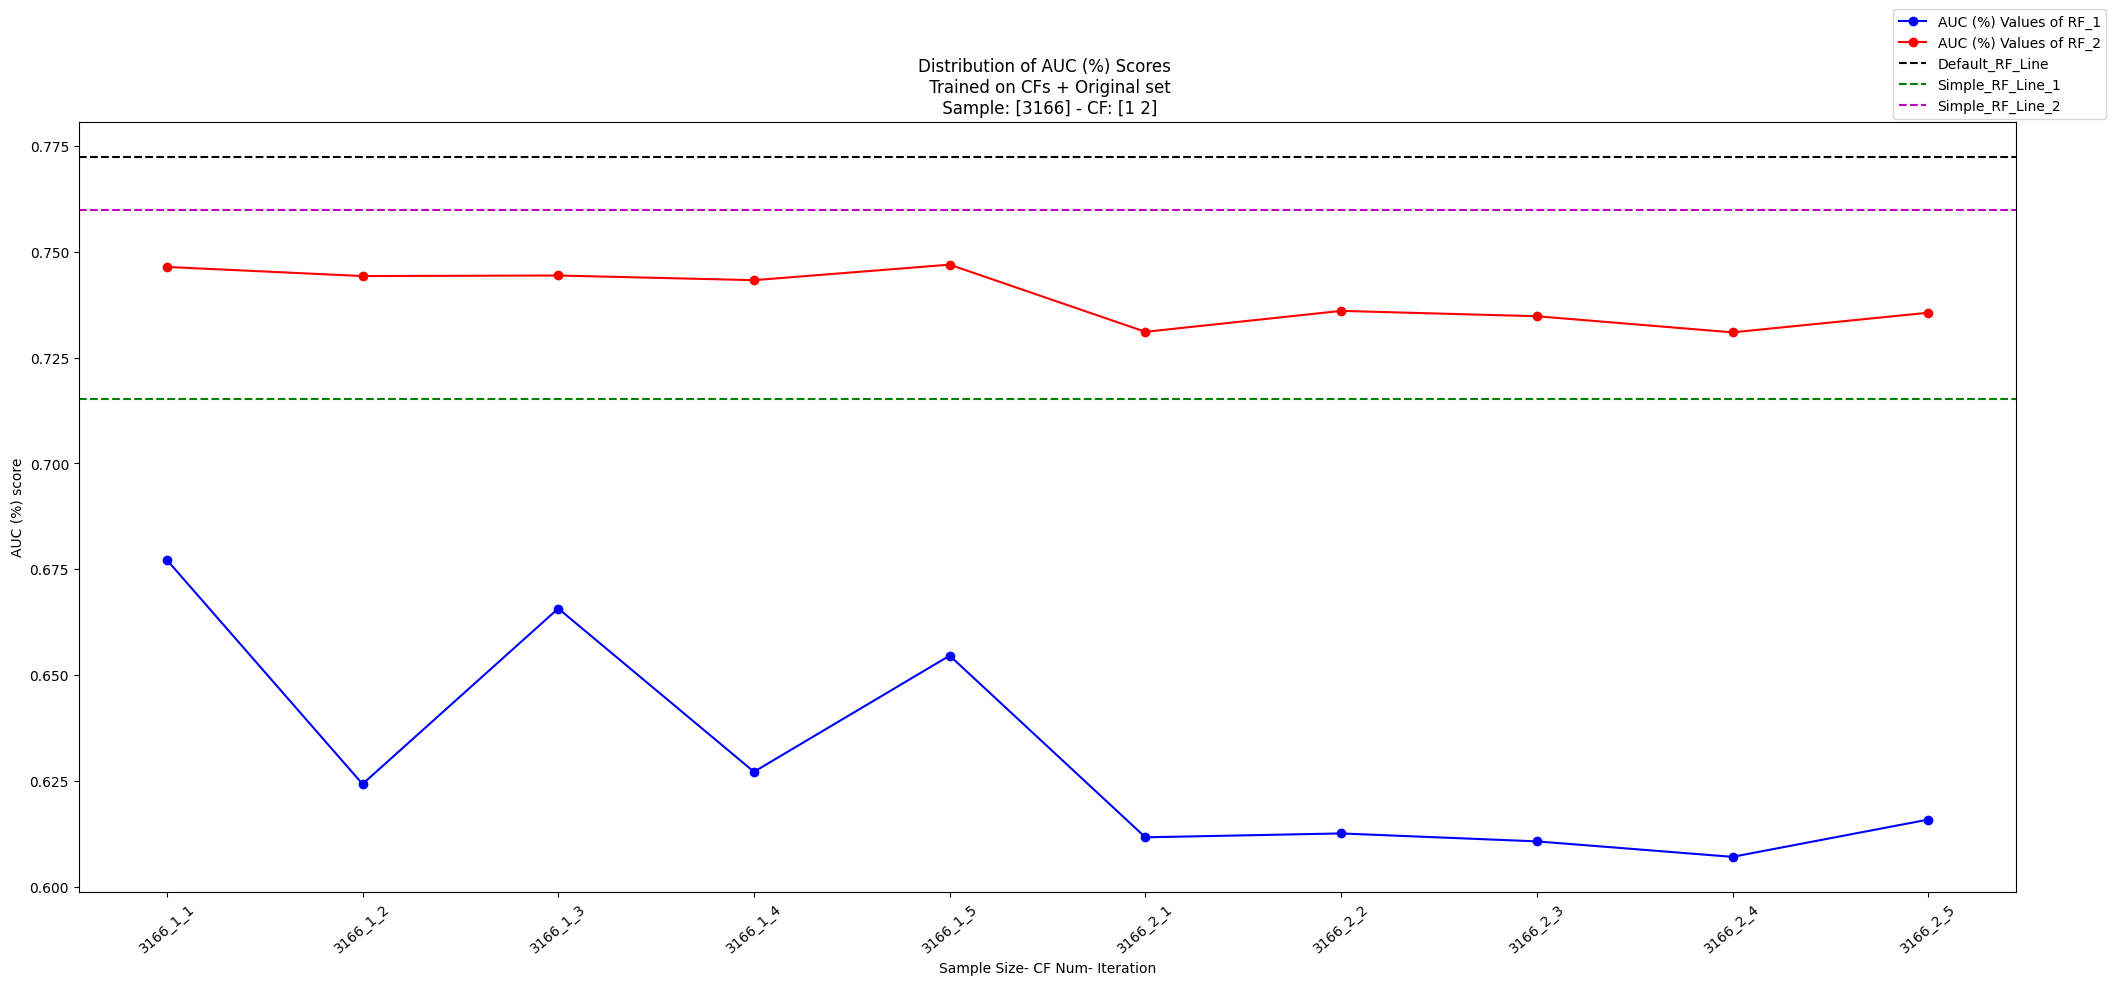

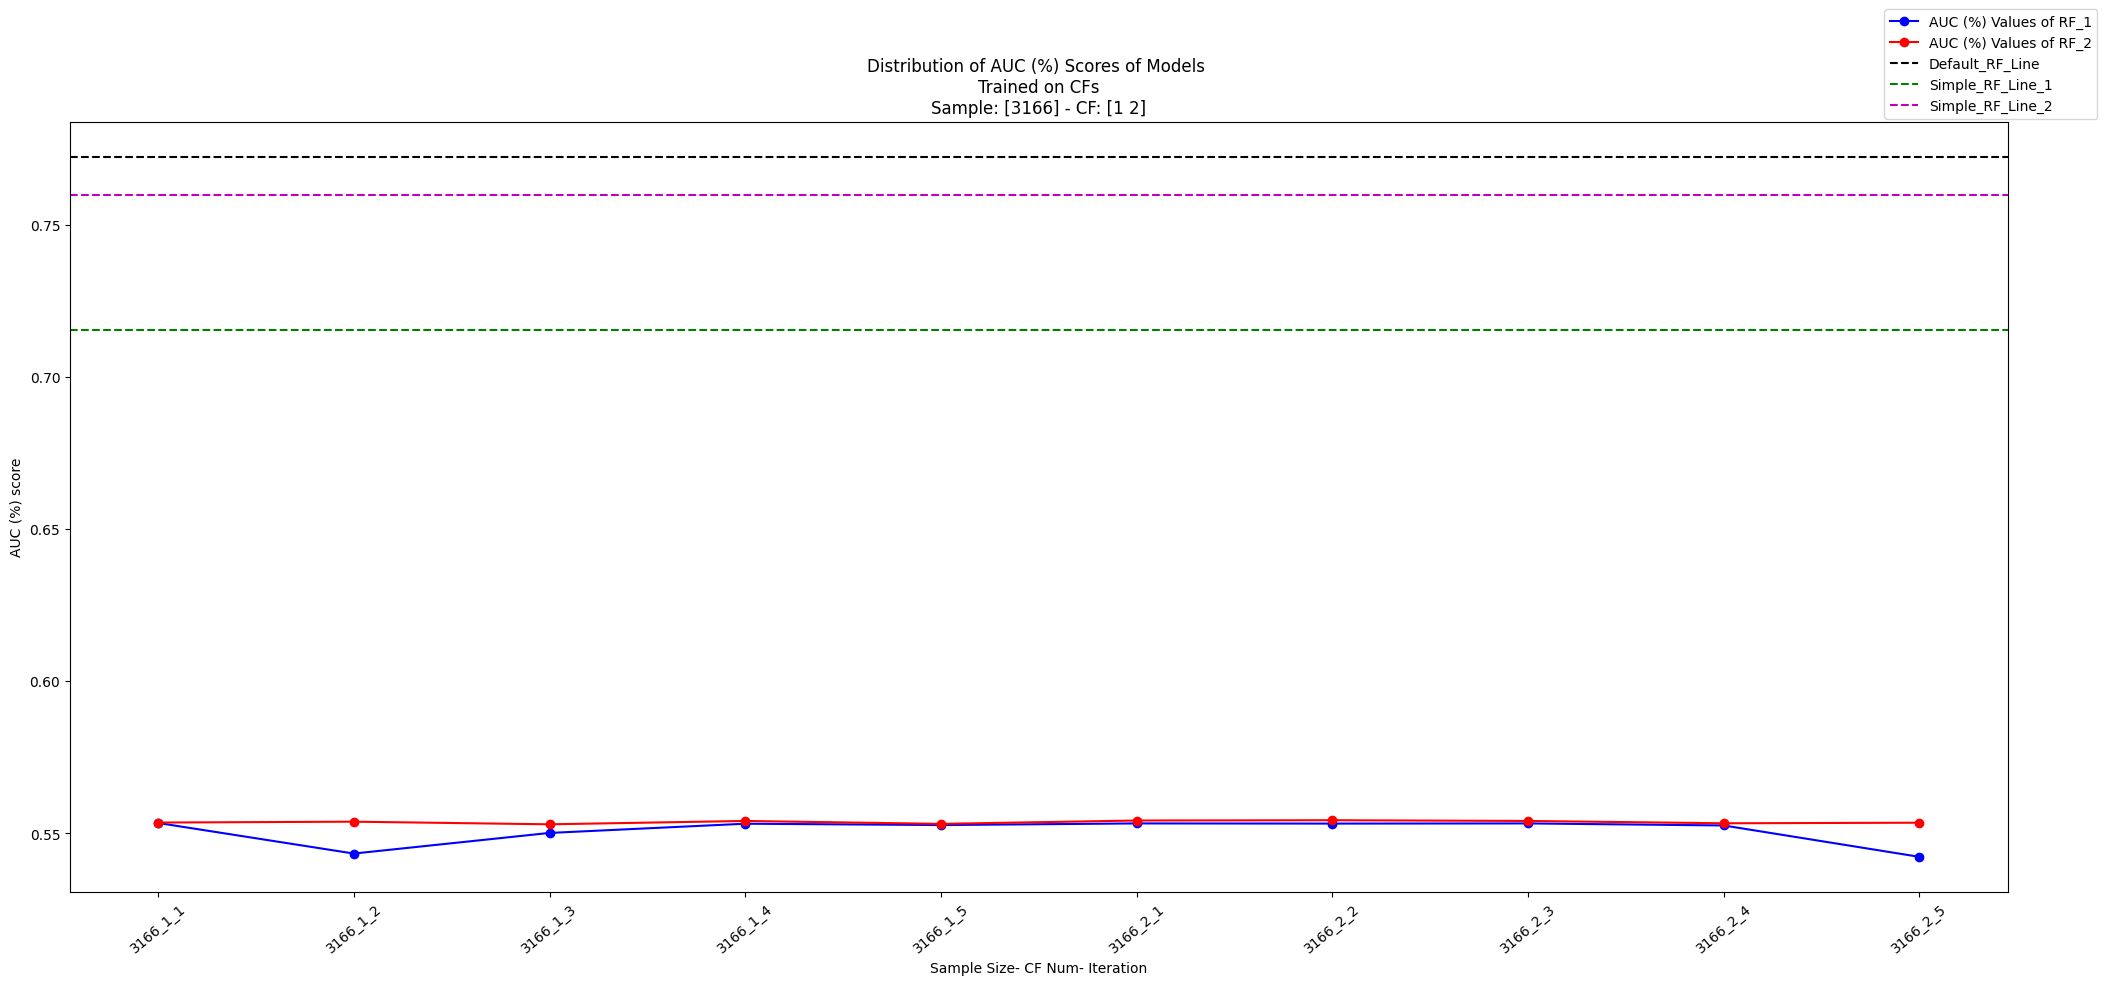

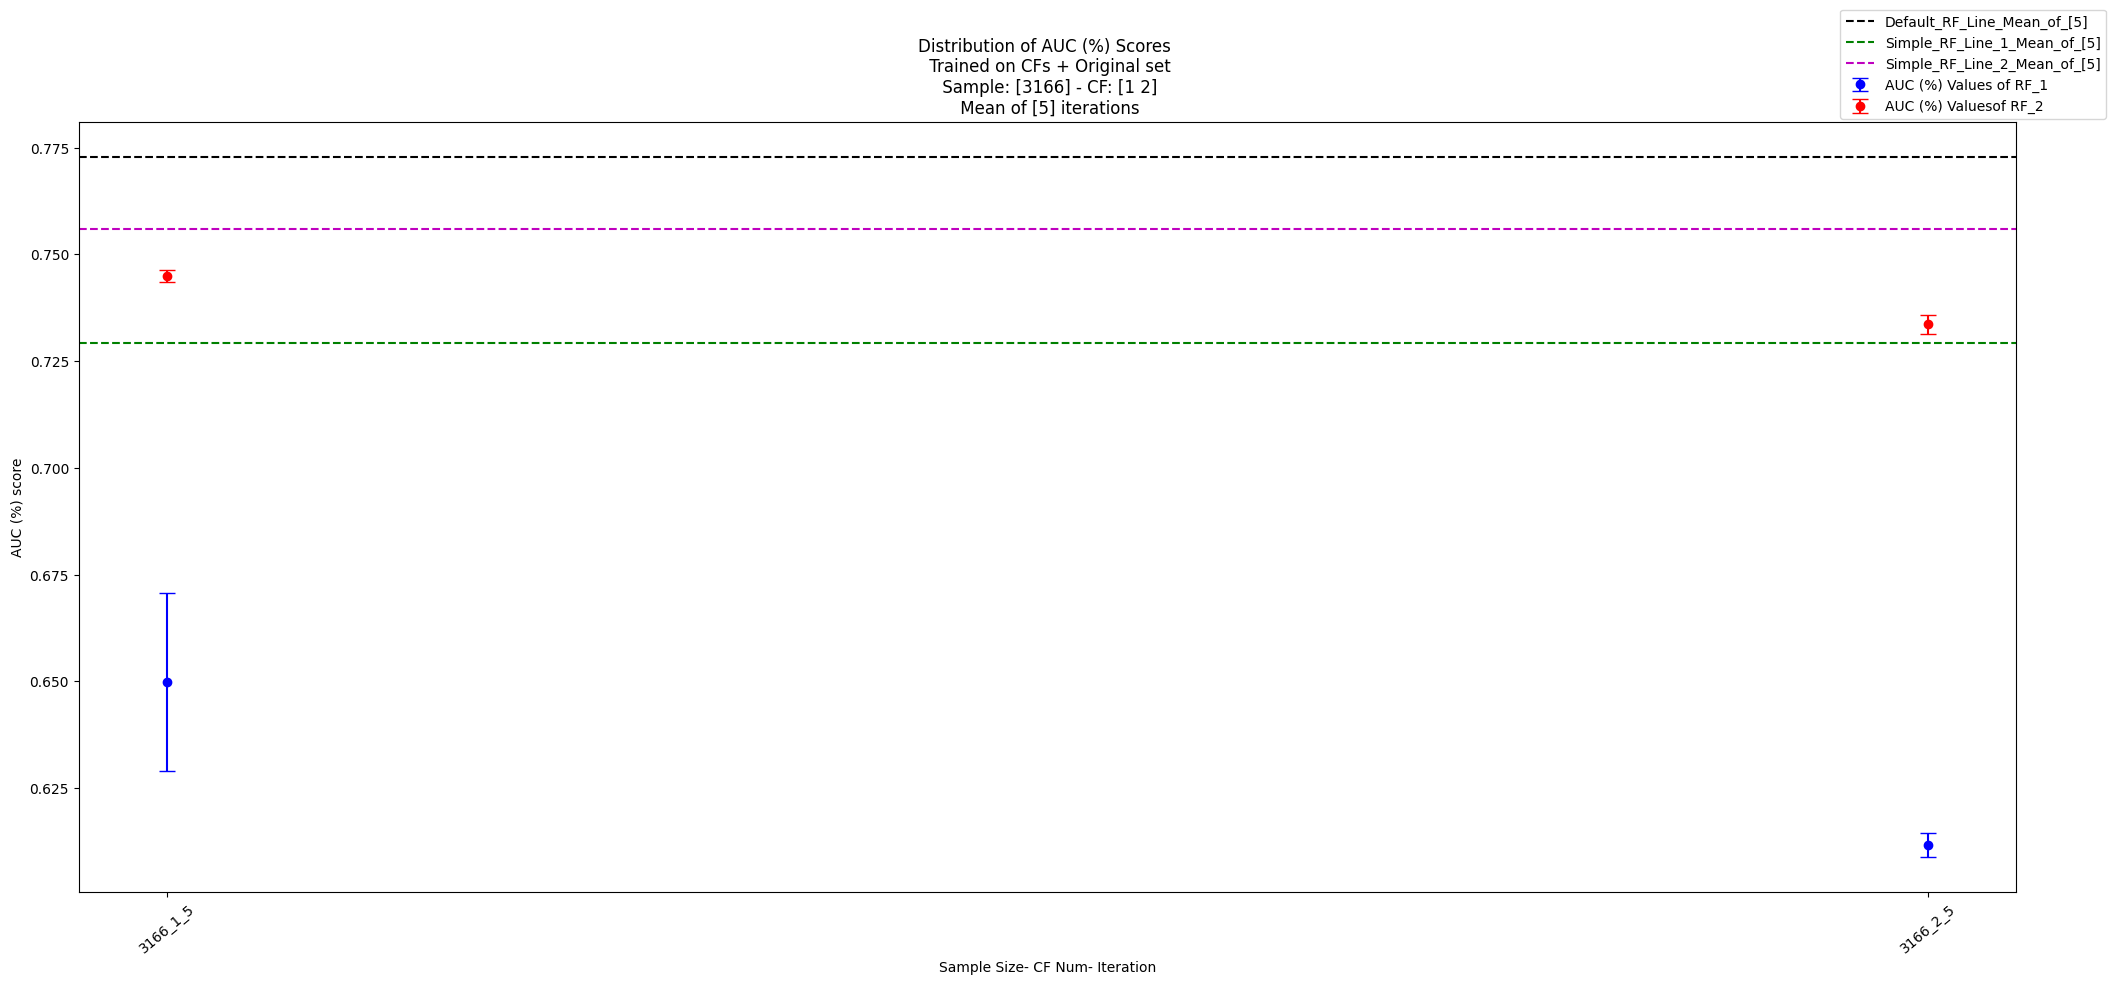

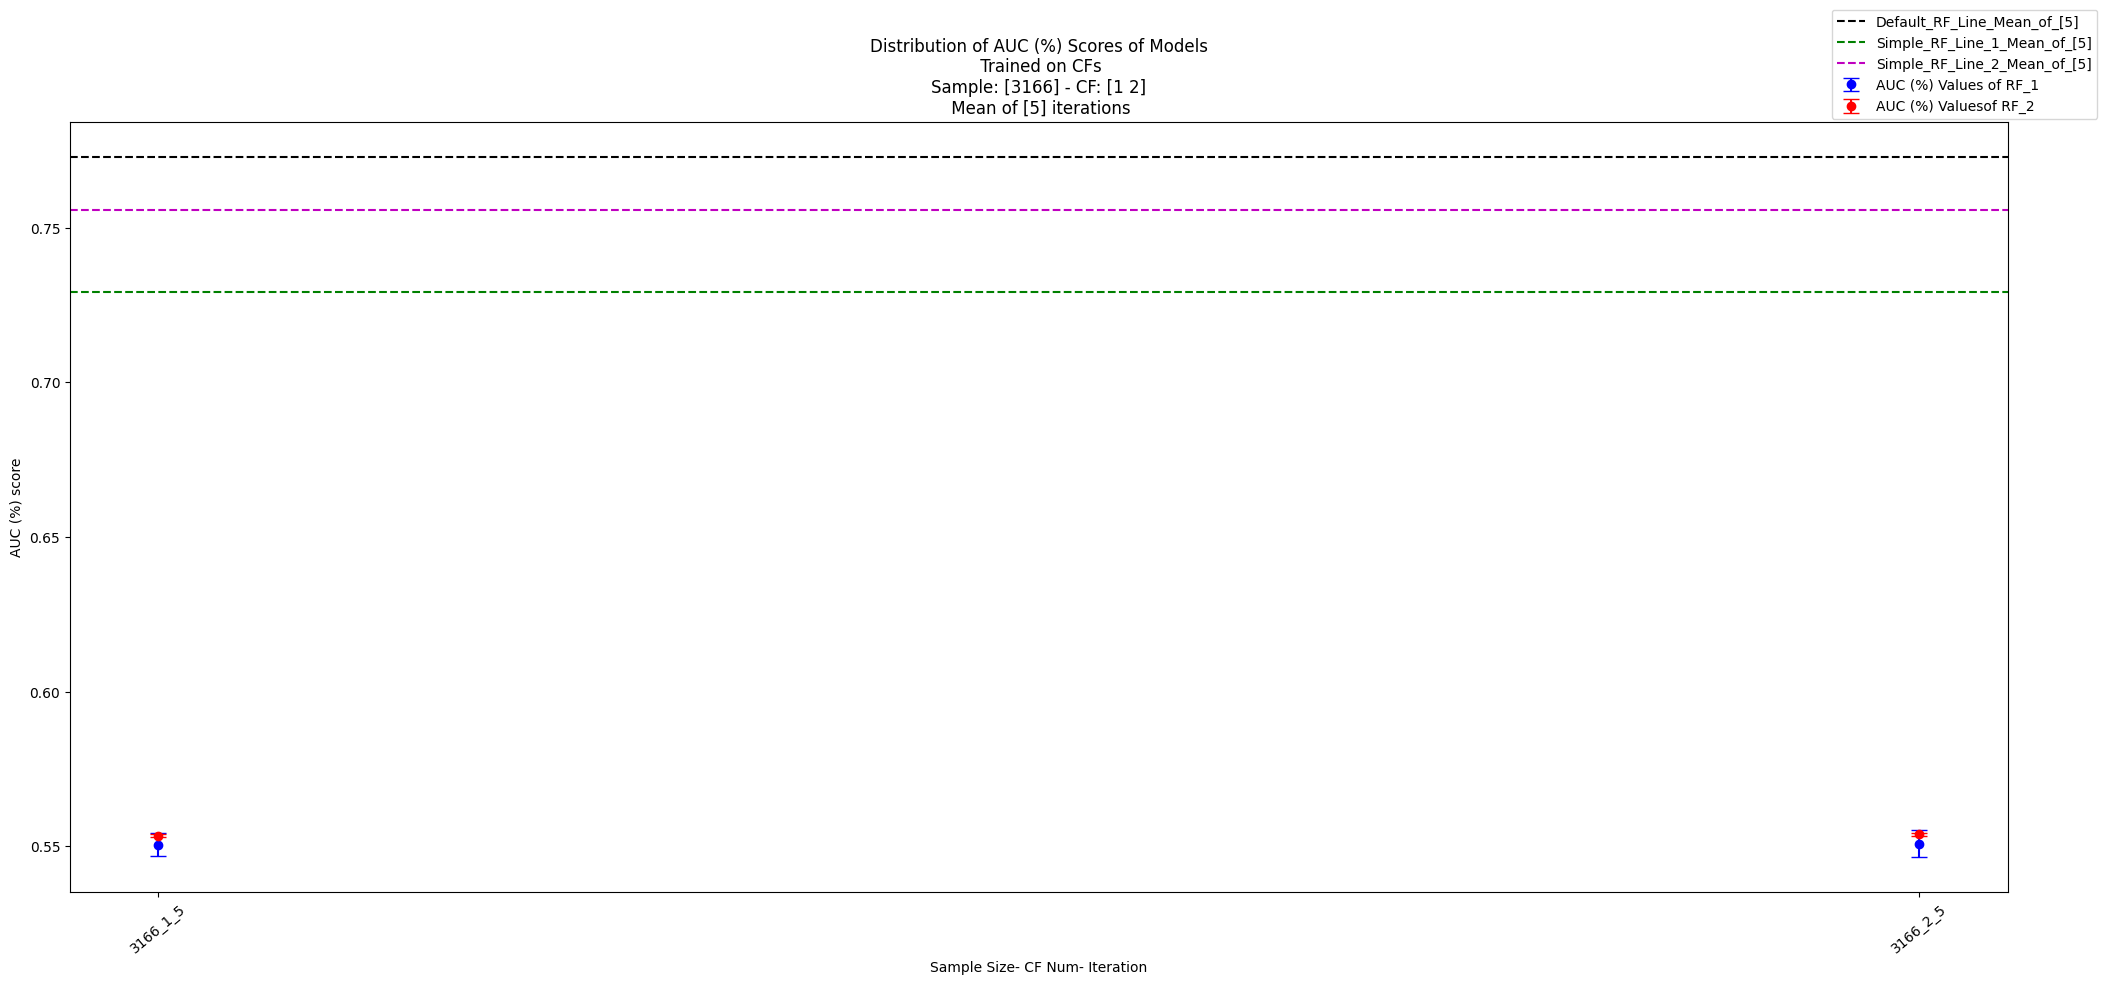

In [ ]:
#No capital-gain feature in the dataset
estimator = 50
depth = 5
estimator_2 = 40
depth_2 = 4
fea_to_vary = 'all'
sample_size_list = [6331]
total_CFs_list = [1, 2]
iteration_num = 5
list_of_plots = ['AUC (%)'] 
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, '50_40__6331__1_2 ', list_of_plots)

100%|██████████| 9495/9495 [33:18<00:00,  4.75it/s]


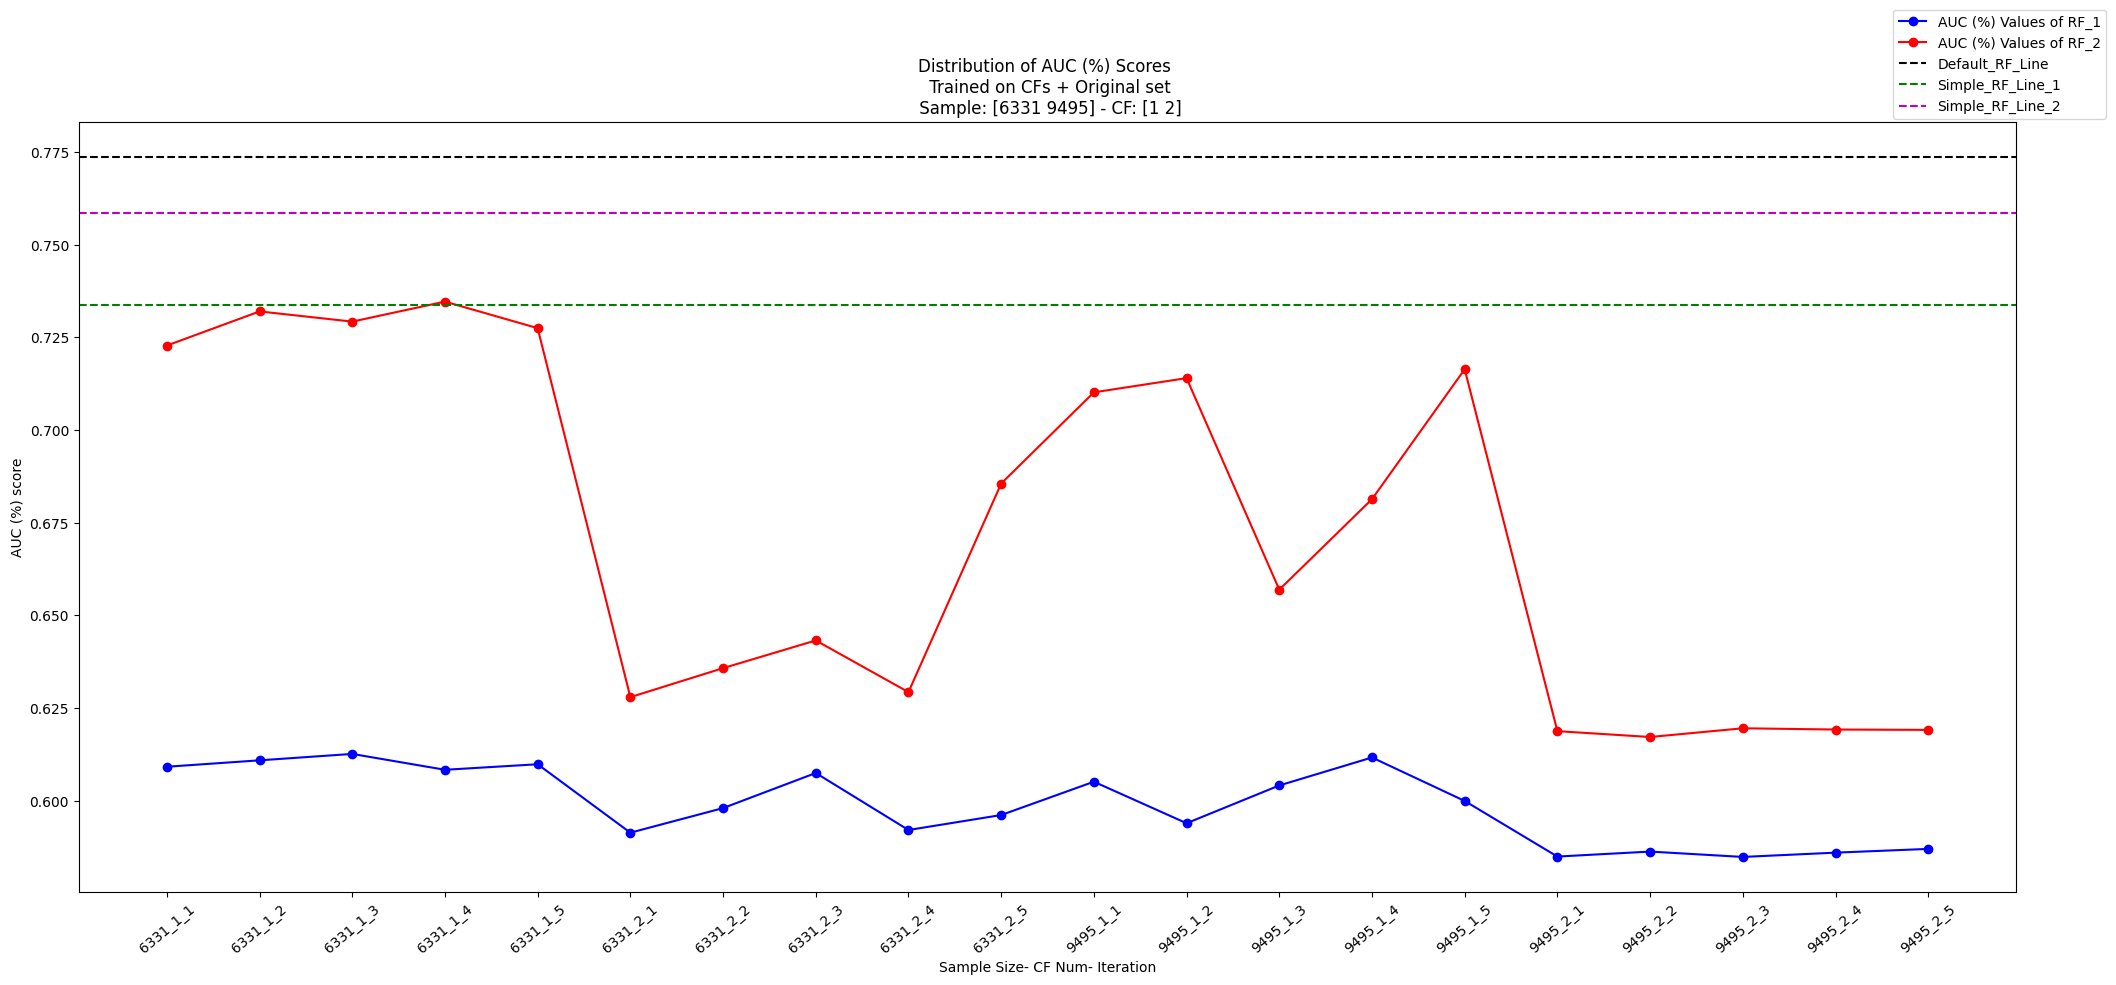

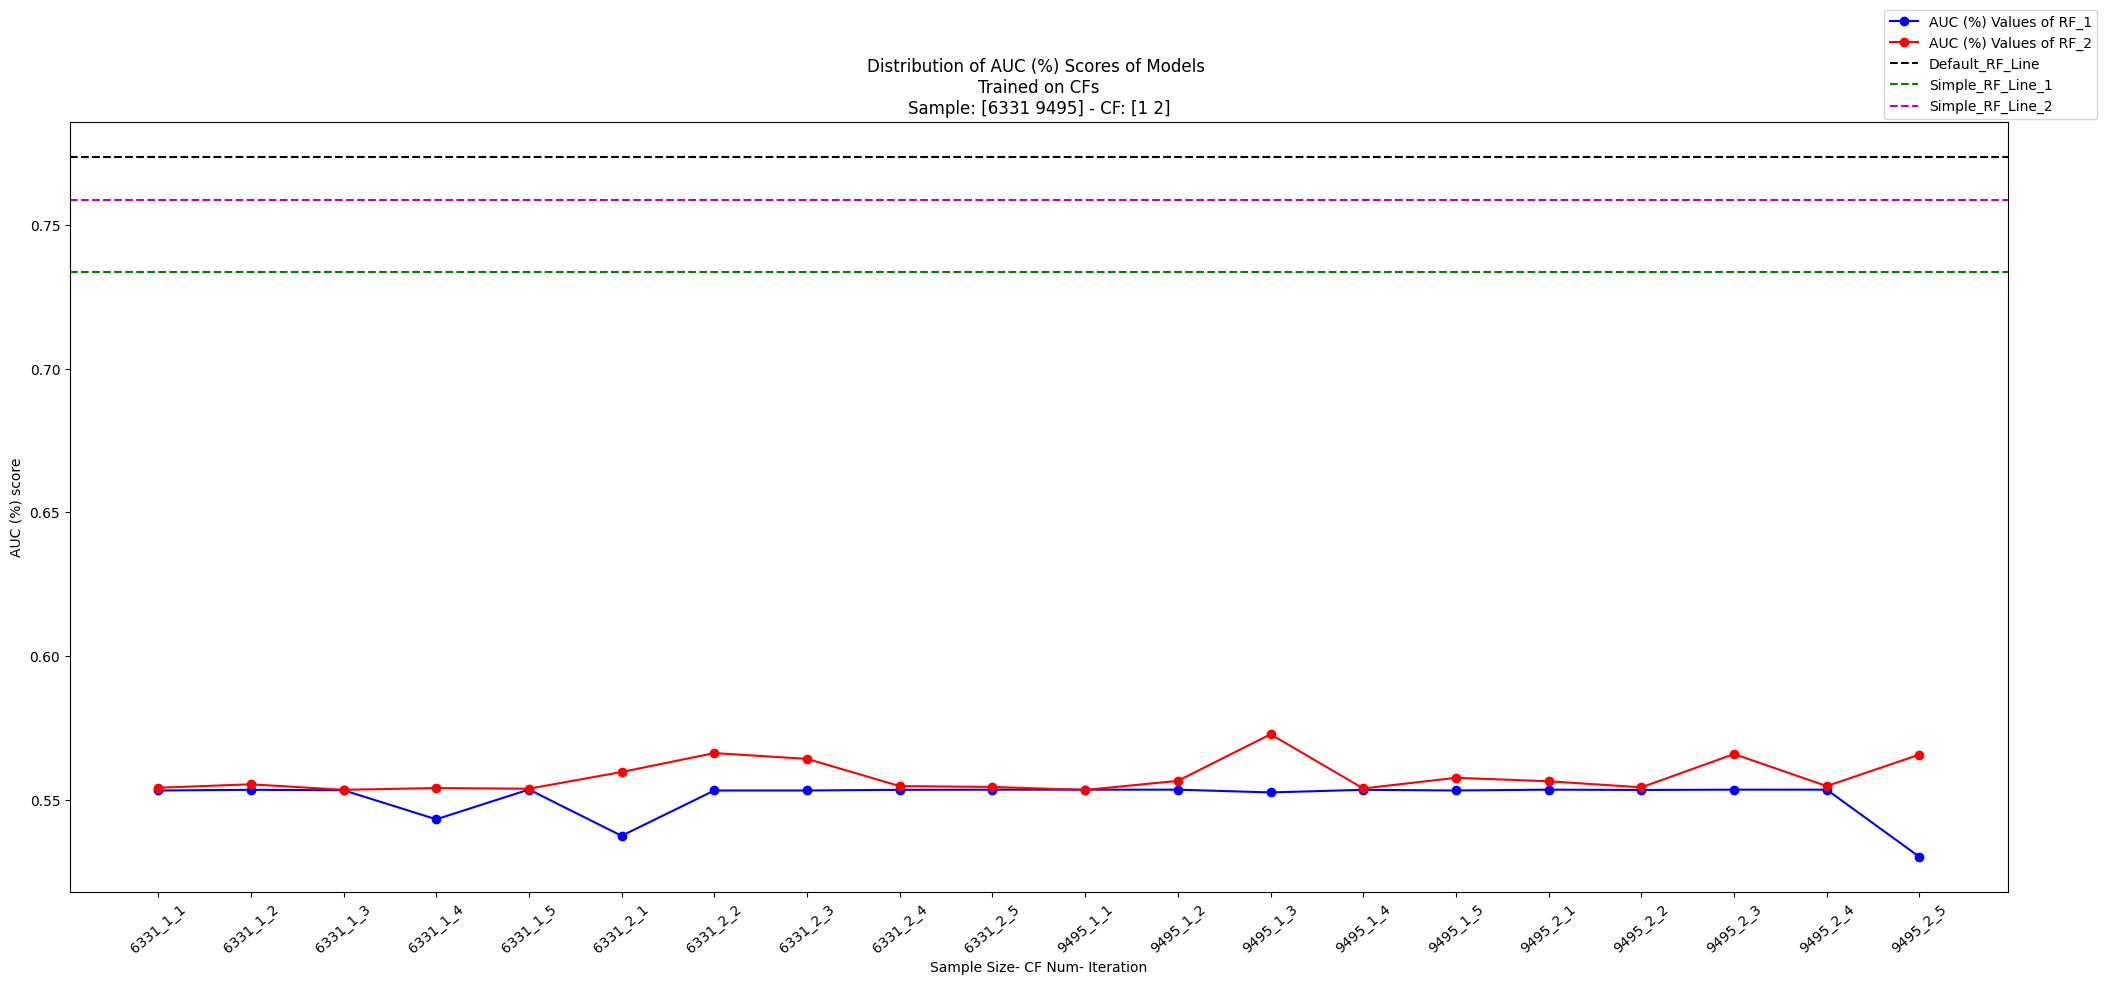

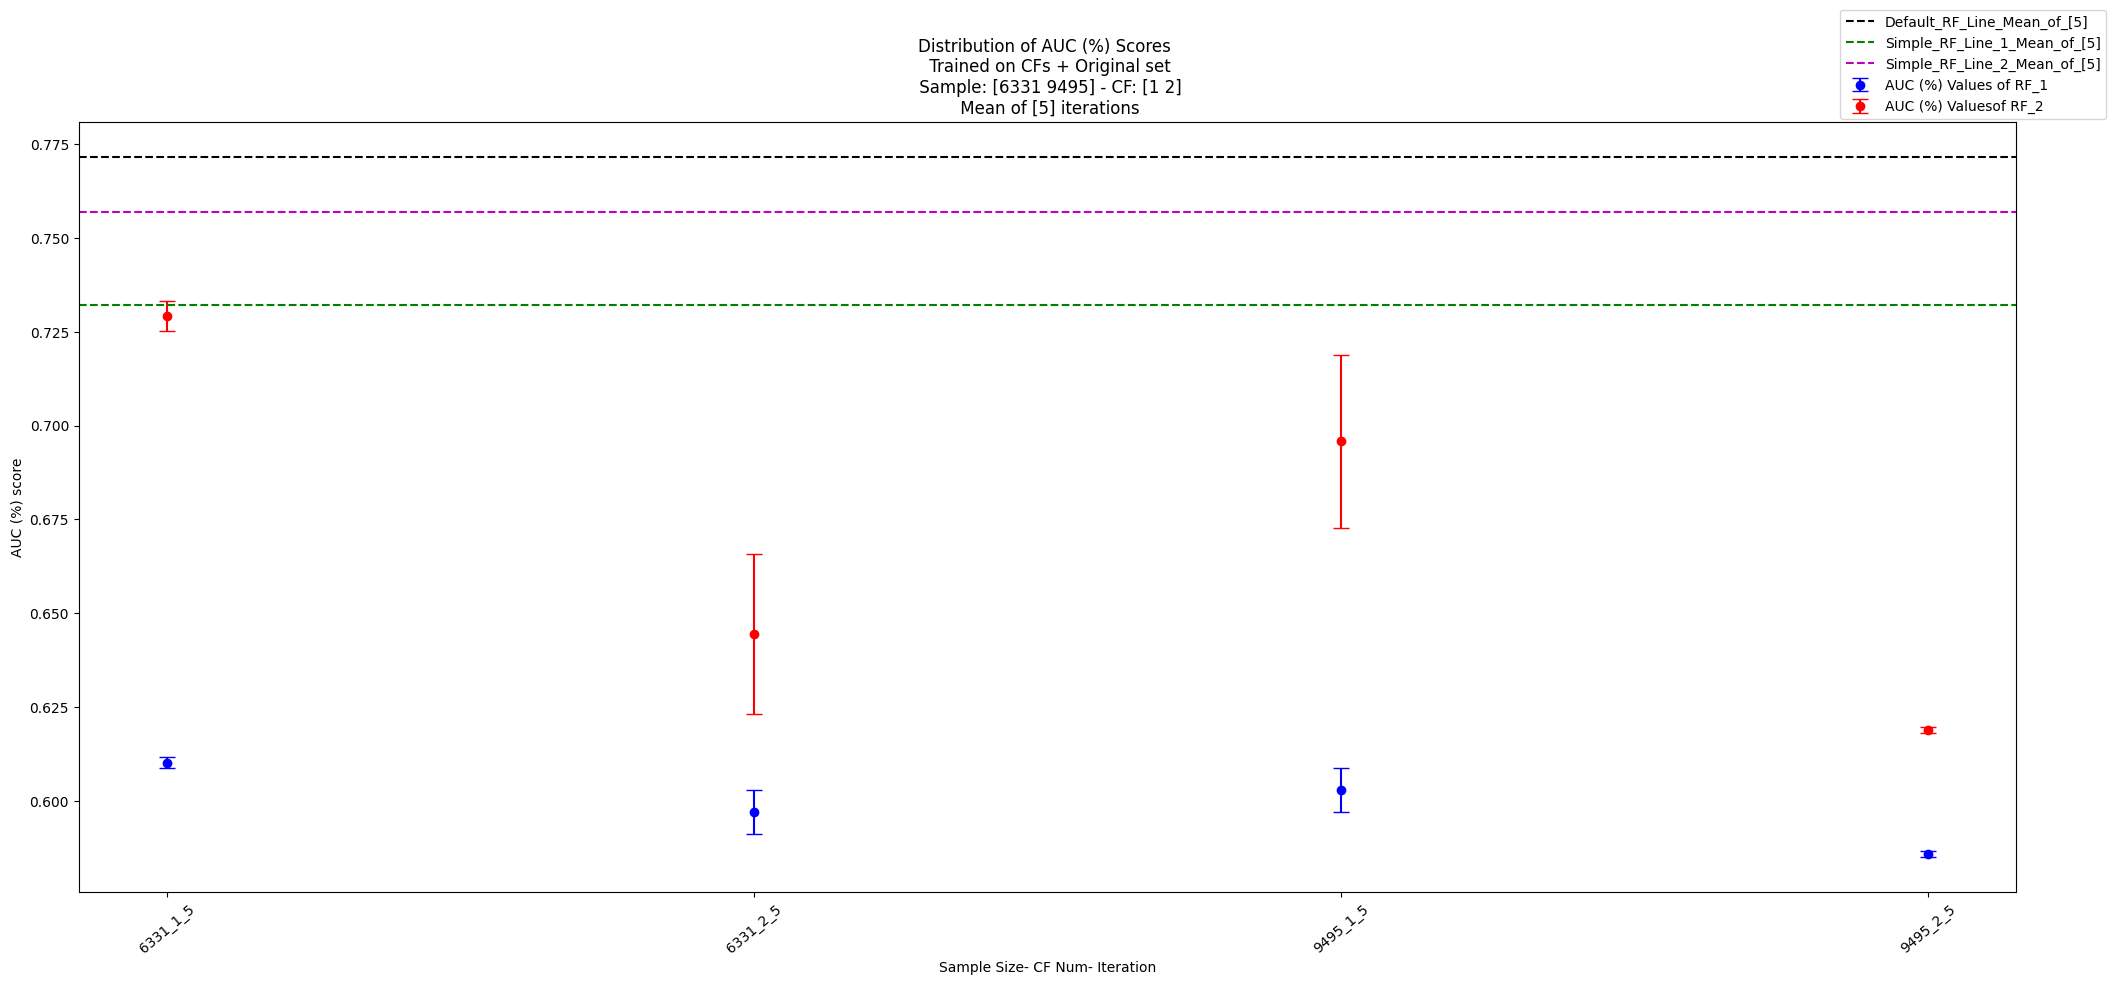

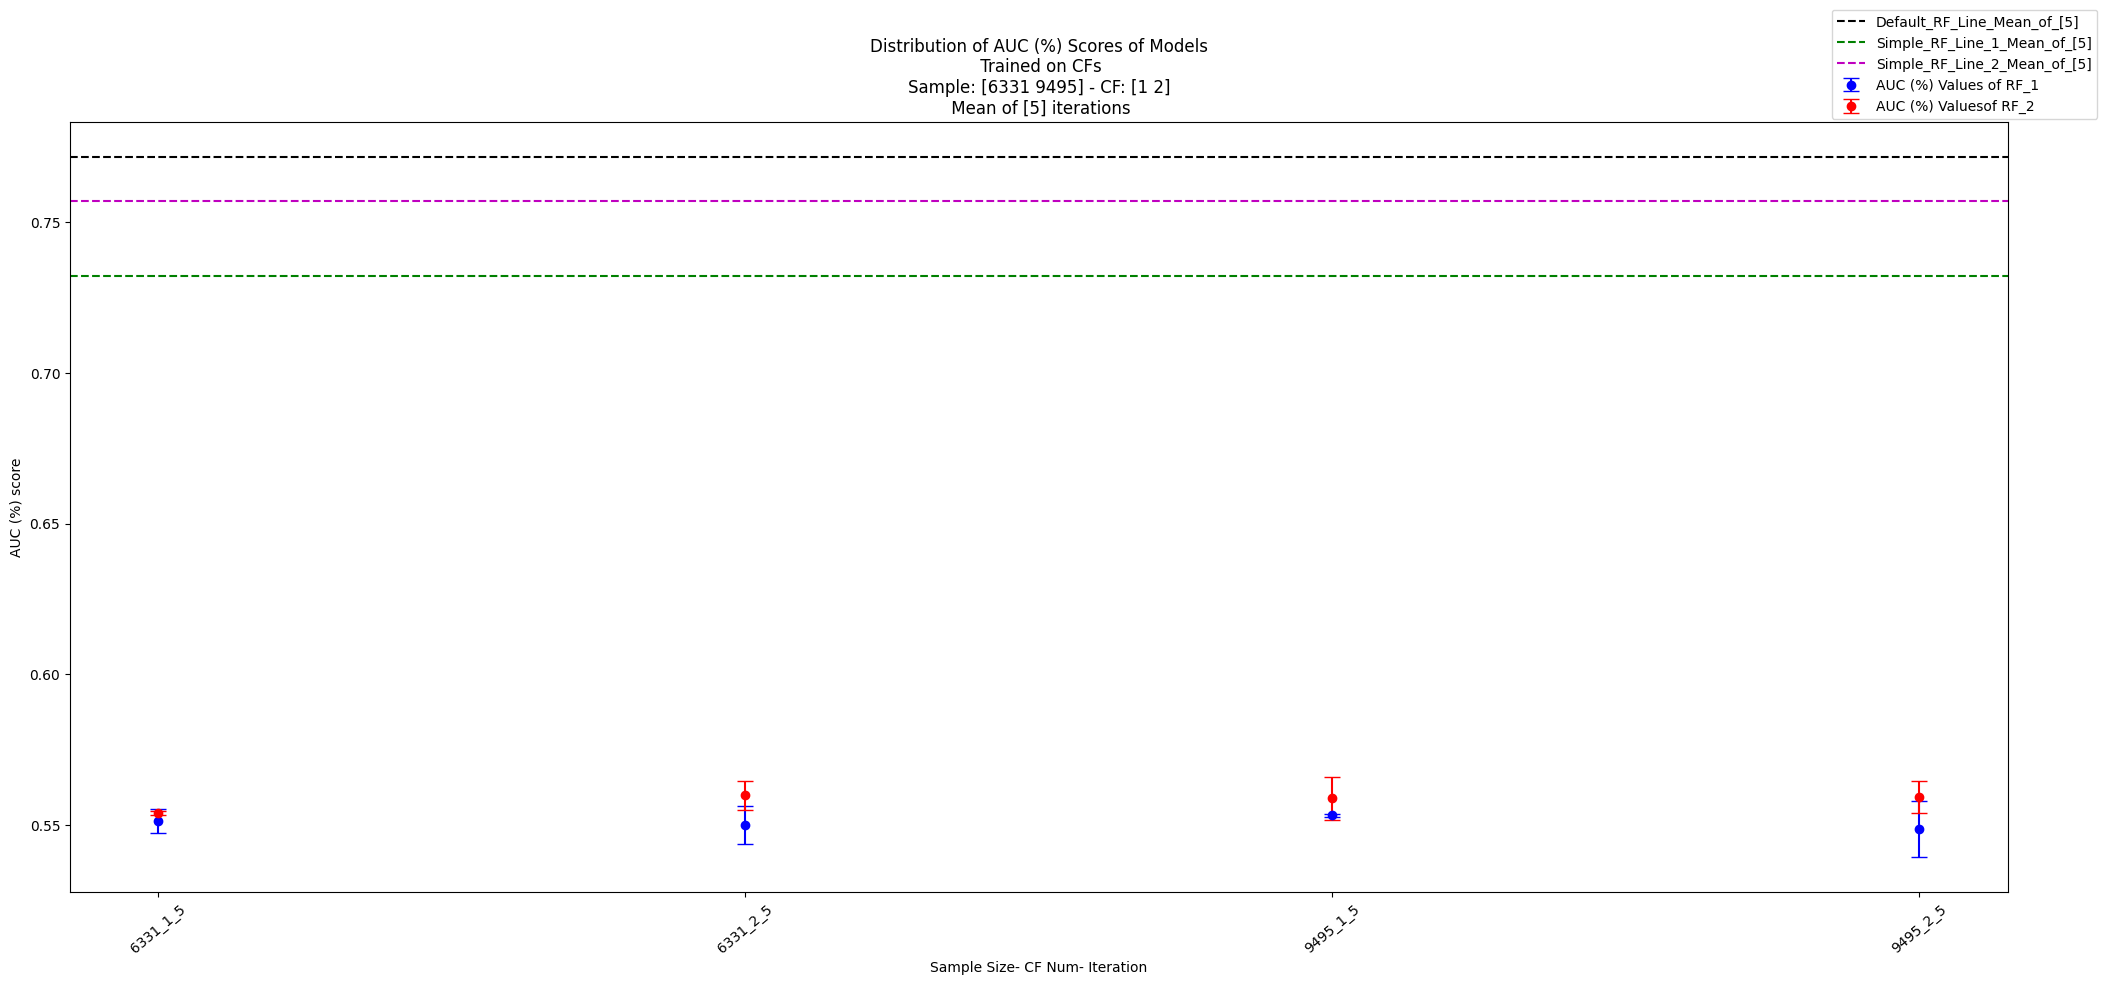

In [ ]:
estimator = 50
depth = 5
estimator_2 = 70
depth_2 = 10
fea_to_vary = 'all'

sample_size_list = [6331, 9495]
total_CFs_list = [1, 2]
iteration_num = 5
list_of_plots = ['AUC (%)'] 
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test, sample_size_list, total_CFs_list, iteration_num, fea_to_vary, '6331_9495__1_2 ', list_of_plots)

# Interpreting the results 

In [ ]:
the_list = [1, 2, 3, 4, 5]
the_list_2 = [3166, 6331, 9495]
the_list_3 = [1, 2]

Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:


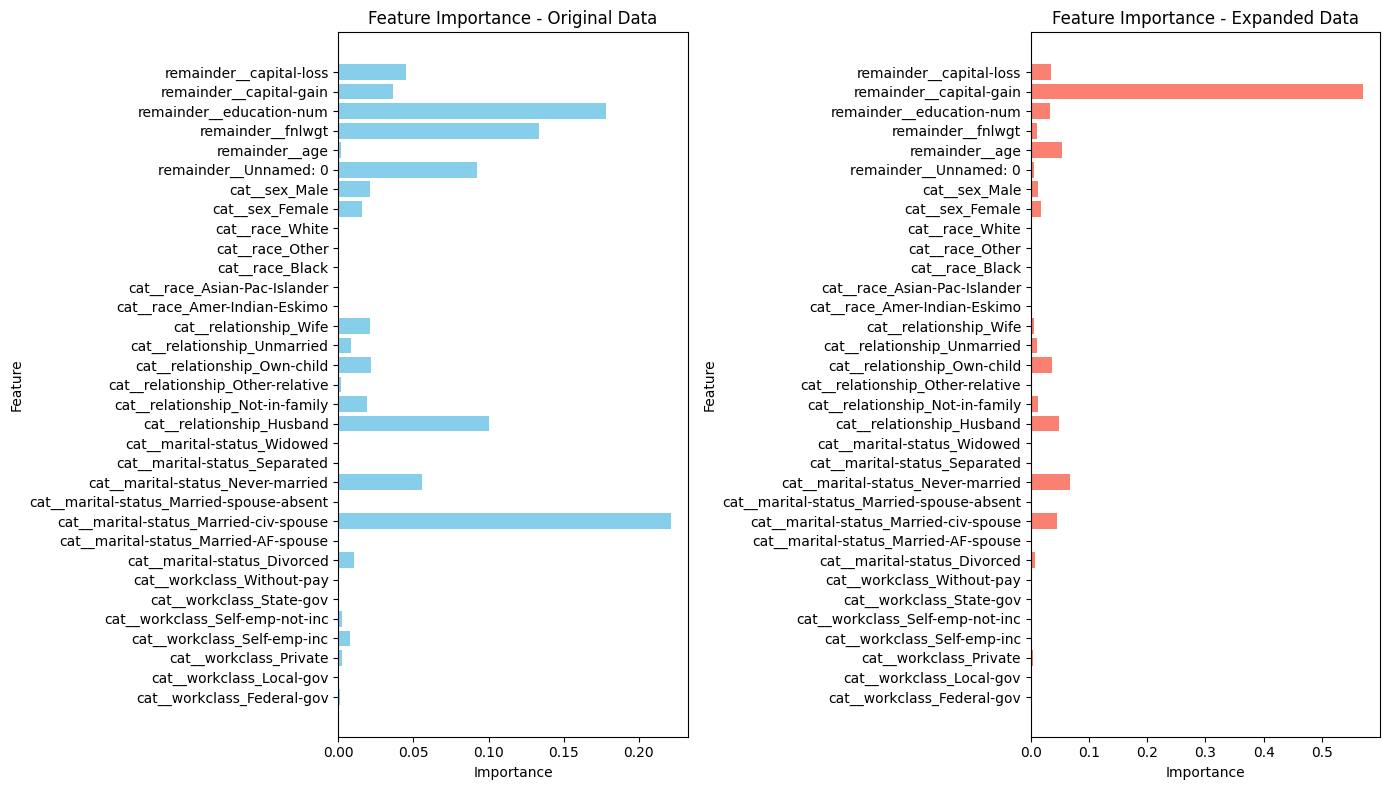

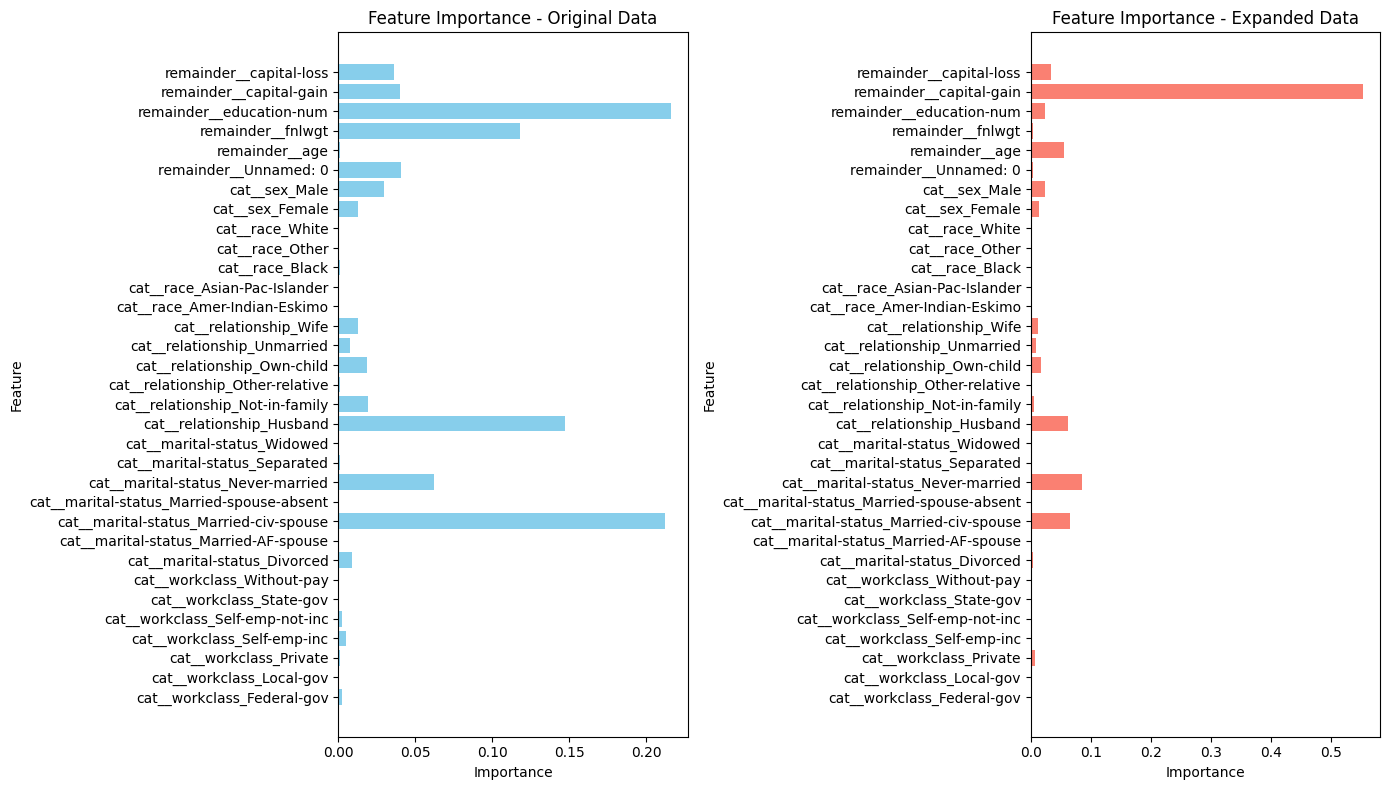

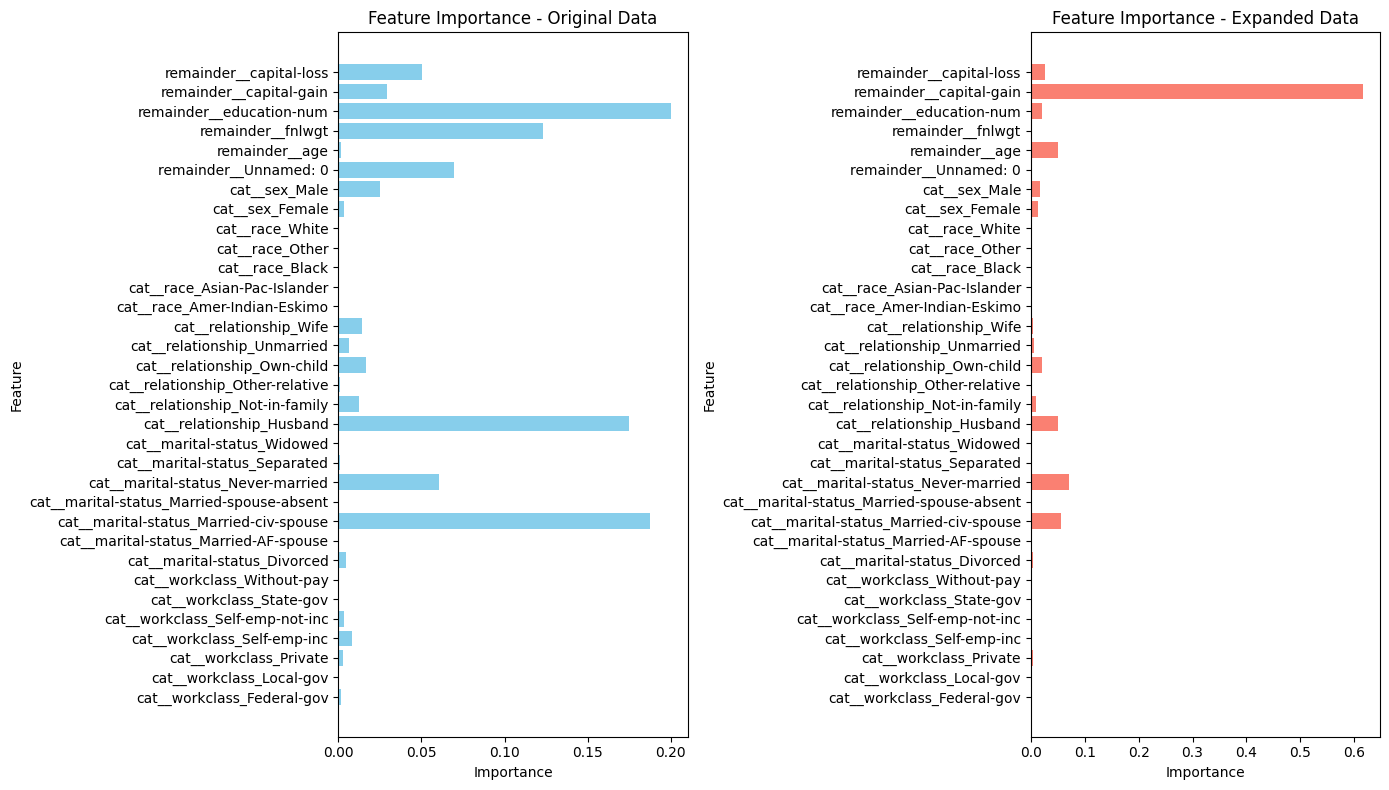

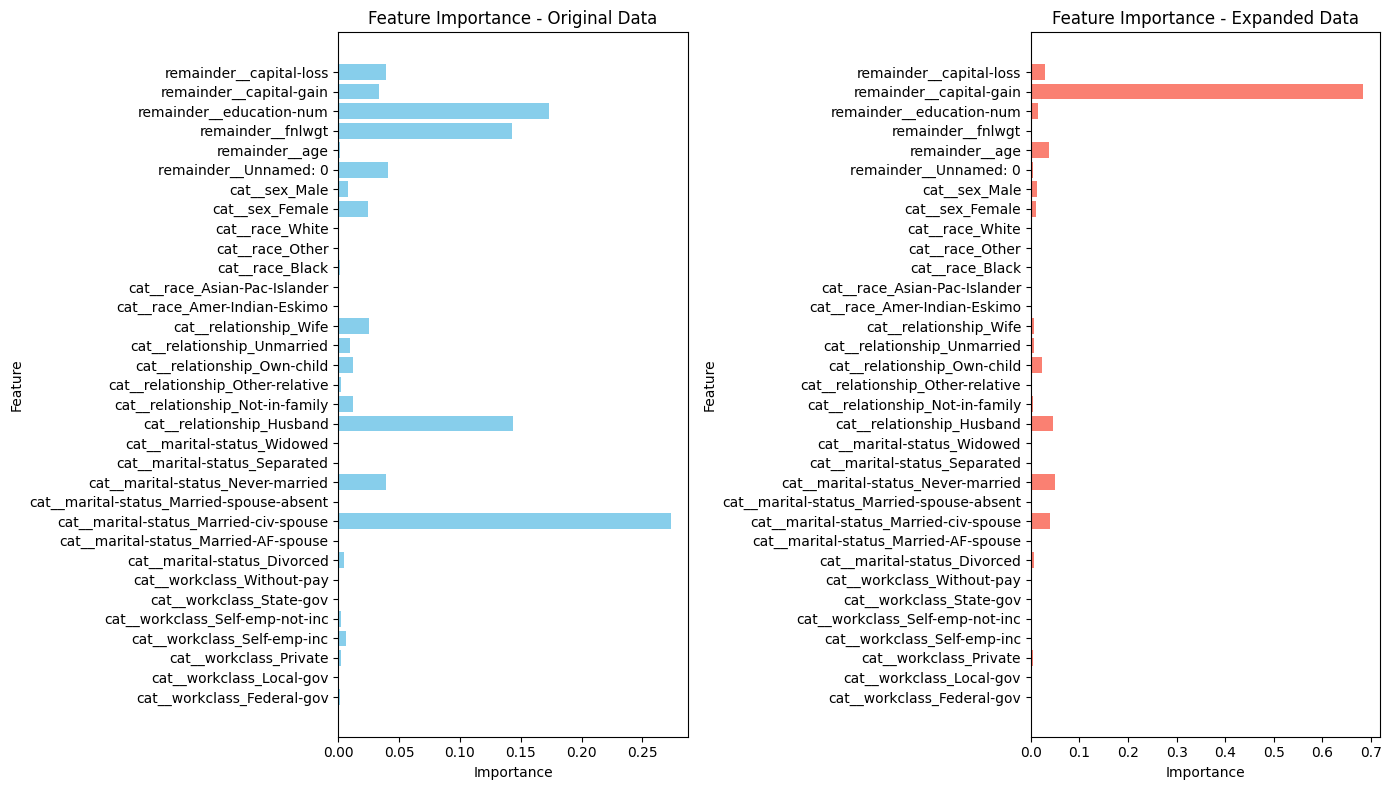

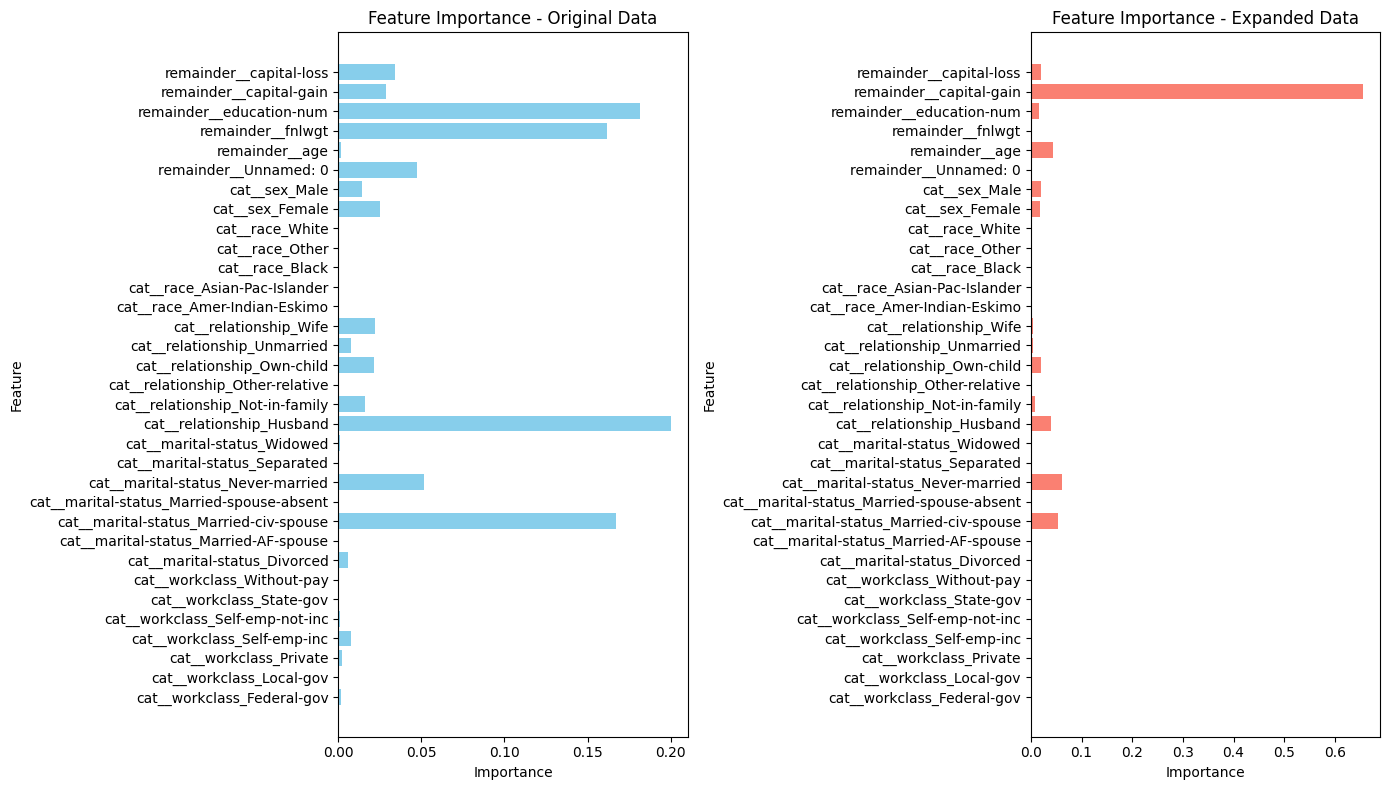

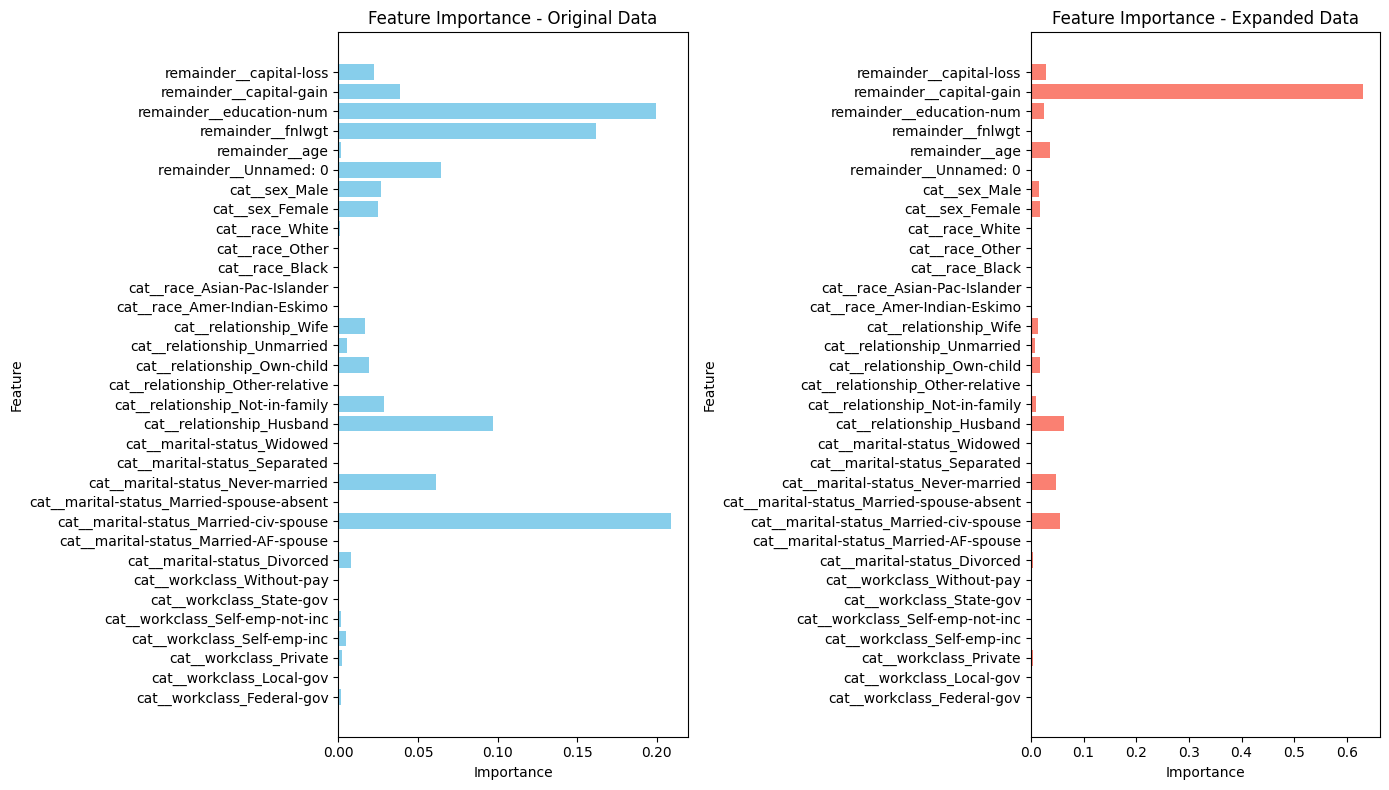

In [ ]:
    # Assuming you have your datasets ready
    # original_data: original dataset (X_original, y_original)
X_original = X_fit.copy()
y_original = y_fit.copy()    # expanded_data: expanded dataset with counterfactuals (X_expanded, y_expanded)
for t in the_list_3:    
        for i in the_list_2:
            # Split datasets into features (X) and target (y)
                xxdxd = pd.read_csv('Generated_CFs/cf_df_{}_{}_1.csv'.format(i, t))
                X_expanded = xxdxd.drop(columns=outcome_name)
                y_expanded = xxdxd[outcome_name]

                    # Preprocessing for cataegorical data - OneHotEncoding
                categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

                    # Bundle preprocessing for data
                transformations = ColumnTransformer(
                transformers=[            
                            ('cat', categorical_transformer, categorical)],
                        remainder='passthrough')
                # Define the Random Forest model
                simple_rf = Pipeline(steps=[('preprocessor', transformations), 
                                            ('classifier', RandomForestClassifier(n_estimators=50, max_depth=5))])

                # Train on the original dataset
                simple_rf.fit(X_original, y_original)
                importances_original = simple_rf.named_steps['classifier'].feature_importances_

                # Train on the expanded dataset
                simple_rf.fit(X_expanded, y_expanded)
                importances_expanded = simple_rf.named_steps['classifier'].feature_importances_

                # Get the feature names after preprocessing
                feature_names = simple_rf.named_steps['preprocessor'].get_feature_names_out()

                # Debugging: Print lengths to identify the issue
                print("Length of feature_names:", len(feature_names))
                print("Length of importances_original:", len(importances_original))
                print("Length of importances_expanded:", len(importances_expanded))

                # Ensure all arrays have the same length before creating the DataFrame
                min_length = min(len(feature_names), len(importances_original), len(importances_expanded))

                feature_names = feature_names[:min_length]
                importances_original = importances_original[:min_length]
                importances_expanded = importances_expanded[:min_length]

                # Create a DataFrame to compare feature importances
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance_Original': importances_original,
                    'Importance_Expanded': importances_expanded
                })

                # Add a new column for the difference in importance
                importance_df['Importance_Difference'] = importance_df['Importance_Expanded'] - importance_df['Importance_Original']
                # Sort by the absolute value of the importance difference
                importance_df_sorted = importance_df.reindex(importance_df['Importance_Difference'].abs().sort_values(ascending=False).index)
                importance_df_sorted.to_excel('Feature_importance_diff_50_5_{}_{}.xlsx'.format(i,t))
                # Display the top 10 most significant shifts
                top_shifts = importance_df_sorted.head(10)
                print("Top 10 Most Significant Shifts in Feature Importance:")
                top_shifts

                # Plotting the feature importances
                plt.figure(figsize=(14, 8))
                plt.subplot(1, 2, 1)
                plt.barh(feature_names, importances_original, color='skyblue')
                plt.title('Feature Importance - Original Data')
                plt.xlabel('Importance')
                plt.ylabel('Feature')

                plt.subplot(1, 2, 2)
                plt.barh(feature_names, importances_expanded, color='salmon')
                plt.title('Feature Importance - Expanded Data')
                plt.xlabel('Importance')
                plt.ylabel('Feature')

                plt.tight_layout()
                #plt.show()

- The addition of counterfactuals has caused a dramatic shift in feature importance, particularly elevating remainder__capital-gain to a disproportionately high level.
- This shift suggests that the counterfactuals might have introduced a strong correlation with capital-gain, causing the model to overly rely on this feature
- The significant emphasis on capital-gain might indicate that the expanded dataset has led to overfitting on this particular feature.
- This could result in poor generalization, explaining why the model's performance worsened on the expanded dataset.